In [1]:
import pandas as pd
import numpy as np
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt

# Set plot style
sns.set(color_codes=True)

## Load the data

In [2]:
df = pd.read_csv('../cleaned_data/FREN.csv', index_col='Date', parse_dates=True)
df.head()

,7 DAYS MA,14 DAYS MA,21 DAYS MA,7 DAYS STD DEV,RSI 7,RSI 14,RSI 21,MFI 7,MFI 14,MFI 21,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,Close
Date,,,,,,,,,,,,,,,,,,
2012-10-17,0.246017,0.298189,0.280807,-0.274346,1.816144,2.049312,2.132388,0.913352,1.092526,1.112890,0.0,0.5,0.5,-1.0,0.572200,0.066667,0.576923,0.990204
2012-10-18,0.348958,0.342942,0.323176,2.950644,0.763535,1.051283,1.209526,0.939465,1.140347,1.206799,0.5,0.5,0.5,-1.0,0.577598,0.133333,0.576923,0.651450
2012-10-19,0.407782,0.359725,0.341868,3.111515,0.944317,1.227245,1.384266,0.499504,0.564789,0.606953,1.0,0.5,0.5,-1.0,0.582996,0.200000,0.576923,0.781740
2012-10-22,0.484988,0.389560,0.365545,3.298544,0.872106,1.160501,1.321716,0.342883,0.361677,0.307374,-1.0,0.5,0.5,-1.0,0.599190,0.400000,0.615385,0.755682
2012-10-23,0.551164,0.419396,0.378006,3.262273,0.646594,0.959430,1.134979,0.303813,0.315377,0.318621,-0.5,0.5,0.5,-1.0,0.604588,0.466667,0.615385,0.677508


### Plot the Close price - our target

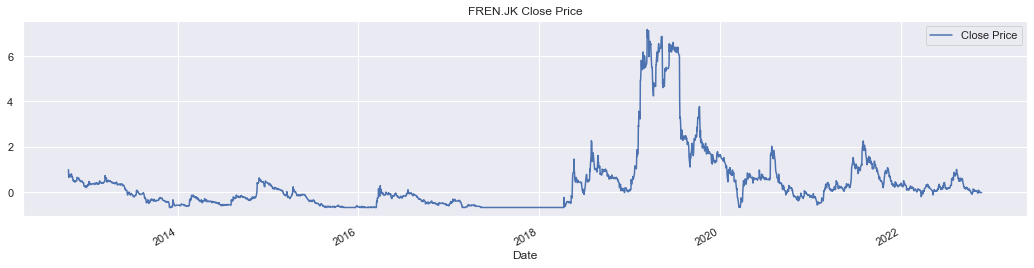

In [3]:
df['Close'].plot(figsize=(18, 4))
plt.legend(['Close Price'])
plt.title('FREN.JK Close Price')
plt.show()

### Split the data
- Split the data into independent variables and target variable
- Split the data into train and test set
- Train: 17 Oct 2012 - 17 Oct 2022
- Validation = 18 Oct 2022 - 25 Nov 2022

In [4]:
len(df['2012-10-17':'2022-10-17'])

2480

In [5]:
train_len = len(df['2012-10-17':'2022-10-17'])
train_dataset = df[:train_len]
test_dataset = df[train_len:len(df)]

In [6]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('Close')
test_labels = test_features.pop('Close')

## Modeling

### Grid Search to find the best combination of hyperparameters

In [7]:
# ================
# XGBoost regression: 
# Parameters: 
# n_estimators  "Number of gradient boosted trees. Equivalent to number 
#                of boosting rounds."
# learning_rate "Boosting learning rate (also known as “eta”)"
# max_depth     "Maximum depth of a tree. Increasing this value will make 
#                the model more complex and more likely to overfit." 
#=========================================================================
regressor = xgb.XGBRegressor(eval_metric='rmse')

#=========================================================================
# exhaustively search for the optimal hyperparameters
#=========================================================================
from sklearn.model_selection import GridSearchCV
# set up our search grid
param_grid = {"max_depth":    [3, 4, 5],
              "n_estimators": [500, 600, 700, 1000],
              "learning_rate": [0.01, 0.015],
              "base_score": [0.5],
              "booster": ["gbtree"],
              "early_stopping_rounds": [50]}

# try out every combination of the above values
search = GridSearchCV(regressor, param_grid, cv=5).fit(train_features, train_labels, eval_set=[(train_features, train_labels)])

[0]	validation_0-rmse:1.40436
[1]	validation_0-rmse:1.39096
[2]	validation_0-rmse:1.37770
[3]	validation_0-rmse:1.36458
[4]	validation_0-rmse:1.35160
[5]	validation_0-rmse:1.33874
[6]	validation_0-rmse:1.32602
[7]	validation_0-rmse:1.31343
[8]	validation_0-rmse:1.30097
[9]	validation_0-rmse:1.28859
[10]	validation_0-rmse:1.27638
[11]	validation_0-rmse:1.26421
[12]	validation_0-rmse:1.25225
[13]	validation_0-rmse:1.24034
[14]	validation_0-rmse:1.22858
[15]	validation_0-rmse:1.21697
[16]	validation_0-rmse:1.20541
[17]	validation_0-rmse:1.19399
[18]	validation_0-rmse:1.18266
[19]	validation_0-rmse:1.17146
[20]	validation_0-rmse:1.16038
[21]	validation_0-rmse:1.14941
[22]	validation_0-rmse:1.13856
[23]	validation_0-rmse:1.12787
[24]	validation_0-rmse:1.11718
[25]	validation_0-rmse:1.10671
[26]	validation_0-rmse:1.09629
[27]	validation_0-rmse:1.08594
[28]	validation_0-rmse:1.07578
[29]	validation_0-rmse:1.06562
[30]	validation_0-rmse:1.05565
[31]	validation_0-rmse:1.04580
[32]	validation_0-

[260]	validation_0-rmse:0.16210
[261]	validation_0-rmse:0.16112
[262]	validation_0-rmse:0.16015
[263]	validation_0-rmse:0.15918
[264]	validation_0-rmse:0.15821
[265]	validation_0-rmse:0.15727
[266]	validation_0-rmse:0.15634
[267]	validation_0-rmse:0.15542
[268]	validation_0-rmse:0.15454
[269]	validation_0-rmse:0.15365
[270]	validation_0-rmse:0.15276
[271]	validation_0-rmse:0.15187
[272]	validation_0-rmse:0.15100
[273]	validation_0-rmse:0.15013
[274]	validation_0-rmse:0.14928
[275]	validation_0-rmse:0.14844
[276]	validation_0-rmse:0.14763
[277]	validation_0-rmse:0.14680
[278]	validation_0-rmse:0.14598
[279]	validation_0-rmse:0.14520
[280]	validation_0-rmse:0.14440
[281]	validation_0-rmse:0.14359
[282]	validation_0-rmse:0.14282
[283]	validation_0-rmse:0.14204
[284]	validation_0-rmse:0.14127
[285]	validation_0-rmse:0.14051
[286]	validation_0-rmse:0.13976
[287]	validation_0-rmse:0.13902
[288]	validation_0-rmse:0.13828
[289]	validation_0-rmse:0.13755
[290]	validation_0-rmse:0.13683
[291]	va

[17]	validation_0-rmse:1.19588
[18]	validation_0-rmse:1.18462
[19]	validation_0-rmse:1.17353
[20]	validation_0-rmse:1.16247
[21]	validation_0-rmse:1.15156
[22]	validation_0-rmse:1.14073
[23]	validation_0-rmse:1.13005
[24]	validation_0-rmse:1.11944
[25]	validation_0-rmse:1.10894
[26]	validation_0-rmse:1.09859
[27]	validation_0-rmse:1.08833
[28]	validation_0-rmse:1.07813
[29]	validation_0-rmse:1.06808
[30]	validation_0-rmse:1.05810
[31]	validation_0-rmse:1.04820
[32]	validation_0-rmse:1.03845
[33]	validation_0-rmse:1.02875
[34]	validation_0-rmse:1.01914
[35]	validation_0-rmse:1.00968
[36]	validation_0-rmse:1.00026
[37]	validation_0-rmse:0.99100
[38]	validation_0-rmse:0.98177
[39]	validation_0-rmse:0.97268
[40]	validation_0-rmse:0.96364
[41]	validation_0-rmse:0.95474
[42]	validation_0-rmse:0.94593
[43]	validation_0-rmse:0.93716
[44]	validation_0-rmse:0.92854
[45]	validation_0-rmse:0.91992
[46]	validation_0-rmse:0.91146
[47]	validation_0-rmse:0.90303
[48]	validation_0-rmse:0.89473
[49]	val

[276]	validation_0-rmse:0.15358
[277]	validation_0-rmse:0.15272
[278]	validation_0-rmse:0.15193
[279]	validation_0-rmse:0.15108
[280]	validation_0-rmse:0.15024
[281]	validation_0-rmse:0.14949
[282]	validation_0-rmse:0.14870
[283]	validation_0-rmse:0.14795
[284]	validation_0-rmse:0.14720
[285]	validation_0-rmse:0.14647
[286]	validation_0-rmse:0.14573
[287]	validation_0-rmse:0.14495
[288]	validation_0-rmse:0.14418
[289]	validation_0-rmse:0.14352
[290]	validation_0-rmse:0.14276
[291]	validation_0-rmse:0.14203
[292]	validation_0-rmse:0.14134
[293]	validation_0-rmse:0.14061
[294]	validation_0-rmse:0.13999
[295]	validation_0-rmse:0.13927
[296]	validation_0-rmse:0.13858
[297]	validation_0-rmse:0.13792
[298]	validation_0-rmse:0.13723
[299]	validation_0-rmse:0.13655
[300]	validation_0-rmse:0.13590
[301]	validation_0-rmse:0.13524
[302]	validation_0-rmse:0.13462
[303]	validation_0-rmse:0.13398
[304]	validation_0-rmse:0.13337
[305]	validation_0-rmse:0.13273
[306]	validation_0-rmse:0.13212
[307]	va

[34]	validation_0-rmse:1.02346
[35]	validation_0-rmse:1.01417
[36]	validation_0-rmse:1.00479
[37]	validation_0-rmse:0.99568
[38]	validation_0-rmse:0.98649
[39]	validation_0-rmse:0.97743
[40]	validation_0-rmse:0.96842
[41]	validation_0-rmse:0.95967
[42]	validation_0-rmse:0.95089
[43]	validation_0-rmse:0.94213
[44]	validation_0-rmse:0.93353
[45]	validation_0-rmse:0.92512
[46]	validation_0-rmse:0.91660
[47]	validation_0-rmse:0.90818
[48]	validation_0-rmse:0.90003
[49]	validation_0-rmse:0.89186
[50]	validation_0-rmse:0.88388
[51]	validation_0-rmse:0.87578
[52]	validation_0-rmse:0.86787
[53]	validation_0-rmse:0.86011
[54]	validation_0-rmse:0.85223
[55]	validation_0-rmse:0.84452
[56]	validation_0-rmse:0.83695
[57]	validation_0-rmse:0.82932
[58]	validation_0-rmse:0.82176
[59]	validation_0-rmse:0.81442
[60]	validation_0-rmse:0.80712
[61]	validation_0-rmse:0.79979
[62]	validation_0-rmse:0.79272
[63]	validation_0-rmse:0.78555
[64]	validation_0-rmse:0.77855
[65]	validation_0-rmse:0.77168
[66]	val

[293]	validation_0-rmse:0.14767
[294]	validation_0-rmse:0.14696
[295]	validation_0-rmse:0.14628
[296]	validation_0-rmse:0.14560
[297]	validation_0-rmse:0.14490
[298]	validation_0-rmse:0.14422
[299]	validation_0-rmse:0.14356
[300]	validation_0-rmse:0.14291
[301]	validation_0-rmse:0.14225
[302]	validation_0-rmse:0.14160
[303]	validation_0-rmse:0.14097
[304]	validation_0-rmse:0.14032
[305]	validation_0-rmse:0.13968
[306]	validation_0-rmse:0.13908
[307]	validation_0-rmse:0.13845
[308]	validation_0-rmse:0.13781
[309]	validation_0-rmse:0.13716
[310]	validation_0-rmse:0.13655
[311]	validation_0-rmse:0.13591
[312]	validation_0-rmse:0.13536
[313]	validation_0-rmse:0.13477
[314]	validation_0-rmse:0.13417
[315]	validation_0-rmse:0.13360
[316]	validation_0-rmse:0.13300
[317]	validation_0-rmse:0.13245
[318]	validation_0-rmse:0.13193
[319]	validation_0-rmse:0.13139
[320]	validation_0-rmse:0.13081
[321]	validation_0-rmse:0.13027
[322]	validation_0-rmse:0.12970
[323]	validation_0-rmse:0.12920
[324]	va

[51]	validation_0-rmse:1.20913
[52]	validation_0-rmse:1.20599
[53]	validation_0-rmse:1.20317
[54]	validation_0-rmse:1.20084
[55]	validation_0-rmse:1.19850
[56]	validation_0-rmse:1.19578
[57]	validation_0-rmse:1.19281
[58]	validation_0-rmse:1.19016
[59]	validation_0-rmse:1.18726
[60]	validation_0-rmse:1.18483
[61]	validation_0-rmse:1.18228
[62]	validation_0-rmse:1.17989
[63]	validation_0-rmse:1.17736
[64]	validation_0-rmse:1.17504
[65]	validation_0-rmse:1.17261
[66]	validation_0-rmse:1.17052
[67]	validation_0-rmse:1.16811
[68]	validation_0-rmse:1.16589
[69]	validation_0-rmse:1.16359
[70]	validation_0-rmse:1.16127
[71]	validation_0-rmse:1.15915
[72]	validation_0-rmse:1.15705
[73]	validation_0-rmse:1.15491
[74]	validation_0-rmse:1.15274
[75]	validation_0-rmse:1.15066
[76]	validation_0-rmse:1.14866
[77]	validation_0-rmse:1.14650
[78]	validation_0-rmse:1.14499
[79]	validation_0-rmse:1.14295
[80]	validation_0-rmse:1.14065
[81]	validation_0-rmse:1.13859
[82]	validation_0-rmse:1.13699
[83]	val

[309]	validation_0-rmse:0.96606
[310]	validation_0-rmse:0.96558
[311]	validation_0-rmse:0.96538
[312]	validation_0-rmse:0.96535
[313]	validation_0-rmse:0.96532
[314]	validation_0-rmse:0.96501
[315]	validation_0-rmse:0.96481
[316]	validation_0-rmse:0.96463
[317]	validation_0-rmse:0.96461
[318]	validation_0-rmse:0.96410
[319]	validation_0-rmse:0.96407
[320]	validation_0-rmse:0.96388
[321]	validation_0-rmse:0.96343
[322]	validation_0-rmse:0.96340
[323]	validation_0-rmse:0.96323
[324]	validation_0-rmse:0.96320
[325]	validation_0-rmse:0.96291
[326]	validation_0-rmse:0.96244
[327]	validation_0-rmse:0.96226
[328]	validation_0-rmse:0.96224
[329]	validation_0-rmse:0.96207
[330]	validation_0-rmse:0.96165
[331]	validation_0-rmse:0.96133
[332]	validation_0-rmse:0.96107
[333]	validation_0-rmse:0.96104
[334]	validation_0-rmse:0.96085
[335]	validation_0-rmse:0.96083
[336]	validation_0-rmse:0.96066
[337]	validation_0-rmse:0.96026
[338]	validation_0-rmse:0.95979
[339]	validation_0-rmse:0.95935
[340]	va

[68]	validation_0-rmse:0.74048
[69]	validation_0-rmse:0.73370
[70]	validation_0-rmse:0.72702
[71]	validation_0-rmse:0.72039
[72]	validation_0-rmse:0.71382
[73]	validation_0-rmse:0.70733
[74]	validation_0-rmse:0.70090
[75]	validation_0-rmse:0.69452
[76]	validation_0-rmse:0.68823
[77]	validation_0-rmse:0.68198
[78]	validation_0-rmse:0.67582
[79]	validation_0-rmse:0.66971
[80]	validation_0-rmse:0.66367
[81]	validation_0-rmse:0.65768
[82]	validation_0-rmse:0.65174
[83]	validation_0-rmse:0.64589
[84]	validation_0-rmse:0.64008
[85]	validation_0-rmse:0.63434
[86]	validation_0-rmse:0.62866
[87]	validation_0-rmse:0.62300
[88]	validation_0-rmse:0.61744
[89]	validation_0-rmse:0.61193
[90]	validation_0-rmse:0.60648
[91]	validation_0-rmse:0.60107
[92]	validation_0-rmse:0.59570
[93]	validation_0-rmse:0.59040
[94]	validation_0-rmse:0.58518
[95]	validation_0-rmse:0.57998
[96]	validation_0-rmse:0.57484
[97]	validation_0-rmse:0.56973
[98]	validation_0-rmse:0.56467
[99]	validation_0-rmse:0.55968
[100]	va

[326]	validation_0-rmse:0.11505
[327]	validation_0-rmse:0.11453
[328]	validation_0-rmse:0.11402
[329]	validation_0-rmse:0.11354
[330]	validation_0-rmse:0.11309
[331]	validation_0-rmse:0.11262
[332]	validation_0-rmse:0.11212
[333]	validation_0-rmse:0.11168
[334]	validation_0-rmse:0.11124
[335]	validation_0-rmse:0.11078
[336]	validation_0-rmse:0.11031
[337]	validation_0-rmse:0.10988
[338]	validation_0-rmse:0.10942
[339]	validation_0-rmse:0.10900
[340]	validation_0-rmse:0.10855
[341]	validation_0-rmse:0.10811
[342]	validation_0-rmse:0.10771
[343]	validation_0-rmse:0.10730
[344]	validation_0-rmse:0.10687
[345]	validation_0-rmse:0.10646
[346]	validation_0-rmse:0.10603
[347]	validation_0-rmse:0.10565
[348]	validation_0-rmse:0.10525
[349]	validation_0-rmse:0.10488
[350]	validation_0-rmse:0.10449
[351]	validation_0-rmse:0.10410
[352]	validation_0-rmse:0.10374
[353]	validation_0-rmse:0.10336
[354]	validation_0-rmse:0.10296
[355]	validation_0-rmse:0.10261
[356]	validation_0-rmse:0.10224
[357]	va

[85]	validation_0-rmse:0.63530
[86]	validation_0-rmse:0.62964
[87]	validation_0-rmse:0.62398
[88]	validation_0-rmse:0.61845
[89]	validation_0-rmse:0.61295
[90]	validation_0-rmse:0.60748
[91]	validation_0-rmse:0.60204
[92]	validation_0-rmse:0.59666
[93]	validation_0-rmse:0.59134
[94]	validation_0-rmse:0.58612
[95]	validation_0-rmse:0.58096
[96]	validation_0-rmse:0.57581
[97]	validation_0-rmse:0.57076
[98]	validation_0-rmse:0.56574
[99]	validation_0-rmse:0.56074
[100]	validation_0-rmse:0.55580
[101]	validation_0-rmse:0.55094
[102]	validation_0-rmse:0.54609
[103]	validation_0-rmse:0.54131
[104]	validation_0-rmse:0.53656
[105]	validation_0-rmse:0.53188
[106]	validation_0-rmse:0.52726
[107]	validation_0-rmse:0.52266
[108]	validation_0-rmse:0.51812
[109]	validation_0-rmse:0.51363
[110]	validation_0-rmse:0.50914
[111]	validation_0-rmse:0.50474
[112]	validation_0-rmse:0.50039
[113]	validation_0-rmse:0.49605
[114]	validation_0-rmse:0.49176
[115]	validation_0-rmse:0.48749
[116]	validation_0-rmse

[342]	validation_0-rmse:0.10786
[343]	validation_0-rmse:0.10743
[344]	validation_0-rmse:0.10703
[345]	validation_0-rmse:0.10663
[346]	validation_0-rmse:0.10623
[347]	validation_0-rmse:0.10582
[348]	validation_0-rmse:0.10541
[349]	validation_0-rmse:0.10502
[350]	validation_0-rmse:0.10464
[351]	validation_0-rmse:0.10426
[352]	validation_0-rmse:0.10388
[353]	validation_0-rmse:0.10349
[354]	validation_0-rmse:0.10312
[355]	validation_0-rmse:0.10276
[356]	validation_0-rmse:0.10240
[357]	validation_0-rmse:0.10204
[358]	validation_0-rmse:0.10169
[359]	validation_0-rmse:0.10134
[360]	validation_0-rmse:0.10100
[361]	validation_0-rmse:0.10066
[362]	validation_0-rmse:0.10031
[363]	validation_0-rmse:0.09997
[364]	validation_0-rmse:0.09965
[365]	validation_0-rmse:0.09933
[366]	validation_0-rmse:0.09899
[367]	validation_0-rmse:0.09867
[368]	validation_0-rmse:0.09836
[369]	validation_0-rmse:0.09804
[370]	validation_0-rmse:0.09772
[371]	validation_0-rmse:0.09742
[372]	validation_0-rmse:0.09712
[373]	va

[599]	validation_0-rmse:0.06639
[0]	validation_0-rmse:1.40447
[1]	validation_0-rmse:1.39117
[2]	validation_0-rmse:1.37801
[3]	validation_0-rmse:1.36499
[4]	validation_0-rmse:1.35209
[5]	validation_0-rmse:1.33933
[6]	validation_0-rmse:1.32670
[7]	validation_0-rmse:1.31419
[8]	validation_0-rmse:1.30182
[9]	validation_0-rmse:1.28956
[10]	validation_0-rmse:1.27743
[11]	validation_0-rmse:1.26543
[12]	validation_0-rmse:1.25354
[13]	validation_0-rmse:1.24178
[14]	validation_0-rmse:1.23012
[15]	validation_0-rmse:1.21859
[16]	validation_0-rmse:1.20719
[17]	validation_0-rmse:1.19588
[18]	validation_0-rmse:1.18462
[19]	validation_0-rmse:1.17353
[20]	validation_0-rmse:1.16247
[21]	validation_0-rmse:1.15156
[22]	validation_0-rmse:1.14073
[23]	validation_0-rmse:1.13005
[24]	validation_0-rmse:1.11944
[25]	validation_0-rmse:1.10894
[26]	validation_0-rmse:1.09859
[27]	validation_0-rmse:1.08833
[28]	validation_0-rmse:1.07813
[29]	validation_0-rmse:1.06808
[30]	validation_0-rmse:1.05810
[31]	validation_0

[259]	validation_0-rmse:0.16905
[260]	validation_0-rmse:0.16808
[261]	validation_0-rmse:0.16711
[262]	validation_0-rmse:0.16610
[263]	validation_0-rmse:0.16510
[264]	validation_0-rmse:0.16417
[265]	validation_0-rmse:0.16318
[266]	validation_0-rmse:0.16226
[267]	validation_0-rmse:0.16136
[268]	validation_0-rmse:0.16042
[269]	validation_0-rmse:0.15956
[270]	validation_0-rmse:0.15871
[271]	validation_0-rmse:0.15778
[272]	validation_0-rmse:0.15693
[273]	validation_0-rmse:0.15602
[274]	validation_0-rmse:0.15521
[275]	validation_0-rmse:0.15439
[276]	validation_0-rmse:0.15358
[277]	validation_0-rmse:0.15272
[278]	validation_0-rmse:0.15193
[279]	validation_0-rmse:0.15108
[280]	validation_0-rmse:0.15024
[281]	validation_0-rmse:0.14949
[282]	validation_0-rmse:0.14870
[283]	validation_0-rmse:0.14795
[284]	validation_0-rmse:0.14720
[285]	validation_0-rmse:0.14647
[286]	validation_0-rmse:0.14573
[287]	validation_0-rmse:0.14495
[288]	validation_0-rmse:0.14418
[289]	validation_0-rmse:0.14352
[290]	va

[516]	validation_0-rmse:0.07864
[517]	validation_0-rmse:0.07857
[518]	validation_0-rmse:0.07844
[519]	validation_0-rmse:0.07833
[520]	validation_0-rmse:0.07826
[521]	validation_0-rmse:0.07814
[522]	validation_0-rmse:0.07803
[523]	validation_0-rmse:0.07793
[524]	validation_0-rmse:0.07780
[525]	validation_0-rmse:0.07772
[526]	validation_0-rmse:0.07765
[527]	validation_0-rmse:0.07754
[528]	validation_0-rmse:0.07745
[529]	validation_0-rmse:0.07738
[530]	validation_0-rmse:0.07728
[531]	validation_0-rmse:0.07717
[532]	validation_0-rmse:0.07708
[533]	validation_0-rmse:0.07702
[534]	validation_0-rmse:0.07692
[535]	validation_0-rmse:0.07683
[536]	validation_0-rmse:0.07677
[537]	validation_0-rmse:0.07665
[538]	validation_0-rmse:0.07656
[539]	validation_0-rmse:0.07648
[540]	validation_0-rmse:0.07638
[541]	validation_0-rmse:0.07632
[542]	validation_0-rmse:0.07624
[543]	validation_0-rmse:0.07616
[544]	validation_0-rmse:0.07609
[545]	validation_0-rmse:0.07601
[546]	validation_0-rmse:0.07592
[547]	va

[176]	validation_0-rmse:0.30582
[177]	validation_0-rmse:0.30352
[178]	validation_0-rmse:0.30134
[179]	validation_0-rmse:0.29916
[180]	validation_0-rmse:0.29696
[181]	validation_0-rmse:0.29477
[182]	validation_0-rmse:0.29267
[183]	validation_0-rmse:0.29045
[184]	validation_0-rmse:0.28825
[185]	validation_0-rmse:0.28622
[186]	validation_0-rmse:0.28414
[187]	validation_0-rmse:0.28207
[188]	validation_0-rmse:0.28002
[189]	validation_0-rmse:0.27791
[190]	validation_0-rmse:0.27589
[191]	validation_0-rmse:0.27389
[192]	validation_0-rmse:0.27192
[193]	validation_0-rmse:0.26996
[194]	validation_0-rmse:0.26801
[195]	validation_0-rmse:0.26611
[196]	validation_0-rmse:0.26421
[197]	validation_0-rmse:0.26235
[198]	validation_0-rmse:0.26058
[199]	validation_0-rmse:0.25874
[200]	validation_0-rmse:0.25693
[201]	validation_0-rmse:0.25513
[202]	validation_0-rmse:0.25334
[203]	validation_0-rmse:0.25156
[204]	validation_0-rmse:0.24982
[205]	validation_0-rmse:0.24809
[206]	validation_0-rmse:0.24639
[207]	va

[433]	validation_0-rmse:0.09280
[434]	validation_0-rmse:0.09261
[435]	validation_0-rmse:0.09239
[436]	validation_0-rmse:0.09219
[437]	validation_0-rmse:0.09201
[438]	validation_0-rmse:0.09182
[439]	validation_0-rmse:0.09164
[440]	validation_0-rmse:0.09145
[441]	validation_0-rmse:0.09126
[442]	validation_0-rmse:0.09109
[443]	validation_0-rmse:0.09091
[444]	validation_0-rmse:0.09073
[445]	validation_0-rmse:0.09055
[446]	validation_0-rmse:0.09037
[447]	validation_0-rmse:0.09020
[448]	validation_0-rmse:0.09003
[449]	validation_0-rmse:0.08986
[450]	validation_0-rmse:0.08966
[451]	validation_0-rmse:0.08950
[452]	validation_0-rmse:0.08933
[453]	validation_0-rmse:0.08916
[454]	validation_0-rmse:0.08901
[455]	validation_0-rmse:0.08884
[456]	validation_0-rmse:0.08868
[457]	validation_0-rmse:0.08850
[458]	validation_0-rmse:0.08834
[459]	validation_0-rmse:0.08818
[460]	validation_0-rmse:0.08804
[461]	validation_0-rmse:0.08789
[462]	validation_0-rmse:0.08771
[463]	validation_0-rmse:0.08756
[464]	va

[93]	validation_0-rmse:1.11713
[94]	validation_0-rmse:1.11536
[95]	validation_0-rmse:1.11413
[96]	validation_0-rmse:1.11240
[97]	validation_0-rmse:1.11085
[98]	validation_0-rmse:1.10915
[99]	validation_0-rmse:1.10726
[100]	validation_0-rmse:1.10561
[101]	validation_0-rmse:1.10429
[102]	validation_0-rmse:1.10266
[103]	validation_0-rmse:1.10155
[104]	validation_0-rmse:1.09996
[105]	validation_0-rmse:1.09819
[106]	validation_0-rmse:1.09670
[107]	validation_0-rmse:1.09516
[108]	validation_0-rmse:1.09412
[109]	validation_0-rmse:1.09262
[110]	validation_0-rmse:1.09130
[111]	validation_0-rmse:1.08983
[112]	validation_0-rmse:1.08818
[113]	validation_0-rmse:1.08675
[114]	validation_0-rmse:1.08533
[115]	validation_0-rmse:1.08430
[116]	validation_0-rmse:1.08306
[117]	validation_0-rmse:1.08161
[118]	validation_0-rmse:1.08026
[119]	validation_0-rmse:1.07872
[120]	validation_0-rmse:1.07732
[121]	validation_0-rmse:1.07644
[122]	validation_0-rmse:1.07519
[123]	validation_0-rmse:1.07412
[124]	validatio

[350]	validation_0-rmse:0.95715
[351]	validation_0-rmse:0.95665
[352]	validation_0-rmse:0.95667
[353]	validation_0-rmse:0.95627
[354]	validation_0-rmse:0.95577
[355]	validation_0-rmse:0.95554
[356]	validation_0-rmse:0.95515
[357]	validation_0-rmse:0.95488
[358]	validation_0-rmse:0.95467
[359]	validation_0-rmse:0.95450
[360]	validation_0-rmse:0.95412
[361]	validation_0-rmse:0.95395
[362]	validation_0-rmse:0.95389
[363]	validation_0-rmse:0.95373
[364]	validation_0-rmse:0.95339
[365]	validation_0-rmse:0.95322
[366]	validation_0-rmse:0.95306
[367]	validation_0-rmse:0.95286
[368]	validation_0-rmse:0.95270
[369]	validation_0-rmse:0.95257
[370]	validation_0-rmse:0.95222
[371]	validation_0-rmse:0.95217
[372]	validation_0-rmse:0.95182
[373]	validation_0-rmse:0.95143
[374]	validation_0-rmse:0.95133
[375]	validation_0-rmse:0.95130
[376]	validation_0-rmse:0.95126
[377]	validation_0-rmse:0.95091
[378]	validation_0-rmse:0.95087
[379]	validation_0-rmse:0.95083
[380]	validation_0-rmse:0.95052
[381]	va

[7]	validation_0-rmse:1.31317
[8]	validation_0-rmse:1.30064
[9]	validation_0-rmse:1.28826
[10]	validation_0-rmse:1.27596
[11]	validation_0-rmse:1.26378
[12]	validation_0-rmse:1.25173
[13]	validation_0-rmse:1.23981
[14]	validation_0-rmse:1.22807
[15]	validation_0-rmse:1.21641
[16]	validation_0-rmse:1.20486
[17]	validation_0-rmse:1.19345
[18]	validation_0-rmse:1.18212
[19]	validation_0-rmse:1.17092
[20]	validation_0-rmse:1.15983
[21]	validation_0-rmse:1.14886
[22]	validation_0-rmse:1.13802
[23]	validation_0-rmse:1.12727
[24]	validation_0-rmse:1.11662
[25]	validation_0-rmse:1.10610
[26]	validation_0-rmse:1.09569
[27]	validation_0-rmse:1.08537
[28]	validation_0-rmse:1.07515
[29]	validation_0-rmse:1.06505
[30]	validation_0-rmse:1.05503
[31]	validation_0-rmse:1.04514
[32]	validation_0-rmse:1.03533
[33]	validation_0-rmse:1.02564
[34]	validation_0-rmse:1.01606
[35]	validation_0-rmse:1.00656
[36]	validation_0-rmse:0.99712
[37]	validation_0-rmse:0.98780
[38]	validation_0-rmse:0.97856
[39]	valida

[267]	validation_0-rmse:0.15588
[268]	validation_0-rmse:0.15499
[269]	validation_0-rmse:0.15408
[270]	validation_0-rmse:0.15323
[271]	validation_0-rmse:0.15235
[272]	validation_0-rmse:0.15149
[273]	validation_0-rmse:0.15063
[274]	validation_0-rmse:0.14978
[275]	validation_0-rmse:0.14897
[276]	validation_0-rmse:0.14810
[277]	validation_0-rmse:0.14729
[278]	validation_0-rmse:0.14645
[279]	validation_0-rmse:0.14561
[280]	validation_0-rmse:0.14482
[281]	validation_0-rmse:0.14400
[282]	validation_0-rmse:0.14325
[283]	validation_0-rmse:0.14242
[284]	validation_0-rmse:0.14160
[285]	validation_0-rmse:0.14085
[286]	validation_0-rmse:0.14004
[287]	validation_0-rmse:0.13925
[288]	validation_0-rmse:0.13854
[289]	validation_0-rmse:0.13774
[290]	validation_0-rmse:0.13696
[291]	validation_0-rmse:0.13628
[292]	validation_0-rmse:0.13553
[293]	validation_0-rmse:0.13483
[294]	validation_0-rmse:0.13410
[295]	validation_0-rmse:0.13337
[296]	validation_0-rmse:0.13269
[297]	validation_0-rmse:0.13200
[298]	va

[524]	validation_0-rmse:0.07361
[525]	validation_0-rmse:0.07354
[526]	validation_0-rmse:0.07345
[527]	validation_0-rmse:0.07340
[528]	validation_0-rmse:0.07333
[529]	validation_0-rmse:0.07326
[530]	validation_0-rmse:0.07318
[531]	validation_0-rmse:0.07311
[532]	validation_0-rmse:0.07306
[533]	validation_0-rmse:0.07299
[534]	validation_0-rmse:0.07293
[535]	validation_0-rmse:0.07288
[536]	validation_0-rmse:0.07280
[537]	validation_0-rmse:0.07274
[538]	validation_0-rmse:0.07269
[539]	validation_0-rmse:0.07263
[540]	validation_0-rmse:0.07259
[541]	validation_0-rmse:0.07252
[542]	validation_0-rmse:0.07246
[543]	validation_0-rmse:0.07240
[544]	validation_0-rmse:0.07237
[545]	validation_0-rmse:0.07231
[546]	validation_0-rmse:0.07226
[547]	validation_0-rmse:0.07222
[548]	validation_0-rmse:0.07216
[549]	validation_0-rmse:0.07211
[550]	validation_0-rmse:0.07202
[551]	validation_0-rmse:0.07197
[552]	validation_0-rmse:0.07191
[553]	validation_0-rmse:0.07187
[554]	validation_0-rmse:0.07182
[555]	va

[184]	validation_0-rmse:0.27555
[185]	validation_0-rmse:0.27340
[186]	validation_0-rmse:0.27132
[187]	validation_0-rmse:0.26925
[188]	validation_0-rmse:0.26718
[189]	validation_0-rmse:0.26515
[190]	validation_0-rmse:0.26315
[191]	validation_0-rmse:0.26113
[192]	validation_0-rmse:0.25917
[193]	validation_0-rmse:0.25723
[194]	validation_0-rmse:0.25527
[195]	validation_0-rmse:0.25338
[196]	validation_0-rmse:0.25146
[197]	validation_0-rmse:0.24955
[198]	validation_0-rmse:0.24769
[199]	validation_0-rmse:0.24589
[200]	validation_0-rmse:0.24406
[201]	validation_0-rmse:0.24222
[202]	validation_0-rmse:0.24043
[203]	validation_0-rmse:0.23868
[204]	validation_0-rmse:0.23694
[205]	validation_0-rmse:0.23524
[206]	validation_0-rmse:0.23350
[207]	validation_0-rmse:0.23176
[208]	validation_0-rmse:0.23012
[209]	validation_0-rmse:0.22838
[210]	validation_0-rmse:0.22677
[211]	validation_0-rmse:0.22509
[212]	validation_0-rmse:0.22343
[213]	validation_0-rmse:0.22187
[214]	validation_0-rmse:0.22030
[215]	va

[441]	validation_0-rmse:0.08207
[442]	validation_0-rmse:0.08192
[443]	validation_0-rmse:0.08177
[444]	validation_0-rmse:0.08162
[445]	validation_0-rmse:0.08145
[446]	validation_0-rmse:0.08131
[447]	validation_0-rmse:0.08116
[448]	validation_0-rmse:0.08099
[449]	validation_0-rmse:0.08082
[450]	validation_0-rmse:0.08067
[451]	validation_0-rmse:0.08054
[452]	validation_0-rmse:0.08037
[453]	validation_0-rmse:0.08023
[454]	validation_0-rmse:0.08010
[455]	validation_0-rmse:0.07996
[456]	validation_0-rmse:0.07980
[457]	validation_0-rmse:0.07965
[458]	validation_0-rmse:0.07951
[459]	validation_0-rmse:0.07938
[460]	validation_0-rmse:0.07924
[461]	validation_0-rmse:0.07909
[462]	validation_0-rmse:0.07895
[463]	validation_0-rmse:0.07882
[464]	validation_0-rmse:0.07867
[465]	validation_0-rmse:0.07853
[466]	validation_0-rmse:0.07841
[467]	validation_0-rmse:0.07827
[468]	validation_0-rmse:0.07814
[469]	validation_0-rmse:0.07801
[470]	validation_0-rmse:0.07787
[471]	validation_0-rmse:0.07774
[472]	va

[698]	validation_0-rmse:0.06182
[699]	validation_0-rmse:0.06177
[0]	validation_0-rmse:1.40447
[1]	validation_0-rmse:1.39117
[2]	validation_0-rmse:1.37801
[3]	validation_0-rmse:1.36499
[4]	validation_0-rmse:1.35209
[5]	validation_0-rmse:1.33933
[6]	validation_0-rmse:1.32670
[7]	validation_0-rmse:1.31419
[8]	validation_0-rmse:1.30182
[9]	validation_0-rmse:1.28956
[10]	validation_0-rmse:1.27743
[11]	validation_0-rmse:1.26543
[12]	validation_0-rmse:1.25354
[13]	validation_0-rmse:1.24178
[14]	validation_0-rmse:1.23012
[15]	validation_0-rmse:1.21859
[16]	validation_0-rmse:1.20719
[17]	validation_0-rmse:1.19588
[18]	validation_0-rmse:1.18462
[19]	validation_0-rmse:1.17353
[20]	validation_0-rmse:1.16247
[21]	validation_0-rmse:1.15156
[22]	validation_0-rmse:1.14073
[23]	validation_0-rmse:1.13005
[24]	validation_0-rmse:1.11944
[25]	validation_0-rmse:1.10894
[26]	validation_0-rmse:1.09859
[27]	validation_0-rmse:1.08833
[28]	validation_0-rmse:1.07813
[29]	validation_0-rmse:1.06808
[30]	validation_

[258]	validation_0-rmse:0.16998
[259]	validation_0-rmse:0.16905
[260]	validation_0-rmse:0.16808
[261]	validation_0-rmse:0.16711
[262]	validation_0-rmse:0.16610
[263]	validation_0-rmse:0.16510
[264]	validation_0-rmse:0.16417
[265]	validation_0-rmse:0.16318
[266]	validation_0-rmse:0.16226
[267]	validation_0-rmse:0.16136
[268]	validation_0-rmse:0.16042
[269]	validation_0-rmse:0.15956
[270]	validation_0-rmse:0.15871
[271]	validation_0-rmse:0.15778
[272]	validation_0-rmse:0.15693
[273]	validation_0-rmse:0.15602
[274]	validation_0-rmse:0.15521
[275]	validation_0-rmse:0.15439
[276]	validation_0-rmse:0.15358
[277]	validation_0-rmse:0.15272
[278]	validation_0-rmse:0.15193
[279]	validation_0-rmse:0.15108
[280]	validation_0-rmse:0.15024
[281]	validation_0-rmse:0.14949
[282]	validation_0-rmse:0.14870
[283]	validation_0-rmse:0.14795
[284]	validation_0-rmse:0.14720
[285]	validation_0-rmse:0.14647
[286]	validation_0-rmse:0.14573
[287]	validation_0-rmse:0.14495
[288]	validation_0-rmse:0.14418
[289]	va

[515]	validation_0-rmse:0.07876
[516]	validation_0-rmse:0.07864
[517]	validation_0-rmse:0.07857
[518]	validation_0-rmse:0.07844
[519]	validation_0-rmse:0.07833
[520]	validation_0-rmse:0.07826
[521]	validation_0-rmse:0.07814
[522]	validation_0-rmse:0.07803
[523]	validation_0-rmse:0.07793
[524]	validation_0-rmse:0.07780
[525]	validation_0-rmse:0.07772
[526]	validation_0-rmse:0.07765
[527]	validation_0-rmse:0.07754
[528]	validation_0-rmse:0.07745
[529]	validation_0-rmse:0.07738
[530]	validation_0-rmse:0.07728
[531]	validation_0-rmse:0.07717
[532]	validation_0-rmse:0.07708
[533]	validation_0-rmse:0.07702
[534]	validation_0-rmse:0.07692
[535]	validation_0-rmse:0.07683
[536]	validation_0-rmse:0.07677
[537]	validation_0-rmse:0.07665
[538]	validation_0-rmse:0.07656
[539]	validation_0-rmse:0.07648
[540]	validation_0-rmse:0.07638
[541]	validation_0-rmse:0.07632
[542]	validation_0-rmse:0.07624
[543]	validation_0-rmse:0.07616
[544]	validation_0-rmse:0.07609
[545]	validation_0-rmse:0.07601
[546]	va

[74]	validation_0-rmse:0.71155
[75]	validation_0-rmse:0.70513
[76]	validation_0-rmse:0.69896
[77]	validation_0-rmse:0.69267
[78]	validation_0-rmse:0.68645
[79]	validation_0-rmse:0.68044
[80]	validation_0-rmse:0.67435
[81]	validation_0-rmse:0.66835
[82]	validation_0-rmse:0.66236
[83]	validation_0-rmse:0.65657
[84]	validation_0-rmse:0.65073
[85]	validation_0-rmse:0.64492
[86]	validation_0-rmse:0.63934
[87]	validation_0-rmse:0.63365
[88]	validation_0-rmse:0.62802
[89]	validation_0-rmse:0.62257
[90]	validation_0-rmse:0.61710
[91]	validation_0-rmse:0.61171
[92]	validation_0-rmse:0.60631
[93]	validation_0-rmse:0.60113
[94]	validation_0-rmse:0.59584
[95]	validation_0-rmse:0.59073
[96]	validation_0-rmse:0.58554
[97]	validation_0-rmse:0.58041
[98]	validation_0-rmse:0.57548
[99]	validation_0-rmse:0.57047
[100]	validation_0-rmse:0.56555
[101]	validation_0-rmse:0.56064
[102]	validation_0-rmse:0.55586
[103]	validation_0-rmse:0.55101
[104]	validation_0-rmse:0.54621
[105]	validation_0-rmse:0.54149
[1

[331]	validation_0-rmse:0.12511
[332]	validation_0-rmse:0.12461
[333]	validation_0-rmse:0.12409
[334]	validation_0-rmse:0.12362
[335]	validation_0-rmse:0.12312
[336]	validation_0-rmse:0.12268
[337]	validation_0-rmse:0.12224
[338]	validation_0-rmse:0.12176
[339]	validation_0-rmse:0.12130
[340]	validation_0-rmse:0.12084
[341]	validation_0-rmse:0.12041
[342]	validation_0-rmse:0.11996
[343]	validation_0-rmse:0.11954
[344]	validation_0-rmse:0.11909
[345]	validation_0-rmse:0.11862
[346]	validation_0-rmse:0.11819
[347]	validation_0-rmse:0.11779
[348]	validation_0-rmse:0.11739
[349]	validation_0-rmse:0.11699
[350]	validation_0-rmse:0.11657
[351]	validation_0-rmse:0.11619
[352]	validation_0-rmse:0.11581
[353]	validation_0-rmse:0.11541
[354]	validation_0-rmse:0.11504
[355]	validation_0-rmse:0.11467
[356]	validation_0-rmse:0.11430
[357]	validation_0-rmse:0.11394
[358]	validation_0-rmse:0.11356
[359]	validation_0-rmse:0.11321
[360]	validation_0-rmse:0.11286
[361]	validation_0-rmse:0.11250
[362]	va

[588]	validation_0-rmse:0.07442
[589]	validation_0-rmse:0.07434
[590]	validation_0-rmse:0.07427
[591]	validation_0-rmse:0.07420
[592]	validation_0-rmse:0.07414
[593]	validation_0-rmse:0.07407
[594]	validation_0-rmse:0.07398
[595]	validation_0-rmse:0.07390
[596]	validation_0-rmse:0.07382
[597]	validation_0-rmse:0.07375
[598]	validation_0-rmse:0.07369
[599]	validation_0-rmse:0.07362
[600]	validation_0-rmse:0.07356
[601]	validation_0-rmse:0.07348
[602]	validation_0-rmse:0.07341
[603]	validation_0-rmse:0.07332
[604]	validation_0-rmse:0.07324
[605]	validation_0-rmse:0.07318
[606]	validation_0-rmse:0.07312
[607]	validation_0-rmse:0.07303
[608]	validation_0-rmse:0.07296
[609]	validation_0-rmse:0.07288
[610]	validation_0-rmse:0.07281
[611]	validation_0-rmse:0.07276
[612]	validation_0-rmse:0.07270
[613]	validation_0-rmse:0.07261
[614]	validation_0-rmse:0.07256
[615]	validation_0-rmse:0.07249
[616]	validation_0-rmse:0.07243
[617]	validation_0-rmse:0.07237
[618]	validation_0-rmse:0.07231
[619]	va

[148]	validation_0-rmse:1.04541
[149]	validation_0-rmse:1.04466
[150]	validation_0-rmse:1.04379
[151]	validation_0-rmse:1.04293
[152]	validation_0-rmse:1.04181
[153]	validation_0-rmse:1.04092
[154]	validation_0-rmse:1.04010
[155]	validation_0-rmse:1.03903
[156]	validation_0-rmse:1.03822
[157]	validation_0-rmse:1.03744
[158]	validation_0-rmse:1.03652
[159]	validation_0-rmse:1.03578
[160]	validation_0-rmse:1.03475
[161]	validation_0-rmse:1.03403
[162]	validation_0-rmse:1.03326
[163]	validation_0-rmse:1.03267
[164]	validation_0-rmse:1.03196
[165]	validation_0-rmse:1.03099
[166]	validation_0-rmse:1.03001
[167]	validation_0-rmse:1.02933
[168]	validation_0-rmse:1.02850
[169]	validation_0-rmse:1.02784
[170]	validation_0-rmse:1.02713
[171]	validation_0-rmse:1.02659
[172]	validation_0-rmse:1.02587
[173]	validation_0-rmse:1.02523
[174]	validation_0-rmse:1.02433
[175]	validation_0-rmse:1.02363
[176]	validation_0-rmse:1.02311
[177]	validation_0-rmse:1.02218
[178]	validation_0-rmse:1.02130
[179]	va

[405]	validation_0-rmse:0.94577
[406]	validation_0-rmse:0.94564
[407]	validation_0-rmse:0.94534
[408]	validation_0-rmse:0.94532
[409]	validation_0-rmse:0.94491
[410]	validation_0-rmse:0.94462
[411]	validation_0-rmse:0.94450
[412]	validation_0-rmse:0.94421
[413]	validation_0-rmse:0.94419
[414]	validation_0-rmse:0.94413
[415]	validation_0-rmse:0.94382
[416]	validation_0-rmse:0.94353
[417]	validation_0-rmse:0.94339
[418]	validation_0-rmse:0.94337
[419]	validation_0-rmse:0.94306
[420]	validation_0-rmse:0.94271
[421]	validation_0-rmse:0.94266
[422]	validation_0-rmse:0.94260
[423]	validation_0-rmse:0.94231
[424]	validation_0-rmse:0.94209
[425]	validation_0-rmse:0.94205
[426]	validation_0-rmse:0.94206
[427]	validation_0-rmse:0.94176
[428]	validation_0-rmse:0.94156
[429]	validation_0-rmse:0.94151
[430]	validation_0-rmse:0.94152
[431]	validation_0-rmse:0.94116
[432]	validation_0-rmse:0.94107
[433]	validation_0-rmse:0.94078
[434]	validation_0-rmse:0.94043
[435]	validation_0-rmse:0.94039
[436]	va

[662]	validation_0-rmse:0.91786
[663]	validation_0-rmse:0.91775
[664]	validation_0-rmse:0.91774
[665]	validation_0-rmse:0.91759
[666]	validation_0-rmse:0.91757
[667]	validation_0-rmse:0.91746
[668]	validation_0-rmse:0.91746
[669]	validation_0-rmse:0.91744
[670]	validation_0-rmse:0.91729
[671]	validation_0-rmse:0.91729
[672]	validation_0-rmse:0.91718
[673]	validation_0-rmse:0.91717
[674]	validation_0-rmse:0.91715
[675]	validation_0-rmse:0.91708
[676]	validation_0-rmse:0.91708
[677]	validation_0-rmse:0.91707
[678]	validation_0-rmse:0.91697
[679]	validation_0-rmse:0.91689
[680]	validation_0-rmse:0.91689
[681]	validation_0-rmse:0.91689
[682]	validation_0-rmse:0.91682
[683]	validation_0-rmse:0.91683
[684]	validation_0-rmse:0.91675
[685]	validation_0-rmse:0.91673
[686]	validation_0-rmse:0.91666
[687]	validation_0-rmse:0.91666
[688]	validation_0-rmse:0.91660
[689]	validation_0-rmse:0.91659
[690]	validation_0-rmse:0.91645
[691]	validation_0-rmse:0.91646
[692]	validation_0-rmse:0.91638
[693]	va

[222]	validation_0-rmse:0.20813
[223]	validation_0-rmse:0.20666
[224]	validation_0-rmse:0.20526
[225]	validation_0-rmse:0.20382
[226]	validation_0-rmse:0.20244
[227]	validation_0-rmse:0.20106
[228]	validation_0-rmse:0.19967
[229]	validation_0-rmse:0.19833
[230]	validation_0-rmse:0.19695
[231]	validation_0-rmse:0.19566
[232]	validation_0-rmse:0.19433
[233]	validation_0-rmse:0.19302
[234]	validation_0-rmse:0.19178
[235]	validation_0-rmse:0.19045
[236]	validation_0-rmse:0.18916
[237]	validation_0-rmse:0.18789
[238]	validation_0-rmse:0.18668
[239]	validation_0-rmse:0.18542
[240]	validation_0-rmse:0.18424
[241]	validation_0-rmse:0.18300
[242]	validation_0-rmse:0.18181
[243]	validation_0-rmse:0.18062
[244]	validation_0-rmse:0.17948
[245]	validation_0-rmse:0.17836
[246]	validation_0-rmse:0.17721
[247]	validation_0-rmse:0.17605
[248]	validation_0-rmse:0.17495
[249]	validation_0-rmse:0.17383
[250]	validation_0-rmse:0.17278
[251]	validation_0-rmse:0.17171
[252]	validation_0-rmse:0.17062
[253]	va

[479]	validation_0-rmse:0.07747
[480]	validation_0-rmse:0.07738
[481]	validation_0-rmse:0.07729
[482]	validation_0-rmse:0.07719
[483]	validation_0-rmse:0.07708
[484]	validation_0-rmse:0.07698
[485]	validation_0-rmse:0.07689
[486]	validation_0-rmse:0.07680
[487]	validation_0-rmse:0.07671
[488]	validation_0-rmse:0.07662
[489]	validation_0-rmse:0.07652
[490]	validation_0-rmse:0.07642
[491]	validation_0-rmse:0.07633
[492]	validation_0-rmse:0.07623
[493]	validation_0-rmse:0.07615
[494]	validation_0-rmse:0.07607
[495]	validation_0-rmse:0.07599
[496]	validation_0-rmse:0.07591
[497]	validation_0-rmse:0.07583
[498]	validation_0-rmse:0.07574
[499]	validation_0-rmse:0.07564
[500]	validation_0-rmse:0.07557
[501]	validation_0-rmse:0.07549
[502]	validation_0-rmse:0.07540
[503]	validation_0-rmse:0.07533
[504]	validation_0-rmse:0.07525
[505]	validation_0-rmse:0.07517
[506]	validation_0-rmse:0.07510
[507]	validation_0-rmse:0.07501
[508]	validation_0-rmse:0.07492
[509]	validation_0-rmse:0.07484
[510]	va

[37]	validation_0-rmse:0.98842
[38]	validation_0-rmse:0.97924
[39]	validation_0-rmse:0.97015
[40]	validation_0-rmse:0.96105
[41]	validation_0-rmse:0.95207
[42]	validation_0-rmse:0.94316
[43]	validation_0-rmse:0.93443
[44]	validation_0-rmse:0.92579
[45]	validation_0-rmse:0.91715
[46]	validation_0-rmse:0.90869
[47]	validation_0-rmse:0.90026
[48]	validation_0-rmse:0.89186
[49]	validation_0-rmse:0.88361
[50]	validation_0-rmse:0.87548
[51]	validation_0-rmse:0.86733
[52]	validation_0-rmse:0.85932
[53]	validation_0-rmse:0.85136
[54]	validation_0-rmse:0.84350
[55]	validation_0-rmse:0.83568
[56]	validation_0-rmse:0.82799
[57]	validation_0-rmse:0.82033
[58]	validation_0-rmse:0.81274
[59]	validation_0-rmse:0.80524
[60]	validation_0-rmse:0.79782
[61]	validation_0-rmse:0.79047
[62]	validation_0-rmse:0.78320
[63]	validation_0-rmse:0.77601
[64]	validation_0-rmse:0.76888
[65]	validation_0-rmse:0.76183
[66]	validation_0-rmse:0.75488
[67]	validation_0-rmse:0.74799
[68]	validation_0-rmse:0.74118
[69]	val

[295]	validation_0-rmse:0.13332
[296]	validation_0-rmse:0.13262
[297]	validation_0-rmse:0.13195
[298]	validation_0-rmse:0.13128
[299]	validation_0-rmse:0.13062
[300]	validation_0-rmse:0.12999
[301]	validation_0-rmse:0.12934
[302]	validation_0-rmse:0.12869
[303]	validation_0-rmse:0.12804
[304]	validation_0-rmse:0.12742
[305]	validation_0-rmse:0.12679
[306]	validation_0-rmse:0.12618
[307]	validation_0-rmse:0.12559
[308]	validation_0-rmse:0.12500
[309]	validation_0-rmse:0.12440
[310]	validation_0-rmse:0.12381
[311]	validation_0-rmse:0.12324
[312]	validation_0-rmse:0.12267
[313]	validation_0-rmse:0.12209
[314]	validation_0-rmse:0.12154
[315]	validation_0-rmse:0.12097
[316]	validation_0-rmse:0.12044
[317]	validation_0-rmse:0.11990
[318]	validation_0-rmse:0.11936
[319]	validation_0-rmse:0.11880
[320]	validation_0-rmse:0.11827
[321]	validation_0-rmse:0.11774
[322]	validation_0-rmse:0.11721
[323]	validation_0-rmse:0.11670
[324]	validation_0-rmse:0.11617
[325]	validation_0-rmse:0.11568
[326]	va

[552]	validation_0-rmse:0.06950
[553]	validation_0-rmse:0.06942
[554]	validation_0-rmse:0.06934
[555]	validation_0-rmse:0.06926
[556]	validation_0-rmse:0.06919
[557]	validation_0-rmse:0.06913
[558]	validation_0-rmse:0.06906
[559]	validation_0-rmse:0.06898
[560]	validation_0-rmse:0.06891
[561]	validation_0-rmse:0.06884
[562]	validation_0-rmse:0.06877
[563]	validation_0-rmse:0.06869
[564]	validation_0-rmse:0.06862
[565]	validation_0-rmse:0.06856
[566]	validation_0-rmse:0.06849
[567]	validation_0-rmse:0.06842
[568]	validation_0-rmse:0.06835
[569]	validation_0-rmse:0.06830
[570]	validation_0-rmse:0.06823
[571]	validation_0-rmse:0.06816
[572]	validation_0-rmse:0.06810
[573]	validation_0-rmse:0.06803
[574]	validation_0-rmse:0.06796
[575]	validation_0-rmse:0.06788
[576]	validation_0-rmse:0.06782
[577]	validation_0-rmse:0.06775
[578]	validation_0-rmse:0.06770
[579]	validation_0-rmse:0.06763
[580]	validation_0-rmse:0.06757
[581]	validation_0-rmse:0.06751
[582]	validation_0-rmse:0.06744
[583]	va

[809]	validation_0-rmse:0.05846
[810]	validation_0-rmse:0.05844
[811]	validation_0-rmse:0.05841
[812]	validation_0-rmse:0.05838
[813]	validation_0-rmse:0.05837
[814]	validation_0-rmse:0.05833
[815]	validation_0-rmse:0.05830
[816]	validation_0-rmse:0.05827
[817]	validation_0-rmse:0.05823
[818]	validation_0-rmse:0.05820
[819]	validation_0-rmse:0.05817
[820]	validation_0-rmse:0.05816
[821]	validation_0-rmse:0.05813
[822]	validation_0-rmse:0.05809
[823]	validation_0-rmse:0.05806
[824]	validation_0-rmse:0.05803
[825]	validation_0-rmse:0.05800
[826]	validation_0-rmse:0.05797
[827]	validation_0-rmse:0.05795
[828]	validation_0-rmse:0.05792
[829]	validation_0-rmse:0.05788
[830]	validation_0-rmse:0.05787
[831]	validation_0-rmse:0.05783
[832]	validation_0-rmse:0.05780
[833]	validation_0-rmse:0.05779
[834]	validation_0-rmse:0.05776
[835]	validation_0-rmse:0.05772
[836]	validation_0-rmse:0.05769
[837]	validation_0-rmse:0.05767
[838]	validation_0-rmse:0.05764
[839]	validation_0-rmse:0.05760
[840]	va

[68]	validation_0-rmse:0.74432
[69]	validation_0-rmse:0.73763
[70]	validation_0-rmse:0.73091
[71]	validation_0-rmse:0.72429
[72]	validation_0-rmse:0.71779
[73]	validation_0-rmse:0.71127
[74]	validation_0-rmse:0.70491
[75]	validation_0-rmse:0.69856
[76]	validation_0-rmse:0.69226
[77]	validation_0-rmse:0.68603
[78]	validation_0-rmse:0.67987
[79]	validation_0-rmse:0.67375
[80]	validation_0-rmse:0.66772
[81]	validation_0-rmse:0.66172
[82]	validation_0-rmse:0.65584
[83]	validation_0-rmse:0.64996
[84]	validation_0-rmse:0.64417
[85]	validation_0-rmse:0.63841
[86]	validation_0-rmse:0.63274
[87]	validation_0-rmse:0.62715
[88]	validation_0-rmse:0.62159
[89]	validation_0-rmse:0.61607
[90]	validation_0-rmse:0.61060
[91]	validation_0-rmse:0.60522
[92]	validation_0-rmse:0.59991
[93]	validation_0-rmse:0.59465
[94]	validation_0-rmse:0.58941
[95]	validation_0-rmse:0.58426
[96]	validation_0-rmse:0.57917
[97]	validation_0-rmse:0.57408
[98]	validation_0-rmse:0.56899
[99]	validation_0-rmse:0.56395
[100]	va

[326]	validation_0-rmse:0.12116
[327]	validation_0-rmse:0.12065
[328]	validation_0-rmse:0.12016
[329]	validation_0-rmse:0.11965
[330]	validation_0-rmse:0.11918
[331]	validation_0-rmse:0.11869
[332]	validation_0-rmse:0.11822
[333]	validation_0-rmse:0.11777
[334]	validation_0-rmse:0.11730
[335]	validation_0-rmse:0.11685
[336]	validation_0-rmse:0.11645
[337]	validation_0-rmse:0.11599
[338]	validation_0-rmse:0.11555
[339]	validation_0-rmse:0.11517
[340]	validation_0-rmse:0.11475
[341]	validation_0-rmse:0.11433
[342]	validation_0-rmse:0.11391
[343]	validation_0-rmse:0.11350
[344]	validation_0-rmse:0.11314
[345]	validation_0-rmse:0.11274
[346]	validation_0-rmse:0.11233
[347]	validation_0-rmse:0.11194
[348]	validation_0-rmse:0.11159
[349]	validation_0-rmse:0.11118
[350]	validation_0-rmse:0.11081
[351]	validation_0-rmse:0.11042
[352]	validation_0-rmse:0.11005
[353]	validation_0-rmse:0.10967
[354]	validation_0-rmse:0.10929
[355]	validation_0-rmse:0.10893
[356]	validation_0-rmse:0.10861
[357]	va

[583]	validation_0-rmse:0.07334
[584]	validation_0-rmse:0.07327
[585]	validation_0-rmse:0.07320
[586]	validation_0-rmse:0.07316
[587]	validation_0-rmse:0.07308
[588]	validation_0-rmse:0.07301
[589]	validation_0-rmse:0.07296
[590]	validation_0-rmse:0.07290
[591]	validation_0-rmse:0.07285
[592]	validation_0-rmse:0.07279
[593]	validation_0-rmse:0.07273
[594]	validation_0-rmse:0.07263
[595]	validation_0-rmse:0.07256
[596]	validation_0-rmse:0.07252
[597]	validation_0-rmse:0.07242
[598]	validation_0-rmse:0.07236
[599]	validation_0-rmse:0.07231
[600]	validation_0-rmse:0.07225
[601]	validation_0-rmse:0.07219
[602]	validation_0-rmse:0.07210
[603]	validation_0-rmse:0.07205
[604]	validation_0-rmse:0.07199
[605]	validation_0-rmse:0.07195
[606]	validation_0-rmse:0.07186
[607]	validation_0-rmse:0.07181
[608]	validation_0-rmse:0.07176
[609]	validation_0-rmse:0.07169
[610]	validation_0-rmse:0.07164
[611]	validation_0-rmse:0.07160
[612]	validation_0-rmse:0.07152
[613]	validation_0-rmse:0.07148
[614]	va

[840]	validation_0-rmse:0.06312
[841]	validation_0-rmse:0.06310
[842]	validation_0-rmse:0.06308
[843]	validation_0-rmse:0.06305
[844]	validation_0-rmse:0.06302
[845]	validation_0-rmse:0.06299
[846]	validation_0-rmse:0.06295
[847]	validation_0-rmse:0.06293
[848]	validation_0-rmse:0.06291
[849]	validation_0-rmse:0.06287
[850]	validation_0-rmse:0.06286
[851]	validation_0-rmse:0.06283
[852]	validation_0-rmse:0.06281
[853]	validation_0-rmse:0.06278
[854]	validation_0-rmse:0.06274
[855]	validation_0-rmse:0.06273
[856]	validation_0-rmse:0.06271
[857]	validation_0-rmse:0.06267
[858]	validation_0-rmse:0.06266
[859]	validation_0-rmse:0.06263
[860]	validation_0-rmse:0.06259
[861]	validation_0-rmse:0.06257
[862]	validation_0-rmse:0.06256
[863]	validation_0-rmse:0.06254
[864]	validation_0-rmse:0.06252
[865]	validation_0-rmse:0.06250
[866]	validation_0-rmse:0.06246
[867]	validation_0-rmse:0.06245
[868]	validation_0-rmse:0.06239
[869]	validation_0-rmse:0.06237
[870]	validation_0-rmse:0.06236
[871]	va

[100]	validation_0-rmse:0.56555
[101]	validation_0-rmse:0.56064
[102]	validation_0-rmse:0.55586
[103]	validation_0-rmse:0.55101
[104]	validation_0-rmse:0.54621
[105]	validation_0-rmse:0.54149
[106]	validation_0-rmse:0.53684
[107]	validation_0-rmse:0.53235
[108]	validation_0-rmse:0.52781
[109]	validation_0-rmse:0.52326
[110]	validation_0-rmse:0.51881
[111]	validation_0-rmse:0.51438
[112]	validation_0-rmse:0.51000
[113]	validation_0-rmse:0.50578
[114]	validation_0-rmse:0.50147
[115]	validation_0-rmse:0.49732
[116]	validation_0-rmse:0.49313
[117]	validation_0-rmse:0.48892
[118]	validation_0-rmse:0.48478
[119]	validation_0-rmse:0.48067
[120]	validation_0-rmse:0.47660
[121]	validation_0-rmse:0.47260
[122]	validation_0-rmse:0.46875
[123]	validation_0-rmse:0.46481
[124]	validation_0-rmse:0.46094
[125]	validation_0-rmse:0.45707
[126]	validation_0-rmse:0.45325
[127]	validation_0-rmse:0.44950
[128]	validation_0-rmse:0.44587
[129]	validation_0-rmse:0.44217
[130]	validation_0-rmse:0.43850
[131]	va

[357]	validation_0-rmse:0.11394
[358]	validation_0-rmse:0.11356
[359]	validation_0-rmse:0.11321
[360]	validation_0-rmse:0.11286
[361]	validation_0-rmse:0.11250
[362]	validation_0-rmse:0.11213
[363]	validation_0-rmse:0.11178
[364]	validation_0-rmse:0.11144
[365]	validation_0-rmse:0.11107
[366]	validation_0-rmse:0.11072
[367]	validation_0-rmse:0.11036
[368]	validation_0-rmse:0.11001
[369]	validation_0-rmse:0.10967
[370]	validation_0-rmse:0.10933
[371]	validation_0-rmse:0.10900
[372]	validation_0-rmse:0.10866
[373]	validation_0-rmse:0.10834
[374]	validation_0-rmse:0.10801
[375]	validation_0-rmse:0.10766
[376]	validation_0-rmse:0.10735
[377]	validation_0-rmse:0.10703
[378]	validation_0-rmse:0.10672
[379]	validation_0-rmse:0.10636
[380]	validation_0-rmse:0.10605
[381]	validation_0-rmse:0.10572
[382]	validation_0-rmse:0.10543
[383]	validation_0-rmse:0.10513
[384]	validation_0-rmse:0.10483
[385]	validation_0-rmse:0.10452
[386]	validation_0-rmse:0.10423
[387]	validation_0-rmse:0.10395
[388]	va

[614]	validation_0-rmse:0.07256
[615]	validation_0-rmse:0.07249
[616]	validation_0-rmse:0.07243
[617]	validation_0-rmse:0.07237
[618]	validation_0-rmse:0.07231
[619]	validation_0-rmse:0.07225
[620]	validation_0-rmse:0.07219
[621]	validation_0-rmse:0.07212
[622]	validation_0-rmse:0.07204
[623]	validation_0-rmse:0.07198
[624]	validation_0-rmse:0.07191
[625]	validation_0-rmse:0.07186
[626]	validation_0-rmse:0.07181
[627]	validation_0-rmse:0.07176
[628]	validation_0-rmse:0.07172
[629]	validation_0-rmse:0.07166
[630]	validation_0-rmse:0.07159
[631]	validation_0-rmse:0.07152
[632]	validation_0-rmse:0.07145
[633]	validation_0-rmse:0.07138
[634]	validation_0-rmse:0.07132
[635]	validation_0-rmse:0.07128
[636]	validation_0-rmse:0.07123
[637]	validation_0-rmse:0.07117
[638]	validation_0-rmse:0.07112
[639]	validation_0-rmse:0.07107
[640]	validation_0-rmse:0.07100
[641]	validation_0-rmse:0.07097
[642]	validation_0-rmse:0.07090
[643]	validation_0-rmse:0.07083
[644]	validation_0-rmse:0.07078
[645]	va

[871]	validation_0-rmse:0.06243
[872]	validation_0-rmse:0.06242
[873]	validation_0-rmse:0.06240
[874]	validation_0-rmse:0.06238
[875]	validation_0-rmse:0.06235
[876]	validation_0-rmse:0.06232
[877]	validation_0-rmse:0.06230
[878]	validation_0-rmse:0.06228
[879]	validation_0-rmse:0.06225
[880]	validation_0-rmse:0.06223
[881]	validation_0-rmse:0.06219
[882]	validation_0-rmse:0.06216
[883]	validation_0-rmse:0.06214
[884]	validation_0-rmse:0.06209
[885]	validation_0-rmse:0.06206
[886]	validation_0-rmse:0.06204
[887]	validation_0-rmse:0.06202
[888]	validation_0-rmse:0.06199
[889]	validation_0-rmse:0.06197
[890]	validation_0-rmse:0.06192
[891]	validation_0-rmse:0.06190
[892]	validation_0-rmse:0.06189
[893]	validation_0-rmse:0.06186
[894]	validation_0-rmse:0.06183
[895]	validation_0-rmse:0.06182
[896]	validation_0-rmse:0.06179
[897]	validation_0-rmse:0.06174
[898]	validation_0-rmse:0.06172
[899]	validation_0-rmse:0.06171
[900]	validation_0-rmse:0.06168
[901]	validation_0-rmse:0.06166
[902]	va

[131]	validation_0-rmse:1.06432
[132]	validation_0-rmse:1.06329
[133]	validation_0-rmse:1.06192
[134]	validation_0-rmse:1.06045
[135]	validation_0-rmse:1.05964
[136]	validation_0-rmse:1.05832
[137]	validation_0-rmse:1.05689
[138]	validation_0-rmse:1.05592
[139]	validation_0-rmse:1.05477
[140]	validation_0-rmse:1.05350
[141]	validation_0-rmse:1.05244
[142]	validation_0-rmse:1.05163
[143]	validation_0-rmse:1.05039
[144]	validation_0-rmse:1.04930
[145]	validation_0-rmse:1.04838
[146]	validation_0-rmse:1.04749
[147]	validation_0-rmse:1.04658
[148]	validation_0-rmse:1.04541
[149]	validation_0-rmse:1.04466
[150]	validation_0-rmse:1.04379
[151]	validation_0-rmse:1.04293
[152]	validation_0-rmse:1.04181
[153]	validation_0-rmse:1.04092
[154]	validation_0-rmse:1.04010
[155]	validation_0-rmse:1.03903
[156]	validation_0-rmse:1.03822
[157]	validation_0-rmse:1.03744
[158]	validation_0-rmse:1.03652
[159]	validation_0-rmse:1.03578
[160]	validation_0-rmse:1.03475
[161]	validation_0-rmse:1.03403
[162]	va

[388]	validation_0-rmse:0.94891
[389]	validation_0-rmse:0.94875
[390]	validation_0-rmse:0.94871
[391]	validation_0-rmse:0.94855
[392]	validation_0-rmse:0.94821
[393]	validation_0-rmse:0.94789
[394]	validation_0-rmse:0.94755
[395]	validation_0-rmse:0.94750
[396]	validation_0-rmse:0.94719
[397]	validation_0-rmse:0.94706
[398]	validation_0-rmse:0.94702
[399]	validation_0-rmse:0.94672
[400]	validation_0-rmse:0.94669
[401]	validation_0-rmse:0.94637
[402]	validation_0-rmse:0.94627
[403]	validation_0-rmse:0.94625
[404]	validation_0-rmse:0.94583
[405]	validation_0-rmse:0.94577
[406]	validation_0-rmse:0.94564
[407]	validation_0-rmse:0.94534
[408]	validation_0-rmse:0.94532
[409]	validation_0-rmse:0.94491
[410]	validation_0-rmse:0.94462
[411]	validation_0-rmse:0.94450
[412]	validation_0-rmse:0.94421
[413]	validation_0-rmse:0.94419
[414]	validation_0-rmse:0.94413
[415]	validation_0-rmse:0.94382
[416]	validation_0-rmse:0.94353
[417]	validation_0-rmse:0.94339
[418]	validation_0-rmse:0.94337
[419]	va

[645]	validation_0-rmse:0.91897
[646]	validation_0-rmse:0.91881
[647]	validation_0-rmse:0.91874
[648]	validation_0-rmse:0.91862
[649]	validation_0-rmse:0.91852
[650]	validation_0-rmse:0.91852
[651]	validation_0-rmse:0.91841
[652]	validation_0-rmse:0.91839
[653]	validation_0-rmse:0.91838
[654]	validation_0-rmse:0.91826
[655]	validation_0-rmse:0.91825
[656]	validation_0-rmse:0.91809
[657]	validation_0-rmse:0.91809
[658]	validation_0-rmse:0.91800
[659]	validation_0-rmse:0.91788
[660]	validation_0-rmse:0.91786
[661]	validation_0-rmse:0.91786
[662]	validation_0-rmse:0.91786
[663]	validation_0-rmse:0.91775
[664]	validation_0-rmse:0.91774
[665]	validation_0-rmse:0.91759
[666]	validation_0-rmse:0.91757
[667]	validation_0-rmse:0.91746
[668]	validation_0-rmse:0.91746
[669]	validation_0-rmse:0.91744
[670]	validation_0-rmse:0.91729
[671]	validation_0-rmse:0.91729
[672]	validation_0-rmse:0.91718
[673]	validation_0-rmse:0.91717
[674]	validation_0-rmse:0.91715
[675]	validation_0-rmse:0.91708
[676]	va

[902]	validation_0-rmse:0.91255
[903]	validation_0-rmse:0.91255
[904]	validation_0-rmse:0.91256
[905]	validation_0-rmse:0.91258
[906]	validation_0-rmse:0.91255
[907]	validation_0-rmse:0.91255
[908]	validation_0-rmse:0.91255
[909]	validation_0-rmse:0.91255
[910]	validation_0-rmse:0.91255
[911]	validation_0-rmse:0.91256
[912]	validation_0-rmse:0.91258
[913]	validation_0-rmse:0.91258
[914]	validation_0-rmse:0.91255
[915]	validation_0-rmse:0.91255
[916]	validation_0-rmse:0.91256
[917]	validation_0-rmse:0.91254
[918]	validation_0-rmse:0.91254
[919]	validation_0-rmse:0.91254
[920]	validation_0-rmse:0.91254
[921]	validation_0-rmse:0.91254
[922]	validation_0-rmse:0.91254
[923]	validation_0-rmse:0.91255
[924]	validation_0-rmse:0.91252
[925]	validation_0-rmse:0.91254
[926]	validation_0-rmse:0.91254
[927]	validation_0-rmse:0.91254
[928]	validation_0-rmse:0.91253
[929]	validation_0-rmse:0.91253
[930]	validation_0-rmse:0.91253
[931]	validation_0-rmse:0.91254
[932]	validation_0-rmse:0.91251
[933]	va

[162]	validation_0-rmse:0.32743
[163]	validation_0-rmse:0.32477
[164]	validation_0-rmse:0.32215
[165]	validation_0-rmse:0.31954
[166]	validation_0-rmse:0.31696
[167]	validation_0-rmse:0.31441
[168]	validation_0-rmse:0.31189
[169]	validation_0-rmse:0.30939
[170]	validation_0-rmse:0.30692
[171]	validation_0-rmse:0.30448
[172]	validation_0-rmse:0.30207
[173]	validation_0-rmse:0.29969
[174]	validation_0-rmse:0.29733
[175]	validation_0-rmse:0.29502
[176]	validation_0-rmse:0.29270
[177]	validation_0-rmse:0.29040
[178]	validation_0-rmse:0.28813
[179]	validation_0-rmse:0.28588
[180]	validation_0-rmse:0.28366
[181]	validation_0-rmse:0.28148
[182]	validation_0-rmse:0.27928
[183]	validation_0-rmse:0.27712
[184]	validation_0-rmse:0.27497
[185]	validation_0-rmse:0.27285
[186]	validation_0-rmse:0.27074
[187]	validation_0-rmse:0.26866
[188]	validation_0-rmse:0.26663
[189]	validation_0-rmse:0.26460
[190]	validation_0-rmse:0.26259
[191]	validation_0-rmse:0.26061
[192]	validation_0-rmse:0.25864
[193]	va

[419]	validation_0-rmse:0.08572
[420]	validation_0-rmse:0.08553
[421]	validation_0-rmse:0.08536
[422]	validation_0-rmse:0.08519
[423]	validation_0-rmse:0.08503
[424]	validation_0-rmse:0.08486
[425]	validation_0-rmse:0.08468
[426]	validation_0-rmse:0.08451
[427]	validation_0-rmse:0.08435
[428]	validation_0-rmse:0.08419
[429]	validation_0-rmse:0.08402
[430]	validation_0-rmse:0.08386
[431]	validation_0-rmse:0.08369
[432]	validation_0-rmse:0.08354
[433]	validation_0-rmse:0.08336
[434]	validation_0-rmse:0.08319
[435]	validation_0-rmse:0.08303
[436]	validation_0-rmse:0.08289
[437]	validation_0-rmse:0.08273
[438]	validation_0-rmse:0.08257
[439]	validation_0-rmse:0.08244
[440]	validation_0-rmse:0.08229
[441]	validation_0-rmse:0.08215
[442]	validation_0-rmse:0.08202
[443]	validation_0-rmse:0.08187
[444]	validation_0-rmse:0.08172
[445]	validation_0-rmse:0.08157
[446]	validation_0-rmse:0.08142
[447]	validation_0-rmse:0.08129
[448]	validation_0-rmse:0.08114
[449]	validation_0-rmse:0.08101
[450]	va

[676]	validation_0-rmse:0.06709
[677]	validation_0-rmse:0.06706
[678]	validation_0-rmse:0.06701
[679]	validation_0-rmse:0.06698
[680]	validation_0-rmse:0.06696
[681]	validation_0-rmse:0.06696
[682]	validation_0-rmse:0.06692
[683]	validation_0-rmse:0.06689
[684]	validation_0-rmse:0.06687
[685]	validation_0-rmse:0.06684
[686]	validation_0-rmse:0.06681
[687]	validation_0-rmse:0.06677
[688]	validation_0-rmse:0.06674
[689]	validation_0-rmse:0.06671
[690]	validation_0-rmse:0.06668
[691]	validation_0-rmse:0.06665
[692]	validation_0-rmse:0.06664
[693]	validation_0-rmse:0.06660
[694]	validation_0-rmse:0.06656
[695]	validation_0-rmse:0.06653
[696]	validation_0-rmse:0.06651
[697]	validation_0-rmse:0.06648
[698]	validation_0-rmse:0.06646
[699]	validation_0-rmse:0.06643
[700]	validation_0-rmse:0.06641
[701]	validation_0-rmse:0.06639
[702]	validation_0-rmse:0.06637
[703]	validation_0-rmse:0.06633
[704]	validation_0-rmse:0.06632
[705]	validation_0-rmse:0.06630
[706]	validation_0-rmse:0.06627
[707]	va

[933]	validation_0-rmse:0.06184
[934]	validation_0-rmse:0.06184
[935]	validation_0-rmse:0.06180
[936]	validation_0-rmse:0.06179
[937]	validation_0-rmse:0.06176
[938]	validation_0-rmse:0.06174
[939]	validation_0-rmse:0.06173
[940]	validation_0-rmse:0.06170
[941]	validation_0-rmse:0.06169
[942]	validation_0-rmse:0.06168
[943]	validation_0-rmse:0.06166
[944]	validation_0-rmse:0.06166
[945]	validation_0-rmse:0.06164
[946]	validation_0-rmse:0.06161
[947]	validation_0-rmse:0.06160
[948]	validation_0-rmse:0.06158
[949]	validation_0-rmse:0.06157
[950]	validation_0-rmse:0.06155
[951]	validation_0-rmse:0.06154
[952]	validation_0-rmse:0.06153
[953]	validation_0-rmse:0.06151
[954]	validation_0-rmse:0.06150
[955]	validation_0-rmse:0.06147
[956]	validation_0-rmse:0.06146
[957]	validation_0-rmse:0.06144
[958]	validation_0-rmse:0.06142
[959]	validation_0-rmse:0.06142
[960]	validation_0-rmse:0.06141
[961]	validation_0-rmse:0.06140
[962]	validation_0-rmse:0.06138
[963]	validation_0-rmse:0.06137
[964]	va

[193]	validation_0-rmse:0.23925
[194]	validation_0-rmse:0.23729
[195]	validation_0-rmse:0.23531
[196]	validation_0-rmse:0.23336
[197]	validation_0-rmse:0.23141
[198]	validation_0-rmse:0.22954
[199]	validation_0-rmse:0.22765
[200]	validation_0-rmse:0.22576
[201]	validation_0-rmse:0.22393
[202]	validation_0-rmse:0.22210
[203]	validation_0-rmse:0.22028
[204]	validation_0-rmse:0.21847
[205]	validation_0-rmse:0.21671
[206]	validation_0-rmse:0.21495
[207]	validation_0-rmse:0.21321
[208]	validation_0-rmse:0.21148
[209]	validation_0-rmse:0.20979
[210]	validation_0-rmse:0.20810
[211]	validation_0-rmse:0.20644
[212]	validation_0-rmse:0.20480
[213]	validation_0-rmse:0.20316
[214]	validation_0-rmse:0.20153
[215]	validation_0-rmse:0.19993
[216]	validation_0-rmse:0.19836
[217]	validation_0-rmse:0.19680
[218]	validation_0-rmse:0.19523
[219]	validation_0-rmse:0.19370
[220]	validation_0-rmse:0.19219
[221]	validation_0-rmse:0.19070
[222]	validation_0-rmse:0.18920
[223]	validation_0-rmse:0.18774
[224]	va

[450]	validation_0-rmse:0.05851
[451]	validation_0-rmse:0.05838
[452]	validation_0-rmse:0.05824
[453]	validation_0-rmse:0.05812
[454]	validation_0-rmse:0.05799
[455]	validation_0-rmse:0.05787
[456]	validation_0-rmse:0.05775
[457]	validation_0-rmse:0.05763
[458]	validation_0-rmse:0.05750
[459]	validation_0-rmse:0.05738
[460]	validation_0-rmse:0.05724
[461]	validation_0-rmse:0.05713
[462]	validation_0-rmse:0.05700
[463]	validation_0-rmse:0.05689
[464]	validation_0-rmse:0.05678
[465]	validation_0-rmse:0.05665
[466]	validation_0-rmse:0.05653
[467]	validation_0-rmse:0.05642
[468]	validation_0-rmse:0.05631
[469]	validation_0-rmse:0.05620
[470]	validation_0-rmse:0.05609
[471]	validation_0-rmse:0.05598
[472]	validation_0-rmse:0.05586
[473]	validation_0-rmse:0.05575
[474]	validation_0-rmse:0.05564
[475]	validation_0-rmse:0.05554
[476]	validation_0-rmse:0.05543
[477]	validation_0-rmse:0.05533
[478]	validation_0-rmse:0.05523
[479]	validation_0-rmse:0.05513
[480]	validation_0-rmse:0.05503
[481]	va

[210]	validation_0-rmse:0.21258
[211]	validation_0-rmse:0.21093
[212]	validation_0-rmse:0.20929
[213]	validation_0-rmse:0.20765
[214]	validation_0-rmse:0.20605
[215]	validation_0-rmse:0.20445
[216]	validation_0-rmse:0.20286
[217]	validation_0-rmse:0.20128
[218]	validation_0-rmse:0.19975
[219]	validation_0-rmse:0.19821
[220]	validation_0-rmse:0.19668
[221]	validation_0-rmse:0.19516
[222]	validation_0-rmse:0.19368
[223]	validation_0-rmse:0.19220
[224]	validation_0-rmse:0.19073
[225]	validation_0-rmse:0.18928
[226]	validation_0-rmse:0.18787
[227]	validation_0-rmse:0.18644
[228]	validation_0-rmse:0.18504
[229]	validation_0-rmse:0.18366
[230]	validation_0-rmse:0.18228
[231]	validation_0-rmse:0.18095
[232]	validation_0-rmse:0.17961
[233]	validation_0-rmse:0.17827
[234]	validation_0-rmse:0.17696
[235]	validation_0-rmse:0.17565
[236]	validation_0-rmse:0.17439
[237]	validation_0-rmse:0.17310
[238]	validation_0-rmse:0.17183
[239]	validation_0-rmse:0.17059
[240]	validation_0-rmse:0.16934
[241]	va

[467]	validation_0-rmse:0.06384
[468]	validation_0-rmse:0.06373
[469]	validation_0-rmse:0.06362
[470]	validation_0-rmse:0.06352
[471]	validation_0-rmse:0.06342
[472]	validation_0-rmse:0.06332
[473]	validation_0-rmse:0.06323
[474]	validation_0-rmse:0.06312
[475]	validation_0-rmse:0.06300
[476]	validation_0-rmse:0.06289
[477]	validation_0-rmse:0.06279
[478]	validation_0-rmse:0.06270
[479]	validation_0-rmse:0.06260
[480]	validation_0-rmse:0.06251
[481]	validation_0-rmse:0.06243
[482]	validation_0-rmse:0.06234
[483]	validation_0-rmse:0.06226
[484]	validation_0-rmse:0.06217
[485]	validation_0-rmse:0.06209
[486]	validation_0-rmse:0.06200
[487]	validation_0-rmse:0.06191
[488]	validation_0-rmse:0.06181
[489]	validation_0-rmse:0.06173
[490]	validation_0-rmse:0.06166
[491]	validation_0-rmse:0.06157
[492]	validation_0-rmse:0.06149
[493]	validation_0-rmse:0.06140
[494]	validation_0-rmse:0.06132
[495]	validation_0-rmse:0.06124
[496]	validation_0-rmse:0.06115
[497]	validation_0-rmse:0.06108
[498]	va

[227]	validation_0-rmse:0.19005
[228]	validation_0-rmse:0.18863
[229]	validation_0-rmse:0.18730
[230]	validation_0-rmse:0.18592
[231]	validation_0-rmse:0.18455
[232]	validation_0-rmse:0.18327
[233]	validation_0-rmse:0.18194
[234]	validation_0-rmse:0.18059
[235]	validation_0-rmse:0.17930
[236]	validation_0-rmse:0.17799
[237]	validation_0-rmse:0.17669
[238]	validation_0-rmse:0.17546
[239]	validation_0-rmse:0.17418
[240]	validation_0-rmse:0.17298
[241]	validation_0-rmse:0.17175
[242]	validation_0-rmse:0.17052
[243]	validation_0-rmse:0.16930
[244]	validation_0-rmse:0.16809
[245]	validation_0-rmse:0.16692
[246]	validation_0-rmse:0.16576
[247]	validation_0-rmse:0.16464
[248]	validation_0-rmse:0.16352
[249]	validation_0-rmse:0.16236
[250]	validation_0-rmse:0.16125
[251]	validation_0-rmse:0.16013
[252]	validation_0-rmse:0.15906
[253]	validation_0-rmse:0.15801
[254]	validation_0-rmse:0.15692
[255]	validation_0-rmse:0.15587
[256]	validation_0-rmse:0.15483
[257]	validation_0-rmse:0.15379
[258]	va

[484]	validation_0-rmse:0.06515
[485]	validation_0-rmse:0.06506
[486]	validation_0-rmse:0.06496
[487]	validation_0-rmse:0.06486
[488]	validation_0-rmse:0.06477
[489]	validation_0-rmse:0.06466
[490]	validation_0-rmse:0.06457
[491]	validation_0-rmse:0.06449
[492]	validation_0-rmse:0.06440
[493]	validation_0-rmse:0.06430
[494]	validation_0-rmse:0.06422
[495]	validation_0-rmse:0.06414
[496]	validation_0-rmse:0.06406
[497]	validation_0-rmse:0.06396
[498]	validation_0-rmse:0.06389
[499]	validation_0-rmse:0.06378
[0]	validation_0-rmse:1.41173
[1]	validation_0-rmse:1.40607
[2]	validation_0-rmse:1.40007
[3]	validation_0-rmse:1.39456
[4]	validation_0-rmse:1.38870
[5]	validation_0-rmse:1.38333
[6]	validation_0-rmse:1.37762
[7]	validation_0-rmse:1.37238
[8]	validation_0-rmse:1.36680
[9]	validation_0-rmse:1.36216
[10]	validation_0-rmse:1.35705
[11]	validation_0-rmse:1.35208
[12]	validation_0-rmse:1.34738
[13]	validation_0-rmse:1.34214
[14]	validation_0-rmse:1.33781
[15]	validation_0-rmse:1.33302
[1

[244]	validation_0-rmse:0.99169
[245]	validation_0-rmse:0.99144
[246]	validation_0-rmse:0.99099
[247]	validation_0-rmse:0.99074
[248]	validation_0-rmse:0.99030
[249]	validation_0-rmse:0.99019
[250]	validation_0-rmse:0.98990
[251]	validation_0-rmse:0.98967
[252]	validation_0-rmse:0.98924
[253]	validation_0-rmse:0.98916
[254]	validation_0-rmse:0.98874
[255]	validation_0-rmse:0.98866
[256]	validation_0-rmse:0.98832
[257]	validation_0-rmse:0.98812
[258]	validation_0-rmse:0.98785
[259]	validation_0-rmse:0.98754
[260]	validation_0-rmse:0.98731
[261]	validation_0-rmse:0.98691
[262]	validation_0-rmse:0.98684
[263]	validation_0-rmse:0.98656
[264]	validation_0-rmse:0.98633
[265]	validation_0-rmse:0.98594
[266]	validation_0-rmse:0.98588
[267]	validation_0-rmse:0.98555
[268]	validation_0-rmse:0.98525
[269]	validation_0-rmse:0.98505
[270]	validation_0-rmse:0.98481
[271]	validation_0-rmse:0.98465
[272]	validation_0-rmse:0.98419
[273]	validation_0-rmse:0.98396
[274]	validation_0-rmse:0.98370
[275]	va

[0]	validation_0-rmse:1.40421
[1]	validation_0-rmse:1.39066
[2]	validation_0-rmse:1.37725
[3]	validation_0-rmse:1.36395
[4]	validation_0-rmse:1.35078
[5]	validation_0-rmse:1.33777
[6]	validation_0-rmse:1.32487
[7]	validation_0-rmse:1.31212
[8]	validation_0-rmse:1.29950
[9]	validation_0-rmse:1.28698
[10]	validation_0-rmse:1.27457
[11]	validation_0-rmse:1.26233
[12]	validation_0-rmse:1.25020
[13]	validation_0-rmse:1.23818
[14]	validation_0-rmse:1.22631
[15]	validation_0-rmse:1.21454
[16]	validation_0-rmse:1.20288
[17]	validation_0-rmse:1.19135
[18]	validation_0-rmse:1.17992
[19]	validation_0-rmse:1.16860
[20]	validation_0-rmse:1.15739
[21]	validation_0-rmse:1.14631
[22]	validation_0-rmse:1.13535
[23]	validation_0-rmse:1.12452
[24]	validation_0-rmse:1.11375
[25]	validation_0-rmse:1.10306
[26]	validation_0-rmse:1.09254
[27]	validation_0-rmse:1.08207
[28]	validation_0-rmse:1.07170
[29]	validation_0-rmse:1.06143
[30]	validation_0-rmse:1.05129
[31]	validation_0-rmse:1.04123
[32]	validation_0-

[260]	validation_0-rmse:0.14248
[261]	validation_0-rmse:0.14153
[262]	validation_0-rmse:0.14055
[263]	validation_0-rmse:0.13959
[264]	validation_0-rmse:0.13865
[265]	validation_0-rmse:0.13774
[266]	validation_0-rmse:0.13679
[267]	validation_0-rmse:0.13587
[268]	validation_0-rmse:0.13497
[269]	validation_0-rmse:0.13406
[270]	validation_0-rmse:0.13318
[271]	validation_0-rmse:0.13228
[272]	validation_0-rmse:0.13143
[273]	validation_0-rmse:0.13055
[274]	validation_0-rmse:0.12969
[275]	validation_0-rmse:0.12884
[276]	validation_0-rmse:0.12800
[277]	validation_0-rmse:0.12720
[278]	validation_0-rmse:0.12639
[279]	validation_0-rmse:0.12560
[280]	validation_0-rmse:0.12479
[281]	validation_0-rmse:0.12401
[282]	validation_0-rmse:0.12322
[283]	validation_0-rmse:0.12245
[284]	validation_0-rmse:0.12168
[285]	validation_0-rmse:0.12089
[286]	validation_0-rmse:0.12016
[287]	validation_0-rmse:0.11942
[288]	validation_0-rmse:0.11872
[289]	validation_0-rmse:0.11799
[290]	validation_0-rmse:0.11729
[291]	va

[17]	validation_0-rmse:1.19159
[18]	validation_0-rmse:1.18017
[19]	validation_0-rmse:1.16886
[20]	validation_0-rmse:1.15769
[21]	validation_0-rmse:1.14661
[22]	validation_0-rmse:1.13563
[23]	validation_0-rmse:1.12478
[24]	validation_0-rmse:1.11404
[25]	validation_0-rmse:1.10340
[26]	validation_0-rmse:1.09287
[27]	validation_0-rmse:1.08245
[28]	validation_0-rmse:1.07214
[29]	validation_0-rmse:1.06192
[30]	validation_0-rmse:1.05181
[31]	validation_0-rmse:1.04177
[32]	validation_0-rmse:1.03187
[33]	validation_0-rmse:1.02205
[34]	validation_0-rmse:1.01234
[35]	validation_0-rmse:1.00270
[36]	validation_0-rmse:0.99320
[37]	validation_0-rmse:0.98379
[38]	validation_0-rmse:0.97445
[39]	validation_0-rmse:0.96521
[40]	validation_0-rmse:0.95606
[41]	validation_0-rmse:0.94700
[42]	validation_0-rmse:0.93805
[43]	validation_0-rmse:0.92917
[44]	validation_0-rmse:0.92038
[45]	validation_0-rmse:0.91171
[46]	validation_0-rmse:0.90310
[47]	validation_0-rmse:0.89458
[48]	validation_0-rmse:0.88613
[49]	val

[276]	validation_0-rmse:0.12757
[277]	validation_0-rmse:0.12672
[278]	validation_0-rmse:0.12585
[279]	validation_0-rmse:0.12503
[280]	validation_0-rmse:0.12421
[281]	validation_0-rmse:0.12337
[282]	validation_0-rmse:0.12257
[283]	validation_0-rmse:0.12175
[284]	validation_0-rmse:0.12093
[285]	validation_0-rmse:0.12012
[286]	validation_0-rmse:0.11933
[287]	validation_0-rmse:0.11853
[288]	validation_0-rmse:0.11777
[289]	validation_0-rmse:0.11700
[290]	validation_0-rmse:0.11624
[291]	validation_0-rmse:0.11549
[292]	validation_0-rmse:0.11473
[293]	validation_0-rmse:0.11402
[294]	validation_0-rmse:0.11329
[295]	validation_0-rmse:0.11256
[296]	validation_0-rmse:0.11183
[297]	validation_0-rmse:0.11112
[298]	validation_0-rmse:0.11041
[299]	validation_0-rmse:0.10972
[300]	validation_0-rmse:0.10902
[301]	validation_0-rmse:0.10832
[302]	validation_0-rmse:0.10765
[303]	validation_0-rmse:0.10701
[304]	validation_0-rmse:0.10635
[305]	validation_0-rmse:0.10568
[306]	validation_0-rmse:0.10501
[307]	va

[533]	validation_0-rmse:0.05082
[534]	validation_0-rmse:0.05075
[535]	validation_0-rmse:0.05069
[536]	validation_0-rmse:0.05063
[537]	validation_0-rmse:0.05056
[538]	validation_0-rmse:0.05050
[539]	validation_0-rmse:0.05044
[540]	validation_0-rmse:0.05038
[541]	validation_0-rmse:0.05031
[542]	validation_0-rmse:0.05025
[543]	validation_0-rmse:0.05020
[544]	validation_0-rmse:0.05014
[545]	validation_0-rmse:0.05008
[546]	validation_0-rmse:0.05004
[547]	validation_0-rmse:0.04998
[548]	validation_0-rmse:0.04993
[549]	validation_0-rmse:0.04987
[550]	validation_0-rmse:0.04982
[551]	validation_0-rmse:0.04976
[552]	validation_0-rmse:0.04971
[553]	validation_0-rmse:0.04966
[554]	validation_0-rmse:0.04961
[555]	validation_0-rmse:0.04955
[556]	validation_0-rmse:0.04950
[557]	validation_0-rmse:0.04944
[558]	validation_0-rmse:0.04938
[559]	validation_0-rmse:0.04933
[560]	validation_0-rmse:0.04927
[561]	validation_0-rmse:0.04922
[562]	validation_0-rmse:0.04917
[563]	validation_0-rmse:0.04912
[564]	va

[193]	validation_0-rmse:0.24358
[194]	validation_0-rmse:0.24161
[195]	validation_0-rmse:0.23966
[196]	validation_0-rmse:0.23777
[197]	validation_0-rmse:0.23585
[198]	validation_0-rmse:0.23396
[199]	validation_0-rmse:0.23206
[200]	validation_0-rmse:0.23021
[201]	validation_0-rmse:0.22840
[202]	validation_0-rmse:0.22661
[203]	validation_0-rmse:0.22478
[204]	validation_0-rmse:0.22298
[205]	validation_0-rmse:0.22119
[206]	validation_0-rmse:0.21944
[207]	validation_0-rmse:0.21770
[208]	validation_0-rmse:0.21600
[209]	validation_0-rmse:0.21427
[210]	validation_0-rmse:0.21258
[211]	validation_0-rmse:0.21093
[212]	validation_0-rmse:0.20929
[213]	validation_0-rmse:0.20765
[214]	validation_0-rmse:0.20605
[215]	validation_0-rmse:0.20445
[216]	validation_0-rmse:0.20286
[217]	validation_0-rmse:0.20128
[218]	validation_0-rmse:0.19975
[219]	validation_0-rmse:0.19821
[220]	validation_0-rmse:0.19668
[221]	validation_0-rmse:0.19516
[222]	validation_0-rmse:0.19368
[223]	validation_0-rmse:0.19220
[224]	va

[450]	validation_0-rmse:0.06578
[451]	validation_0-rmse:0.06566
[452]	validation_0-rmse:0.06554
[453]	validation_0-rmse:0.06542
[454]	validation_0-rmse:0.06530
[455]	validation_0-rmse:0.06517
[456]	validation_0-rmse:0.06505
[457]	validation_0-rmse:0.06495
[458]	validation_0-rmse:0.06483
[459]	validation_0-rmse:0.06473
[460]	validation_0-rmse:0.06461
[461]	validation_0-rmse:0.06450
[462]	validation_0-rmse:0.06439
[463]	validation_0-rmse:0.06428
[464]	validation_0-rmse:0.06416
[465]	validation_0-rmse:0.06405
[466]	validation_0-rmse:0.06395
[467]	validation_0-rmse:0.06384
[468]	validation_0-rmse:0.06373
[469]	validation_0-rmse:0.06362
[470]	validation_0-rmse:0.06352
[471]	validation_0-rmse:0.06342
[472]	validation_0-rmse:0.06332
[473]	validation_0-rmse:0.06323
[474]	validation_0-rmse:0.06312
[475]	validation_0-rmse:0.06300
[476]	validation_0-rmse:0.06289
[477]	validation_0-rmse:0.06279
[478]	validation_0-rmse:0.06270
[479]	validation_0-rmse:0.06260
[480]	validation_0-rmse:0.06251
[481]	va

[110]	validation_0-rmse:0.50045
[111]	validation_0-rmse:0.49597
[112]	validation_0-rmse:0.49146
[113]	validation_0-rmse:0.48703
[114]	validation_0-rmse:0.48261
[115]	validation_0-rmse:0.47828
[116]	validation_0-rmse:0.47398
[117]	validation_0-rmse:0.46968
[118]	validation_0-rmse:0.46548
[119]	validation_0-rmse:0.46132
[120]	validation_0-rmse:0.45720
[121]	validation_0-rmse:0.45313
[122]	validation_0-rmse:0.44914
[123]	validation_0-rmse:0.44509
[124]	validation_0-rmse:0.44109
[125]	validation_0-rmse:0.43718
[126]	validation_0-rmse:0.43334
[127]	validation_0-rmse:0.42948
[128]	validation_0-rmse:0.42568
[129]	validation_0-rmse:0.42191
[130]	validation_0-rmse:0.41818
[131]	validation_0-rmse:0.41449
[132]	validation_0-rmse:0.41087
[133]	validation_0-rmse:0.40730
[134]	validation_0-rmse:0.40372
[135]	validation_0-rmse:0.40013
[136]	validation_0-rmse:0.39667
[137]	validation_0-rmse:0.39318
[138]	validation_0-rmse:0.38978
[139]	validation_0-rmse:0.38641
[140]	validation_0-rmse:0.38304
[141]	va

[367]	validation_0-rmse:0.08737
[368]	validation_0-rmse:0.08707
[369]	validation_0-rmse:0.08674
[370]	validation_0-rmse:0.08641
[371]	validation_0-rmse:0.08612
[372]	validation_0-rmse:0.08583
[373]	validation_0-rmse:0.08550
[374]	validation_0-rmse:0.08520
[375]	validation_0-rmse:0.08490
[376]	validation_0-rmse:0.08462
[377]	validation_0-rmse:0.08432
[378]	validation_0-rmse:0.08404
[379]	validation_0-rmse:0.08377
[380]	validation_0-rmse:0.08349
[381]	validation_0-rmse:0.08322
[382]	validation_0-rmse:0.08296
[383]	validation_0-rmse:0.08267
[384]	validation_0-rmse:0.08239
[385]	validation_0-rmse:0.08211
[386]	validation_0-rmse:0.08186
[387]	validation_0-rmse:0.08159
[388]	validation_0-rmse:0.08136
[389]	validation_0-rmse:0.08109
[390]	validation_0-rmse:0.08086
[391]	validation_0-rmse:0.08060
[392]	validation_0-rmse:0.08036
[393]	validation_0-rmse:0.08011
[394]	validation_0-rmse:0.07989
[395]	validation_0-rmse:0.07962
[396]	validation_0-rmse:0.07937
[397]	validation_0-rmse:0.07914
[398]	va

[25]	validation_0-rmse:1.28944
[26]	validation_0-rmse:1.28528
[27]	validation_0-rmse:1.28128
[28]	validation_0-rmse:1.27748
[29]	validation_0-rmse:1.27358
[30]	validation_0-rmse:1.26964
[31]	validation_0-rmse:1.26599
[32]	validation_0-rmse:1.26224
[33]	validation_0-rmse:1.25869
[34]	validation_0-rmse:1.25495
[35]	validation_0-rmse:1.25126
[36]	validation_0-rmse:1.24783
[37]	validation_0-rmse:1.24391
[38]	validation_0-rmse:1.24059
[39]	validation_0-rmse:1.23690
[40]	validation_0-rmse:1.23313
[41]	validation_0-rmse:1.22993
[42]	validation_0-rmse:1.22683
[43]	validation_0-rmse:1.22370
[44]	validation_0-rmse:1.22062
[45]	validation_0-rmse:1.21765
[46]	validation_0-rmse:1.21460
[47]	validation_0-rmse:1.21159
[48]	validation_0-rmse:1.20881
[49]	validation_0-rmse:1.20581
[50]	validation_0-rmse:1.20258
[51]	validation_0-rmse:1.19973
[52]	validation_0-rmse:1.19701
[53]	validation_0-rmse:1.19423
[54]	validation_0-rmse:1.19146
[55]	validation_0-rmse:1.18843
[56]	validation_0-rmse:1.18576
[57]	val

[284]	validation_0-rmse:0.98069
[285]	validation_0-rmse:0.98039
[286]	validation_0-rmse:0.98023
[287]	validation_0-rmse:0.98018
[288]	validation_0-rmse:0.97967
[289]	validation_0-rmse:0.97944
[290]	validation_0-rmse:0.97893
[291]	validation_0-rmse:0.97887
[292]	validation_0-rmse:0.97836
[293]	validation_0-rmse:0.97786
[294]	validation_0-rmse:0.97759
[295]	validation_0-rmse:0.97752
[296]	validation_0-rmse:0.97704
[297]	validation_0-rmse:0.97669
[298]	validation_0-rmse:0.97630
[299]	validation_0-rmse:0.97582
[300]	validation_0-rmse:0.97544
[301]	validation_0-rmse:0.97540
[302]	validation_0-rmse:0.97522
[303]	validation_0-rmse:0.97480
[304]	validation_0-rmse:0.97434
[305]	validation_0-rmse:0.97416
[306]	validation_0-rmse:0.97398
[307]	validation_0-rmse:0.97373
[308]	validation_0-rmse:0.97328
[309]	validation_0-rmse:0.97310
[310]	validation_0-rmse:0.97266
[311]	validation_0-rmse:0.97242
[312]	validation_0-rmse:0.97198
[313]	validation_0-rmse:0.97164
[314]	validation_0-rmse:0.97123
[315]	va

[541]	validation_0-rmse:0.94620
[542]	validation_0-rmse:0.94613
[543]	validation_0-rmse:0.94614
[544]	validation_0-rmse:0.94613
[545]	validation_0-rmse:0.94604
[546]	validation_0-rmse:0.94602
[547]	validation_0-rmse:0.94602
[548]	validation_0-rmse:0.94601
[549]	validation_0-rmse:0.94600
[550]	validation_0-rmse:0.94600
[551]	validation_0-rmse:0.94599
[552]	validation_0-rmse:0.94590
[553]	validation_0-rmse:0.94589
[554]	validation_0-rmse:0.94589
[555]	validation_0-rmse:0.94593
[556]	validation_0-rmse:0.94592
[557]	validation_0-rmse:0.94590
[558]	validation_0-rmse:0.94591
[559]	validation_0-rmse:0.94590
[560]	validation_0-rmse:0.94588
[561]	validation_0-rmse:0.94578
[562]	validation_0-rmse:0.94578
[563]	validation_0-rmse:0.94583
[564]	validation_0-rmse:0.94580
[565]	validation_0-rmse:0.94579
[566]	validation_0-rmse:0.94580
[567]	validation_0-rmse:0.94570
[568]	validation_0-rmse:0.94570
[569]	validation_0-rmse:0.94561
[570]	validation_0-rmse:0.94551
[571]	validation_0-rmse:0.94549
[572]	va

[201]	validation_0-rmse:0.22322
[202]	validation_0-rmse:0.22142
[203]	validation_0-rmse:0.21961
[204]	validation_0-rmse:0.21782
[205]	validation_0-rmse:0.21605
[206]	validation_0-rmse:0.21432
[207]	validation_0-rmse:0.21258
[208]	validation_0-rmse:0.21086
[209]	validation_0-rmse:0.20919
[210]	validation_0-rmse:0.20751
[211]	validation_0-rmse:0.20584
[212]	validation_0-rmse:0.20420
[213]	validation_0-rmse:0.20259
[214]	validation_0-rmse:0.20100
[215]	validation_0-rmse:0.19940
[216]	validation_0-rmse:0.19782
[217]	validation_0-rmse:0.19625
[218]	validation_0-rmse:0.19470
[219]	validation_0-rmse:0.19316
[220]	validation_0-rmse:0.19166
[221]	validation_0-rmse:0.19015
[222]	validation_0-rmse:0.18867
[223]	validation_0-rmse:0.18719
[224]	validation_0-rmse:0.18574
[225]	validation_0-rmse:0.18429
[226]	validation_0-rmse:0.18285
[227]	validation_0-rmse:0.18145
[228]	validation_0-rmse:0.18004
[229]	validation_0-rmse:0.17866
[230]	validation_0-rmse:0.17729
[231]	validation_0-rmse:0.17593
[232]	va

[458]	validation_0-rmse:0.06342
[459]	validation_0-rmse:0.06332
[460]	validation_0-rmse:0.06322
[461]	validation_0-rmse:0.06313
[462]	validation_0-rmse:0.06303
[463]	validation_0-rmse:0.06294
[464]	validation_0-rmse:0.06285
[465]	validation_0-rmse:0.06275
[466]	validation_0-rmse:0.06266
[467]	validation_0-rmse:0.06258
[468]	validation_0-rmse:0.06249
[469]	validation_0-rmse:0.06240
[470]	validation_0-rmse:0.06231
[471]	validation_0-rmse:0.06223
[472]	validation_0-rmse:0.06215
[473]	validation_0-rmse:0.06207
[474]	validation_0-rmse:0.06200
[475]	validation_0-rmse:0.06191
[476]	validation_0-rmse:0.06182
[477]	validation_0-rmse:0.06174
[478]	validation_0-rmse:0.06167
[479]	validation_0-rmse:0.06158
[480]	validation_0-rmse:0.06149
[481]	validation_0-rmse:0.06143
[482]	validation_0-rmse:0.06135
[483]	validation_0-rmse:0.06129
[484]	validation_0-rmse:0.06121
[485]	validation_0-rmse:0.06114
[486]	validation_0-rmse:0.06107
[487]	validation_0-rmse:0.06100
[488]	validation_0-rmse:0.06093
[489]	va

[118]	validation_0-rmse:0.46138
[119]	validation_0-rmse:0.45717
[120]	validation_0-rmse:0.45304
[121]	validation_0-rmse:0.44891
[122]	validation_0-rmse:0.44482
[123]	validation_0-rmse:0.44081
[124]	validation_0-rmse:0.43681
[125]	validation_0-rmse:0.43288
[126]	validation_0-rmse:0.42897
[127]	validation_0-rmse:0.42508
[128]	validation_0-rmse:0.42126
[129]	validation_0-rmse:0.41745
[130]	validation_0-rmse:0.41369
[131]	validation_0-rmse:0.40998
[132]	validation_0-rmse:0.40628
[133]	validation_0-rmse:0.40264
[134]	validation_0-rmse:0.39900
[135]	validation_0-rmse:0.39543
[136]	validation_0-rmse:0.39193
[137]	validation_0-rmse:0.38841
[138]	validation_0-rmse:0.38493
[139]	validation_0-rmse:0.38154
[140]	validation_0-rmse:0.37815
[141]	validation_0-rmse:0.37479
[142]	validation_0-rmse:0.37146
[143]	validation_0-rmse:0.36815
[144]	validation_0-rmse:0.36489
[145]	validation_0-rmse:0.36165
[146]	validation_0-rmse:0.35848
[147]	validation_0-rmse:0.35530
[148]	validation_0-rmse:0.35220
[149]	va

[375]	validation_0-rmse:0.07387
[376]	validation_0-rmse:0.07358
[377]	validation_0-rmse:0.07330
[378]	validation_0-rmse:0.07301
[379]	validation_0-rmse:0.07273
[380]	validation_0-rmse:0.07244
[381]	validation_0-rmse:0.07216
[382]	validation_0-rmse:0.07187
[383]	validation_0-rmse:0.07159
[384]	validation_0-rmse:0.07132
[385]	validation_0-rmse:0.07106
[386]	validation_0-rmse:0.07080
[387]	validation_0-rmse:0.07054
[388]	validation_0-rmse:0.07028
[389]	validation_0-rmse:0.07002
[390]	validation_0-rmse:0.06976
[391]	validation_0-rmse:0.06950
[392]	validation_0-rmse:0.06926
[393]	validation_0-rmse:0.06902
[394]	validation_0-rmse:0.06877
[395]	validation_0-rmse:0.06852
[396]	validation_0-rmse:0.06828
[397]	validation_0-rmse:0.06804
[398]	validation_0-rmse:0.06782
[399]	validation_0-rmse:0.06759
[400]	validation_0-rmse:0.06737
[401]	validation_0-rmse:0.06714
[402]	validation_0-rmse:0.06691
[403]	validation_0-rmse:0.06669
[404]	validation_0-rmse:0.06648
[405]	validation_0-rmse:0.06627
[406]	va

[632]	validation_0-rmse:0.04604
[633]	validation_0-rmse:0.04599
[634]	validation_0-rmse:0.04595
[635]	validation_0-rmse:0.04592
[636]	validation_0-rmse:0.04587
[637]	validation_0-rmse:0.04583
[638]	validation_0-rmse:0.04579
[639]	validation_0-rmse:0.04575
[640]	validation_0-rmse:0.04572
[641]	validation_0-rmse:0.04568
[642]	validation_0-rmse:0.04564
[643]	validation_0-rmse:0.04560
[644]	validation_0-rmse:0.04556
[645]	validation_0-rmse:0.04554
[646]	validation_0-rmse:0.04549
[647]	validation_0-rmse:0.04545
[648]	validation_0-rmse:0.04542
[649]	validation_0-rmse:0.04539
[650]	validation_0-rmse:0.04536
[651]	validation_0-rmse:0.04533
[652]	validation_0-rmse:0.04530
[653]	validation_0-rmse:0.04527
[654]	validation_0-rmse:0.04522
[655]	validation_0-rmse:0.04520
[656]	validation_0-rmse:0.04517
[657]	validation_0-rmse:0.04512
[658]	validation_0-rmse:0.04507
[659]	validation_0-rmse:0.04504
[660]	validation_0-rmse:0.04499
[661]	validation_0-rmse:0.04496
[662]	validation_0-rmse:0.04493
[663]	va

[192]	validation_0-rmse:0.24556
[193]	validation_0-rmse:0.24358
[194]	validation_0-rmse:0.24161
[195]	validation_0-rmse:0.23966
[196]	validation_0-rmse:0.23777
[197]	validation_0-rmse:0.23585
[198]	validation_0-rmse:0.23396
[199]	validation_0-rmse:0.23206
[200]	validation_0-rmse:0.23021
[201]	validation_0-rmse:0.22840
[202]	validation_0-rmse:0.22661
[203]	validation_0-rmse:0.22478
[204]	validation_0-rmse:0.22298
[205]	validation_0-rmse:0.22119
[206]	validation_0-rmse:0.21944
[207]	validation_0-rmse:0.21770
[208]	validation_0-rmse:0.21600
[209]	validation_0-rmse:0.21427
[210]	validation_0-rmse:0.21258
[211]	validation_0-rmse:0.21093
[212]	validation_0-rmse:0.20929
[213]	validation_0-rmse:0.20765
[214]	validation_0-rmse:0.20605
[215]	validation_0-rmse:0.20445
[216]	validation_0-rmse:0.20286
[217]	validation_0-rmse:0.20128
[218]	validation_0-rmse:0.19975
[219]	validation_0-rmse:0.19821
[220]	validation_0-rmse:0.19668
[221]	validation_0-rmse:0.19516
[222]	validation_0-rmse:0.19368
[223]	va

[449]	validation_0-rmse:0.06591
[450]	validation_0-rmse:0.06578
[451]	validation_0-rmse:0.06566
[452]	validation_0-rmse:0.06554
[453]	validation_0-rmse:0.06542
[454]	validation_0-rmse:0.06530
[455]	validation_0-rmse:0.06517
[456]	validation_0-rmse:0.06505
[457]	validation_0-rmse:0.06495
[458]	validation_0-rmse:0.06483
[459]	validation_0-rmse:0.06473
[460]	validation_0-rmse:0.06461
[461]	validation_0-rmse:0.06450
[462]	validation_0-rmse:0.06439
[463]	validation_0-rmse:0.06428
[464]	validation_0-rmse:0.06416
[465]	validation_0-rmse:0.06405
[466]	validation_0-rmse:0.06395
[467]	validation_0-rmse:0.06384
[468]	validation_0-rmse:0.06373
[469]	validation_0-rmse:0.06362
[470]	validation_0-rmse:0.06352
[471]	validation_0-rmse:0.06342
[472]	validation_0-rmse:0.06332
[473]	validation_0-rmse:0.06323
[474]	validation_0-rmse:0.06312
[475]	validation_0-rmse:0.06300
[476]	validation_0-rmse:0.06289
[477]	validation_0-rmse:0.06279
[478]	validation_0-rmse:0.06270
[479]	validation_0-rmse:0.06260
[480]	va

[6]	validation_0-rmse:1.32552
[7]	validation_0-rmse:1.31282
[8]	validation_0-rmse:1.30031
[9]	validation_0-rmse:1.28787
[10]	validation_0-rmse:1.27560
[11]	validation_0-rmse:1.26342
[12]	validation_0-rmse:1.25139
[13]	validation_0-rmse:1.23944
[14]	validation_0-rmse:1.22766
[15]	validation_0-rmse:1.21601
[16]	validation_0-rmse:1.20446
[17]	validation_0-rmse:1.19299
[18]	validation_0-rmse:1.18166
[19]	validation_0-rmse:1.17040
[20]	validation_0-rmse:1.15931
[21]	validation_0-rmse:1.14832
[22]	validation_0-rmse:1.13738
[23]	validation_0-rmse:1.12661
[24]	validation_0-rmse:1.11591
[25]	validation_0-rmse:1.10535
[26]	validation_0-rmse:1.09484
[27]	validation_0-rmse:1.08447
[28]	validation_0-rmse:1.07423
[29]	validation_0-rmse:1.06403
[30]	validation_0-rmse:1.05400
[31]	validation_0-rmse:1.04404
[32]	validation_0-rmse:1.03419
[33]	validation_0-rmse:1.02446
[34]	validation_0-rmse:1.01476
[35]	validation_0-rmse:1.00515
[36]	validation_0-rmse:0.99565
[37]	validation_0-rmse:0.98624
[38]	validat

[266]	validation_0-rmse:0.14506
[267]	validation_0-rmse:0.14415
[268]	validation_0-rmse:0.14322
[269]	validation_0-rmse:0.14231
[270]	validation_0-rmse:0.14142
[271]	validation_0-rmse:0.14051
[272]	validation_0-rmse:0.13966
[273]	validation_0-rmse:0.13880
[274]	validation_0-rmse:0.13796
[275]	validation_0-rmse:0.13710
[276]	validation_0-rmse:0.13627
[277]	validation_0-rmse:0.13545
[278]	validation_0-rmse:0.13463
[279]	validation_0-rmse:0.13383
[280]	validation_0-rmse:0.13301
[281]	validation_0-rmse:0.13224
[282]	validation_0-rmse:0.13147
[283]	validation_0-rmse:0.13068
[284]	validation_0-rmse:0.12990
[285]	validation_0-rmse:0.12913
[286]	validation_0-rmse:0.12836
[287]	validation_0-rmse:0.12763
[288]	validation_0-rmse:0.12687
[289]	validation_0-rmse:0.12615
[290]	validation_0-rmse:0.12543
[291]	validation_0-rmse:0.12470
[292]	validation_0-rmse:0.12400
[293]	validation_0-rmse:0.12329
[294]	validation_0-rmse:0.12261
[295]	validation_0-rmse:0.12193
[296]	validation_0-rmse:0.12125
[297]	va

[523]	validation_0-rmse:0.06194
[524]	validation_0-rmse:0.06186
[525]	validation_0-rmse:0.06179
[526]	validation_0-rmse:0.06173
[527]	validation_0-rmse:0.06167
[528]	validation_0-rmse:0.06158
[529]	validation_0-rmse:0.06151
[530]	validation_0-rmse:0.06145
[531]	validation_0-rmse:0.06137
[532]	validation_0-rmse:0.06130
[533]	validation_0-rmse:0.06122
[534]	validation_0-rmse:0.06117
[535]	validation_0-rmse:0.06110
[536]	validation_0-rmse:0.06104
[537]	validation_0-rmse:0.06097
[538]	validation_0-rmse:0.06091
[539]	validation_0-rmse:0.06086
[540]	validation_0-rmse:0.06081
[541]	validation_0-rmse:0.06074
[542]	validation_0-rmse:0.06066
[543]	validation_0-rmse:0.06060
[544]	validation_0-rmse:0.06054
[545]	validation_0-rmse:0.06049
[546]	validation_0-rmse:0.06044
[547]	validation_0-rmse:0.06039
[548]	validation_0-rmse:0.06034
[549]	validation_0-rmse:0.06026
[550]	validation_0-rmse:0.06021
[551]	validation_0-rmse:0.06017
[552]	validation_0-rmse:0.06012
[553]	validation_0-rmse:0.06006
[554]	va

[82]	validation_0-rmse:1.12715
[83]	validation_0-rmse:1.12505
[84]	validation_0-rmse:1.12298
[85]	validation_0-rmse:1.12135
[86]	validation_0-rmse:1.11962
[87]	validation_0-rmse:1.11803
[88]	validation_0-rmse:1.11621
[89]	validation_0-rmse:1.11441
[90]	validation_0-rmse:1.11289
[91]	validation_0-rmse:1.11128
[92]	validation_0-rmse:1.10939
[93]	validation_0-rmse:1.10772
[94]	validation_0-rmse:1.10588
[95]	validation_0-rmse:1.10447
[96]	validation_0-rmse:1.10282
[97]	validation_0-rmse:1.10133
[98]	validation_0-rmse:1.09972
[99]	validation_0-rmse:1.09842
[100]	validation_0-rmse:1.09671
[101]	validation_0-rmse:1.09541
[102]	validation_0-rmse:1.09367
[103]	validation_0-rmse:1.09202
[104]	validation_0-rmse:1.09033
[105]	validation_0-rmse:1.08913
[106]	validation_0-rmse:1.08794
[107]	validation_0-rmse:1.08637
[108]	validation_0-rmse:1.08512
[109]	validation_0-rmse:1.08395
[110]	validation_0-rmse:1.08283
[111]	validation_0-rmse:1.08157
[112]	validation_0-rmse:1.08044
[113]	validation_0-rmse:1.

[339]	validation_0-rmse:0.96425
[340]	validation_0-rmse:0.96389
[341]	validation_0-rmse:0.96366
[342]	validation_0-rmse:0.96343
[343]	validation_0-rmse:0.96328
[344]	validation_0-rmse:0.96311
[345]	validation_0-rmse:0.96276
[346]	validation_0-rmse:0.96258
[347]	validation_0-rmse:0.96241
[348]	validation_0-rmse:0.96226
[349]	validation_0-rmse:0.96204
[350]	validation_0-rmse:0.96170
[351]	validation_0-rmse:0.96154
[352]	validation_0-rmse:0.96120
[353]	validation_0-rmse:0.96100
[354]	validation_0-rmse:0.96079
[355]	validation_0-rmse:0.96065
[356]	validation_0-rmse:0.96038
[357]	validation_0-rmse:0.96006
[358]	validation_0-rmse:0.95990
[359]	validation_0-rmse:0.95964
[360]	validation_0-rmse:0.95951
[361]	validation_0-rmse:0.95935
[362]	validation_0-rmse:0.95916
[363]	validation_0-rmse:0.95885
[364]	validation_0-rmse:0.95859
[365]	validation_0-rmse:0.95829
[366]	validation_0-rmse:0.95816
[367]	validation_0-rmse:0.95801
[368]	validation_0-rmse:0.95783
[369]	validation_0-rmse:0.95773
[370]	va

[596]	validation_0-rmse:0.94486
[597]	validation_0-rmse:0.94490
[598]	validation_0-rmse:0.94479
[599]	validation_0-rmse:0.94483
[600]	validation_0-rmse:0.94472
[601]	validation_0-rmse:0.94462
[602]	validation_0-rmse:0.94461
[603]	validation_0-rmse:0.94461
[604]	validation_0-rmse:0.94465
[605]	validation_0-rmse:0.94455
[606]	validation_0-rmse:0.94455
[607]	validation_0-rmse:0.94444
[608]	validation_0-rmse:0.94444
[609]	validation_0-rmse:0.94434
[610]	validation_0-rmse:0.94434
[611]	validation_0-rmse:0.94434
[612]	validation_0-rmse:0.94430
[613]	validation_0-rmse:0.94420
[614]	validation_0-rmse:0.94420
[615]	validation_0-rmse:0.94410
[616]	validation_0-rmse:0.94400
[617]	validation_0-rmse:0.94400
[618]	validation_0-rmse:0.94397
[619]	validation_0-rmse:0.94401
[620]	validation_0-rmse:0.94405
[621]	validation_0-rmse:0.94405
[622]	validation_0-rmse:0.94396
[623]	validation_0-rmse:0.94400
[624]	validation_0-rmse:0.94400
[625]	validation_0-rmse:0.94391
[626]	validation_0-rmse:0.94394
[627]	va

[156]	validation_0-rmse:0.32689
[157]	validation_0-rmse:0.32403
[158]	validation_0-rmse:0.32121
[159]	validation_0-rmse:0.31841
[160]	validation_0-rmse:0.31565
[161]	validation_0-rmse:0.31291
[162]	validation_0-rmse:0.31020
[163]	validation_0-rmse:0.30751
[164]	validation_0-rmse:0.30486
[165]	validation_0-rmse:0.30222
[166]	validation_0-rmse:0.29962
[167]	validation_0-rmse:0.29705
[168]	validation_0-rmse:0.29450
[169]	validation_0-rmse:0.29196
[170]	validation_0-rmse:0.28946
[171]	validation_0-rmse:0.28698
[172]	validation_0-rmse:0.28454
[173]	validation_0-rmse:0.28212
[174]	validation_0-rmse:0.27972
[175]	validation_0-rmse:0.27735
[176]	validation_0-rmse:0.27500
[177]	validation_0-rmse:0.27268
[178]	validation_0-rmse:0.27038
[179]	validation_0-rmse:0.26809
[180]	validation_0-rmse:0.26583
[181]	validation_0-rmse:0.26360
[182]	validation_0-rmse:0.26139
[183]	validation_0-rmse:0.25917
[184]	validation_0-rmse:0.25700
[185]	validation_0-rmse:0.25488
[186]	validation_0-rmse:0.25275
[187]	va

[413]	validation_0-rmse:0.06936
[414]	validation_0-rmse:0.06920
[415]	validation_0-rmse:0.06903
[416]	validation_0-rmse:0.06887
[417]	validation_0-rmse:0.06870
[418]	validation_0-rmse:0.06854
[419]	validation_0-rmse:0.06837
[420]	validation_0-rmse:0.06821
[421]	validation_0-rmse:0.06806
[422]	validation_0-rmse:0.06790
[423]	validation_0-rmse:0.06775
[424]	validation_0-rmse:0.06759
[425]	validation_0-rmse:0.06743
[426]	validation_0-rmse:0.06730
[427]	validation_0-rmse:0.06716
[428]	validation_0-rmse:0.06702
[429]	validation_0-rmse:0.06689
[430]	validation_0-rmse:0.06674
[431]	validation_0-rmse:0.06659
[432]	validation_0-rmse:0.06646
[433]	validation_0-rmse:0.06632
[434]	validation_0-rmse:0.06619
[435]	validation_0-rmse:0.06605
[436]	validation_0-rmse:0.06593
[437]	validation_0-rmse:0.06580
[438]	validation_0-rmse:0.06566
[439]	validation_0-rmse:0.06554
[440]	validation_0-rmse:0.06541
[441]	validation_0-rmse:0.06528
[442]	validation_0-rmse:0.06515
[443]	validation_0-rmse:0.06505
[444]	va

[670]	validation_0-rmse:0.05377
[671]	validation_0-rmse:0.05376
[672]	validation_0-rmse:0.05374
[673]	validation_0-rmse:0.05371
[674]	validation_0-rmse:0.05370
[675]	validation_0-rmse:0.05369
[676]	validation_0-rmse:0.05367
[677]	validation_0-rmse:0.05367
[678]	validation_0-rmse:0.05365
[679]	validation_0-rmse:0.05364
[680]	validation_0-rmse:0.05362
[681]	validation_0-rmse:0.05359
[682]	validation_0-rmse:0.05358
[683]	validation_0-rmse:0.05357
[684]	validation_0-rmse:0.05355
[685]	validation_0-rmse:0.05355
[686]	validation_0-rmse:0.05353
[687]	validation_0-rmse:0.05352
[688]	validation_0-rmse:0.05351
[689]	validation_0-rmse:0.05350
[690]	validation_0-rmse:0.05347
[691]	validation_0-rmse:0.05347
[692]	validation_0-rmse:0.05346
[693]	validation_0-rmse:0.05345
[694]	validation_0-rmse:0.05343
[695]	validation_0-rmse:0.05340
[696]	validation_0-rmse:0.05340
[697]	validation_0-rmse:0.05338
[698]	validation_0-rmse:0.05337
[699]	validation_0-rmse:0.05335
[0]	validation_0-rmse:1.40422
[1]	valida

[230]	validation_0-rmse:0.17780
[231]	validation_0-rmse:0.17644
[232]	validation_0-rmse:0.17508
[233]	validation_0-rmse:0.17374
[234]	validation_0-rmse:0.17243
[235]	validation_0-rmse:0.17110
[236]	validation_0-rmse:0.16982
[237]	validation_0-rmse:0.16853
[238]	validation_0-rmse:0.16727
[239]	validation_0-rmse:0.16604
[240]	validation_0-rmse:0.16482
[241]	validation_0-rmse:0.16359
[242]	validation_0-rmse:0.16237
[243]	validation_0-rmse:0.16116
[244]	validation_0-rmse:0.15997
[245]	validation_0-rmse:0.15881
[246]	validation_0-rmse:0.15764
[247]	validation_0-rmse:0.15649
[248]	validation_0-rmse:0.15537
[249]	validation_0-rmse:0.15424
[250]	validation_0-rmse:0.15310
[251]	validation_0-rmse:0.15201
[252]	validation_0-rmse:0.15092
[253]	validation_0-rmse:0.14983
[254]	validation_0-rmse:0.14874
[255]	validation_0-rmse:0.14766
[256]	validation_0-rmse:0.14661
[257]	validation_0-rmse:0.14556
[258]	validation_0-rmse:0.14450
[259]	validation_0-rmse:0.14351
[260]	validation_0-rmse:0.14247
[261]	va

[487]	validation_0-rmse:0.05435
[488]	validation_0-rmse:0.05426
[489]	validation_0-rmse:0.05415
[490]	validation_0-rmse:0.05406
[491]	validation_0-rmse:0.05397
[492]	validation_0-rmse:0.05388
[493]	validation_0-rmse:0.05379
[494]	validation_0-rmse:0.05369
[495]	validation_0-rmse:0.05361
[496]	validation_0-rmse:0.05352
[497]	validation_0-rmse:0.05343
[498]	validation_0-rmse:0.05333
[499]	validation_0-rmse:0.05326
[500]	validation_0-rmse:0.05319
[501]	validation_0-rmse:0.05310
[502]	validation_0-rmse:0.05302
[503]	validation_0-rmse:0.05295
[504]	validation_0-rmse:0.05287
[505]	validation_0-rmse:0.05280
[506]	validation_0-rmse:0.05270
[507]	validation_0-rmse:0.05263
[508]	validation_0-rmse:0.05256
[509]	validation_0-rmse:0.05246
[510]	validation_0-rmse:0.05240
[511]	validation_0-rmse:0.05233
[512]	validation_0-rmse:0.05226
[513]	validation_0-rmse:0.05219
[514]	validation_0-rmse:0.05211
[515]	validation_0-rmse:0.05204
[516]	validation_0-rmse:0.05197
[517]	validation_0-rmse:0.05190
[518]	va

[744]	validation_0-rmse:0.04261
[745]	validation_0-rmse:0.04260
[746]	validation_0-rmse:0.04258
[747]	validation_0-rmse:0.04256
[748]	validation_0-rmse:0.04255
[749]	validation_0-rmse:0.04251
[750]	validation_0-rmse:0.04249
[751]	validation_0-rmse:0.04247
[752]	validation_0-rmse:0.04246
[753]	validation_0-rmse:0.04244
[754]	validation_0-rmse:0.04240
[755]	validation_0-rmse:0.04238
[756]	validation_0-rmse:0.04236
[757]	validation_0-rmse:0.04234
[758]	validation_0-rmse:0.04233
[759]	validation_0-rmse:0.04232
[760]	validation_0-rmse:0.04229
[761]	validation_0-rmse:0.04227
[762]	validation_0-rmse:0.04225
[763]	validation_0-rmse:0.04223
[764]	validation_0-rmse:0.04221
[765]	validation_0-rmse:0.04219
[766]	validation_0-rmse:0.04218
[767]	validation_0-rmse:0.04216
[768]	validation_0-rmse:0.04214
[769]	validation_0-rmse:0.04213
[770]	validation_0-rmse:0.04212
[771]	validation_0-rmse:0.04209
[772]	validation_0-rmse:0.04208
[773]	validation_0-rmse:0.04206
[774]	validation_0-rmse:0.04204
[775]	va

[1]	validation_0-rmse:1.39071
[2]	validation_0-rmse:1.37734
[3]	validation_0-rmse:1.36411
[4]	validation_0-rmse:1.35098
[5]	validation_0-rmse:1.33798
[6]	validation_0-rmse:1.32515
[7]	validation_0-rmse:1.31241
[8]	validation_0-rmse:1.29980
[9]	validation_0-rmse:1.28735
[10]	validation_0-rmse:1.27499
[11]	validation_0-rmse:1.26276
[12]	validation_0-rmse:1.25068
[13]	validation_0-rmse:1.23869
[14]	validation_0-rmse:1.22683
[15]	validation_0-rmse:1.21508
[16]	validation_0-rmse:1.20347
[17]	validation_0-rmse:1.19196
[18]	validation_0-rmse:1.18058
[19]	validation_0-rmse:1.16935
[20]	validation_0-rmse:1.15819
[21]	validation_0-rmse:1.14713
[22]	validation_0-rmse:1.13623
[23]	validation_0-rmse:1.12541
[24]	validation_0-rmse:1.11473
[25]	validation_0-rmse:1.10414
[26]	validation_0-rmse:1.09367
[27]	validation_0-rmse:1.08331
[28]	validation_0-rmse:1.07303
[29]	validation_0-rmse:1.06286
[30]	validation_0-rmse:1.05275
[31]	validation_0-rmse:1.04280
[32]	validation_0-rmse:1.03292
[33]	validation_0

[261]	validation_0-rmse:0.14624
[262]	validation_0-rmse:0.14524
[263]	validation_0-rmse:0.14426
[264]	validation_0-rmse:0.14329
[265]	validation_0-rmse:0.14235
[266]	validation_0-rmse:0.14140
[267]	validation_0-rmse:0.14045
[268]	validation_0-rmse:0.13953
[269]	validation_0-rmse:0.13863
[270]	validation_0-rmse:0.13773
[271]	validation_0-rmse:0.13683
[272]	validation_0-rmse:0.13592
[273]	validation_0-rmse:0.13505
[274]	validation_0-rmse:0.13417
[275]	validation_0-rmse:0.13330
[276]	validation_0-rmse:0.13244
[277]	validation_0-rmse:0.13159
[278]	validation_0-rmse:0.13074
[279]	validation_0-rmse:0.12991
[280]	validation_0-rmse:0.12909
[281]	validation_0-rmse:0.12829
[282]	validation_0-rmse:0.12748
[283]	validation_0-rmse:0.12673
[284]	validation_0-rmse:0.12593
[285]	validation_0-rmse:0.12516
[286]	validation_0-rmse:0.12438
[287]	validation_0-rmse:0.12362
[288]	validation_0-rmse:0.12288
[289]	validation_0-rmse:0.12214
[290]	validation_0-rmse:0.12140
[291]	validation_0-rmse:0.12068
[292]	va

[518]	validation_0-rmse:0.05942
[519]	validation_0-rmse:0.05937
[520]	validation_0-rmse:0.05930
[521]	validation_0-rmse:0.05925
[522]	validation_0-rmse:0.05918
[523]	validation_0-rmse:0.05913
[524]	validation_0-rmse:0.05906
[525]	validation_0-rmse:0.05899
[526]	validation_0-rmse:0.05893
[527]	validation_0-rmse:0.05887
[528]	validation_0-rmse:0.05878
[529]	validation_0-rmse:0.05872
[530]	validation_0-rmse:0.05866
[531]	validation_0-rmse:0.05858
[532]	validation_0-rmse:0.05850
[533]	validation_0-rmse:0.05844
[534]	validation_0-rmse:0.05839
[535]	validation_0-rmse:0.05831
[536]	validation_0-rmse:0.05824
[537]	validation_0-rmse:0.05819
[538]	validation_0-rmse:0.05815
[539]	validation_0-rmse:0.05810
[540]	validation_0-rmse:0.05806
[541]	validation_0-rmse:0.05799
[542]	validation_0-rmse:0.05794
[543]	validation_0-rmse:0.05787
[544]	validation_0-rmse:0.05782
[545]	validation_0-rmse:0.05776
[546]	validation_0-rmse:0.05772
[547]	validation_0-rmse:0.05768
[548]	validation_0-rmse:0.05762
[549]	va

[775]	validation_0-rmse:0.05080
[776]	validation_0-rmse:0.05079
[777]	validation_0-rmse:0.05078
[778]	validation_0-rmse:0.05075
[779]	validation_0-rmse:0.05075
[780]	validation_0-rmse:0.05074
[781]	validation_0-rmse:0.05073
[782]	validation_0-rmse:0.05071
[783]	validation_0-rmse:0.05069
[784]	validation_0-rmse:0.05065
[785]	validation_0-rmse:0.05064
[786]	validation_0-rmse:0.05064
[787]	validation_0-rmse:0.05063
[788]	validation_0-rmse:0.05062
[789]	validation_0-rmse:0.05060
[790]	validation_0-rmse:0.05059
[791]	validation_0-rmse:0.05058
[792]	validation_0-rmse:0.05056
[793]	validation_0-rmse:0.05052
[794]	validation_0-rmse:0.05051
[795]	validation_0-rmse:0.05048
[796]	validation_0-rmse:0.05047
[797]	validation_0-rmse:0.05046
[798]	validation_0-rmse:0.05045
[799]	validation_0-rmse:0.05043
[800]	validation_0-rmse:0.05044
[801]	validation_0-rmse:0.05041
[802]	validation_0-rmse:0.05041
[803]	validation_0-rmse:0.05040
[804]	validation_0-rmse:0.05038
[805]	validation_0-rmse:0.05040
[806]	va

[33]	validation_0-rmse:1.02446
[34]	validation_0-rmse:1.01476
[35]	validation_0-rmse:1.00515
[36]	validation_0-rmse:0.99565
[37]	validation_0-rmse:0.98624
[38]	validation_0-rmse:0.97694
[39]	validation_0-rmse:0.96778
[40]	validation_0-rmse:0.95864
[41]	validation_0-rmse:0.94962
[42]	validation_0-rmse:0.94065
[43]	validation_0-rmse:0.93184
[44]	validation_0-rmse:0.92303
[45]	validation_0-rmse:0.91431
[46]	validation_0-rmse:0.90568
[47]	validation_0-rmse:0.89714
[48]	validation_0-rmse:0.88869
[49]	validation_0-rmse:0.88033
[50]	validation_0-rmse:0.87203
[51]	validation_0-rmse:0.86384
[52]	validation_0-rmse:0.85571
[53]	validation_0-rmse:0.84768
[54]	validation_0-rmse:0.83972
[55]	validation_0-rmse:0.83188
[56]	validation_0-rmse:0.82410
[57]	validation_0-rmse:0.81638
[58]	validation_0-rmse:0.80876
[59]	validation_0-rmse:0.80118
[60]	validation_0-rmse:0.79370
[61]	validation_0-rmse:0.78629
[62]	validation_0-rmse:0.77894
[63]	validation_0-rmse:0.77170
[64]	validation_0-rmse:0.76449
[65]	val

[292]	validation_0-rmse:0.12400
[293]	validation_0-rmse:0.12329
[294]	validation_0-rmse:0.12261
[295]	validation_0-rmse:0.12193
[296]	validation_0-rmse:0.12125
[297]	validation_0-rmse:0.12058
[298]	validation_0-rmse:0.11994
[299]	validation_0-rmse:0.11929
[300]	validation_0-rmse:0.11863
[301]	validation_0-rmse:0.11800
[302]	validation_0-rmse:0.11738
[303]	validation_0-rmse:0.11678
[304]	validation_0-rmse:0.11616
[305]	validation_0-rmse:0.11556
[306]	validation_0-rmse:0.11495
[307]	validation_0-rmse:0.11435
[308]	validation_0-rmse:0.11377
[309]	validation_0-rmse:0.11318
[310]	validation_0-rmse:0.11263
[311]	validation_0-rmse:0.11205
[312]	validation_0-rmse:0.11147
[313]	validation_0-rmse:0.11092
[314]	validation_0-rmse:0.11033
[315]	validation_0-rmse:0.10976
[316]	validation_0-rmse:0.10923
[317]	validation_0-rmse:0.10870
[318]	validation_0-rmse:0.10816
[319]	validation_0-rmse:0.10761
[320]	validation_0-rmse:0.10706
[321]	validation_0-rmse:0.10657
[322]	validation_0-rmse:0.10605
[323]	va

[549]	validation_0-rmse:0.06026
[550]	validation_0-rmse:0.06021
[551]	validation_0-rmse:0.06017
[552]	validation_0-rmse:0.06012
[553]	validation_0-rmse:0.06006
[554]	validation_0-rmse:0.05999
[555]	validation_0-rmse:0.05994
[556]	validation_0-rmse:0.05988
[557]	validation_0-rmse:0.05981
[558]	validation_0-rmse:0.05977
[559]	validation_0-rmse:0.05970
[560]	validation_0-rmse:0.05964
[561]	validation_0-rmse:0.05957
[562]	validation_0-rmse:0.05953
[563]	validation_0-rmse:0.05948
[564]	validation_0-rmse:0.05941
[565]	validation_0-rmse:0.05937
[566]	validation_0-rmse:0.05932
[567]	validation_0-rmse:0.05926
[568]	validation_0-rmse:0.05921
[569]	validation_0-rmse:0.05915
[570]	validation_0-rmse:0.05911
[571]	validation_0-rmse:0.05907
[572]	validation_0-rmse:0.05903
[573]	validation_0-rmse:0.05899
[574]	validation_0-rmse:0.05895
[575]	validation_0-rmse:0.05892
[576]	validation_0-rmse:0.05887
[577]	validation_0-rmse:0.05882
[578]	validation_0-rmse:0.05879
[579]	validation_0-rmse:0.05874
[580]	va

[805]	validation_0-rmse:0.05106
[806]	validation_0-rmse:0.05104
[807]	validation_0-rmse:0.05102
[808]	validation_0-rmse:0.05101
[809]	validation_0-rmse:0.05098
[810]	validation_0-rmse:0.05095
[811]	validation_0-rmse:0.05093
[812]	validation_0-rmse:0.05090
[813]	validation_0-rmse:0.05088
[814]	validation_0-rmse:0.05086
[815]	validation_0-rmse:0.05084
[816]	validation_0-rmse:0.05082
[817]	validation_0-rmse:0.05079
[818]	validation_0-rmse:0.05077
[819]	validation_0-rmse:0.05076
[820]	validation_0-rmse:0.05073
[821]	validation_0-rmse:0.05070
[822]	validation_0-rmse:0.05068
[823]	validation_0-rmse:0.05066
[824]	validation_0-rmse:0.05065
[825]	validation_0-rmse:0.05064
[826]	validation_0-rmse:0.05062
[827]	validation_0-rmse:0.05059
[828]	validation_0-rmse:0.05058
[829]	validation_0-rmse:0.05056
[830]	validation_0-rmse:0.05054
[831]	validation_0-rmse:0.05051
[832]	validation_0-rmse:0.05049
[833]	validation_0-rmse:0.05048
[834]	validation_0-rmse:0.05047
[835]	validation_0-rmse:0.05044
[836]	va

[64]	validation_0-rmse:1.16552
[65]	validation_0-rmse:1.16316
[66]	validation_0-rmse:1.16060
[67]	validation_0-rmse:1.15823
[68]	validation_0-rmse:1.15583
[69]	validation_0-rmse:1.15376
[70]	validation_0-rmse:1.15155
[71]	validation_0-rmse:1.14941
[72]	validation_0-rmse:1.14744
[73]	validation_0-rmse:1.14530
[74]	validation_0-rmse:1.14306
[75]	validation_0-rmse:1.14095
[76]	validation_0-rmse:1.13890
[77]	validation_0-rmse:1.13684
[78]	validation_0-rmse:1.13481
[79]	validation_0-rmse:1.13277
[80]	validation_0-rmse:1.13101
[81]	validation_0-rmse:1.12885
[82]	validation_0-rmse:1.12715
[83]	validation_0-rmse:1.12505
[84]	validation_0-rmse:1.12298
[85]	validation_0-rmse:1.12135
[86]	validation_0-rmse:1.11962
[87]	validation_0-rmse:1.11803
[88]	validation_0-rmse:1.11621
[89]	validation_0-rmse:1.11441
[90]	validation_0-rmse:1.11289
[91]	validation_0-rmse:1.11128
[92]	validation_0-rmse:1.10939
[93]	validation_0-rmse:1.10772
[94]	validation_0-rmse:1.10588
[95]	validation_0-rmse:1.10447
[96]	val

[322]	validation_0-rmse:0.96866
[323]	validation_0-rmse:0.96827
[324]	validation_0-rmse:0.96796
[325]	validation_0-rmse:0.96769
[326]	validation_0-rmse:0.96732
[327]	validation_0-rmse:0.96705
[328]	validation_0-rmse:0.96696
[329]	validation_0-rmse:0.96658
[330]	validation_0-rmse:0.96632
[331]	validation_0-rmse:0.96596
[332]	validation_0-rmse:0.96570
[333]	validation_0-rmse:0.96541
[334]	validation_0-rmse:0.96522
[335]	validation_0-rmse:0.96513
[336]	validation_0-rmse:0.96499
[337]	validation_0-rmse:0.96480
[338]	validation_0-rmse:0.96444
[339]	validation_0-rmse:0.96425
[340]	validation_0-rmse:0.96389
[341]	validation_0-rmse:0.96366
[342]	validation_0-rmse:0.96343
[343]	validation_0-rmse:0.96328
[344]	validation_0-rmse:0.96311
[345]	validation_0-rmse:0.96276
[346]	validation_0-rmse:0.96258
[347]	validation_0-rmse:0.96241
[348]	validation_0-rmse:0.96226
[349]	validation_0-rmse:0.96204
[350]	validation_0-rmse:0.96170
[351]	validation_0-rmse:0.96154
[352]	validation_0-rmse:0.96120
[353]	va

[579]	validation_0-rmse:0.94514
[580]	validation_0-rmse:0.94513
[581]	validation_0-rmse:0.94517
[582]	validation_0-rmse:0.94521
[583]	validation_0-rmse:0.94520
[584]	validation_0-rmse:0.94520
[585]	validation_0-rmse:0.94511
[586]	validation_0-rmse:0.94515
[587]	validation_0-rmse:0.94513
[588]	validation_0-rmse:0.94511
[589]	validation_0-rmse:0.94516
[590]	validation_0-rmse:0.94505
[591]	validation_0-rmse:0.94504
[592]	validation_0-rmse:0.94493
[593]	validation_0-rmse:0.94482
[594]	validation_0-rmse:0.94482
[595]	validation_0-rmse:0.94486
[596]	validation_0-rmse:0.94486
[597]	validation_0-rmse:0.94490
[598]	validation_0-rmse:0.94479
[599]	validation_0-rmse:0.94483
[600]	validation_0-rmse:0.94472
[601]	validation_0-rmse:0.94462
[602]	validation_0-rmse:0.94461
[603]	validation_0-rmse:0.94461
[604]	validation_0-rmse:0.94465
[605]	validation_0-rmse:0.94455
[606]	validation_0-rmse:0.94455
[607]	validation_0-rmse:0.94444
[608]	validation_0-rmse:0.94444
[609]	validation_0-rmse:0.94434
[610]	va

[836]	validation_0-rmse:0.94055
[837]	validation_0-rmse:0.94056
[838]	validation_0-rmse:0.94055
[839]	validation_0-rmse:0.94055
[840]	validation_0-rmse:0.94050
[841]	validation_0-rmse:0.94050
[842]	validation_0-rmse:0.94049
[843]	validation_0-rmse:0.94049
[844]	validation_0-rmse:0.94049
[845]	validation_0-rmse:0.94044
[846]	validation_0-rmse:0.94044
[847]	validation_0-rmse:0.94044
[848]	validation_0-rmse:0.94045
[849]	validation_0-rmse:0.94039
[850]	validation_0-rmse:0.94039
[851]	validation_0-rmse:0.94039
[852]	validation_0-rmse:0.94039
[853]	validation_0-rmse:0.94034
[854]	validation_0-rmse:0.94033
[855]	validation_0-rmse:0.94033
[856]	validation_0-rmse:0.94034
[857]	validation_0-rmse:0.94029
[858]	validation_0-rmse:0.94029
[859]	validation_0-rmse:0.94028
[860]	validation_0-rmse:0.94027
[861]	validation_0-rmse:0.94027
[862]	validation_0-rmse:0.94028
[863]	validation_0-rmse:0.94029
[864]	validation_0-rmse:0.94029
[865]	validation_0-rmse:0.94024
[866]	validation_0-rmse:0.94023
[867]	va

[96]	validation_0-rmse:0.56332
[97]	validation_0-rmse:0.55811
[98]	validation_0-rmse:0.55294
[99]	validation_0-rmse:0.54783
[100]	validation_0-rmse:0.54277
[101]	validation_0-rmse:0.53777
[102]	validation_0-rmse:0.53280
[103]	validation_0-rmse:0.52788
[104]	validation_0-rmse:0.52300
[105]	validation_0-rmse:0.51819
[106]	validation_0-rmse:0.51341
[107]	validation_0-rmse:0.50869
[108]	validation_0-rmse:0.50403
[109]	validation_0-rmse:0.49939
[110]	validation_0-rmse:0.49482
[111]	validation_0-rmse:0.49027
[112]	validation_0-rmse:0.48576
[113]	validation_0-rmse:0.48135
[114]	validation_0-rmse:0.47693
[115]	validation_0-rmse:0.47256
[116]	validation_0-rmse:0.46823
[117]	validation_0-rmse:0.46396
[118]	validation_0-rmse:0.45971
[119]	validation_0-rmse:0.45553
[120]	validation_0-rmse:0.45138
[121]	validation_0-rmse:0.44726
[122]	validation_0-rmse:0.44320
[123]	validation_0-rmse:0.43916
[124]	validation_0-rmse:0.43518
[125]	validation_0-rmse:0.43127
[126]	validation_0-rmse:0.42737
[127]	valida

[353]	validation_0-rmse:0.08438
[354]	validation_0-rmse:0.08402
[355]	validation_0-rmse:0.08370
[356]	validation_0-rmse:0.08335
[357]	validation_0-rmse:0.08301
[358]	validation_0-rmse:0.08268
[359]	validation_0-rmse:0.08235
[360]	validation_0-rmse:0.08201
[361]	validation_0-rmse:0.08167
[362]	validation_0-rmse:0.08136
[363]	validation_0-rmse:0.08105
[364]	validation_0-rmse:0.08074
[365]	validation_0-rmse:0.08043
[366]	validation_0-rmse:0.08012
[367]	validation_0-rmse:0.07982
[368]	validation_0-rmse:0.07952
[369]	validation_0-rmse:0.07923
[370]	validation_0-rmse:0.07894
[371]	validation_0-rmse:0.07863
[372]	validation_0-rmse:0.07835
[373]	validation_0-rmse:0.07805
[374]	validation_0-rmse:0.07776
[375]	validation_0-rmse:0.07749
[376]	validation_0-rmse:0.07721
[377]	validation_0-rmse:0.07695
[378]	validation_0-rmse:0.07667
[379]	validation_0-rmse:0.07639
[380]	validation_0-rmse:0.07617
[381]	validation_0-rmse:0.07590
[382]	validation_0-rmse:0.07568
[383]	validation_0-rmse:0.07542
[384]	va

[610]	validation_0-rmse:0.05558
[611]	validation_0-rmse:0.05555
[612]	validation_0-rmse:0.05552
[613]	validation_0-rmse:0.05547
[614]	validation_0-rmse:0.05543
[615]	validation_0-rmse:0.05541
[616]	validation_0-rmse:0.05537
[617]	validation_0-rmse:0.05534
[618]	validation_0-rmse:0.05530
[619]	validation_0-rmse:0.05527
[620]	validation_0-rmse:0.05522
[621]	validation_0-rmse:0.05519
[622]	validation_0-rmse:0.05516
[623]	validation_0-rmse:0.05512
[624]	validation_0-rmse:0.05507
[625]	validation_0-rmse:0.05504
[626]	validation_0-rmse:0.05500
[627]	validation_0-rmse:0.05497
[628]	validation_0-rmse:0.05493
[629]	validation_0-rmse:0.05490
[630]	validation_0-rmse:0.05485
[631]	validation_0-rmse:0.05482
[632]	validation_0-rmse:0.05480
[633]	validation_0-rmse:0.05476
[634]	validation_0-rmse:0.05473
[635]	validation_0-rmse:0.05470
[636]	validation_0-rmse:0.05468
[637]	validation_0-rmse:0.05466
[638]	validation_0-rmse:0.05462
[639]	validation_0-rmse:0.05460
[640]	validation_0-rmse:0.05457
[641]	va

[867]	validation_0-rmse:0.05138
[868]	validation_0-rmse:0.05137
[869]	validation_0-rmse:0.05136
[870]	validation_0-rmse:0.05136
[871]	validation_0-rmse:0.05136
[872]	validation_0-rmse:0.05135
[873]	validation_0-rmse:0.05135
[874]	validation_0-rmse:0.05135
[875]	validation_0-rmse:0.05134
[876]	validation_0-rmse:0.05135
[877]	validation_0-rmse:0.05134
[878]	validation_0-rmse:0.05132
[879]	validation_0-rmse:0.05132
[880]	validation_0-rmse:0.05132
[881]	validation_0-rmse:0.05131
[882]	validation_0-rmse:0.05129
[883]	validation_0-rmse:0.05129
[884]	validation_0-rmse:0.05128
[885]	validation_0-rmse:0.05128
[886]	validation_0-rmse:0.05127
[887]	validation_0-rmse:0.05127
[888]	validation_0-rmse:0.05126
[889]	validation_0-rmse:0.05126
[890]	validation_0-rmse:0.05126
[891]	validation_0-rmse:0.05126
[892]	validation_0-rmse:0.05124
[893]	validation_0-rmse:0.05123
[894]	validation_0-rmse:0.05123
[895]	validation_0-rmse:0.05122
[896]	validation_0-rmse:0.05122
[897]	validation_0-rmse:0.05121
[898]	va

[127]	validation_0-rmse:0.41912
[128]	validation_0-rmse:0.41527
[129]	validation_0-rmse:0.41146
[130]	validation_0-rmse:0.40768
[131]	validation_0-rmse:0.40394
[132]	validation_0-rmse:0.40023
[133]	validation_0-rmse:0.39656
[134]	validation_0-rmse:0.39294
[135]	validation_0-rmse:0.38934
[136]	validation_0-rmse:0.38579
[137]	validation_0-rmse:0.38226
[138]	validation_0-rmse:0.37878
[139]	validation_0-rmse:0.37533
[140]	validation_0-rmse:0.37191
[141]	validation_0-rmse:0.36852
[142]	validation_0-rmse:0.36516
[143]	validation_0-rmse:0.36185
[144]	validation_0-rmse:0.35857
[145]	validation_0-rmse:0.35530
[146]	validation_0-rmse:0.35209
[147]	validation_0-rmse:0.34891
[148]	validation_0-rmse:0.34574
[149]	validation_0-rmse:0.34264
[150]	validation_0-rmse:0.33955
[151]	validation_0-rmse:0.33649
[152]	validation_0-rmse:0.33346
[153]	validation_0-rmse:0.33046
[154]	validation_0-rmse:0.32749
[155]	validation_0-rmse:0.32454
[156]	validation_0-rmse:0.32163
[157]	validation_0-rmse:0.31875
[158]	va

[384]	validation_0-rmse:0.06369
[385]	validation_0-rmse:0.06344
[386]	validation_0-rmse:0.06319
[387]	validation_0-rmse:0.06294
[388]	validation_0-rmse:0.06270
[389]	validation_0-rmse:0.06246
[390]	validation_0-rmse:0.06221
[391]	validation_0-rmse:0.06197
[392]	validation_0-rmse:0.06173
[393]	validation_0-rmse:0.06150
[394]	validation_0-rmse:0.06127
[395]	validation_0-rmse:0.06104
[396]	validation_0-rmse:0.06082
[397]	validation_0-rmse:0.06059
[398]	validation_0-rmse:0.06038
[399]	validation_0-rmse:0.06017
[400]	validation_0-rmse:0.05995
[401]	validation_0-rmse:0.05972
[402]	validation_0-rmse:0.05952
[403]	validation_0-rmse:0.05932
[404]	validation_0-rmse:0.05911
[405]	validation_0-rmse:0.05890
[406]	validation_0-rmse:0.05870
[407]	validation_0-rmse:0.05850
[408]	validation_0-rmse:0.05831
[409]	validation_0-rmse:0.05813
[410]	validation_0-rmse:0.05794
[411]	validation_0-rmse:0.05774
[412]	validation_0-rmse:0.05756
[413]	validation_0-rmse:0.05737
[414]	validation_0-rmse:0.05718
[415]	va

[144]	validation_0-rmse:0.36076
[145]	validation_0-rmse:0.35751
[146]	validation_0-rmse:0.35431
[147]	validation_0-rmse:0.35112
[148]	validation_0-rmse:0.34798
[149]	validation_0-rmse:0.34488
[150]	validation_0-rmse:0.34177
[151]	validation_0-rmse:0.33871
[152]	validation_0-rmse:0.33568
[153]	validation_0-rmse:0.33270
[154]	validation_0-rmse:0.32975
[155]	validation_0-rmse:0.32682
[156]	validation_0-rmse:0.32390
[157]	validation_0-rmse:0.32103
[158]	validation_0-rmse:0.31817
[159]	validation_0-rmse:0.31537
[160]	validation_0-rmse:0.31255
[161]	validation_0-rmse:0.30980
[162]	validation_0-rmse:0.30707
[163]	validation_0-rmse:0.30435
[164]	validation_0-rmse:0.30164
[165]	validation_0-rmse:0.29897
[166]	validation_0-rmse:0.29632
[167]	validation_0-rmse:0.29370
[168]	validation_0-rmse:0.29109
[169]	validation_0-rmse:0.28855
[170]	validation_0-rmse:0.28601
[171]	validation_0-rmse:0.28349
[172]	validation_0-rmse:0.28100
[173]	validation_0-rmse:0.27856
[174]	validation_0-rmse:0.27612
[175]	va

[401]	validation_0-rmse:0.06228
[402]	validation_0-rmse:0.06207
[403]	validation_0-rmse:0.06186
[404]	validation_0-rmse:0.06166
[405]	validation_0-rmse:0.06146
[406]	validation_0-rmse:0.06125
[407]	validation_0-rmse:0.06106
[408]	validation_0-rmse:0.06086
[409]	validation_0-rmse:0.06069
[410]	validation_0-rmse:0.06049
[411]	validation_0-rmse:0.06030
[412]	validation_0-rmse:0.06013
[413]	validation_0-rmse:0.05994
[414]	validation_0-rmse:0.05978
[415]	validation_0-rmse:0.05961
[416]	validation_0-rmse:0.05943
[417]	validation_0-rmse:0.05928
[418]	validation_0-rmse:0.05913
[419]	validation_0-rmse:0.05895
[420]	validation_0-rmse:0.05877
[421]	validation_0-rmse:0.05860
[422]	validation_0-rmse:0.05843
[423]	validation_0-rmse:0.05828
[424]	validation_0-rmse:0.05814
[425]	validation_0-rmse:0.05800
[426]	validation_0-rmse:0.05783
[427]	validation_0-rmse:0.05769
[428]	validation_0-rmse:0.05753
[429]	validation_0-rmse:0.05738
[430]	validation_0-rmse:0.05724
[431]	validation_0-rmse:0.05708
[432]	va

[161]	validation_0-rmse:0.31075
[162]	validation_0-rmse:0.30800
[163]	validation_0-rmse:0.30530
[164]	validation_0-rmse:0.30263
[165]	validation_0-rmse:0.29999
[166]	validation_0-rmse:0.29735
[167]	validation_0-rmse:0.29476
[168]	validation_0-rmse:0.29218
[169]	validation_0-rmse:0.28962
[170]	validation_0-rmse:0.28710
[171]	validation_0-rmse:0.28461
[172]	validation_0-rmse:0.28213
[173]	validation_0-rmse:0.27968
[174]	validation_0-rmse:0.27726
[175]	validation_0-rmse:0.27487
[176]	validation_0-rmse:0.27248
[177]	validation_0-rmse:0.27010
[178]	validation_0-rmse:0.26776
[179]	validation_0-rmse:0.26543
[180]	validation_0-rmse:0.26315
[181]	validation_0-rmse:0.26090
[182]	validation_0-rmse:0.25867
[183]	validation_0-rmse:0.25646
[184]	validation_0-rmse:0.25425
[185]	validation_0-rmse:0.25206
[186]	validation_0-rmse:0.24991
[187]	validation_0-rmse:0.24780
[188]	validation_0-rmse:0.24572
[189]	validation_0-rmse:0.24362
[190]	validation_0-rmse:0.24154
[191]	validation_0-rmse:0.23947
[192]	va

[418]	validation_0-rmse:0.06304
[419]	validation_0-rmse:0.06288
[420]	validation_0-rmse:0.06272
[421]	validation_0-rmse:0.06257
[422]	validation_0-rmse:0.06240
[423]	validation_0-rmse:0.06224
[424]	validation_0-rmse:0.06209
[425]	validation_0-rmse:0.06193
[426]	validation_0-rmse:0.06178
[427]	validation_0-rmse:0.06162
[428]	validation_0-rmse:0.06148
[429]	validation_0-rmse:0.06134
[430]	validation_0-rmse:0.06120
[431]	validation_0-rmse:0.06104
[432]	validation_0-rmse:0.06090
[433]	validation_0-rmse:0.06076
[434]	validation_0-rmse:0.06061
[435]	validation_0-rmse:0.06048
[436]	validation_0-rmse:0.06035
[437]	validation_0-rmse:0.06021
[438]	validation_0-rmse:0.06008
[439]	validation_0-rmse:0.05996
[440]	validation_0-rmse:0.05982
[441]	validation_0-rmse:0.05968
[442]	validation_0-rmse:0.05955
[443]	validation_0-rmse:0.05944
[444]	validation_0-rmse:0.05932
[445]	validation_0-rmse:0.05920
[446]	validation_0-rmse:0.05907
[447]	validation_0-rmse:0.05894
[448]	validation_0-rmse:0.05881
[449]	va

[178]	validation_0-rmse:1.03402
[179]	validation_0-rmse:1.03338
[180]	validation_0-rmse:1.03271
[181]	validation_0-rmse:1.03193
[182]	validation_0-rmse:1.03146
[183]	validation_0-rmse:1.03082
[184]	validation_0-rmse:1.03042
[185]	validation_0-rmse:1.03000
[186]	validation_0-rmse:1.02925
[187]	validation_0-rmse:1.02882
[188]	validation_0-rmse:1.02839
[189]	validation_0-rmse:1.02799
[190]	validation_0-rmse:1.02760
[191]	validation_0-rmse:1.02721
[192]	validation_0-rmse:1.02680
[193]	validation_0-rmse:1.02626
[194]	validation_0-rmse:1.02585
[195]	validation_0-rmse:1.02531
[196]	validation_0-rmse:1.02482
[197]	validation_0-rmse:1.02428
[198]	validation_0-rmse:1.02390
[199]	validation_0-rmse:1.02337
[200]	validation_0-rmse:1.02291
[201]	validation_0-rmse:1.02239
[202]	validation_0-rmse:1.02188
[203]	validation_0-rmse:1.02152
[204]	validation_0-rmse:1.02118
[205]	validation_0-rmse:1.02068
[206]	validation_0-rmse:1.02018
[207]	validation_0-rmse:1.01960
[208]	validation_0-rmse:1.01912
[209]	va

[435]	validation_0-rmse:0.96988
[436]	validation_0-rmse:0.96986
[437]	validation_0-rmse:0.96984
[438]	validation_0-rmse:0.96977
[439]	validation_0-rmse:0.96975
[440]	validation_0-rmse:0.96969
[441]	validation_0-rmse:0.96957
[442]	validation_0-rmse:0.96954
[443]	validation_0-rmse:0.96943
[444]	validation_0-rmse:0.96932
[445]	validation_0-rmse:0.96927
[446]	validation_0-rmse:0.96915
[447]	validation_0-rmse:0.96912
[448]	validation_0-rmse:0.96901
[449]	validation_0-rmse:0.96889
[450]	validation_0-rmse:0.96878
[451]	validation_0-rmse:0.96873
[452]	validation_0-rmse:0.96871
[453]	validation_0-rmse:0.96859
[454]	validation_0-rmse:0.96849
[455]	validation_0-rmse:0.96839
[456]	validation_0-rmse:0.96827
[457]	validation_0-rmse:0.96817
[458]	validation_0-rmse:0.96815
[459]	validation_0-rmse:0.96811
[460]	validation_0-rmse:0.96799
[461]	validation_0-rmse:0.96794
[462]	validation_0-rmse:0.96783
[463]	validation_0-rmse:0.96778
[464]	validation_0-rmse:0.96776
[465]	validation_0-rmse:0.96765
[466]	va

[195]	validation_0-rmse:0.22661
[196]	validation_0-rmse:0.22464
[197]	validation_0-rmse:0.22270
[198]	validation_0-rmse:0.22080
[199]	validation_0-rmse:0.21891
[200]	validation_0-rmse:0.21704
[201]	validation_0-rmse:0.21520
[202]	validation_0-rmse:0.21337
[203]	validation_0-rmse:0.21154
[204]	validation_0-rmse:0.20974
[205]	validation_0-rmse:0.20797
[206]	validation_0-rmse:0.20620
[207]	validation_0-rmse:0.20445
[208]	validation_0-rmse:0.20272
[209]	validation_0-rmse:0.20101
[210]	validation_0-rmse:0.19934
[211]	validation_0-rmse:0.19766
[212]	validation_0-rmse:0.19600
[213]	validation_0-rmse:0.19437
[214]	validation_0-rmse:0.19275
[215]	validation_0-rmse:0.19114
[216]	validation_0-rmse:0.18955
[217]	validation_0-rmse:0.18798
[218]	validation_0-rmse:0.18645
[219]	validation_0-rmse:0.18490
[220]	validation_0-rmse:0.18338
[221]	validation_0-rmse:0.18187
[222]	validation_0-rmse:0.18038
[223]	validation_0-rmse:0.17891
[224]	validation_0-rmse:0.17745
[225]	validation_0-rmse:0.17601
[226]	va

[452]	validation_0-rmse:0.05763
[453]	validation_0-rmse:0.05754
[454]	validation_0-rmse:0.05745
[455]	validation_0-rmse:0.05736
[456]	validation_0-rmse:0.05727
[457]	validation_0-rmse:0.05718
[458]	validation_0-rmse:0.05709
[459]	validation_0-rmse:0.05701
[460]	validation_0-rmse:0.05693
[461]	validation_0-rmse:0.05685
[462]	validation_0-rmse:0.05677
[463]	validation_0-rmse:0.05669
[464]	validation_0-rmse:0.05661
[465]	validation_0-rmse:0.05653
[466]	validation_0-rmse:0.05645
[467]	validation_0-rmse:0.05637
[468]	validation_0-rmse:0.05629
[469]	validation_0-rmse:0.05621
[470]	validation_0-rmse:0.05614
[471]	validation_0-rmse:0.05606
[472]	validation_0-rmse:0.05600
[473]	validation_0-rmse:0.05593
[474]	validation_0-rmse:0.05587
[475]	validation_0-rmse:0.05580
[476]	validation_0-rmse:0.05573
[477]	validation_0-rmse:0.05565
[478]	validation_0-rmse:0.05560
[479]	validation_0-rmse:0.05554
[480]	validation_0-rmse:0.05547
[481]	validation_0-rmse:0.05542
[482]	validation_0-rmse:0.05535
[483]	va

[212]	validation_0-rmse:0.19708
[213]	validation_0-rmse:0.19543
[214]	validation_0-rmse:0.19379
[215]	validation_0-rmse:0.19218
[216]	validation_0-rmse:0.19057
[217]	validation_0-rmse:0.18898
[218]	validation_0-rmse:0.18741
[219]	validation_0-rmse:0.18585
[220]	validation_0-rmse:0.18431
[221]	validation_0-rmse:0.18279
[222]	validation_0-rmse:0.18128
[223]	validation_0-rmse:0.17979
[224]	validation_0-rmse:0.17830
[225]	validation_0-rmse:0.17683
[226]	validation_0-rmse:0.17538
[227]	validation_0-rmse:0.17395
[228]	validation_0-rmse:0.17253
[229]	validation_0-rmse:0.17112
[230]	validation_0-rmse:0.16974
[231]	validation_0-rmse:0.16836
[232]	validation_0-rmse:0.16699
[233]	validation_0-rmse:0.16564
[234]	validation_0-rmse:0.16430
[235]	validation_0-rmse:0.16298
[236]	validation_0-rmse:0.16168
[237]	validation_0-rmse:0.16039
[238]	validation_0-rmse:0.15911
[239]	validation_0-rmse:0.15785
[240]	validation_0-rmse:0.15659
[241]	validation_0-rmse:0.15533
[242]	validation_0-rmse:0.15410
[243]	va

[469]	validation_0-rmse:0.04986
[470]	validation_0-rmse:0.04977
[471]	validation_0-rmse:0.04968
[472]	validation_0-rmse:0.04959
[473]	validation_0-rmse:0.04951
[474]	validation_0-rmse:0.04941
[475]	validation_0-rmse:0.04932
[476]	validation_0-rmse:0.04922
[477]	validation_0-rmse:0.04914
[478]	validation_0-rmse:0.04906
[479]	validation_0-rmse:0.04898
[480]	validation_0-rmse:0.04890
[481]	validation_0-rmse:0.04882
[482]	validation_0-rmse:0.04872
[483]	validation_0-rmse:0.04865
[484]	validation_0-rmse:0.04857
[485]	validation_0-rmse:0.04849
[486]	validation_0-rmse:0.04841
[487]	validation_0-rmse:0.04833
[488]	validation_0-rmse:0.04825
[489]	validation_0-rmse:0.04818
[490]	validation_0-rmse:0.04809
[491]	validation_0-rmse:0.04801
[492]	validation_0-rmse:0.04794
[493]	validation_0-rmse:0.04787
[494]	validation_0-rmse:0.04780
[495]	validation_0-rmse:0.04772
[496]	validation_0-rmse:0.04765
[497]	validation_0-rmse:0.04758
[498]	validation_0-rmse:0.04751
[499]	validation_0-rmse:0.04744
[500]	va

[129]	validation_0-rmse:0.41350
[130]	validation_0-rmse:0.40972
[131]	validation_0-rmse:0.40600
[132]	validation_0-rmse:0.40232
[133]	validation_0-rmse:0.39866
[134]	validation_0-rmse:0.39502
[135]	validation_0-rmse:0.39146
[136]	validation_0-rmse:0.38794
[137]	validation_0-rmse:0.38443
[138]	validation_0-rmse:0.38093
[139]	validation_0-rmse:0.37751
[140]	validation_0-rmse:0.37409
[141]	validation_0-rmse:0.37069
[142]	validation_0-rmse:0.36736
[143]	validation_0-rmse:0.36407
[144]	validation_0-rmse:0.36076
[145]	validation_0-rmse:0.35751
[146]	validation_0-rmse:0.35431
[147]	validation_0-rmse:0.35112
[148]	validation_0-rmse:0.34798
[149]	validation_0-rmse:0.34488
[150]	validation_0-rmse:0.34177
[151]	validation_0-rmse:0.33871
[152]	validation_0-rmse:0.33568
[153]	validation_0-rmse:0.33270
[154]	validation_0-rmse:0.32975
[155]	validation_0-rmse:0.32682
[156]	validation_0-rmse:0.32390
[157]	validation_0-rmse:0.32103
[158]	validation_0-rmse:0.31817
[159]	validation_0-rmse:0.31537
[160]	va

[386]	validation_0-rmse:0.06575
[387]	validation_0-rmse:0.06549
[388]	validation_0-rmse:0.06526
[389]	validation_0-rmse:0.06500
[390]	validation_0-rmse:0.06476
[391]	validation_0-rmse:0.06452
[392]	validation_0-rmse:0.06429
[393]	validation_0-rmse:0.06405
[394]	validation_0-rmse:0.06383
[395]	validation_0-rmse:0.06360
[396]	validation_0-rmse:0.06338
[397]	validation_0-rmse:0.06315
[398]	validation_0-rmse:0.06292
[399]	validation_0-rmse:0.06271
[400]	validation_0-rmse:0.06248
[401]	validation_0-rmse:0.06228
[402]	validation_0-rmse:0.06207
[403]	validation_0-rmse:0.06186
[404]	validation_0-rmse:0.06166
[405]	validation_0-rmse:0.06146
[406]	validation_0-rmse:0.06125
[407]	validation_0-rmse:0.06106
[408]	validation_0-rmse:0.06086
[409]	validation_0-rmse:0.06069
[410]	validation_0-rmse:0.06049
[411]	validation_0-rmse:0.06030
[412]	validation_0-rmse:0.06013
[413]	validation_0-rmse:0.05994
[414]	validation_0-rmse:0.05978
[415]	validation_0-rmse:0.05961
[416]	validation_0-rmse:0.05943
[417]	va

[44]	validation_0-rmse:0.91868
[45]	validation_0-rmse:0.90993
[46]	validation_0-rmse:0.90127
[47]	validation_0-rmse:0.89269
[48]	validation_0-rmse:0.88421
[49]	validation_0-rmse:0.87583
[50]	validation_0-rmse:0.86751
[51]	validation_0-rmse:0.85926
[52]	validation_0-rmse:0.85111
[53]	validation_0-rmse:0.84302
[54]	validation_0-rmse:0.83503
[55]	validation_0-rmse:0.82712
[56]	validation_0-rmse:0.81928
[57]	validation_0-rmse:0.81151
[58]	validation_0-rmse:0.80383
[59]	validation_0-rmse:0.79621
[60]	validation_0-rmse:0.78866
[61]	validation_0-rmse:0.78119
[62]	validation_0-rmse:0.77381
[63]	validation_0-rmse:0.76650
[64]	validation_0-rmse:0.75925
[65]	validation_0-rmse:0.75206
[66]	validation_0-rmse:0.74495
[67]	validation_0-rmse:0.73792
[68]	validation_0-rmse:0.73096
[69]	validation_0-rmse:0.72407
[70]	validation_0-rmse:0.71724
[71]	validation_0-rmse:0.71049
[72]	validation_0-rmse:0.70379
[73]	validation_0-rmse:0.69716
[74]	validation_0-rmse:0.69060
[75]	validation_0-rmse:0.68412
[76]	val

[302]	validation_0-rmse:0.10413
[303]	validation_0-rmse:0.10350
[304]	validation_0-rmse:0.10282
[305]	validation_0-rmse:0.10219
[306]	validation_0-rmse:0.10156
[307]	validation_0-rmse:0.10095
[308]	validation_0-rmse:0.10034
[309]	validation_0-rmse:0.09975
[310]	validation_0-rmse:0.09916
[311]	validation_0-rmse:0.09859
[312]	validation_0-rmse:0.09801
[313]	validation_0-rmse:0.09744
[314]	validation_0-rmse:0.09689
[315]	validation_0-rmse:0.09631
[316]	validation_0-rmse:0.09576
[317]	validation_0-rmse:0.09520
[318]	validation_0-rmse:0.09466
[319]	validation_0-rmse:0.09412
[320]	validation_0-rmse:0.09357
[321]	validation_0-rmse:0.09304
[322]	validation_0-rmse:0.09252
[323]	validation_0-rmse:0.09200
[324]	validation_0-rmse:0.09149
[325]	validation_0-rmse:0.09099
[326]	validation_0-rmse:0.09049
[327]	validation_0-rmse:0.09000
[328]	validation_0-rmse:0.08951
[329]	validation_0-rmse:0.08903
[330]	validation_0-rmse:0.08859
[331]	validation_0-rmse:0.08812
[332]	validation_0-rmse:0.08768
[333]	va

[559]	validation_0-rmse:0.05003
[560]	validation_0-rmse:0.04998
[561]	validation_0-rmse:0.04994
[562]	validation_0-rmse:0.04990
[563]	validation_0-rmse:0.04986
[564]	validation_0-rmse:0.04982
[565]	validation_0-rmse:0.04977
[566]	validation_0-rmse:0.04973
[567]	validation_0-rmse:0.04968
[568]	validation_0-rmse:0.04964
[569]	validation_0-rmse:0.04960
[570]	validation_0-rmse:0.04956
[571]	validation_0-rmse:0.04952
[572]	validation_0-rmse:0.04948
[573]	validation_0-rmse:0.04945
[574]	validation_0-rmse:0.04942
[575]	validation_0-rmse:0.04938
[576]	validation_0-rmse:0.04934
[577]	validation_0-rmse:0.04931
[578]	validation_0-rmse:0.04926
[579]	validation_0-rmse:0.04922
[580]	validation_0-rmse:0.04919
[581]	validation_0-rmse:0.04917
[582]	validation_0-rmse:0.04914
[583]	validation_0-rmse:0.04910
[584]	validation_0-rmse:0.04907
[585]	validation_0-rmse:0.04905
[586]	validation_0-rmse:0.04902
[587]	validation_0-rmse:0.04899
[588]	validation_0-rmse:0.04895
[589]	validation_0-rmse:0.04894
[590]	va

[219]	validation_0-rmse:1.01412
[220]	validation_0-rmse:1.01372
[221]	validation_0-rmse:1.01316
[222]	validation_0-rmse:1.01276
[223]	validation_0-rmse:1.01236
[224]	validation_0-rmse:1.01213
[225]	validation_0-rmse:1.01175
[226]	validation_0-rmse:1.01136
[227]	validation_0-rmse:1.01114
[228]	validation_0-rmse:1.01072
[229]	validation_0-rmse:1.01035
[230]	validation_0-rmse:1.01014
[231]	validation_0-rmse:1.00973
[232]	validation_0-rmse:1.00952
[233]	validation_0-rmse:1.00912
[234]	validation_0-rmse:1.00889
[235]	validation_0-rmse:1.00850
[236]	validation_0-rmse:1.00812
[237]	validation_0-rmse:1.00764
[238]	validation_0-rmse:1.00726
[239]	validation_0-rmse:1.00697
[240]	validation_0-rmse:1.00660
[241]	validation_0-rmse:1.00624
[242]	validation_0-rmse:1.00591
[243]	validation_0-rmse:1.00555
[244]	validation_0-rmse:1.00519
[245]	validation_0-rmse:1.00486
[246]	validation_0-rmse:1.00452
[247]	validation_0-rmse:1.00414
[248]	validation_0-rmse:1.00379
[249]	validation_0-rmse:1.00344
[250]	va

[476]	validation_0-rmse:0.96736
[477]	validation_0-rmse:0.96733
[478]	validation_0-rmse:0.96733
[479]	validation_0-rmse:0.96730
[480]	validation_0-rmse:0.96721
[481]	validation_0-rmse:0.96716
[482]	validation_0-rmse:0.96716
[483]	validation_0-rmse:0.96706
[484]	validation_0-rmse:0.96702
[485]	validation_0-rmse:0.96695
[486]	validation_0-rmse:0.96690
[487]	validation_0-rmse:0.96692
[488]	validation_0-rmse:0.96684
[489]	validation_0-rmse:0.96680
[490]	validation_0-rmse:0.96682
[491]	validation_0-rmse:0.96678
[492]	validation_0-rmse:0.96679
[493]	validation_0-rmse:0.96680
[494]	validation_0-rmse:0.96678
[495]	validation_0-rmse:0.96679
[496]	validation_0-rmse:0.96676
[497]	validation_0-rmse:0.96671
[498]	validation_0-rmse:0.96672
[499]	validation_0-rmse:0.96673
[500]	validation_0-rmse:0.96672
[501]	validation_0-rmse:0.96668
[502]	validation_0-rmse:0.96669
[503]	validation_0-rmse:0.96659
[504]	validation_0-rmse:0.96655
[505]	validation_0-rmse:0.96654
[506]	validation_0-rmse:0.96655
[507]	va

[136]	validation_0-rmse:0.38446
[137]	validation_0-rmse:0.38092
[138]	validation_0-rmse:0.37742
[139]	validation_0-rmse:0.37396
[140]	validation_0-rmse:0.37053
[141]	validation_0-rmse:0.36715
[142]	validation_0-rmse:0.36382
[143]	validation_0-rmse:0.36051
[144]	validation_0-rmse:0.35723
[145]	validation_0-rmse:0.35396
[146]	validation_0-rmse:0.35075
[147]	validation_0-rmse:0.34755
[148]	validation_0-rmse:0.34439
[149]	validation_0-rmse:0.34126
[150]	validation_0-rmse:0.33816
[151]	validation_0-rmse:0.33509
[152]	validation_0-rmse:0.33205
[153]	validation_0-rmse:0.32907
[154]	validation_0-rmse:0.32611
[155]	validation_0-rmse:0.32317
[156]	validation_0-rmse:0.32024
[157]	validation_0-rmse:0.31737
[158]	validation_0-rmse:0.31451
[159]	validation_0-rmse:0.31167
[160]	validation_0-rmse:0.30886
[161]	validation_0-rmse:0.30609
[162]	validation_0-rmse:0.30334
[163]	validation_0-rmse:0.30063
[164]	validation_0-rmse:0.29793
[165]	validation_0-rmse:0.29526
[166]	validation_0-rmse:0.29261
[167]	va

[393]	validation_0-rmse:0.06596
[394]	validation_0-rmse:0.06579
[395]	validation_0-rmse:0.06559
[396]	validation_0-rmse:0.06539
[397]	validation_0-rmse:0.06519
[398]	validation_0-rmse:0.06500
[399]	validation_0-rmse:0.06480
[400]	validation_0-rmse:0.06461
[401]	validation_0-rmse:0.06442
[402]	validation_0-rmse:0.06423
[403]	validation_0-rmse:0.06405
[404]	validation_0-rmse:0.06387
[405]	validation_0-rmse:0.06369
[406]	validation_0-rmse:0.06352
[407]	validation_0-rmse:0.06335
[408]	validation_0-rmse:0.06318
[409]	validation_0-rmse:0.06300
[410]	validation_0-rmse:0.06283
[411]	validation_0-rmse:0.06267
[412]	validation_0-rmse:0.06251
[413]	validation_0-rmse:0.06235
[414]	validation_0-rmse:0.06219
[415]	validation_0-rmse:0.06202
[416]	validation_0-rmse:0.06187
[417]	validation_0-rmse:0.06172
[418]	validation_0-rmse:0.06156
[419]	validation_0-rmse:0.06142
[420]	validation_0-rmse:0.06128
[421]	validation_0-rmse:0.06114
[422]	validation_0-rmse:0.06099
[423]	validation_0-rmse:0.06085
[424]	va

[51]	validation_0-rmse:0.85828
[52]	validation_0-rmse:0.85009
[53]	validation_0-rmse:0.84198
[54]	validation_0-rmse:0.83397
[55]	validation_0-rmse:0.82603
[56]	validation_0-rmse:0.81817
[57]	validation_0-rmse:0.81038
[58]	validation_0-rmse:0.80268
[59]	validation_0-rmse:0.79507
[60]	validation_0-rmse:0.78750
[61]	validation_0-rmse:0.78000
[62]	validation_0-rmse:0.77259
[63]	validation_0-rmse:0.76525
[64]	validation_0-rmse:0.75797
[65]	validation_0-rmse:0.75079
[66]	validation_0-rmse:0.74368
[67]	validation_0-rmse:0.73661
[68]	validation_0-rmse:0.72963
[69]	validation_0-rmse:0.72270
[70]	validation_0-rmse:0.71586
[71]	validation_0-rmse:0.70908
[72]	validation_0-rmse:0.70238
[73]	validation_0-rmse:0.69572
[74]	validation_0-rmse:0.68916
[75]	validation_0-rmse:0.68264
[76]	validation_0-rmse:0.67619
[77]	validation_0-rmse:0.66980
[78]	validation_0-rmse:0.66347
[79]	validation_0-rmse:0.65720
[80]	validation_0-rmse:0.65100
[81]	validation_0-rmse:0.64486
[82]	validation_0-rmse:0.63877
[83]	val

[309]	validation_0-rmse:0.09465
[310]	validation_0-rmse:0.09405
[311]	validation_0-rmse:0.09345
[312]	validation_0-rmse:0.09286
[313]	validation_0-rmse:0.09228
[314]	validation_0-rmse:0.09171
[315]	validation_0-rmse:0.09115
[316]	validation_0-rmse:0.09060
[317]	validation_0-rmse:0.09005
[318]	validation_0-rmse:0.08950
[319]	validation_0-rmse:0.08895
[320]	validation_0-rmse:0.08840
[321]	validation_0-rmse:0.08786
[322]	validation_0-rmse:0.08735
[323]	validation_0-rmse:0.08682
[324]	validation_0-rmse:0.08629
[325]	validation_0-rmse:0.08576
[326]	validation_0-rmse:0.08523
[327]	validation_0-rmse:0.08473
[328]	validation_0-rmse:0.08425
[329]	validation_0-rmse:0.08376
[330]	validation_0-rmse:0.08328
[331]	validation_0-rmse:0.08279
[332]	validation_0-rmse:0.08230
[333]	validation_0-rmse:0.08183
[334]	validation_0-rmse:0.08136
[335]	validation_0-rmse:0.08089
[336]	validation_0-rmse:0.08044
[337]	validation_0-rmse:0.07999
[338]	validation_0-rmse:0.07954
[339]	validation_0-rmse:0.07910
[340]	va

[566]	validation_0-rmse:0.04383
[567]	validation_0-rmse:0.04379
[568]	validation_0-rmse:0.04375
[569]	validation_0-rmse:0.04370
[570]	validation_0-rmse:0.04366
[571]	validation_0-rmse:0.04363
[572]	validation_0-rmse:0.04360
[573]	validation_0-rmse:0.04356
[574]	validation_0-rmse:0.04353
[575]	validation_0-rmse:0.04350
[576]	validation_0-rmse:0.04347
[577]	validation_0-rmse:0.04344
[578]	validation_0-rmse:0.04341
[579]	validation_0-rmse:0.04336
[580]	validation_0-rmse:0.04333
[581]	validation_0-rmse:0.04329
[582]	validation_0-rmse:0.04326
[583]	validation_0-rmse:0.04323
[584]	validation_0-rmse:0.04320
[585]	validation_0-rmse:0.04316
[586]	validation_0-rmse:0.04313
[587]	validation_0-rmse:0.04310
[588]	validation_0-rmse:0.04306
[589]	validation_0-rmse:0.04304
[590]	validation_0-rmse:0.04301
[591]	validation_0-rmse:0.04297
[592]	validation_0-rmse:0.04293
[593]	validation_0-rmse:0.04290
[594]	validation_0-rmse:0.04287
[595]	validation_0-rmse:0.04283
[596]	validation_0-rmse:0.04280
[597]	va

[126]	validation_0-rmse:0.42500
[127]	validation_0-rmse:0.42115
[128]	validation_0-rmse:0.41732
[129]	validation_0-rmse:0.41350
[130]	validation_0-rmse:0.40972
[131]	validation_0-rmse:0.40600
[132]	validation_0-rmse:0.40232
[133]	validation_0-rmse:0.39866
[134]	validation_0-rmse:0.39502
[135]	validation_0-rmse:0.39146
[136]	validation_0-rmse:0.38794
[137]	validation_0-rmse:0.38443
[138]	validation_0-rmse:0.38093
[139]	validation_0-rmse:0.37751
[140]	validation_0-rmse:0.37409
[141]	validation_0-rmse:0.37069
[142]	validation_0-rmse:0.36736
[143]	validation_0-rmse:0.36407
[144]	validation_0-rmse:0.36076
[145]	validation_0-rmse:0.35751
[146]	validation_0-rmse:0.35431
[147]	validation_0-rmse:0.35112
[148]	validation_0-rmse:0.34798
[149]	validation_0-rmse:0.34488
[150]	validation_0-rmse:0.34177
[151]	validation_0-rmse:0.33871
[152]	validation_0-rmse:0.33568
[153]	validation_0-rmse:0.33270
[154]	validation_0-rmse:0.32975
[155]	validation_0-rmse:0.32682
[156]	validation_0-rmse:0.32390
[157]	va

[383]	validation_0-rmse:0.06648
[384]	validation_0-rmse:0.06624
[385]	validation_0-rmse:0.06599
[386]	validation_0-rmse:0.06575
[387]	validation_0-rmse:0.06549
[388]	validation_0-rmse:0.06526
[389]	validation_0-rmse:0.06500
[390]	validation_0-rmse:0.06476
[391]	validation_0-rmse:0.06452
[392]	validation_0-rmse:0.06429
[393]	validation_0-rmse:0.06405
[394]	validation_0-rmse:0.06383
[395]	validation_0-rmse:0.06360
[396]	validation_0-rmse:0.06338
[397]	validation_0-rmse:0.06315
[398]	validation_0-rmse:0.06292
[399]	validation_0-rmse:0.06271
[400]	validation_0-rmse:0.06248
[401]	validation_0-rmse:0.06228
[402]	validation_0-rmse:0.06207
[403]	validation_0-rmse:0.06186
[404]	validation_0-rmse:0.06166
[405]	validation_0-rmse:0.06146
[406]	validation_0-rmse:0.06125
[407]	validation_0-rmse:0.06106
[408]	validation_0-rmse:0.06086
[409]	validation_0-rmse:0.06069
[410]	validation_0-rmse:0.06049
[411]	validation_0-rmse:0.06030
[412]	validation_0-rmse:0.06013
[413]	validation_0-rmse:0.05994
[414]	va

[640]	validation_0-rmse:0.04486
[641]	validation_0-rmse:0.04484
[642]	validation_0-rmse:0.04482
[643]	validation_0-rmse:0.04479
[644]	validation_0-rmse:0.04477
[645]	validation_0-rmse:0.04475
[646]	validation_0-rmse:0.04473
[647]	validation_0-rmse:0.04471
[648]	validation_0-rmse:0.04468
[649]	validation_0-rmse:0.04466
[650]	validation_0-rmse:0.04464
[651]	validation_0-rmse:0.04463
[652]	validation_0-rmse:0.04461
[653]	validation_0-rmse:0.04458
[654]	validation_0-rmse:0.04456
[655]	validation_0-rmse:0.04454
[656]	validation_0-rmse:0.04452
[657]	validation_0-rmse:0.04449
[658]	validation_0-rmse:0.04447
[659]	validation_0-rmse:0.04445
[660]	validation_0-rmse:0.04443
[661]	validation_0-rmse:0.04441
[662]	validation_0-rmse:0.04439
[663]	validation_0-rmse:0.04437
[664]	validation_0-rmse:0.04435
[665]	validation_0-rmse:0.04433
[666]	validation_0-rmse:0.04432
[667]	validation_0-rmse:0.04429
[668]	validation_0-rmse:0.04427
[669]	validation_0-rmse:0.04425
[670]	validation_0-rmse:0.04422
[671]	va

[200]	validation_0-rmse:0.22194
[201]	validation_0-rmse:0.22011
[202]	validation_0-rmse:0.21827
[203]	validation_0-rmse:0.21646
[204]	validation_0-rmse:0.21464
[205]	validation_0-rmse:0.21286
[206]	validation_0-rmse:0.21109
[207]	validation_0-rmse:0.20934
[208]	validation_0-rmse:0.20761
[209]	validation_0-rmse:0.20589
[210]	validation_0-rmse:0.20420
[211]	validation_0-rmse:0.20253
[212]	validation_0-rmse:0.20085
[213]	validation_0-rmse:0.19920
[214]	validation_0-rmse:0.19759
[215]	validation_0-rmse:0.19600
[216]	validation_0-rmse:0.19444
[217]	validation_0-rmse:0.19285
[218]	validation_0-rmse:0.19132
[219]	validation_0-rmse:0.18977
[220]	validation_0-rmse:0.18825
[221]	validation_0-rmse:0.18673
[222]	validation_0-rmse:0.18522
[223]	validation_0-rmse:0.18374
[224]	validation_0-rmse:0.18227
[225]	validation_0-rmse:0.18084
[226]	validation_0-rmse:0.17941
[227]	validation_0-rmse:0.17799
[228]	validation_0-rmse:0.17660
[229]	validation_0-rmse:0.17523
[230]	validation_0-rmse:0.17385
[231]	va

[457]	validation_0-rmse:0.05774
[458]	validation_0-rmse:0.05763
[459]	validation_0-rmse:0.05753
[460]	validation_0-rmse:0.05743
[461]	validation_0-rmse:0.05731
[462]	validation_0-rmse:0.05721
[463]	validation_0-rmse:0.05710
[464]	validation_0-rmse:0.05699
[465]	validation_0-rmse:0.05689
[466]	validation_0-rmse:0.05677
[467]	validation_0-rmse:0.05667
[468]	validation_0-rmse:0.05656
[469]	validation_0-rmse:0.05646
[470]	validation_0-rmse:0.05635
[471]	validation_0-rmse:0.05624
[472]	validation_0-rmse:0.05615
[473]	validation_0-rmse:0.05607
[474]	validation_0-rmse:0.05596
[475]	validation_0-rmse:0.05586
[476]	validation_0-rmse:0.05578
[477]	validation_0-rmse:0.05570
[478]	validation_0-rmse:0.05559
[479]	validation_0-rmse:0.05551
[480]	validation_0-rmse:0.05541
[481]	validation_0-rmse:0.05532
[482]	validation_0-rmse:0.05522
[483]	validation_0-rmse:0.05514
[484]	validation_0-rmse:0.05504
[485]	validation_0-rmse:0.05493
[486]	validation_0-rmse:0.05485
[487]	validation_0-rmse:0.05476
[488]	va

[14]	validation_0-rmse:1.33823
[15]	validation_0-rmse:1.33394
[16]	validation_0-rmse:1.32958
[17]	validation_0-rmse:1.32541
[18]	validation_0-rmse:1.32131
[19]	validation_0-rmse:1.31713
[20]	validation_0-rmse:1.31313
[21]	validation_0-rmse:1.30907
[22]	validation_0-rmse:1.30518
[23]	validation_0-rmse:1.30123
[24]	validation_0-rmse:1.29745
[25]	validation_0-rmse:1.29360
[26]	validation_0-rmse:1.28993
[27]	validation_0-rmse:1.28618
[28]	validation_0-rmse:1.28244
[29]	validation_0-rmse:1.27880
[30]	validation_0-rmse:1.27519
[31]	validation_0-rmse:1.27160
[32]	validation_0-rmse:1.26798
[33]	validation_0-rmse:1.26449
[34]	validation_0-rmse:1.26109
[35]	validation_0-rmse:1.25773
[36]	validation_0-rmse:1.25438
[37]	validation_0-rmse:1.25123
[38]	validation_0-rmse:1.24801
[39]	validation_0-rmse:1.24479
[40]	validation_0-rmse:1.24165
[41]	validation_0-rmse:1.23852
[42]	validation_0-rmse:1.23540
[43]	validation_0-rmse:1.23236
[44]	validation_0-rmse:1.22937
[45]	validation_0-rmse:1.22644
[46]	val

[273]	validation_0-rmse:0.99619
[274]	validation_0-rmse:0.99594
[275]	validation_0-rmse:0.99567
[276]	validation_0-rmse:0.99542
[277]	validation_0-rmse:0.99518
[278]	validation_0-rmse:0.99494
[279]	validation_0-rmse:0.99468
[280]	validation_0-rmse:0.99445
[281]	validation_0-rmse:0.99422
[282]	validation_0-rmse:0.99400
[283]	validation_0-rmse:0.99376
[284]	validation_0-rmse:0.99354
[285]	validation_0-rmse:0.99328
[286]	validation_0-rmse:0.99307
[287]	validation_0-rmse:0.99282
[288]	validation_0-rmse:0.99259
[289]	validation_0-rmse:0.99239
[290]	validation_0-rmse:0.99217
[291]	validation_0-rmse:0.99197
[292]	validation_0-rmse:0.99175
[293]	validation_0-rmse:0.99146
[294]	validation_0-rmse:0.99125
[295]	validation_0-rmse:0.99105
[296]	validation_0-rmse:0.99084
[297]	validation_0-rmse:0.99057
[298]	validation_0-rmse:0.99034
[299]	validation_0-rmse:0.99004
[300]	validation_0-rmse:0.98982
[301]	validation_0-rmse:0.98953
[302]	validation_0-rmse:0.98930
[303]	validation_0-rmse:0.98914
[304]	va

[530]	validation_0-rmse:0.96584
[531]	validation_0-rmse:0.96576
[532]	validation_0-rmse:0.96576
[533]	validation_0-rmse:0.96569
[534]	validation_0-rmse:0.96569
[535]	validation_0-rmse:0.96562
[536]	validation_0-rmse:0.96554
[537]	validation_0-rmse:0.96555
[538]	validation_0-rmse:0.96548
[539]	validation_0-rmse:0.96549
[540]	validation_0-rmse:0.96550
[541]	validation_0-rmse:0.96548
[542]	validation_0-rmse:0.96541
[543]	validation_0-rmse:0.96541
[544]	validation_0-rmse:0.96536
[545]	validation_0-rmse:0.96530
[546]	validation_0-rmse:0.96528
[547]	validation_0-rmse:0.96521
[548]	validation_0-rmse:0.96514
[549]	validation_0-rmse:0.96515
[550]	validation_0-rmse:0.96508
[551]	validation_0-rmse:0.96509
[552]	validation_0-rmse:0.96503
[553]	validation_0-rmse:0.96503
[554]	validation_0-rmse:0.96496
[555]	validation_0-rmse:0.96490
[556]	validation_0-rmse:0.96488
[557]	validation_0-rmse:0.96484
[558]	validation_0-rmse:0.96477
[559]	validation_0-rmse:0.96471
[560]	validation_0-rmse:0.96465
[561]	va

[90]	validation_0-rmse:0.59080
[91]	validation_0-rmse:0.58524
[92]	validation_0-rmse:0.57974
[93]	validation_0-rmse:0.57428
[94]	validation_0-rmse:0.56890
[95]	validation_0-rmse:0.56355
[96]	validation_0-rmse:0.55826
[97]	validation_0-rmse:0.55301
[98]	validation_0-rmse:0.54783
[99]	validation_0-rmse:0.54269
[100]	validation_0-rmse:0.53761
[101]	validation_0-rmse:0.53258
[102]	validation_0-rmse:0.52759
[103]	validation_0-rmse:0.52267
[104]	validation_0-rmse:0.51779
[105]	validation_0-rmse:0.51295
[106]	validation_0-rmse:0.50816
[107]	validation_0-rmse:0.50344
[108]	validation_0-rmse:0.49874
[109]	validation_0-rmse:0.49409
[110]	validation_0-rmse:0.48951
[111]	validation_0-rmse:0.48495
[112]	validation_0-rmse:0.48045
[113]	validation_0-rmse:0.47599
[114]	validation_0-rmse:0.47157
[115]	validation_0-rmse:0.46720
[116]	validation_0-rmse:0.46285
[117]	validation_0-rmse:0.45858
[118]	validation_0-rmse:0.45434
[119]	validation_0-rmse:0.45014
[120]	validation_0-rmse:0.44596
[121]	validation_0

[347]	validation_0-rmse:0.07846
[348]	validation_0-rmse:0.07809
[349]	validation_0-rmse:0.07776
[350]	validation_0-rmse:0.07742
[351]	validation_0-rmse:0.07706
[352]	validation_0-rmse:0.07675
[353]	validation_0-rmse:0.07642
[354]	validation_0-rmse:0.07609
[355]	validation_0-rmse:0.07576
[356]	validation_0-rmse:0.07545
[357]	validation_0-rmse:0.07512
[358]	validation_0-rmse:0.07480
[359]	validation_0-rmse:0.07448
[360]	validation_0-rmse:0.07416
[361]	validation_0-rmse:0.07388
[362]	validation_0-rmse:0.07357
[363]	validation_0-rmse:0.07327
[364]	validation_0-rmse:0.07297
[365]	validation_0-rmse:0.07267
[366]	validation_0-rmse:0.07238
[367]	validation_0-rmse:0.07209
[368]	validation_0-rmse:0.07180
[369]	validation_0-rmse:0.07152
[370]	validation_0-rmse:0.07125
[371]	validation_0-rmse:0.07097
[372]	validation_0-rmse:0.07069
[373]	validation_0-rmse:0.07042
[374]	validation_0-rmse:0.07019
[375]	validation_0-rmse:0.06995
[376]	validation_0-rmse:0.06969
[377]	validation_0-rmse:0.06946
[378]	va

[604]	validation_0-rmse:0.05124
[605]	validation_0-rmse:0.05122
[606]	validation_0-rmse:0.05119
[607]	validation_0-rmse:0.05118
[608]	validation_0-rmse:0.05116
[609]	validation_0-rmse:0.05114
[610]	validation_0-rmse:0.05112
[611]	validation_0-rmse:0.05109
[612]	validation_0-rmse:0.05108
[613]	validation_0-rmse:0.05106
[614]	validation_0-rmse:0.05104
[615]	validation_0-rmse:0.05103
[616]	validation_0-rmse:0.05101
[617]	validation_0-rmse:0.05100
[618]	validation_0-rmse:0.05100
[619]	validation_0-rmse:0.05098
[620]	validation_0-rmse:0.05097
[621]	validation_0-rmse:0.05095
[622]	validation_0-rmse:0.05095
[623]	validation_0-rmse:0.05093
[624]	validation_0-rmse:0.05092
[625]	validation_0-rmse:0.05091
[626]	validation_0-rmse:0.05090
[627]	validation_0-rmse:0.05089
[628]	validation_0-rmse:0.05087
[629]	validation_0-rmse:0.05086
[630]	validation_0-rmse:0.05085
[631]	validation_0-rmse:0.05083
[632]	validation_0-rmse:0.05081
[633]	validation_0-rmse:0.05080
[634]	validation_0-rmse:0.05078
[635]	va

[164]	validation_0-rmse:0.29933
[165]	validation_0-rmse:0.29669
[166]	validation_0-rmse:0.29406
[167]	validation_0-rmse:0.29144
[168]	validation_0-rmse:0.28886
[169]	validation_0-rmse:0.28629
[170]	validation_0-rmse:0.28376
[171]	validation_0-rmse:0.28125
[172]	validation_0-rmse:0.27877
[173]	validation_0-rmse:0.27630
[174]	validation_0-rmse:0.27385
[175]	validation_0-rmse:0.27144
[176]	validation_0-rmse:0.26904
[177]	validation_0-rmse:0.26667
[178]	validation_0-rmse:0.26432
[179]	validation_0-rmse:0.26201
[180]	validation_0-rmse:0.25970
[181]	validation_0-rmse:0.25742
[182]	validation_0-rmse:0.25517
[183]	validation_0-rmse:0.25294
[184]	validation_0-rmse:0.25073
[185]	validation_0-rmse:0.24854
[186]	validation_0-rmse:0.24637
[187]	validation_0-rmse:0.24424
[188]	validation_0-rmse:0.24211
[189]	validation_0-rmse:0.24001
[190]	validation_0-rmse:0.23792
[191]	validation_0-rmse:0.23586
[192]	validation_0-rmse:0.23383
[193]	validation_0-rmse:0.23181
[194]	validation_0-rmse:0.22981
[195]	va

[421]	validation_0-rmse:0.05598
[422]	validation_0-rmse:0.05581
[423]	validation_0-rmse:0.05564
[424]	validation_0-rmse:0.05548
[425]	validation_0-rmse:0.05531
[426]	validation_0-rmse:0.05515
[427]	validation_0-rmse:0.05500
[428]	validation_0-rmse:0.05485
[429]	validation_0-rmse:0.05469
[430]	validation_0-rmse:0.05454
[431]	validation_0-rmse:0.05438
[432]	validation_0-rmse:0.05424
[433]	validation_0-rmse:0.05409
[434]	validation_0-rmse:0.05395
[435]	validation_0-rmse:0.05381
[436]	validation_0-rmse:0.05367
[437]	validation_0-rmse:0.05354
[438]	validation_0-rmse:0.05340
[439]	validation_0-rmse:0.05326
[440]	validation_0-rmse:0.05313
[441]	validation_0-rmse:0.05300
[442]	validation_0-rmse:0.05287
[443]	validation_0-rmse:0.05273
[444]	validation_0-rmse:0.05260
[445]	validation_0-rmse:0.05247
[446]	validation_0-rmse:0.05234
[447]	validation_0-rmse:0.05223
[448]	validation_0-rmse:0.05211
[449]	validation_0-rmse:0.05199
[450]	validation_0-rmse:0.05187
[451]	validation_0-rmse:0.05175
[452]	va

[678]	validation_0-rmse:0.04030
[679]	validation_0-rmse:0.04028
[680]	validation_0-rmse:0.04026
[681]	validation_0-rmse:0.04023
[682]	validation_0-rmse:0.04020
[683]	validation_0-rmse:0.04018
[684]	validation_0-rmse:0.04015
[685]	validation_0-rmse:0.04012
[686]	validation_0-rmse:0.04010
[687]	validation_0-rmse:0.04006
[688]	validation_0-rmse:0.04005
[689]	validation_0-rmse:0.04002
[690]	validation_0-rmse:0.03998
[691]	validation_0-rmse:0.03996
[692]	validation_0-rmse:0.03994
[693]	validation_0-rmse:0.03993
[694]	validation_0-rmse:0.03990
[695]	validation_0-rmse:0.03987
[696]	validation_0-rmse:0.03984
[697]	validation_0-rmse:0.03982
[698]	validation_0-rmse:0.03981
[699]	validation_0-rmse:0.03978
[700]	validation_0-rmse:0.03975
[701]	validation_0-rmse:0.03974
[702]	validation_0-rmse:0.03971
[703]	validation_0-rmse:0.03968
[704]	validation_0-rmse:0.03966
[705]	validation_0-rmse:0.03962
[706]	validation_0-rmse:0.03961
[707]	validation_0-rmse:0.03958
[708]	validation_0-rmse:0.03956
[709]	va

[935]	validation_0-rmse:0.03623
[936]	validation_0-rmse:0.03622
[937]	validation_0-rmse:0.03621
[938]	validation_0-rmse:0.03621
[939]	validation_0-rmse:0.03619
[940]	validation_0-rmse:0.03618
[941]	validation_0-rmse:0.03618
[942]	validation_0-rmse:0.03617
[943]	validation_0-rmse:0.03615
[944]	validation_0-rmse:0.03614
[945]	validation_0-rmse:0.03613
[946]	validation_0-rmse:0.03612
[947]	validation_0-rmse:0.03611
[948]	validation_0-rmse:0.03611
[949]	validation_0-rmse:0.03610
[950]	validation_0-rmse:0.03609
[951]	validation_0-rmse:0.03607
[952]	validation_0-rmse:0.03607
[953]	validation_0-rmse:0.03607
[954]	validation_0-rmse:0.03605
[955]	validation_0-rmse:0.03605
[956]	validation_0-rmse:0.03604
[957]	validation_0-rmse:0.03603
[958]	validation_0-rmse:0.03602
[959]	validation_0-rmse:0.03602
[960]	validation_0-rmse:0.03601
[961]	validation_0-rmse:0.03600
[962]	validation_0-rmse:0.03599
[963]	validation_0-rmse:0.03598
[964]	validation_0-rmse:0.03598
[965]	validation_0-rmse:0.03597
[966]	va

[195]	validation_0-rmse:0.23016
[196]	validation_0-rmse:0.22821
[197]	validation_0-rmse:0.22627
[198]	validation_0-rmse:0.22436
[199]	validation_0-rmse:0.22245
[200]	validation_0-rmse:0.22058
[201]	validation_0-rmse:0.21874
[202]	validation_0-rmse:0.21689
[203]	validation_0-rmse:0.21507
[204]	validation_0-rmse:0.21326
[205]	validation_0-rmse:0.21147
[206]	validation_0-rmse:0.20972
[207]	validation_0-rmse:0.20796
[208]	validation_0-rmse:0.20622
[209]	validation_0-rmse:0.20451
[210]	validation_0-rmse:0.20282
[211]	validation_0-rmse:0.20114
[212]	validation_0-rmse:0.19948
[213]	validation_0-rmse:0.19784
[214]	validation_0-rmse:0.19621
[215]	validation_0-rmse:0.19460
[216]	validation_0-rmse:0.19301
[217]	validation_0-rmse:0.19143
[218]	validation_0-rmse:0.18987
[219]	validation_0-rmse:0.18833
[220]	validation_0-rmse:0.18679
[221]	validation_0-rmse:0.18527
[222]	validation_0-rmse:0.18376
[223]	validation_0-rmse:0.18227
[224]	validation_0-rmse:0.18077
[225]	validation_0-rmse:0.17929
[226]	va

[452]	validation_0-rmse:0.05446
[453]	validation_0-rmse:0.05433
[454]	validation_0-rmse:0.05423
[455]	validation_0-rmse:0.05411
[456]	validation_0-rmse:0.05400
[457]	validation_0-rmse:0.05392
[458]	validation_0-rmse:0.05381
[459]	validation_0-rmse:0.05372
[460]	validation_0-rmse:0.05360
[461]	validation_0-rmse:0.05350
[462]	validation_0-rmse:0.05339
[463]	validation_0-rmse:0.05328
[464]	validation_0-rmse:0.05318
[465]	validation_0-rmse:0.05307
[466]	validation_0-rmse:0.05297
[467]	validation_0-rmse:0.05290
[468]	validation_0-rmse:0.05281
[469]	validation_0-rmse:0.05271
[470]	validation_0-rmse:0.05262
[471]	validation_0-rmse:0.05254
[472]	validation_0-rmse:0.05245
[473]	validation_0-rmse:0.05236
[474]	validation_0-rmse:0.05229
[475]	validation_0-rmse:0.05219
[476]	validation_0-rmse:0.05210
[477]	validation_0-rmse:0.05201
[478]	validation_0-rmse:0.05192
[479]	validation_0-rmse:0.05182
[480]	validation_0-rmse:0.05173
[481]	validation_0-rmse:0.05165
[482]	validation_0-rmse:0.05158
[483]	va

[709]	validation_0-rmse:0.04365
[710]	validation_0-rmse:0.04364
[711]	validation_0-rmse:0.04361
[712]	validation_0-rmse:0.04358
[713]	validation_0-rmse:0.04359
[714]	validation_0-rmse:0.04359
[715]	validation_0-rmse:0.04357
[716]	validation_0-rmse:0.04358
[717]	validation_0-rmse:0.04356
[718]	validation_0-rmse:0.04353
[719]	validation_0-rmse:0.04352
[720]	validation_0-rmse:0.04349
[721]	validation_0-rmse:0.04348
[722]	validation_0-rmse:0.04345
[723]	validation_0-rmse:0.04344
[724]	validation_0-rmse:0.04342
[725]	validation_0-rmse:0.04340
[726]	validation_0-rmse:0.04338
[727]	validation_0-rmse:0.04336
[728]	validation_0-rmse:0.04335
[729]	validation_0-rmse:0.04333
[730]	validation_0-rmse:0.04330
[731]	validation_0-rmse:0.04329
[732]	validation_0-rmse:0.04327
[733]	validation_0-rmse:0.04325
[734]	validation_0-rmse:0.04324
[735]	validation_0-rmse:0.04322
[736]	validation_0-rmse:0.04320
[737]	validation_0-rmse:0.04318
[738]	validation_0-rmse:0.04317
[739]	validation_0-rmse:0.04315
[740]	va

[966]	validation_0-rmse:0.04093
[967]	validation_0-rmse:0.04093
[968]	validation_0-rmse:0.04092
[969]	validation_0-rmse:0.04092
[970]	validation_0-rmse:0.04093
[971]	validation_0-rmse:0.04093
[972]	validation_0-rmse:0.04092
[973]	validation_0-rmse:0.04090
[974]	validation_0-rmse:0.04090
[975]	validation_0-rmse:0.04088
[976]	validation_0-rmse:0.04089
[977]	validation_0-rmse:0.04088
[978]	validation_0-rmse:0.04088
[979]	validation_0-rmse:0.04087
[980]	validation_0-rmse:0.04085
[981]	validation_0-rmse:0.04084
[982]	validation_0-rmse:0.04084
[983]	validation_0-rmse:0.04084
[984]	validation_0-rmse:0.04083
[985]	validation_0-rmse:0.04081
[986]	validation_0-rmse:0.04081
[987]	validation_0-rmse:0.04079
[988]	validation_0-rmse:0.04079
[989]	validation_0-rmse:0.04078
[990]	validation_0-rmse:0.04078
[991]	validation_0-rmse:0.04077
[992]	validation_0-rmse:0.04076
[993]	validation_0-rmse:0.04077
[994]	validation_0-rmse:0.04077
[995]	validation_0-rmse:0.04077
[996]	validation_0-rmse:0.04077
[997]	va

[226]	validation_0-rmse:0.17941
[227]	validation_0-rmse:0.17799
[228]	validation_0-rmse:0.17660
[229]	validation_0-rmse:0.17523
[230]	validation_0-rmse:0.17385
[231]	validation_0-rmse:0.17250
[232]	validation_0-rmse:0.17114
[233]	validation_0-rmse:0.16982
[234]	validation_0-rmse:0.16850
[235]	validation_0-rmse:0.16718
[236]	validation_0-rmse:0.16590
[237]	validation_0-rmse:0.16460
[238]	validation_0-rmse:0.16337
[239]	validation_0-rmse:0.16210
[240]	validation_0-rmse:0.16085
[241]	validation_0-rmse:0.15960
[242]	validation_0-rmse:0.15840
[243]	validation_0-rmse:0.15717
[244]	validation_0-rmse:0.15601
[245]	validation_0-rmse:0.15483
[246]	validation_0-rmse:0.15366
[247]	validation_0-rmse:0.15248
[248]	validation_0-rmse:0.15133
[249]	validation_0-rmse:0.15018
[250]	validation_0-rmse:0.14907
[251]	validation_0-rmse:0.14795
[252]	validation_0-rmse:0.14684
[253]	validation_0-rmse:0.14577
[254]	validation_0-rmse:0.14467
[255]	validation_0-rmse:0.14364
[256]	validation_0-rmse:0.14257
[257]	va

[483]	validation_0-rmse:0.05514
[484]	validation_0-rmse:0.05504
[485]	validation_0-rmse:0.05493
[486]	validation_0-rmse:0.05485
[487]	validation_0-rmse:0.05476
[488]	validation_0-rmse:0.05467
[489]	validation_0-rmse:0.05456
[490]	validation_0-rmse:0.05449
[491]	validation_0-rmse:0.05439
[492]	validation_0-rmse:0.05431
[493]	validation_0-rmse:0.05422
[494]	validation_0-rmse:0.05413
[495]	validation_0-rmse:0.05405
[496]	validation_0-rmse:0.05397
[497]	validation_0-rmse:0.05389
[498]	validation_0-rmse:0.05381
[499]	validation_0-rmse:0.05373
[500]	validation_0-rmse:0.05367
[501]	validation_0-rmse:0.05359
[502]	validation_0-rmse:0.05351
[503]	validation_0-rmse:0.05344
[504]	validation_0-rmse:0.05338
[505]	validation_0-rmse:0.05329
[506]	validation_0-rmse:0.05322
[507]	validation_0-rmse:0.05314
[508]	validation_0-rmse:0.05306
[509]	validation_0-rmse:0.05298
[510]	validation_0-rmse:0.05291
[511]	validation_0-rmse:0.05284
[512]	validation_0-rmse:0.05278
[513]	validation_0-rmse:0.05272
[514]	va

[740]	validation_0-rmse:0.04561
[741]	validation_0-rmse:0.04559
[742]	validation_0-rmse:0.04558
[743]	validation_0-rmse:0.04557
[744]	validation_0-rmse:0.04555
[745]	validation_0-rmse:0.04554
[746]	validation_0-rmse:0.04551
[747]	validation_0-rmse:0.04551
[748]	validation_0-rmse:0.04549
[749]	validation_0-rmse:0.04547
[750]	validation_0-rmse:0.04545
[751]	validation_0-rmse:0.04544
[752]	validation_0-rmse:0.04542
[753]	validation_0-rmse:0.04541
[754]	validation_0-rmse:0.04540
[755]	validation_0-rmse:0.04539
[756]	validation_0-rmse:0.04536
[757]	validation_0-rmse:0.04535
[758]	validation_0-rmse:0.04532
[759]	validation_0-rmse:0.04531
[760]	validation_0-rmse:0.04528
[761]	validation_0-rmse:0.04526
[762]	validation_0-rmse:0.04525
[763]	validation_0-rmse:0.04523
[764]	validation_0-rmse:0.04521
[765]	validation_0-rmse:0.04520
[766]	validation_0-rmse:0.04519
[767]	validation_0-rmse:0.04518
[768]	validation_0-rmse:0.04516
[769]	validation_0-rmse:0.04515
[770]	validation_0-rmse:0.04512
[771]	va

[997]	validation_0-rmse:0.04269
[998]	validation_0-rmse:0.04268
[999]	validation_0-rmse:0.04267
[0]	validation_0-rmse:1.41171
[1]	validation_0-rmse:1.40561
[2]	validation_0-rmse:1.40035
[3]	validation_0-rmse:1.39440
[4]	validation_0-rmse:1.38853
[5]	validation_0-rmse:1.38347
[6]	validation_0-rmse:1.37775
[7]	validation_0-rmse:1.37207
[8]	validation_0-rmse:1.36721
[9]	validation_0-rmse:1.36170
[10]	validation_0-rmse:1.35625
[11]	validation_0-rmse:1.35158
[12]	validation_0-rmse:1.34712
[13]	validation_0-rmse:1.34257
[14]	validation_0-rmse:1.33823
[15]	validation_0-rmse:1.33394
[16]	validation_0-rmse:1.32958
[17]	validation_0-rmse:1.32541
[18]	validation_0-rmse:1.32131
[19]	validation_0-rmse:1.31713
[20]	validation_0-rmse:1.31313
[21]	validation_0-rmse:1.30907
[22]	validation_0-rmse:1.30518
[23]	validation_0-rmse:1.30123
[24]	validation_0-rmse:1.29745
[25]	validation_0-rmse:1.29360
[26]	validation_0-rmse:1.28993
[27]	validation_0-rmse:1.28618
[28]	validation_0-rmse:1.28244
[29]	validation

[257]	validation_0-rmse:1.00088
[258]	validation_0-rmse:1.00054
[259]	validation_0-rmse:1.00022
[260]	validation_0-rmse:0.99992
[261]	validation_0-rmse:0.99961
[262]	validation_0-rmse:0.99930
[263]	validation_0-rmse:0.99903
[264]	validation_0-rmse:0.99872
[265]	validation_0-rmse:0.99843
[266]	validation_0-rmse:0.99816
[267]	validation_0-rmse:0.99787
[268]	validation_0-rmse:0.99760
[269]	validation_0-rmse:0.99729
[270]	validation_0-rmse:0.99702
[271]	validation_0-rmse:0.99675
[272]	validation_0-rmse:0.99645
[273]	validation_0-rmse:0.99619
[274]	validation_0-rmse:0.99594
[275]	validation_0-rmse:0.99567
[276]	validation_0-rmse:0.99542
[277]	validation_0-rmse:0.99518
[278]	validation_0-rmse:0.99494
[279]	validation_0-rmse:0.99468
[280]	validation_0-rmse:0.99445
[281]	validation_0-rmse:0.99422
[282]	validation_0-rmse:0.99400
[283]	validation_0-rmse:0.99376
[284]	validation_0-rmse:0.99354
[285]	validation_0-rmse:0.99328
[286]	validation_0-rmse:0.99307
[287]	validation_0-rmse:0.99282
[288]	va

[514]	validation_0-rmse:0.96641
[515]	validation_0-rmse:0.96640
[516]	validation_0-rmse:0.96641
[517]	validation_0-rmse:0.96632
[518]	validation_0-rmse:0.96631
[519]	validation_0-rmse:0.96633
[520]	validation_0-rmse:0.96624
[521]	validation_0-rmse:0.96623
[522]	validation_0-rmse:0.96614
[523]	validation_0-rmse:0.96613
[524]	validation_0-rmse:0.96605
[525]	validation_0-rmse:0.96603
[526]	validation_0-rmse:0.96595
[527]	validation_0-rmse:0.96595
[528]	validation_0-rmse:0.96586
[529]	validation_0-rmse:0.96584
[530]	validation_0-rmse:0.96584
[531]	validation_0-rmse:0.96576
[532]	validation_0-rmse:0.96576
[533]	validation_0-rmse:0.96569
[534]	validation_0-rmse:0.96569
[535]	validation_0-rmse:0.96562
[536]	validation_0-rmse:0.96554
[537]	validation_0-rmse:0.96555
[538]	validation_0-rmse:0.96548
[539]	validation_0-rmse:0.96549
[540]	validation_0-rmse:0.96550
[541]	validation_0-rmse:0.96548
[542]	validation_0-rmse:0.96541
[543]	validation_0-rmse:0.96541
[544]	validation_0-rmse:0.96536
[545]	va

[771]	validation_0-rmse:0.96086
[772]	validation_0-rmse:0.96085
[773]	validation_0-rmse:0.96083
[774]	validation_0-rmse:0.96083
[775]	validation_0-rmse:0.96082
[776]	validation_0-rmse:0.96081
[777]	validation_0-rmse:0.96080
[778]	validation_0-rmse:0.96079
[779]	validation_0-rmse:0.96077
[780]	validation_0-rmse:0.96077
[781]	validation_0-rmse:0.96076
[782]	validation_0-rmse:0.96075
[783]	validation_0-rmse:0.96075
[784]	validation_0-rmse:0.96075
[785]	validation_0-rmse:0.96073
[786]	validation_0-rmse:0.96073
[787]	validation_0-rmse:0.96072
[788]	validation_0-rmse:0.96073
[789]	validation_0-rmse:0.96071
[790]	validation_0-rmse:0.96070
[791]	validation_0-rmse:0.96071
[792]	validation_0-rmse:0.96070
[793]	validation_0-rmse:0.96068
[794]	validation_0-rmse:0.96067
[795]	validation_0-rmse:0.96067
[796]	validation_0-rmse:0.96065
[797]	validation_0-rmse:0.96065
[798]	validation_0-rmse:0.96065
[799]	validation_0-rmse:0.96064
[800]	validation_0-rmse:0.96061
[801]	validation_0-rmse:0.96061
[802]	va

[29]	validation_0-rmse:1.05939
[30]	validation_0-rmse:1.04921
[31]	validation_0-rmse:1.03912
[32]	validation_0-rmse:1.02911
[33]	validation_0-rmse:1.01924
[34]	validation_0-rmse:1.00944
[35]	validation_0-rmse:0.99973
[36]	validation_0-rmse:0.99012
[37]	validation_0-rmse:0.98061
[38]	validation_0-rmse:0.97120
[39]	validation_0-rmse:0.96186
[40]	validation_0-rmse:0.95262
[41]	validation_0-rmse:0.94347
[42]	validation_0-rmse:0.93444
[43]	validation_0-rmse:0.92547
[44]	validation_0-rmse:0.91661
[45]	validation_0-rmse:0.90784
[46]	validation_0-rmse:0.89914
[47]	validation_0-rmse:0.89051
[48]	validation_0-rmse:0.88197
[49]	validation_0-rmse:0.87352
[50]	validation_0-rmse:0.86517
[51]	validation_0-rmse:0.85690
[52]	validation_0-rmse:0.84870
[53]	validation_0-rmse:0.84058
[54]	validation_0-rmse:0.83256
[55]	validation_0-rmse:0.82460
[56]	validation_0-rmse:0.81672
[57]	validation_0-rmse:0.80892
[58]	validation_0-rmse:0.80120
[59]	validation_0-rmse:0.79357
[60]	validation_0-rmse:0.78601
[61]	val

[288]	validation_0-rmse:0.10979
[289]	validation_0-rmse:0.10907
[290]	validation_0-rmse:0.10835
[291]	validation_0-rmse:0.10762
[292]	validation_0-rmse:0.10690
[293]	validation_0-rmse:0.10620
[294]	validation_0-rmse:0.10551
[295]	validation_0-rmse:0.10484
[296]	validation_0-rmse:0.10416
[297]	validation_0-rmse:0.10349
[298]	validation_0-rmse:0.10284
[299]	validation_0-rmse:0.10218
[300]	validation_0-rmse:0.10154
[301]	validation_0-rmse:0.10091
[302]	validation_0-rmse:0.10028
[303]	validation_0-rmse:0.09966
[304]	validation_0-rmse:0.09906
[305]	validation_0-rmse:0.09846
[306]	validation_0-rmse:0.09785
[307]	validation_0-rmse:0.09726
[308]	validation_0-rmse:0.09668
[309]	validation_0-rmse:0.09610
[310]	validation_0-rmse:0.09554
[311]	validation_0-rmse:0.09496
[312]	validation_0-rmse:0.09440
[313]	validation_0-rmse:0.09383
[314]	validation_0-rmse:0.09327
[315]	validation_0-rmse:0.09273
[316]	validation_0-rmse:0.09218
[317]	validation_0-rmse:0.09165
[318]	validation_0-rmse:0.09112
[319]	va

[545]	validation_0-rmse:0.05255
[546]	validation_0-rmse:0.05252
[547]	validation_0-rmse:0.05248
[548]	validation_0-rmse:0.05247
[549]	validation_0-rmse:0.05243
[550]	validation_0-rmse:0.05242
[551]	validation_0-rmse:0.05239
[552]	validation_0-rmse:0.05237
[553]	validation_0-rmse:0.05234
[554]	validation_0-rmse:0.05231
[555]	validation_0-rmse:0.05228
[556]	validation_0-rmse:0.05226
[557]	validation_0-rmse:0.05223
[558]	validation_0-rmse:0.05220
[559]	validation_0-rmse:0.05218
[560]	validation_0-rmse:0.05215
[561]	validation_0-rmse:0.05215
[562]	validation_0-rmse:0.05212
[563]	validation_0-rmse:0.05210
[564]	validation_0-rmse:0.05207
[565]	validation_0-rmse:0.05205
[566]	validation_0-rmse:0.05204
[567]	validation_0-rmse:0.05202
[568]	validation_0-rmse:0.05199
[569]	validation_0-rmse:0.05196
[570]	validation_0-rmse:0.05194
[571]	validation_0-rmse:0.05192
[572]	validation_0-rmse:0.05190
[573]	validation_0-rmse:0.05188
[574]	validation_0-rmse:0.05186
[575]	validation_0-rmse:0.05184
[576]	va

[802]	validation_0-rmse:0.04925
[803]	validation_0-rmse:0.04925
[804]	validation_0-rmse:0.04925
[805]	validation_0-rmse:0.04925
[806]	validation_0-rmse:0.04923
[807]	validation_0-rmse:0.04923
[808]	validation_0-rmse:0.04923
[809]	validation_0-rmse:0.04923
[810]	validation_0-rmse:0.04921
[811]	validation_0-rmse:0.04921
[812]	validation_0-rmse:0.04920
[813]	validation_0-rmse:0.04920
[814]	validation_0-rmse:0.04919
[815]	validation_0-rmse:0.04918
[816]	validation_0-rmse:0.04917
[817]	validation_0-rmse:0.04917
[818]	validation_0-rmse:0.04916
[819]	validation_0-rmse:0.04915
[820]	validation_0-rmse:0.04915
[821]	validation_0-rmse:0.04914
[822]	validation_0-rmse:0.04914
[823]	validation_0-rmse:0.04913
[824]	validation_0-rmse:0.04913
[825]	validation_0-rmse:0.04912
[826]	validation_0-rmse:0.04911
[827]	validation_0-rmse:0.04911
[828]	validation_0-rmse:0.04910
[829]	validation_0-rmse:0.04910
[830]	validation_0-rmse:0.04909
[831]	validation_0-rmse:0.04908
[832]	validation_0-rmse:0.04908
[833]	va

[61]	validation_0-rmse:0.59534
[62]	validation_0-rmse:0.58738
[63]	validation_0-rmse:0.57955
[64]	validation_0-rmse:0.57190
[65]	validation_0-rmse:0.56438
[66]	validation_0-rmse:0.55691
[67]	validation_0-rmse:0.54955
[68]	validation_0-rmse:0.54232
[69]	validation_0-rmse:0.53521
[70]	validation_0-rmse:0.52818
[71]	validation_0-rmse:0.52133
[72]	validation_0-rmse:0.51451
[73]	validation_0-rmse:0.50783
[74]	validation_0-rmse:0.50122
[75]	validation_0-rmse:0.49469
[76]	validation_0-rmse:0.48827
[77]	validation_0-rmse:0.48197
[78]	validation_0-rmse:0.47572
[79]	validation_0-rmse:0.46956
[80]	validation_0-rmse:0.46349
[81]	validation_0-rmse:0.45755
[82]	validation_0-rmse:0.45166
[83]	validation_0-rmse:0.44585
[84]	validation_0-rmse:0.44013
[85]	validation_0-rmse:0.43453
[86]	validation_0-rmse:0.42896
[87]	validation_0-rmse:0.42352
[88]	validation_0-rmse:0.41820
[89]	validation_0-rmse:0.41286
[90]	validation_0-rmse:0.40762
[91]	validation_0-rmse:0.40241
[92]	validation_0-rmse:0.39732
[93]	val

[319]	validation_0-rmse:0.07676
[320]	validation_0-rmse:0.07659
[321]	validation_0-rmse:0.07643
[322]	validation_0-rmse:0.07623
[323]	validation_0-rmse:0.07603
[324]	validation_0-rmse:0.07586
[325]	validation_0-rmse:0.07567
[326]	validation_0-rmse:0.07554
[327]	validation_0-rmse:0.07538
[328]	validation_0-rmse:0.07524
[329]	validation_0-rmse:0.07504
[330]	validation_0-rmse:0.07486
[331]	validation_0-rmse:0.07471
[332]	validation_0-rmse:0.07453
[333]	validation_0-rmse:0.07435
[334]	validation_0-rmse:0.07423
[335]	validation_0-rmse:0.07408
[336]	validation_0-rmse:0.07391
[337]	validation_0-rmse:0.07379
[338]	validation_0-rmse:0.07362
[339]	validation_0-rmse:0.07348
[340]	validation_0-rmse:0.07334
[341]	validation_0-rmse:0.07317
[342]	validation_0-rmse:0.07301
[343]	validation_0-rmse:0.07288
[344]	validation_0-rmse:0.07275
[345]	validation_0-rmse:0.07259
[346]	validation_0-rmse:0.07246
[347]	validation_0-rmse:0.07230
[348]	validation_0-rmse:0.07219
[349]	validation_0-rmse:0.07204
[350]	va

[78]	validation_0-rmse:0.47894
[79]	validation_0-rmse:0.47277
[80]	validation_0-rmse:0.46674
[81]	validation_0-rmse:0.46083
[82]	validation_0-rmse:0.45502
[83]	validation_0-rmse:0.44922
[84]	validation_0-rmse:0.44353
[85]	validation_0-rmse:0.43803
[86]	validation_0-rmse:0.43252
[87]	validation_0-rmse:0.42709
[88]	validation_0-rmse:0.42180
[89]	validation_0-rmse:0.41657
[90]	validation_0-rmse:0.41138
[91]	validation_0-rmse:0.40624
[92]	validation_0-rmse:0.40125
[93]	validation_0-rmse:0.39633
[94]	validation_0-rmse:0.39144
[95]	validation_0-rmse:0.38669
[96]	validation_0-rmse:0.38199
[97]	validation_0-rmse:0.37727
[98]	validation_0-rmse:0.37262
[99]	validation_0-rmse:0.36809
[100]	validation_0-rmse:0.36360
[101]	validation_0-rmse:0.35928
[102]	validation_0-rmse:0.35493
[103]	validation_0-rmse:0.35075
[104]	validation_0-rmse:0.34652
[105]	validation_0-rmse:0.34237
[106]	validation_0-rmse:0.33830
[107]	validation_0-rmse:0.33427
[108]	validation_0-rmse:0.33042
[109]	validation_0-rmse:0.3264

[335]	validation_0-rmse:0.08007
[336]	validation_0-rmse:0.07990
[337]	validation_0-rmse:0.07978
[338]	validation_0-rmse:0.07962
[339]	validation_0-rmse:0.07945
[340]	validation_0-rmse:0.07934
[341]	validation_0-rmse:0.07916
[342]	validation_0-rmse:0.07900
[343]	validation_0-rmse:0.07885
[344]	validation_0-rmse:0.07870
[345]	validation_0-rmse:0.07858
[346]	validation_0-rmse:0.07847
[347]	validation_0-rmse:0.07829
[348]	validation_0-rmse:0.07813
[349]	validation_0-rmse:0.07801
[350]	validation_0-rmse:0.07782
[351]	validation_0-rmse:0.07768
[352]	validation_0-rmse:0.07758
[353]	validation_0-rmse:0.07740
[354]	validation_0-rmse:0.07727
[355]	validation_0-rmse:0.07717
[356]	validation_0-rmse:0.07703
[357]	validation_0-rmse:0.07691
[358]	validation_0-rmse:0.07679
[359]	validation_0-rmse:0.07669
[360]	validation_0-rmse:0.07652
[361]	validation_0-rmse:0.07639
[362]	validation_0-rmse:0.07630
[363]	validation_0-rmse:0.07617
[364]	validation_0-rmse:0.07603
[365]	validation_0-rmse:0.07592
[366]	va

[95]	validation_0-rmse:0.39321
[96]	validation_0-rmse:0.38849
[97]	validation_0-rmse:0.38386
[98]	validation_0-rmse:0.37938
[99]	validation_0-rmse:0.37491
[100]	validation_0-rmse:0.37040
[101]	validation_0-rmse:0.36609
[102]	validation_0-rmse:0.36183
[103]	validation_0-rmse:0.35766
[104]	validation_0-rmse:0.35343
[105]	validation_0-rmse:0.34943
[106]	validation_0-rmse:0.34547
[107]	validation_0-rmse:0.34147
[108]	validation_0-rmse:0.33766
[109]	validation_0-rmse:0.33370
[110]	validation_0-rmse:0.32999
[111]	validation_0-rmse:0.32619
[112]	validation_0-rmse:0.32241
[113]	validation_0-rmse:0.31885
[114]	validation_0-rmse:0.31536
[115]	validation_0-rmse:0.31178
[116]	validation_0-rmse:0.30838
[117]	validation_0-rmse:0.30503
[118]	validation_0-rmse:0.30159
[119]	validation_0-rmse:0.29835
[120]	validation_0-rmse:0.29507
[121]	validation_0-rmse:0.29180
[122]	validation_0-rmse:0.28871
[123]	validation_0-rmse:0.28540
[124]	validation_0-rmse:0.28228
[125]	validation_0-rmse:0.27909
[126]	validat

[352]	validation_0-rmse:0.07896
[353]	validation_0-rmse:0.07881
[354]	validation_0-rmse:0.07867
[355]	validation_0-rmse:0.07851
[356]	validation_0-rmse:0.07838
[357]	validation_0-rmse:0.07824
[358]	validation_0-rmse:0.07812
[359]	validation_0-rmse:0.07799
[360]	validation_0-rmse:0.07785
[361]	validation_0-rmse:0.07775
[362]	validation_0-rmse:0.07763
[363]	validation_0-rmse:0.07751
[364]	validation_0-rmse:0.07737
[365]	validation_0-rmse:0.07725
[366]	validation_0-rmse:0.07715
[367]	validation_0-rmse:0.07700
[368]	validation_0-rmse:0.07689
[369]	validation_0-rmse:0.07676
[370]	validation_0-rmse:0.07663
[371]	validation_0-rmse:0.07652
[372]	validation_0-rmse:0.07638
[373]	validation_0-rmse:0.07627
[374]	validation_0-rmse:0.07616
[375]	validation_0-rmse:0.07605
[376]	validation_0-rmse:0.07593
[377]	validation_0-rmse:0.07580
[378]	validation_0-rmse:0.07570
[379]	validation_0-rmse:0.07559
[380]	validation_0-rmse:0.07548
[381]	validation_0-rmse:0.07537
[382]	validation_0-rmse:0.07525
[383]	va

[112]	validation_0-rmse:1.02763
[113]	validation_0-rmse:1.02664
[114]	validation_0-rmse:1.02526
[115]	validation_0-rmse:1.02420
[116]	validation_0-rmse:1.02333
[117]	validation_0-rmse:1.02218
[118]	validation_0-rmse:1.02116
[119]	validation_0-rmse:1.02020
[120]	validation_0-rmse:1.01931
[121]	validation_0-rmse:1.01854
[122]	validation_0-rmse:1.01728
[123]	validation_0-rmse:1.01639
[124]	validation_0-rmse:1.01516
[125]	validation_0-rmse:1.01434
[126]	validation_0-rmse:1.01351
[127]	validation_0-rmse:1.01284
[128]	validation_0-rmse:1.01168
[129]	validation_0-rmse:1.01079
[130]	validation_0-rmse:1.00992
[131]	validation_0-rmse:1.00922
[132]	validation_0-rmse:1.00843
[133]	validation_0-rmse:1.00734
[134]	validation_0-rmse:1.00648
[135]	validation_0-rmse:1.00562
[136]	validation_0-rmse:1.00494
[137]	validation_0-rmse:1.00393
[138]	validation_0-rmse:1.00323
[139]	validation_0-rmse:1.00211
[140]	validation_0-rmse:1.00192
[141]	validation_0-rmse:1.00108
[142]	validation_0-rmse:1.00021
[143]	va

[369]	validation_0-rmse:0.92513
[370]	validation_0-rmse:0.92512
[371]	validation_0-rmse:0.92478
[372]	validation_0-rmse:0.92475
[373]	validation_0-rmse:0.92470
[374]	validation_0-rmse:0.92438
[375]	validation_0-rmse:0.92436
[376]	validation_0-rmse:0.92403
[377]	validation_0-rmse:0.92401
[378]	validation_0-rmse:0.92369
[379]	validation_0-rmse:0.92340
[380]	validation_0-rmse:0.92335
[381]	validation_0-rmse:0.92326
[382]	validation_0-rmse:0.92320
[383]	validation_0-rmse:0.92288
[384]	validation_0-rmse:0.92274
[385]	validation_0-rmse:0.92269
[386]	validation_0-rmse:0.92267
[387]	validation_0-rmse:0.92237
[388]	validation_0-rmse:0.92217
[389]	validation_0-rmse:0.92216
[390]	validation_0-rmse:0.92204
[391]	validation_0-rmse:0.92203
[392]	validation_0-rmse:0.92199
[393]	validation_0-rmse:0.92192
[394]	validation_0-rmse:0.92163
[395]	validation_0-rmse:0.92150
[396]	validation_0-rmse:0.92149
[397]	validation_0-rmse:0.92130
[398]	validation_0-rmse:0.92125
[399]	validation_0-rmse:0.92120
[400]	va

[129]	validation_0-rmse:0.25409
[130]	validation_0-rmse:0.25128
[131]	validation_0-rmse:0.24847
[132]	validation_0-rmse:0.24574
[133]	validation_0-rmse:0.24305
[134]	validation_0-rmse:0.24038
[135]	validation_0-rmse:0.23776
[136]	validation_0-rmse:0.23516
[137]	validation_0-rmse:0.23256
[138]	validation_0-rmse:0.23005
[139]	validation_0-rmse:0.22755
[140]	validation_0-rmse:0.22513
[141]	validation_0-rmse:0.22272
[142]	validation_0-rmse:0.22037
[143]	validation_0-rmse:0.21805
[144]	validation_0-rmse:0.21571
[145]	validation_0-rmse:0.21344
[146]	validation_0-rmse:0.21115
[147]	validation_0-rmse:0.20896
[148]	validation_0-rmse:0.20679
[149]	validation_0-rmse:0.20469
[150]	validation_0-rmse:0.20252
[151]	validation_0-rmse:0.20046
[152]	validation_0-rmse:0.19839
[153]	validation_0-rmse:0.19647
[154]	validation_0-rmse:0.19451
[155]	validation_0-rmse:0.19248
[156]	validation_0-rmse:0.19058
[157]	validation_0-rmse:0.18866
[158]	validation_0-rmse:0.18684
[159]	validation_0-rmse:0.18494
[160]	va

[386]	validation_0-rmse:0.07063
[387]	validation_0-rmse:0.07055
[388]	validation_0-rmse:0.07046
[389]	validation_0-rmse:0.07039
[390]	validation_0-rmse:0.07034
[391]	validation_0-rmse:0.07030
[392]	validation_0-rmse:0.07023
[393]	validation_0-rmse:0.07014
[394]	validation_0-rmse:0.07004
[395]	validation_0-rmse:0.06998
[396]	validation_0-rmse:0.06993
[397]	validation_0-rmse:0.06992
[398]	validation_0-rmse:0.06985
[399]	validation_0-rmse:0.06980
[400]	validation_0-rmse:0.06972
[401]	validation_0-rmse:0.06966
[402]	validation_0-rmse:0.06962
[403]	validation_0-rmse:0.06961
[404]	validation_0-rmse:0.06954
[405]	validation_0-rmse:0.06947
[406]	validation_0-rmse:0.06939
[407]	validation_0-rmse:0.06931
[408]	validation_0-rmse:0.06929
[409]	validation_0-rmse:0.06923
[410]	validation_0-rmse:0.06919
[411]	validation_0-rmse:0.06913
[412]	validation_0-rmse:0.06906
[413]	validation_0-rmse:0.06898
[414]	validation_0-rmse:0.06893
[415]	validation_0-rmse:0.06892
[416]	validation_0-rmse:0.06883
[417]	va

[146]	validation_0-rmse:0.21083
[147]	validation_0-rmse:0.20868
[148]	validation_0-rmse:0.20642
[149]	validation_0-rmse:0.20420
[150]	validation_0-rmse:0.20216
[151]	validation_0-rmse:0.20001
[152]	validation_0-rmse:0.19791
[153]	validation_0-rmse:0.19597
[154]	validation_0-rmse:0.19396
[155]	validation_0-rmse:0.19205
[156]	validation_0-rmse:0.19007
[157]	validation_0-rmse:0.18824
[158]	validation_0-rmse:0.18632
[159]	validation_0-rmse:0.18450
[160]	validation_0-rmse:0.18265
[161]	validation_0-rmse:0.18081
[162]	validation_0-rmse:0.17902
[163]	validation_0-rmse:0.17734
[164]	validation_0-rmse:0.17561
[165]	validation_0-rmse:0.17394
[166]	validation_0-rmse:0.17227
[167]	validation_0-rmse:0.17065
[168]	validation_0-rmse:0.16906
[169]	validation_0-rmse:0.16747
[170]	validation_0-rmse:0.16591
[171]	validation_0-rmse:0.16437
[172]	validation_0-rmse:0.16292
[173]	validation_0-rmse:0.16140
[174]	validation_0-rmse:0.15993
[175]	validation_0-rmse:0.15850
[176]	validation_0-rmse:0.15710
[177]	va

[403]	validation_0-rmse:0.06623
[404]	validation_0-rmse:0.06613
[405]	validation_0-rmse:0.06606
[406]	validation_0-rmse:0.06596
[407]	validation_0-rmse:0.06588
[408]	validation_0-rmse:0.06580
[409]	validation_0-rmse:0.06572
[410]	validation_0-rmse:0.06564
[411]	validation_0-rmse:0.06555
[412]	validation_0-rmse:0.06547
[413]	validation_0-rmse:0.06539
[414]	validation_0-rmse:0.06530
[415]	validation_0-rmse:0.06522
[416]	validation_0-rmse:0.06515
[417]	validation_0-rmse:0.06506
[418]	validation_0-rmse:0.06499
[419]	validation_0-rmse:0.06490
[420]	validation_0-rmse:0.06482
[421]	validation_0-rmse:0.06475
[422]	validation_0-rmse:0.06469
[423]	validation_0-rmse:0.06462
[424]	validation_0-rmse:0.06455
[425]	validation_0-rmse:0.06447
[426]	validation_0-rmse:0.06440
[427]	validation_0-rmse:0.06433
[428]	validation_0-rmse:0.06425
[429]	validation_0-rmse:0.06418
[430]	validation_0-rmse:0.06412
[431]	validation_0-rmse:0.06403
[432]	validation_0-rmse:0.06397
[433]	validation_0-rmse:0.06390
[434]	va

[62]	validation_0-rmse:0.59074
[63]	validation_0-rmse:0.58300
[64]	validation_0-rmse:0.57538
[65]	validation_0-rmse:0.56788
[66]	validation_0-rmse:0.56042
[67]	validation_0-rmse:0.55300
[68]	validation_0-rmse:0.54569
[69]	validation_0-rmse:0.53855
[70]	validation_0-rmse:0.53159
[71]	validation_0-rmse:0.52462
[72]	validation_0-rmse:0.51776
[73]	validation_0-rmse:0.51107
[74]	validation_0-rmse:0.50442
[75]	validation_0-rmse:0.49794
[76]	validation_0-rmse:0.49154
[77]	validation_0-rmse:0.48521
[78]	validation_0-rmse:0.47894
[79]	validation_0-rmse:0.47277
[80]	validation_0-rmse:0.46674
[81]	validation_0-rmse:0.46083
[82]	validation_0-rmse:0.45502
[83]	validation_0-rmse:0.44922
[84]	validation_0-rmse:0.44353
[85]	validation_0-rmse:0.43803
[86]	validation_0-rmse:0.43252
[87]	validation_0-rmse:0.42709
[88]	validation_0-rmse:0.42180
[89]	validation_0-rmse:0.41657
[90]	validation_0-rmse:0.41138
[91]	validation_0-rmse:0.40624
[92]	validation_0-rmse:0.40125
[93]	validation_0-rmse:0.39633
[94]	val

[320]	validation_0-rmse:0.08269
[321]	validation_0-rmse:0.08249
[322]	validation_0-rmse:0.08230
[323]	validation_0-rmse:0.08210
[324]	validation_0-rmse:0.08194
[325]	validation_0-rmse:0.08174
[326]	validation_0-rmse:0.08157
[327]	validation_0-rmse:0.08136
[328]	validation_0-rmse:0.08117
[329]	validation_0-rmse:0.08102
[330]	validation_0-rmse:0.08090
[331]	validation_0-rmse:0.08072
[332]	validation_0-rmse:0.08054
[333]	validation_0-rmse:0.08038
[334]	validation_0-rmse:0.08021
[335]	validation_0-rmse:0.08007
[336]	validation_0-rmse:0.07990
[337]	validation_0-rmse:0.07978
[338]	validation_0-rmse:0.07962
[339]	validation_0-rmse:0.07945
[340]	validation_0-rmse:0.07934
[341]	validation_0-rmse:0.07916
[342]	validation_0-rmse:0.07900
[343]	validation_0-rmse:0.07885
[344]	validation_0-rmse:0.07870
[345]	validation_0-rmse:0.07858
[346]	validation_0-rmse:0.07847
[347]	validation_0-rmse:0.07829
[348]	validation_0-rmse:0.07813
[349]	validation_0-rmse:0.07801
[350]	validation_0-rmse:0.07782
[351]	va

[577]	validation_0-rmse:0.06288
[578]	validation_0-rmse:0.06286
[579]	validation_0-rmse:0.06283
[580]	validation_0-rmse:0.06280
[581]	validation_0-rmse:0.06272
[582]	validation_0-rmse:0.06269
[583]	validation_0-rmse:0.06265
[584]	validation_0-rmse:0.06262
[585]	validation_0-rmse:0.06259
[586]	validation_0-rmse:0.06253
[587]	validation_0-rmse:0.06251
[588]	validation_0-rmse:0.06248
[589]	validation_0-rmse:0.06246
[590]	validation_0-rmse:0.06240
[591]	validation_0-rmse:0.06237
[592]	validation_0-rmse:0.06234
[593]	validation_0-rmse:0.06232
[594]	validation_0-rmse:0.06228
[595]	validation_0-rmse:0.06224
[596]	validation_0-rmse:0.06217
[597]	validation_0-rmse:0.06216
[598]	validation_0-rmse:0.06214
[599]	validation_0-rmse:0.06211
[0]	validation_0-rmse:1.39806
[1]	validation_0-rmse:1.37847
[2]	validation_0-rmse:1.35924
[3]	validation_0-rmse:1.34023
[4]	validation_0-rmse:1.32160
[5]	validation_0-rmse:1.30306
[6]	validation_0-rmse:1.28501
[7]	validation_0-rmse:1.26713
[8]	validation_0-rmse:1.

[237]	validation_0-rmse:0.11380
[238]	validation_0-rmse:0.11324
[239]	validation_0-rmse:0.11266
[240]	validation_0-rmse:0.11215
[241]	validation_0-rmse:0.11163
[242]	validation_0-rmse:0.11108
[243]	validation_0-rmse:0.11057
[244]	validation_0-rmse:0.11004
[245]	validation_0-rmse:0.10952
[246]	validation_0-rmse:0.10901
[247]	validation_0-rmse:0.10849
[248]	validation_0-rmse:0.10797
[249]	validation_0-rmse:0.10748
[250]	validation_0-rmse:0.10700
[251]	validation_0-rmse:0.10651
[252]	validation_0-rmse:0.10604
[253]	validation_0-rmse:0.10559
[254]	validation_0-rmse:0.10511
[255]	validation_0-rmse:0.10468
[256]	validation_0-rmse:0.10426
[257]	validation_0-rmse:0.10381
[258]	validation_0-rmse:0.10335
[259]	validation_0-rmse:0.10295
[260]	validation_0-rmse:0.10251
[261]	validation_0-rmse:0.10209
[262]	validation_0-rmse:0.10169
[263]	validation_0-rmse:0.10127
[264]	validation_0-rmse:0.10085
[265]	validation_0-rmse:0.10047
[266]	validation_0-rmse:0.10007
[267]	validation_0-rmse:0.09967
[268]	va

[494]	validation_0-rmse:0.06671
[495]	validation_0-rmse:0.06669
[496]	validation_0-rmse:0.06663
[497]	validation_0-rmse:0.06657
[498]	validation_0-rmse:0.06651
[499]	validation_0-rmse:0.06648
[500]	validation_0-rmse:0.06641
[501]	validation_0-rmse:0.06636
[502]	validation_0-rmse:0.06632
[503]	validation_0-rmse:0.06626
[504]	validation_0-rmse:0.06622
[505]	validation_0-rmse:0.06616
[506]	validation_0-rmse:0.06613
[507]	validation_0-rmse:0.06605
[508]	validation_0-rmse:0.06598
[509]	validation_0-rmse:0.06593
[510]	validation_0-rmse:0.06589
[511]	validation_0-rmse:0.06583
[512]	validation_0-rmse:0.06577
[513]	validation_0-rmse:0.06570
[514]	validation_0-rmse:0.06563
[515]	validation_0-rmse:0.06558
[516]	validation_0-rmse:0.06553
[517]	validation_0-rmse:0.06549
[518]	validation_0-rmse:0.06543
[519]	validation_0-rmse:0.06540
[520]	validation_0-rmse:0.06534
[521]	validation_0-rmse:0.06528
[522]	validation_0-rmse:0.06525
[523]	validation_0-rmse:0.06519
[524]	validation_0-rmse:0.06516
[525]	va

[154]	validation_0-rmse:0.99219
[155]	validation_0-rmse:0.99138
[156]	validation_0-rmse:0.99060
[157]	validation_0-rmse:0.98979
[158]	validation_0-rmse:0.98967
[159]	validation_0-rmse:0.98892
[160]	validation_0-rmse:0.98820
[161]	validation_0-rmse:0.98808
[162]	validation_0-rmse:0.98765
[163]	validation_0-rmse:0.98690
[164]	validation_0-rmse:0.98642
[165]	validation_0-rmse:0.98572
[166]	validation_0-rmse:0.98499
[167]	validation_0-rmse:0.98489
[168]	validation_0-rmse:0.98439
[169]	validation_0-rmse:0.98344
[170]	validation_0-rmse:0.98334
[171]	validation_0-rmse:0.98269
[172]	validation_0-rmse:0.98206
[173]	validation_0-rmse:0.98142
[174]	validation_0-rmse:0.98131
[175]	validation_0-rmse:0.98102
[176]	validation_0-rmse:0.98022
[177]	validation_0-rmse:0.97974
[178]	validation_0-rmse:0.97913
[179]	validation_0-rmse:0.97886
[180]	validation_0-rmse:0.97839
[181]	validation_0-rmse:0.97793
[182]	validation_0-rmse:0.97746
[183]	validation_0-rmse:0.97672
[184]	validation_0-rmse:0.97634
[185]	va

[411]	validation_0-rmse:0.91999
[412]	validation_0-rmse:0.91998
[413]	validation_0-rmse:0.91994
[414]	validation_0-rmse:0.91968
[415]	validation_0-rmse:0.91966
[416]	validation_0-rmse:0.91964
[417]	validation_0-rmse:0.91945
[418]	validation_0-rmse:0.91945
[419]	validation_0-rmse:0.91920
[420]	validation_0-rmse:0.91908
[421]	validation_0-rmse:0.91909
[422]	validation_0-rmse:0.91909
[423]	validation_0-rmse:0.91890
[424]	validation_0-rmse:0.91888
[425]	validation_0-rmse:0.91870
[426]	validation_0-rmse:0.91867
[427]	validation_0-rmse:0.91863
[428]	validation_0-rmse:0.91845
[429]	validation_0-rmse:0.91845
[430]	validation_0-rmse:0.91843
[431]	validation_0-rmse:0.91826
[432]	validation_0-rmse:0.91823
[433]	validation_0-rmse:0.91805
[434]	validation_0-rmse:0.91805
[435]	validation_0-rmse:0.91788
[436]	validation_0-rmse:0.91786
[437]	validation_0-rmse:0.91769
[438]	validation_0-rmse:0.91771
[439]	validation_0-rmse:0.91768
[440]	validation_0-rmse:0.91751
[441]	validation_0-rmse:0.91751
[442]	va

[70]	validation_0-rmse:0.52734
[71]	validation_0-rmse:0.52045
[72]	validation_0-rmse:0.51354
[73]	validation_0-rmse:0.50683
[74]	validation_0-rmse:0.50018
[75]	validation_0-rmse:0.49365
[76]	validation_0-rmse:0.48717
[77]	validation_0-rmse:0.48077
[78]	validation_0-rmse:0.47455
[79]	validation_0-rmse:0.46840
[80]	validation_0-rmse:0.46229
[81]	validation_0-rmse:0.45629
[82]	validation_0-rmse:0.45050
[83]	validation_0-rmse:0.44467
[84]	validation_0-rmse:0.43898
[85]	validation_0-rmse:0.43335
[86]	validation_0-rmse:0.42780
[87]	validation_0-rmse:0.42233
[88]	validation_0-rmse:0.41694
[89]	validation_0-rmse:0.41164
[90]	validation_0-rmse:0.40643
[91]	validation_0-rmse:0.40131
[92]	validation_0-rmse:0.39628
[93]	validation_0-rmse:0.39135
[94]	validation_0-rmse:0.38645
[95]	validation_0-rmse:0.38164
[96]	validation_0-rmse:0.37693
[97]	validation_0-rmse:0.37231
[98]	validation_0-rmse:0.36774
[99]	validation_0-rmse:0.36318
[100]	validation_0-rmse:0.35873
[101]	validation_0-rmse:0.35425
[102]	

[327]	validation_0-rmse:0.07618
[328]	validation_0-rmse:0.07604
[329]	validation_0-rmse:0.07592
[330]	validation_0-rmse:0.07579
[331]	validation_0-rmse:0.07567
[332]	validation_0-rmse:0.07552
[333]	validation_0-rmse:0.07539
[334]	validation_0-rmse:0.07526
[335]	validation_0-rmse:0.07514
[336]	validation_0-rmse:0.07496
[337]	validation_0-rmse:0.07486
[338]	validation_0-rmse:0.07472
[339]	validation_0-rmse:0.07461
[340]	validation_0-rmse:0.07452
[341]	validation_0-rmse:0.07441
[342]	validation_0-rmse:0.07430
[343]	validation_0-rmse:0.07414
[344]	validation_0-rmse:0.07404
[345]	validation_0-rmse:0.07389
[346]	validation_0-rmse:0.07382
[347]	validation_0-rmse:0.07370
[348]	validation_0-rmse:0.07359
[349]	validation_0-rmse:0.07345
[350]	validation_0-rmse:0.07337
[351]	validation_0-rmse:0.07327
[352]	validation_0-rmse:0.07322
[353]	validation_0-rmse:0.07311
[354]	validation_0-rmse:0.07302
[355]	validation_0-rmse:0.07291
[356]	validation_0-rmse:0.07281
[357]	validation_0-rmse:0.07276
[358]	va

[584]	validation_0-rmse:0.06274
[585]	validation_0-rmse:0.06271
[586]	validation_0-rmse:0.06269
[587]	validation_0-rmse:0.06262
[588]	validation_0-rmse:0.06261
[589]	validation_0-rmse:0.06260
[590]	validation_0-rmse:0.06257
[591]	validation_0-rmse:0.06254
[592]	validation_0-rmse:0.06248
[593]	validation_0-rmse:0.06246
[594]	validation_0-rmse:0.06246
[595]	validation_0-rmse:0.06243
[596]	validation_0-rmse:0.06242
[597]	validation_0-rmse:0.06240
[598]	validation_0-rmse:0.06237
[599]	validation_0-rmse:0.06235
[0]	validation_0-rmse:1.39759
[1]	validation_0-rmse:1.37760
[2]	validation_0-rmse:1.35792
[3]	validation_0-rmse:1.33855
[4]	validation_0-rmse:1.31947
[5]	validation_0-rmse:1.30069
[6]	validation_0-rmse:1.28212
[7]	validation_0-rmse:1.26391
[8]	validation_0-rmse:1.24586
[9]	validation_0-rmse:1.22820
[10]	validation_0-rmse:1.21074
[11]	validation_0-rmse:1.19349
[12]	validation_0-rmse:1.17653
[13]	validation_0-rmse:1.15983
[14]	validation_0-rmse:1.14340
[15]	validation_0-rmse:1.12729
[1

[244]	validation_0-rmse:0.09858
[245]	validation_0-rmse:0.09812
[246]	validation_0-rmse:0.09765
[247]	validation_0-rmse:0.09718
[248]	validation_0-rmse:0.09674
[249]	validation_0-rmse:0.09630
[250]	validation_0-rmse:0.09584
[251]	validation_0-rmse:0.09543
[252]	validation_0-rmse:0.09502
[253]	validation_0-rmse:0.09461
[254]	validation_0-rmse:0.09421
[255]	validation_0-rmse:0.09382
[256]	validation_0-rmse:0.09342
[257]	validation_0-rmse:0.09304
[258]	validation_0-rmse:0.09265
[259]	validation_0-rmse:0.09229
[260]	validation_0-rmse:0.09192
[261]	validation_0-rmse:0.09154
[262]	validation_0-rmse:0.09116
[263]	validation_0-rmse:0.09078
[264]	validation_0-rmse:0.09044
[265]	validation_0-rmse:0.09009
[266]	validation_0-rmse:0.08974
[267]	validation_0-rmse:0.08943
[268]	validation_0-rmse:0.08910
[269]	validation_0-rmse:0.08877
[270]	validation_0-rmse:0.08847
[271]	validation_0-rmse:0.08814
[272]	validation_0-rmse:0.08783
[273]	validation_0-rmse:0.08754
[274]	validation_0-rmse:0.08723
[275]	va

[501]	validation_0-rmse:0.06014
[502]	validation_0-rmse:0.06010
[503]	validation_0-rmse:0.06006
[504]	validation_0-rmse:0.06002
[505]	validation_0-rmse:0.05997
[506]	validation_0-rmse:0.05995
[507]	validation_0-rmse:0.05991
[508]	validation_0-rmse:0.05987
[509]	validation_0-rmse:0.05982
[510]	validation_0-rmse:0.05979
[511]	validation_0-rmse:0.05975
[512]	validation_0-rmse:0.05971
[513]	validation_0-rmse:0.05968
[514]	validation_0-rmse:0.05963
[515]	validation_0-rmse:0.05960
[516]	validation_0-rmse:0.05957
[517]	validation_0-rmse:0.05952
[518]	validation_0-rmse:0.05947
[519]	validation_0-rmse:0.05943
[520]	validation_0-rmse:0.05938
[521]	validation_0-rmse:0.05935
[522]	validation_0-rmse:0.05932
[523]	validation_0-rmse:0.05928
[524]	validation_0-rmse:0.05923
[525]	validation_0-rmse:0.05915
[526]	validation_0-rmse:0.05910
[527]	validation_0-rmse:0.05907
[528]	validation_0-rmse:0.05903
[529]	validation_0-rmse:0.05898
[530]	validation_0-rmse:0.05895
[531]	validation_0-rmse:0.05888
[532]	va

[60]	validation_0-rmse:0.60662
[61]	validation_0-rmse:0.59861
[62]	validation_0-rmse:0.59074
[63]	validation_0-rmse:0.58300
[64]	validation_0-rmse:0.57538
[65]	validation_0-rmse:0.56788
[66]	validation_0-rmse:0.56042
[67]	validation_0-rmse:0.55300
[68]	validation_0-rmse:0.54569
[69]	validation_0-rmse:0.53855
[70]	validation_0-rmse:0.53159
[71]	validation_0-rmse:0.52462
[72]	validation_0-rmse:0.51776
[73]	validation_0-rmse:0.51107
[74]	validation_0-rmse:0.50442
[75]	validation_0-rmse:0.49794
[76]	validation_0-rmse:0.49154
[77]	validation_0-rmse:0.48521
[78]	validation_0-rmse:0.47894
[79]	validation_0-rmse:0.47277
[80]	validation_0-rmse:0.46674
[81]	validation_0-rmse:0.46083
[82]	validation_0-rmse:0.45502
[83]	validation_0-rmse:0.44922
[84]	validation_0-rmse:0.44353
[85]	validation_0-rmse:0.43803
[86]	validation_0-rmse:0.43252
[87]	validation_0-rmse:0.42709
[88]	validation_0-rmse:0.42180
[89]	validation_0-rmse:0.41657
[90]	validation_0-rmse:0.41138
[91]	validation_0-rmse:0.40624
[92]	val

[318]	validation_0-rmse:0.08311
[319]	validation_0-rmse:0.08289
[320]	validation_0-rmse:0.08269
[321]	validation_0-rmse:0.08249
[322]	validation_0-rmse:0.08230
[323]	validation_0-rmse:0.08210
[324]	validation_0-rmse:0.08194
[325]	validation_0-rmse:0.08174
[326]	validation_0-rmse:0.08157
[327]	validation_0-rmse:0.08136
[328]	validation_0-rmse:0.08117
[329]	validation_0-rmse:0.08102
[330]	validation_0-rmse:0.08090
[331]	validation_0-rmse:0.08072
[332]	validation_0-rmse:0.08054
[333]	validation_0-rmse:0.08038
[334]	validation_0-rmse:0.08021
[335]	validation_0-rmse:0.08007
[336]	validation_0-rmse:0.07990
[337]	validation_0-rmse:0.07978
[338]	validation_0-rmse:0.07962
[339]	validation_0-rmse:0.07945
[340]	validation_0-rmse:0.07934
[341]	validation_0-rmse:0.07916
[342]	validation_0-rmse:0.07900
[343]	validation_0-rmse:0.07885
[344]	validation_0-rmse:0.07870
[345]	validation_0-rmse:0.07858
[346]	validation_0-rmse:0.07847
[347]	validation_0-rmse:0.07829
[348]	validation_0-rmse:0.07813
[349]	va

[575]	validation_0-rmse:0.06298
[576]	validation_0-rmse:0.06295
[577]	validation_0-rmse:0.06288
[578]	validation_0-rmse:0.06286
[579]	validation_0-rmse:0.06283
[580]	validation_0-rmse:0.06280
[581]	validation_0-rmse:0.06272
[582]	validation_0-rmse:0.06269
[583]	validation_0-rmse:0.06265
[584]	validation_0-rmse:0.06262
[585]	validation_0-rmse:0.06259
[586]	validation_0-rmse:0.06253
[587]	validation_0-rmse:0.06251
[588]	validation_0-rmse:0.06248
[589]	validation_0-rmse:0.06246
[590]	validation_0-rmse:0.06240
[591]	validation_0-rmse:0.06237
[592]	validation_0-rmse:0.06234
[593]	validation_0-rmse:0.06232
[594]	validation_0-rmse:0.06228
[595]	validation_0-rmse:0.06224
[596]	validation_0-rmse:0.06217
[597]	validation_0-rmse:0.06216
[598]	validation_0-rmse:0.06214
[599]	validation_0-rmse:0.06211
[600]	validation_0-rmse:0.06209
[601]	validation_0-rmse:0.06206
[602]	validation_0-rmse:0.06203
[603]	validation_0-rmse:0.06195
[604]	validation_0-rmse:0.06193
[605]	validation_0-rmse:0.06190
[606]	va

[135]	validation_0-rmse:0.25077
[136]	validation_0-rmse:0.24815
[137]	validation_0-rmse:0.24561
[138]	validation_0-rmse:0.24320
[139]	validation_0-rmse:0.24065
[140]	validation_0-rmse:0.23821
[141]	validation_0-rmse:0.23571
[142]	validation_0-rmse:0.23333
[143]	validation_0-rmse:0.23093
[144]	validation_0-rmse:0.22859
[145]	validation_0-rmse:0.22632
[146]	validation_0-rmse:0.22408
[147]	validation_0-rmse:0.22198
[148]	validation_0-rmse:0.21972
[149]	validation_0-rmse:0.21757
[150]	validation_0-rmse:0.21547
[151]	validation_0-rmse:0.21336
[152]	validation_0-rmse:0.21137
[153]	validation_0-rmse:0.20928
[154]	validation_0-rmse:0.20729
[155]	validation_0-rmse:0.20548
[156]	validation_0-rmse:0.20349
[157]	validation_0-rmse:0.20158
[158]	validation_0-rmse:0.19978
[159]	validation_0-rmse:0.19788
[160]	validation_0-rmse:0.19608
[161]	validation_0-rmse:0.19428
[162]	validation_0-rmse:0.19242
[163]	validation_0-rmse:0.19082
[164]	validation_0-rmse:0.18914
[165]	validation_0-rmse:0.18737
[166]	va

[392]	validation_0-rmse:0.07422
[393]	validation_0-rmse:0.07411
[394]	validation_0-rmse:0.07403
[395]	validation_0-rmse:0.07393
[396]	validation_0-rmse:0.07382
[397]	validation_0-rmse:0.07372
[398]	validation_0-rmse:0.07365
[399]	validation_0-rmse:0.07357
[400]	validation_0-rmse:0.07346
[401]	validation_0-rmse:0.07339
[402]	validation_0-rmse:0.07328
[403]	validation_0-rmse:0.07318
[404]	validation_0-rmse:0.07309
[405]	validation_0-rmse:0.07298
[406]	validation_0-rmse:0.07288
[407]	validation_0-rmse:0.07279
[408]	validation_0-rmse:0.07269
[409]	validation_0-rmse:0.07263
[410]	validation_0-rmse:0.07250
[411]	validation_0-rmse:0.07241
[412]	validation_0-rmse:0.07232
[413]	validation_0-rmse:0.07226
[414]	validation_0-rmse:0.07217
[415]	validation_0-rmse:0.07209
[416]	validation_0-rmse:0.07200
[417]	validation_0-rmse:0.07193
[418]	validation_0-rmse:0.07185
[419]	validation_0-rmse:0.07174
[420]	validation_0-rmse:0.07162
[421]	validation_0-rmse:0.07153
[422]	validation_0-rmse:0.07146
[423]	va

[649]	validation_0-rmse:0.06022
[650]	validation_0-rmse:0.06018
[651]	validation_0-rmse:0.06014
[652]	validation_0-rmse:0.06012
[653]	validation_0-rmse:0.06009
[654]	validation_0-rmse:0.06005
[655]	validation_0-rmse:0.06003
[656]	validation_0-rmse:0.06001
[657]	validation_0-rmse:0.05996
[658]	validation_0-rmse:0.05994
[659]	validation_0-rmse:0.05991
[660]	validation_0-rmse:0.05988
[661]	validation_0-rmse:0.05986
[662]	validation_0-rmse:0.05981
[663]	validation_0-rmse:0.05976
[664]	validation_0-rmse:0.05973
[665]	validation_0-rmse:0.05971
[666]	validation_0-rmse:0.05969
[667]	validation_0-rmse:0.05968
[668]	validation_0-rmse:0.05963
[669]	validation_0-rmse:0.05960
[670]	validation_0-rmse:0.05957
[671]	validation_0-rmse:0.05953
[672]	validation_0-rmse:0.05949
[673]	validation_0-rmse:0.05946
[674]	validation_0-rmse:0.05943
[675]	validation_0-rmse:0.05936
[676]	validation_0-rmse:0.05932
[677]	validation_0-rmse:0.05929
[678]	validation_0-rmse:0.05926
[679]	validation_0-rmse:0.05923
[680]	va

[209]	validation_0-rmse:0.96498
[210]	validation_0-rmse:0.96493
[211]	validation_0-rmse:0.96415
[212]	validation_0-rmse:0.96412
[213]	validation_0-rmse:0.96383
[214]	validation_0-rmse:0.96311
[215]	validation_0-rmse:0.96307
[216]	validation_0-rmse:0.96263
[217]	validation_0-rmse:0.96260
[218]	validation_0-rmse:0.96195
[219]	validation_0-rmse:0.96135
[220]	validation_0-rmse:0.96097
[221]	validation_0-rmse:0.96093
[222]	validation_0-rmse:0.96053
[223]	validation_0-rmse:0.96003
[224]	validation_0-rmse:0.95966
[225]	validation_0-rmse:0.95962
[226]	validation_0-rmse:0.95946
[227]	validation_0-rmse:0.95921
[228]	validation_0-rmse:0.95897
[229]	validation_0-rmse:0.95819
[230]	validation_0-rmse:0.95795
[231]	validation_0-rmse:0.95733
[232]	validation_0-rmse:0.95706
[233]	validation_0-rmse:0.95696
[234]	validation_0-rmse:0.95654
[235]	validation_0-rmse:0.95632
[236]	validation_0-rmse:0.95560
[237]	validation_0-rmse:0.95501
[238]	validation_0-rmse:0.95476
[239]	validation_0-rmse:0.95468
[240]	va

[466]	validation_0-rmse:0.91581
[467]	validation_0-rmse:0.91579
[468]	validation_0-rmse:0.91577
[469]	validation_0-rmse:0.91578
[470]	validation_0-rmse:0.91558
[471]	validation_0-rmse:0.91543
[472]	validation_0-rmse:0.91543
[473]	validation_0-rmse:0.91529
[474]	validation_0-rmse:0.91526
[475]	validation_0-rmse:0.91526
[476]	validation_0-rmse:0.91513
[477]	validation_0-rmse:0.91510
[478]	validation_0-rmse:0.91510
[479]	validation_0-rmse:0.91495
[480]	validation_0-rmse:0.91495
[481]	validation_0-rmse:0.91495
[482]	validation_0-rmse:0.91481
[483]	validation_0-rmse:0.91482
[484]	validation_0-rmse:0.91469
[485]	validation_0-rmse:0.91469
[486]	validation_0-rmse:0.91466
[487]	validation_0-rmse:0.91454
[488]	validation_0-rmse:0.91452
[489]	validation_0-rmse:0.91453
[490]	validation_0-rmse:0.91455
[491]	validation_0-rmse:0.91441
[492]	validation_0-rmse:0.91439
[493]	validation_0-rmse:0.91439
[494]	validation_0-rmse:0.91426
[495]	validation_0-rmse:0.91426
[496]	validation_0-rmse:0.91413
[497]	va

[24]	validation_0-rmse:0.99158
[25]	validation_0-rmse:0.97768
[26]	validation_0-rmse:0.96396
[27]	validation_0-rmse:0.95049
[28]	validation_0-rmse:0.93719
[29]	validation_0-rmse:0.92407
[30]	validation_0-rmse:0.91116
[31]	validation_0-rmse:0.89846
[32]	validation_0-rmse:0.88591
[33]	validation_0-rmse:0.87359
[34]	validation_0-rmse:0.86143
[35]	validation_0-rmse:0.84948
[36]	validation_0-rmse:0.83768
[37]	validation_0-rmse:0.82604
[38]	validation_0-rmse:0.81464
[39]	validation_0-rmse:0.80340
[40]	validation_0-rmse:0.79229
[41]	validation_0-rmse:0.78139
[42]	validation_0-rmse:0.77062
[43]	validation_0-rmse:0.76004
[44]	validation_0-rmse:0.74960
[45]	validation_0-rmse:0.73935
[46]	validation_0-rmse:0.72923
[47]	validation_0-rmse:0.71924
[48]	validation_0-rmse:0.70941
[49]	validation_0-rmse:0.69978
[50]	validation_0-rmse:0.69026
[51]	validation_0-rmse:0.68087
[52]	validation_0-rmse:0.67165
[53]	validation_0-rmse:0.66256
[54]	validation_0-rmse:0.65357
[55]	validation_0-rmse:0.64476
[56]	val

[283]	validation_0-rmse:0.08465
[284]	validation_0-rmse:0.08439
[285]	validation_0-rmse:0.08415
[286]	validation_0-rmse:0.08389
[287]	validation_0-rmse:0.08367
[288]	validation_0-rmse:0.08345
[289]	validation_0-rmse:0.08322
[290]	validation_0-rmse:0.08299
[291]	validation_0-rmse:0.08276
[292]	validation_0-rmse:0.08250
[293]	validation_0-rmse:0.08230
[294]	validation_0-rmse:0.08206
[295]	validation_0-rmse:0.08181
[296]	validation_0-rmse:0.08159
[297]	validation_0-rmse:0.08137
[298]	validation_0-rmse:0.08119
[299]	validation_0-rmse:0.08098
[300]	validation_0-rmse:0.08078
[301]	validation_0-rmse:0.08058
[302]	validation_0-rmse:0.08035
[303]	validation_0-rmse:0.08016
[304]	validation_0-rmse:0.07996
[305]	validation_0-rmse:0.07978
[306]	validation_0-rmse:0.07958
[307]	validation_0-rmse:0.07941
[308]	validation_0-rmse:0.07921
[309]	validation_0-rmse:0.07903
[310]	validation_0-rmse:0.07884
[311]	validation_0-rmse:0.07868
[312]	validation_0-rmse:0.07849
[313]	validation_0-rmse:0.07831
[314]	va

[540]	validation_0-rmse:0.06410
[541]	validation_0-rmse:0.06409
[542]	validation_0-rmse:0.06407
[543]	validation_0-rmse:0.06404
[544]	validation_0-rmse:0.06399
[545]	validation_0-rmse:0.06397
[546]	validation_0-rmse:0.06396
[547]	validation_0-rmse:0.06391
[548]	validation_0-rmse:0.06386
[549]	validation_0-rmse:0.06382
[550]	validation_0-rmse:0.06379
[551]	validation_0-rmse:0.06375
[552]	validation_0-rmse:0.06373
[553]	validation_0-rmse:0.06368
[554]	validation_0-rmse:0.06364
[555]	validation_0-rmse:0.06359
[556]	validation_0-rmse:0.06357
[557]	validation_0-rmse:0.06356
[558]	validation_0-rmse:0.06353
[559]	validation_0-rmse:0.06351
[560]	validation_0-rmse:0.06350
[561]	validation_0-rmse:0.06346
[562]	validation_0-rmse:0.06341
[563]	validation_0-rmse:0.06339
[564]	validation_0-rmse:0.06334
[565]	validation_0-rmse:0.06327
[566]	validation_0-rmse:0.06325
[567]	validation_0-rmse:0.06324
[568]	validation_0-rmse:0.06322
[569]	validation_0-rmse:0.06320
[570]	validation_0-rmse:0.06317
[571]	va

[100]	validation_0-rmse:0.35939
[101]	validation_0-rmse:0.35498
[102]	validation_0-rmse:0.35064
[103]	validation_0-rmse:0.34636
[104]	validation_0-rmse:0.34214
[105]	validation_0-rmse:0.33804
[106]	validation_0-rmse:0.33393
[107]	validation_0-rmse:0.32993
[108]	validation_0-rmse:0.32589
[109]	validation_0-rmse:0.32199
[110]	validation_0-rmse:0.31807
[111]	validation_0-rmse:0.31420
[112]	validation_0-rmse:0.31039
[113]	validation_0-rmse:0.30660
[114]	validation_0-rmse:0.30299
[115]	validation_0-rmse:0.29932
[116]	validation_0-rmse:0.29572
[117]	validation_0-rmse:0.29224
[118]	validation_0-rmse:0.28874
[119]	validation_0-rmse:0.28531
[120]	validation_0-rmse:0.28200
[121]	validation_0-rmse:0.27872
[122]	validation_0-rmse:0.27549
[123]	validation_0-rmse:0.27233
[124]	validation_0-rmse:0.26915
[125]	validation_0-rmse:0.26609
[126]	validation_0-rmse:0.26307
[127]	validation_0-rmse:0.26009
[128]	validation_0-rmse:0.25710
[129]	validation_0-rmse:0.25417
[130]	validation_0-rmse:0.25133
[131]	va

[357]	validation_0-rmse:0.07093
[358]	validation_0-rmse:0.07083
[359]	validation_0-rmse:0.07071
[360]	validation_0-rmse:0.07058
[361]	validation_0-rmse:0.07045
[362]	validation_0-rmse:0.07033
[363]	validation_0-rmse:0.07020
[364]	validation_0-rmse:0.07010
[365]	validation_0-rmse:0.06999
[366]	validation_0-rmse:0.06986
[367]	validation_0-rmse:0.06973
[368]	validation_0-rmse:0.06963
[369]	validation_0-rmse:0.06951
[370]	validation_0-rmse:0.06939
[371]	validation_0-rmse:0.06931
[372]	validation_0-rmse:0.06920
[373]	validation_0-rmse:0.06908
[374]	validation_0-rmse:0.06898
[375]	validation_0-rmse:0.06887
[376]	validation_0-rmse:0.06877
[377]	validation_0-rmse:0.06866
[378]	validation_0-rmse:0.06856
[379]	validation_0-rmse:0.06845
[380]	validation_0-rmse:0.06835
[381]	validation_0-rmse:0.06823
[382]	validation_0-rmse:0.06814
[383]	validation_0-rmse:0.06804
[384]	validation_0-rmse:0.06794
[385]	validation_0-rmse:0.06784
[386]	validation_0-rmse:0.06774
[387]	validation_0-rmse:0.06766
[388]	va

[614]	validation_0-rmse:0.05552
[615]	validation_0-rmse:0.05546
[616]	validation_0-rmse:0.05542
[617]	validation_0-rmse:0.05541
[618]	validation_0-rmse:0.05537
[619]	validation_0-rmse:0.05532
[620]	validation_0-rmse:0.05526
[621]	validation_0-rmse:0.05522
[622]	validation_0-rmse:0.05519
[623]	validation_0-rmse:0.05515
[624]	validation_0-rmse:0.05511
[625]	validation_0-rmse:0.05510
[626]	validation_0-rmse:0.05505
[627]	validation_0-rmse:0.05502
[628]	validation_0-rmse:0.05500
[629]	validation_0-rmse:0.05496
[630]	validation_0-rmse:0.05493
[631]	validation_0-rmse:0.05487
[632]	validation_0-rmse:0.05484
[633]	validation_0-rmse:0.05479
[634]	validation_0-rmse:0.05477
[635]	validation_0-rmse:0.05476
[636]	validation_0-rmse:0.05472
[637]	validation_0-rmse:0.05469
[638]	validation_0-rmse:0.05467
[639]	validation_0-rmse:0.05464
[640]	validation_0-rmse:0.05463
[641]	validation_0-rmse:0.05458
[642]	validation_0-rmse:0.05454
[643]	validation_0-rmse:0.05451
[644]	validation_0-rmse:0.05448
[645]	va

[871]	validation_0-rmse:0.04787
[872]	validation_0-rmse:0.04785
[873]	validation_0-rmse:0.04781
[874]	validation_0-rmse:0.04779
[875]	validation_0-rmse:0.04776
[876]	validation_0-rmse:0.04775
[877]	validation_0-rmse:0.04773
[878]	validation_0-rmse:0.04770
[879]	validation_0-rmse:0.04769
[880]	validation_0-rmse:0.04767
[881]	validation_0-rmse:0.04765
[882]	validation_0-rmse:0.04765
[883]	validation_0-rmse:0.04762
[884]	validation_0-rmse:0.04759
[885]	validation_0-rmse:0.04758
[886]	validation_0-rmse:0.04756
[887]	validation_0-rmse:0.04755
[888]	validation_0-rmse:0.04754
[889]	validation_0-rmse:0.04751
[890]	validation_0-rmse:0.04750
[891]	validation_0-rmse:0.04749
[892]	validation_0-rmse:0.04746
[893]	validation_0-rmse:0.04743
[894]	validation_0-rmse:0.04742
[895]	validation_0-rmse:0.04740
[896]	validation_0-rmse:0.04737
[897]	validation_0-rmse:0.04736
[898]	validation_0-rmse:0.04734
[899]	validation_0-rmse:0.04732
[900]	validation_0-rmse:0.04730
[901]	validation_0-rmse:0.04729
[902]	va

[131]	validation_0-rmse:0.25368
[132]	validation_0-rmse:0.25088
[133]	validation_0-rmse:0.24821
[134]	validation_0-rmse:0.24562
[135]	validation_0-rmse:0.24300
[136]	validation_0-rmse:0.24041
[137]	validation_0-rmse:0.23776
[138]	validation_0-rmse:0.23528
[139]	validation_0-rmse:0.23281
[140]	validation_0-rmse:0.23037
[141]	validation_0-rmse:0.22790
[142]	validation_0-rmse:0.22557
[143]	validation_0-rmse:0.22325
[144]	validation_0-rmse:0.22099
[145]	validation_0-rmse:0.21875
[146]	validation_0-rmse:0.21653
[147]	validation_0-rmse:0.21426
[148]	validation_0-rmse:0.21202
[149]	validation_0-rmse:0.20994
[150]	validation_0-rmse:0.20790
[151]	validation_0-rmse:0.20589
[152]	validation_0-rmse:0.20385
[153]	validation_0-rmse:0.20183
[154]	validation_0-rmse:0.19986
[155]	validation_0-rmse:0.19784
[156]	validation_0-rmse:0.19595
[157]	validation_0-rmse:0.19412
[158]	validation_0-rmse:0.19226
[159]	validation_0-rmse:0.19043
[160]	validation_0-rmse:0.18857
[161]	validation_0-rmse:0.18677
[162]	va

[388]	validation_0-rmse:0.07363
[389]	validation_0-rmse:0.07352
[390]	validation_0-rmse:0.07343
[391]	validation_0-rmse:0.07336
[392]	validation_0-rmse:0.07325
[393]	validation_0-rmse:0.07313
[394]	validation_0-rmse:0.07305
[395]	validation_0-rmse:0.07290
[396]	validation_0-rmse:0.07284
[397]	validation_0-rmse:0.07275
[398]	validation_0-rmse:0.07269
[399]	validation_0-rmse:0.07259
[400]	validation_0-rmse:0.07254
[401]	validation_0-rmse:0.07239
[402]	validation_0-rmse:0.07231
[403]	validation_0-rmse:0.07225
[404]	validation_0-rmse:0.07215
[405]	validation_0-rmse:0.07207
[406]	validation_0-rmse:0.07202
[407]	validation_0-rmse:0.07188
[408]	validation_0-rmse:0.07183
[409]	validation_0-rmse:0.07175
[410]	validation_0-rmse:0.07169
[411]	validation_0-rmse:0.07163
[412]	validation_0-rmse:0.07149
[413]	validation_0-rmse:0.07145
[414]	validation_0-rmse:0.07137
[415]	validation_0-rmse:0.07127
[416]	validation_0-rmse:0.07123
[417]	validation_0-rmse:0.07110
[418]	validation_0-rmse:0.07105
[419]	va

[645]	validation_0-rmse:0.06056
[646]	validation_0-rmse:0.06051
[647]	validation_0-rmse:0.06049
[648]	validation_0-rmse:0.06044
[649]	validation_0-rmse:0.06041
[650]	validation_0-rmse:0.06038
[651]	validation_0-rmse:0.06034
[652]	validation_0-rmse:0.06031
[653]	validation_0-rmse:0.06028
[654]	validation_0-rmse:0.06025
[655]	validation_0-rmse:0.06023
[656]	validation_0-rmse:0.06021
[657]	validation_0-rmse:0.06015
[658]	validation_0-rmse:0.06009
[659]	validation_0-rmse:0.06006
[660]	validation_0-rmse:0.06005
[661]	validation_0-rmse:0.06004
[662]	validation_0-rmse:0.06001
[663]	validation_0-rmse:0.05997
[664]	validation_0-rmse:0.05995
[665]	validation_0-rmse:0.05992
[666]	validation_0-rmse:0.05987
[667]	validation_0-rmse:0.05985
[668]	validation_0-rmse:0.05982
[669]	validation_0-rmse:0.05976
[670]	validation_0-rmse:0.05973
[671]	validation_0-rmse:0.05969
[672]	validation_0-rmse:0.05968
[673]	validation_0-rmse:0.05967
[674]	validation_0-rmse:0.05961
[675]	validation_0-rmse:0.05959
[676]	va

[902]	validation_0-rmse:0.05431
[903]	validation_0-rmse:0.05430
[904]	validation_0-rmse:0.05428
[905]	validation_0-rmse:0.05426
[906]	validation_0-rmse:0.05425
[907]	validation_0-rmse:0.05423
[908]	validation_0-rmse:0.05422
[909]	validation_0-rmse:0.05416
[910]	validation_0-rmse:0.05415
[911]	validation_0-rmse:0.05411
[912]	validation_0-rmse:0.05410
[913]	validation_0-rmse:0.05406
[914]	validation_0-rmse:0.05405
[915]	validation_0-rmse:0.05403
[916]	validation_0-rmse:0.05400
[917]	validation_0-rmse:0.05398
[918]	validation_0-rmse:0.05394
[919]	validation_0-rmse:0.05393
[920]	validation_0-rmse:0.05392
[921]	validation_0-rmse:0.05390
[922]	validation_0-rmse:0.05389
[923]	validation_0-rmse:0.05387
[924]	validation_0-rmse:0.05386
[925]	validation_0-rmse:0.05385
[926]	validation_0-rmse:0.05383
[927]	validation_0-rmse:0.05380
[928]	validation_0-rmse:0.05379
[929]	validation_0-rmse:0.05377
[930]	validation_0-rmse:0.05376
[931]	validation_0-rmse:0.05374
[932]	validation_0-rmse:0.05373
[933]	va

[162]	validation_0-rmse:0.19242
[163]	validation_0-rmse:0.19082
[164]	validation_0-rmse:0.18914
[165]	validation_0-rmse:0.18737
[166]	validation_0-rmse:0.18577
[167]	validation_0-rmse:0.18406
[168]	validation_0-rmse:0.18245
[169]	validation_0-rmse:0.18092
[170]	validation_0-rmse:0.17936
[171]	validation_0-rmse:0.17786
[172]	validation_0-rmse:0.17633
[173]	validation_0-rmse:0.17477
[174]	validation_0-rmse:0.17335
[175]	validation_0-rmse:0.17196
[176]	validation_0-rmse:0.17047
[177]	validation_0-rmse:0.16907
[178]	validation_0-rmse:0.16769
[179]	validation_0-rmse:0.16634
[180]	validation_0-rmse:0.16500
[181]	validation_0-rmse:0.16362
[182]	validation_0-rmse:0.16235
[183]	validation_0-rmse:0.16108
[184]	validation_0-rmse:0.15992
[185]	validation_0-rmse:0.15870
[186]	validation_0-rmse:0.15747
[187]	validation_0-rmse:0.15628
[188]	validation_0-rmse:0.15508
[189]	validation_0-rmse:0.15384
[190]	validation_0-rmse:0.15273
[191]	validation_0-rmse:0.15159
[192]	validation_0-rmse:0.15041
[193]	va

[419]	validation_0-rmse:0.07174
[420]	validation_0-rmse:0.07162
[421]	validation_0-rmse:0.07153
[422]	validation_0-rmse:0.07146
[423]	validation_0-rmse:0.07138
[424]	validation_0-rmse:0.07129
[425]	validation_0-rmse:0.07122
[426]	validation_0-rmse:0.07116
[427]	validation_0-rmse:0.07108
[428]	validation_0-rmse:0.07097
[429]	validation_0-rmse:0.07086
[430]	validation_0-rmse:0.07078
[431]	validation_0-rmse:0.07069
[432]	validation_0-rmse:0.07062
[433]	validation_0-rmse:0.07053
[434]	validation_0-rmse:0.07045
[435]	validation_0-rmse:0.07034
[436]	validation_0-rmse:0.07028
[437]	validation_0-rmse:0.07021
[438]	validation_0-rmse:0.07013
[439]	validation_0-rmse:0.07005
[440]	validation_0-rmse:0.06999
[441]	validation_0-rmse:0.06993
[442]	validation_0-rmse:0.06984
[443]	validation_0-rmse:0.06977
[444]	validation_0-rmse:0.06968
[445]	validation_0-rmse:0.06963
[446]	validation_0-rmse:0.06954
[447]	validation_0-rmse:0.06947
[448]	validation_0-rmse:0.06940
[449]	validation_0-rmse:0.06934
[450]	va

[676]	validation_0-rmse:0.05932
[677]	validation_0-rmse:0.05929
[678]	validation_0-rmse:0.05926
[679]	validation_0-rmse:0.05923
[680]	validation_0-rmse:0.05920
[681]	validation_0-rmse:0.05914
[682]	validation_0-rmse:0.05912
[683]	validation_0-rmse:0.05910
[684]	validation_0-rmse:0.05905
[685]	validation_0-rmse:0.05902
[686]	validation_0-rmse:0.05897
[687]	validation_0-rmse:0.05895
[688]	validation_0-rmse:0.05892
[689]	validation_0-rmse:0.05889
[690]	validation_0-rmse:0.05885
[691]	validation_0-rmse:0.05883
[692]	validation_0-rmse:0.05881
[693]	validation_0-rmse:0.05877
[694]	validation_0-rmse:0.05874
[695]	validation_0-rmse:0.05872
[696]	validation_0-rmse:0.05870
[697]	validation_0-rmse:0.05868
[698]	validation_0-rmse:0.05865
[699]	validation_0-rmse:0.05863
[700]	validation_0-rmse:0.05862
[701]	validation_0-rmse:0.05859
[702]	validation_0-rmse:0.05856
[703]	validation_0-rmse:0.05852
[704]	validation_0-rmse:0.05849
[705]	validation_0-rmse:0.05844
[706]	validation_0-rmse:0.05843
[707]	va

[933]	validation_0-rmse:0.05346
[934]	validation_0-rmse:0.05345
[935]	validation_0-rmse:0.05343
[936]	validation_0-rmse:0.05343
[937]	validation_0-rmse:0.05341
[938]	validation_0-rmse:0.05340
[939]	validation_0-rmse:0.05339
[940]	validation_0-rmse:0.05337
[941]	validation_0-rmse:0.05336
[942]	validation_0-rmse:0.05334
[943]	validation_0-rmse:0.05332
[944]	validation_0-rmse:0.05331
[945]	validation_0-rmse:0.05329
[946]	validation_0-rmse:0.05327
[947]	validation_0-rmse:0.05326
[948]	validation_0-rmse:0.05324
[949]	validation_0-rmse:0.05323
[950]	validation_0-rmse:0.05321
[951]	validation_0-rmse:0.05320
[952]	validation_0-rmse:0.05319
[953]	validation_0-rmse:0.05317
[954]	validation_0-rmse:0.05315
[955]	validation_0-rmse:0.05314
[956]	validation_0-rmse:0.05312
[957]	validation_0-rmse:0.05311
[958]	validation_0-rmse:0.05308
[959]	validation_0-rmse:0.05307
[960]	validation_0-rmse:0.05305
[961]	validation_0-rmse:0.05303
[962]	validation_0-rmse:0.05302
[963]	validation_0-rmse:0.05300
[964]	va

[193]	validation_0-rmse:0.97159
[194]	validation_0-rmse:0.97106
[195]	validation_0-rmse:0.97063
[196]	validation_0-rmse:0.97042
[197]	validation_0-rmse:0.97003
[198]	validation_0-rmse:0.96947
[199]	validation_0-rmse:0.96871
[200]	validation_0-rmse:0.96865
[201]	validation_0-rmse:0.96816
[202]	validation_0-rmse:0.96741
[203]	validation_0-rmse:0.96726
[204]	validation_0-rmse:0.96697
[205]	validation_0-rmse:0.96616
[206]	validation_0-rmse:0.96610
[207]	validation_0-rmse:0.96559
[208]	validation_0-rmse:0.96525
[209]	validation_0-rmse:0.96498
[210]	validation_0-rmse:0.96493
[211]	validation_0-rmse:0.96415
[212]	validation_0-rmse:0.96412
[213]	validation_0-rmse:0.96383
[214]	validation_0-rmse:0.96311
[215]	validation_0-rmse:0.96307
[216]	validation_0-rmse:0.96263
[217]	validation_0-rmse:0.96260
[218]	validation_0-rmse:0.96195
[219]	validation_0-rmse:0.96135
[220]	validation_0-rmse:0.96097
[221]	validation_0-rmse:0.96093
[222]	validation_0-rmse:0.96053
[223]	validation_0-rmse:0.96003
[224]	va

[450]	validation_0-rmse:0.91693
[451]	validation_0-rmse:0.91677
[452]	validation_0-rmse:0.91677
[453]	validation_0-rmse:0.91661
[454]	validation_0-rmse:0.91658
[455]	validation_0-rmse:0.91658
[456]	validation_0-rmse:0.91643
[457]	validation_0-rmse:0.91642
[458]	validation_0-rmse:0.91642
[459]	validation_0-rmse:0.91639
[460]	validation_0-rmse:0.91627
[461]	validation_0-rmse:0.91626
[462]	validation_0-rmse:0.91611
[463]	validation_0-rmse:0.91611
[464]	validation_0-rmse:0.91596
[465]	validation_0-rmse:0.91596
[466]	validation_0-rmse:0.91581
[467]	validation_0-rmse:0.91579
[468]	validation_0-rmse:0.91577
[469]	validation_0-rmse:0.91578
[470]	validation_0-rmse:0.91558
[471]	validation_0-rmse:0.91543
[472]	validation_0-rmse:0.91543
[473]	validation_0-rmse:0.91529
[474]	validation_0-rmse:0.91526
[475]	validation_0-rmse:0.91526
[476]	validation_0-rmse:0.91513
[477]	validation_0-rmse:0.91510
[478]	validation_0-rmse:0.91510
[479]	validation_0-rmse:0.91495
[480]	validation_0-rmse:0.91495
[481]	va

[707]	validation_0-rmse:0.91150
[0]	validation_0-rmse:1.39758
[1]	validation_0-rmse:1.37753
[2]	validation_0-rmse:1.35784
[3]	validation_0-rmse:1.33836
[4]	validation_0-rmse:1.31927
[5]	validation_0-rmse:1.30037
[6]	validation_0-rmse:1.28182
[7]	validation_0-rmse:1.26346
[8]	validation_0-rmse:1.24540
[9]	validation_0-rmse:1.22760
[10]	validation_0-rmse:1.21019
[11]	validation_0-rmse:1.19296
[12]	validation_0-rmse:1.17600
[13]	validation_0-rmse:1.15928
[14]	validation_0-rmse:1.14284
[15]	validation_0-rmse:1.12667
[16]	validation_0-rmse:1.11073
[17]	validation_0-rmse:1.09503
[18]	validation_0-rmse:1.07956
[19]	validation_0-rmse:1.06434
[20]	validation_0-rmse:1.04934
[21]	validation_0-rmse:1.03458
[22]	validation_0-rmse:1.02003
[23]	validation_0-rmse:1.00572
[24]	validation_0-rmse:0.99158
[25]	validation_0-rmse:0.97768
[26]	validation_0-rmse:0.96396
[27]	validation_0-rmse:0.95049
[28]	validation_0-rmse:0.93719
[29]	validation_0-rmse:0.92407
[30]	validation_0-rmse:0.91116
[31]	validation_0

[259]	validation_0-rmse:0.09213
[260]	validation_0-rmse:0.09172
[261]	validation_0-rmse:0.09135
[262]	validation_0-rmse:0.09096
[263]	validation_0-rmse:0.09062
[264]	validation_0-rmse:0.09026
[265]	validation_0-rmse:0.08992
[266]	validation_0-rmse:0.08958
[267]	validation_0-rmse:0.08925
[268]	validation_0-rmse:0.08894
[269]	validation_0-rmse:0.08862
[270]	validation_0-rmse:0.08831
[271]	validation_0-rmse:0.08798
[272]	validation_0-rmse:0.08770
[273]	validation_0-rmse:0.08741
[274]	validation_0-rmse:0.08712
[275]	validation_0-rmse:0.08679
[276]	validation_0-rmse:0.08651
[277]	validation_0-rmse:0.08623
[278]	validation_0-rmse:0.08593
[279]	validation_0-rmse:0.08567
[280]	validation_0-rmse:0.08542
[281]	validation_0-rmse:0.08517
[282]	validation_0-rmse:0.08491
[283]	validation_0-rmse:0.08465
[284]	validation_0-rmse:0.08439
[285]	validation_0-rmse:0.08415
[286]	validation_0-rmse:0.08389
[287]	validation_0-rmse:0.08367
[288]	validation_0-rmse:0.08345
[289]	validation_0-rmse:0.08322
[290]	va

[516]	validation_0-rmse:0.06476
[517]	validation_0-rmse:0.06471
[518]	validation_0-rmse:0.06468
[519]	validation_0-rmse:0.06465
[520]	validation_0-rmse:0.06461
[521]	validation_0-rmse:0.06459
[522]	validation_0-rmse:0.06458
[523]	validation_0-rmse:0.06455
[524]	validation_0-rmse:0.06451
[525]	validation_0-rmse:0.06449
[526]	validation_0-rmse:0.06448
[527]	validation_0-rmse:0.06444
[528]	validation_0-rmse:0.06443
[529]	validation_0-rmse:0.06439
[530]	validation_0-rmse:0.06439
[531]	validation_0-rmse:0.06437
[532]	validation_0-rmse:0.06434
[533]	validation_0-rmse:0.06430
[534]	validation_0-rmse:0.06428
[535]	validation_0-rmse:0.06426
[536]	validation_0-rmse:0.06424
[537]	validation_0-rmse:0.06421
[538]	validation_0-rmse:0.06416
[539]	validation_0-rmse:0.06413
[540]	validation_0-rmse:0.06410
[541]	validation_0-rmse:0.06409
[542]	validation_0-rmse:0.06407
[543]	validation_0-rmse:0.06404
[544]	validation_0-rmse:0.06399
[545]	validation_0-rmse:0.06397
[546]	validation_0-rmse:0.06396
[547]	va

[773]	validation_0-rmse:0.05852
[774]	validation_0-rmse:0.05851
[775]	validation_0-rmse:0.05850
[776]	validation_0-rmse:0.05847
[777]	validation_0-rmse:0.05845
[778]	validation_0-rmse:0.05843
[779]	validation_0-rmse:0.05844
[780]	validation_0-rmse:0.05841
[781]	validation_0-rmse:0.05840
[782]	validation_0-rmse:0.05835
[783]	validation_0-rmse:0.05835
[784]	validation_0-rmse:0.05835
[785]	validation_0-rmse:0.05833
[786]	validation_0-rmse:0.05832
[787]	validation_0-rmse:0.05829
[788]	validation_0-rmse:0.05824
[789]	validation_0-rmse:0.05822
[790]	validation_0-rmse:0.05818
[791]	validation_0-rmse:0.05817
[792]	validation_0-rmse:0.05816
[793]	validation_0-rmse:0.05817
[794]	validation_0-rmse:0.05812
[795]	validation_0-rmse:0.05811
[796]	validation_0-rmse:0.05809
[797]	validation_0-rmse:0.05809
[798]	validation_0-rmse:0.05807
[799]	validation_0-rmse:0.05803
[800]	validation_0-rmse:0.05802
[801]	validation_0-rmse:0.05800
[802]	validation_0-rmse:0.05800
[803]	validation_0-rmse:0.05800
[804]	va

[31]	validation_0-rmse:0.89359
[32]	validation_0-rmse:0.88094
[33]	validation_0-rmse:0.86848
[34]	validation_0-rmse:0.85619
[35]	validation_0-rmse:0.84411
[36]	validation_0-rmse:0.83219
[37]	validation_0-rmse:0.82046
[38]	validation_0-rmse:0.80886
[39]	validation_0-rmse:0.79742
[40]	validation_0-rmse:0.78620
[41]	validation_0-rmse:0.77510
[42]	validation_0-rmse:0.76417
[43]	validation_0-rmse:0.75348
[44]	validation_0-rmse:0.74285
[45]	validation_0-rmse:0.73240
[46]	validation_0-rmse:0.72208
[47]	validation_0-rmse:0.71202
[48]	validation_0-rmse:0.70203
[49]	validation_0-rmse:0.69219
[50]	validation_0-rmse:0.68248
[51]	validation_0-rmse:0.67296
[52]	validation_0-rmse:0.66353
[53]	validation_0-rmse:0.65433
[54]	validation_0-rmse:0.64516
[55]	validation_0-rmse:0.63616
[56]	validation_0-rmse:0.62734
[57]	validation_0-rmse:0.61859
[58]	validation_0-rmse:0.61002
[59]	validation_0-rmse:0.60158
[60]	validation_0-rmse:0.59327
[61]	validation_0-rmse:0.58503
[62]	validation_0-rmse:0.57690
[63]	val

[290]	validation_0-rmse:0.06061
[291]	validation_0-rmse:0.06036
[292]	validation_0-rmse:0.06014
[293]	validation_0-rmse:0.05991
[294]	validation_0-rmse:0.05970
[295]	validation_0-rmse:0.05947
[296]	validation_0-rmse:0.05926
[297]	validation_0-rmse:0.05905
[298]	validation_0-rmse:0.05885
[299]	validation_0-rmse:0.05865
[300]	validation_0-rmse:0.05845
[301]	validation_0-rmse:0.05826
[302]	validation_0-rmse:0.05807
[303]	validation_0-rmse:0.05789
[304]	validation_0-rmse:0.05768
[305]	validation_0-rmse:0.05750
[306]	validation_0-rmse:0.05733
[307]	validation_0-rmse:0.05716
[308]	validation_0-rmse:0.05697
[309]	validation_0-rmse:0.05680
[310]	validation_0-rmse:0.05662
[311]	validation_0-rmse:0.05646
[312]	validation_0-rmse:0.05627
[313]	validation_0-rmse:0.05611
[314]	validation_0-rmse:0.05595
[315]	validation_0-rmse:0.05580
[316]	validation_0-rmse:0.05565
[317]	validation_0-rmse:0.05549
[318]	validation_0-rmse:0.05534
[319]	validation_0-rmse:0.05520
[320]	validation_0-rmse:0.05504
[321]	va

[48]	validation_0-rmse:0.70399
[49]	validation_0-rmse:0.69415
[50]	validation_0-rmse:0.68452
[51]	validation_0-rmse:0.67505
[52]	validation_0-rmse:0.66564
[53]	validation_0-rmse:0.65646
[54]	validation_0-rmse:0.64733
[55]	validation_0-rmse:0.63841
[56]	validation_0-rmse:0.62962
[57]	validation_0-rmse:0.62089
[58]	validation_0-rmse:0.61239
[59]	validation_0-rmse:0.60398
[60]	validation_0-rmse:0.59563
[61]	validation_0-rmse:0.58746
[62]	validation_0-rmse:0.57942
[63]	validation_0-rmse:0.57145
[64]	validation_0-rmse:0.56357
[65]	validation_0-rmse:0.55591
[66]	validation_0-rmse:0.54831
[67]	validation_0-rmse:0.54083
[68]	validation_0-rmse:0.53345
[69]	validation_0-rmse:0.52616
[70]	validation_0-rmse:0.51895
[71]	validation_0-rmse:0.51185
[72]	validation_0-rmse:0.50485
[73]	validation_0-rmse:0.49800
[74]	validation_0-rmse:0.49126
[75]	validation_0-rmse:0.48463
[76]	validation_0-rmse:0.47802
[77]	validation_0-rmse:0.47153
[78]	validation_0-rmse:0.46513
[79]	validation_0-rmse:0.45887
[80]	val

[306]	validation_0-rmse:0.06444
[307]	validation_0-rmse:0.06425
[308]	validation_0-rmse:0.06408
[309]	validation_0-rmse:0.06390
[310]	validation_0-rmse:0.06374
[311]	validation_0-rmse:0.06356
[312]	validation_0-rmse:0.06340
[313]	validation_0-rmse:0.06326
[314]	validation_0-rmse:0.06312
[315]	validation_0-rmse:0.06293
[316]	validation_0-rmse:0.06279
[317]	validation_0-rmse:0.06266
[318]	validation_0-rmse:0.06252
[319]	validation_0-rmse:0.06238
[320]	validation_0-rmse:0.06222
[321]	validation_0-rmse:0.06207
[322]	validation_0-rmse:0.06194
[323]	validation_0-rmse:0.06178
[324]	validation_0-rmse:0.06166
[325]	validation_0-rmse:0.06153
[326]	validation_0-rmse:0.06137
[327]	validation_0-rmse:0.06125
[328]	validation_0-rmse:0.06110
[329]	validation_0-rmse:0.06097
[330]	validation_0-rmse:0.06083
[331]	validation_0-rmse:0.06073
[332]	validation_0-rmse:0.06059
[333]	validation_0-rmse:0.06049
[334]	validation_0-rmse:0.06036
[335]	validation_0-rmse:0.06021
[336]	validation_0-rmse:0.06011
[337]	va

[65]	validation_0-rmse:0.55692
[66]	validation_0-rmse:0.54935
[67]	validation_0-rmse:0.54184
[68]	validation_0-rmse:0.53446
[69]	validation_0-rmse:0.52725
[70]	validation_0-rmse:0.52008
[71]	validation_0-rmse:0.51298
[72]	validation_0-rmse:0.50601
[73]	validation_0-rmse:0.49920
[74]	validation_0-rmse:0.49253
[75]	validation_0-rmse:0.48581
[76]	validation_0-rmse:0.47925
[77]	validation_0-rmse:0.47281
[78]	validation_0-rmse:0.46638
[79]	validation_0-rmse:0.46020
[80]	validation_0-rmse:0.45403
[81]	validation_0-rmse:0.44789
[82]	validation_0-rmse:0.44190
[83]	validation_0-rmse:0.43594
[84]	validation_0-rmse:0.43020
[85]	validation_0-rmse:0.42449
[86]	validation_0-rmse:0.41883
[87]	validation_0-rmse:0.41330
[88]	validation_0-rmse:0.40791
[89]	validation_0-rmse:0.40250
[90]	validation_0-rmse:0.39724
[91]	validation_0-rmse:0.39201
[92]	validation_0-rmse:0.38684
[93]	validation_0-rmse:0.38175
[94]	validation_0-rmse:0.37672
[95]	validation_0-rmse:0.37188
[96]	validation_0-rmse:0.36708
[97]	val

[323]	validation_0-rmse:0.06532
[324]	validation_0-rmse:0.06519
[325]	validation_0-rmse:0.06505
[326]	validation_0-rmse:0.06492
[327]	validation_0-rmse:0.06480
[328]	validation_0-rmse:0.06468
[329]	validation_0-rmse:0.06454
[330]	validation_0-rmse:0.06442
[331]	validation_0-rmse:0.06429
[332]	validation_0-rmse:0.06416
[333]	validation_0-rmse:0.06403
[334]	validation_0-rmse:0.06391
[335]	validation_0-rmse:0.06380
[336]	validation_0-rmse:0.06370
[337]	validation_0-rmse:0.06358
[338]	validation_0-rmse:0.06343
[339]	validation_0-rmse:0.06332
[340]	validation_0-rmse:0.06321
[341]	validation_0-rmse:0.06313
[342]	validation_0-rmse:0.06303
[343]	validation_0-rmse:0.06291
[344]	validation_0-rmse:0.06279
[345]	validation_0-rmse:0.06269
[346]	validation_0-rmse:0.06261
[347]	validation_0-rmse:0.06251
[348]	validation_0-rmse:0.06241
[349]	validation_0-rmse:0.06232
[350]	validation_0-rmse:0.06223
[351]	validation_0-rmse:0.06210
[352]	validation_0-rmse:0.06201
[353]	validation_0-rmse:0.06191
[354]	va

[82]	validation_0-rmse:1.06584
[83]	validation_0-rmse:1.06395
[84]	validation_0-rmse:1.06212
[85]	validation_0-rmse:1.06079
[86]	validation_0-rmse:1.05901
[87]	validation_0-rmse:1.05756
[88]	validation_0-rmse:1.05585
[89]	validation_0-rmse:1.05462
[90]	validation_0-rmse:1.05298
[91]	validation_0-rmse:1.05180
[92]	validation_0-rmse:1.05031
[93]	validation_0-rmse:1.04918
[94]	validation_0-rmse:1.04765
[95]	validation_0-rmse:1.04635
[96]	validation_0-rmse:1.04529
[97]	validation_0-rmse:1.04388
[98]	validation_0-rmse:1.04254
[99]	validation_0-rmse:1.04113
[100]	validation_0-rmse:1.03994
[101]	validation_0-rmse:1.03898
[102]	validation_0-rmse:1.03775
[103]	validation_0-rmse:1.03683
[104]	validation_0-rmse:1.03562
[105]	validation_0-rmse:1.03479
[106]	validation_0-rmse:1.03349
[107]	validation_0-rmse:1.03263
[108]	validation_0-rmse:1.03163
[109]	validation_0-rmse:1.03056
[110]	validation_0-rmse:1.02959
[111]	validation_0-rmse:1.02886
[112]	validation_0-rmse:1.02793
[113]	validation_0-rmse:1.

[339]	validation_0-rmse:0.94507
[340]	validation_0-rmse:0.94496
[341]	validation_0-rmse:0.94501
[342]	validation_0-rmse:0.94493
[343]	validation_0-rmse:0.94492
[344]	validation_0-rmse:0.94490
[345]	validation_0-rmse:0.94491
[346]	validation_0-rmse:0.94483
[347]	validation_0-rmse:0.94483
[348]	validation_0-rmse:0.94470
[349]	validation_0-rmse:0.94468
[350]	validation_0-rmse:0.94463
[351]	validation_0-rmse:0.94460
[352]	validation_0-rmse:0.94448
[353]	validation_0-rmse:0.94438
[354]	validation_0-rmse:0.94441
[355]	validation_0-rmse:0.94438
[356]	validation_0-rmse:0.94439
[357]	validation_0-rmse:0.94435
[358]	validation_0-rmse:0.94433
[359]	validation_0-rmse:0.94431
[360]	validation_0-rmse:0.94428
[361]	validation_0-rmse:0.94426
[362]	validation_0-rmse:0.94426
[363]	validation_0-rmse:0.94426
[364]	validation_0-rmse:0.94419
[365]	validation_0-rmse:0.94420
[366]	validation_0-rmse:0.94417
[367]	validation_0-rmse:0.94402
[368]	validation_0-rmse:0.94402
[369]	validation_0-rmse:0.94402
[370]	va

[99]	validation_0-rmse:0.34659
[100]	validation_0-rmse:0.34202
[101]	validation_0-rmse:0.33751
[102]	validation_0-rmse:0.33306
[103]	validation_0-rmse:0.32868
[104]	validation_0-rmse:0.32439
[105]	validation_0-rmse:0.32016
[106]	validation_0-rmse:0.31596
[107]	validation_0-rmse:0.31185
[108]	validation_0-rmse:0.30781
[109]	validation_0-rmse:0.30381
[110]	validation_0-rmse:0.29988
[111]	validation_0-rmse:0.29602
[112]	validation_0-rmse:0.29223
[113]	validation_0-rmse:0.28849
[114]	validation_0-rmse:0.28480
[115]	validation_0-rmse:0.28119
[116]	validation_0-rmse:0.27761
[117]	validation_0-rmse:0.27407
[118]	validation_0-rmse:0.27060
[119]	validation_0-rmse:0.26718
[120]	validation_0-rmse:0.26382
[121]	validation_0-rmse:0.26049
[122]	validation_0-rmse:0.25721
[123]	validation_0-rmse:0.25395
[124]	validation_0-rmse:0.25076
[125]	validation_0-rmse:0.24764
[126]	validation_0-rmse:0.24455
[127]	validation_0-rmse:0.24148
[128]	validation_0-rmse:0.23846
[129]	validation_0-rmse:0.23554
[130]	val

[356]	validation_0-rmse:0.05832
[357]	validation_0-rmse:0.05827
[358]	validation_0-rmse:0.05819
[359]	validation_0-rmse:0.05814
[360]	validation_0-rmse:0.05808
[361]	validation_0-rmse:0.05800
[362]	validation_0-rmse:0.05793
[363]	validation_0-rmse:0.05791
[364]	validation_0-rmse:0.05785
[365]	validation_0-rmse:0.05777
[366]	validation_0-rmse:0.05773
[367]	validation_0-rmse:0.05765
[368]	validation_0-rmse:0.05758
[369]	validation_0-rmse:0.05751
[370]	validation_0-rmse:0.05747
[371]	validation_0-rmse:0.05740
[372]	validation_0-rmse:0.05735
[373]	validation_0-rmse:0.05729
[374]	validation_0-rmse:0.05722
[375]	validation_0-rmse:0.05715
[376]	validation_0-rmse:0.05710
[377]	validation_0-rmse:0.05705
[378]	validation_0-rmse:0.05697
[379]	validation_0-rmse:0.05691
[380]	validation_0-rmse:0.05687
[381]	validation_0-rmse:0.05682
[382]	validation_0-rmse:0.05675
[383]	validation_0-rmse:0.05672
[384]	validation_0-rmse:0.05667
[385]	validation_0-rmse:0.05660
[386]	validation_0-rmse:0.05655
[387]	va

[116]	validation_0-rmse:0.27863
[117]	validation_0-rmse:0.27509
[118]	validation_0-rmse:0.27158
[119]	validation_0-rmse:0.26816
[120]	validation_0-rmse:0.26475
[121]	validation_0-rmse:0.26142
[122]	validation_0-rmse:0.25813
[123]	validation_0-rmse:0.25491
[124]	validation_0-rmse:0.25171
[125]	validation_0-rmse:0.24859
[126]	validation_0-rmse:0.24545
[127]	validation_0-rmse:0.24235
[128]	validation_0-rmse:0.23931
[129]	validation_0-rmse:0.23639
[130]	validation_0-rmse:0.23342
[131]	validation_0-rmse:0.23051
[132]	validation_0-rmse:0.22768
[133]	validation_0-rmse:0.22488
[134]	validation_0-rmse:0.22213
[135]	validation_0-rmse:0.21940
[136]	validation_0-rmse:0.21670
[137]	validation_0-rmse:0.21405
[138]	validation_0-rmse:0.21145
[139]	validation_0-rmse:0.20892
[140]	validation_0-rmse:0.20640
[141]	validation_0-rmse:0.20391
[142]	validation_0-rmse:0.20150
[143]	validation_0-rmse:0.19910
[144]	validation_0-rmse:0.19671
[145]	validation_0-rmse:0.19438
[146]	validation_0-rmse:0.19210
[147]	va

[373]	validation_0-rmse:0.04933
[374]	validation_0-rmse:0.04925
[375]	validation_0-rmse:0.04917
[376]	validation_0-rmse:0.04911
[377]	validation_0-rmse:0.04903
[378]	validation_0-rmse:0.04894
[379]	validation_0-rmse:0.04887
[380]	validation_0-rmse:0.04879
[381]	validation_0-rmse:0.04871
[382]	validation_0-rmse:0.04864
[383]	validation_0-rmse:0.04859
[384]	validation_0-rmse:0.04851
[385]	validation_0-rmse:0.04845
[386]	validation_0-rmse:0.04838
[387]	validation_0-rmse:0.04832
[388]	validation_0-rmse:0.04824
[389]	validation_0-rmse:0.04817
[390]	validation_0-rmse:0.04808
[391]	validation_0-rmse:0.04801
[392]	validation_0-rmse:0.04796
[393]	validation_0-rmse:0.04787
[394]	validation_0-rmse:0.04779
[395]	validation_0-rmse:0.04773
[396]	validation_0-rmse:0.04765
[397]	validation_0-rmse:0.04759
[398]	validation_0-rmse:0.04751
[399]	validation_0-rmse:0.04743
[400]	validation_0-rmse:0.04735
[401]	validation_0-rmse:0.04729
[402]	validation_0-rmse:0.04721
[403]	validation_0-rmse:0.04714
[404]	va

[31]	validation_0-rmse:0.89490
[32]	validation_0-rmse:0.88223
[33]	validation_0-rmse:0.86978
[34]	validation_0-rmse:0.85757
[35]	validation_0-rmse:0.84551
[36]	validation_0-rmse:0.83360
[37]	validation_0-rmse:0.82191
[38]	validation_0-rmse:0.81035
[39]	validation_0-rmse:0.79897
[40]	validation_0-rmse:0.78780
[41]	validation_0-rmse:0.77675
[42]	validation_0-rmse:0.76586
[43]	validation_0-rmse:0.75513
[44]	validation_0-rmse:0.74461
[45]	validation_0-rmse:0.73430
[46]	validation_0-rmse:0.72403
[47]	validation_0-rmse:0.71389
[48]	validation_0-rmse:0.70399
[49]	validation_0-rmse:0.69415
[50]	validation_0-rmse:0.68452
[51]	validation_0-rmse:0.67505
[52]	validation_0-rmse:0.66564
[53]	validation_0-rmse:0.65646
[54]	validation_0-rmse:0.64733
[55]	validation_0-rmse:0.63841
[56]	validation_0-rmse:0.62962
[57]	validation_0-rmse:0.62089
[58]	validation_0-rmse:0.61239
[59]	validation_0-rmse:0.60398
[60]	validation_0-rmse:0.59563
[61]	validation_0-rmse:0.58746
[62]	validation_0-rmse:0.57942
[63]	val

[290]	validation_0-rmse:0.06757
[291]	validation_0-rmse:0.06735
[292]	validation_0-rmse:0.06713
[293]	validation_0-rmse:0.06691
[294]	validation_0-rmse:0.06670
[295]	validation_0-rmse:0.06650
[296]	validation_0-rmse:0.06627
[297]	validation_0-rmse:0.06607
[298]	validation_0-rmse:0.06588
[299]	validation_0-rmse:0.06570
[300]	validation_0-rmse:0.06551
[301]	validation_0-rmse:0.06535
[302]	validation_0-rmse:0.06517
[303]	validation_0-rmse:0.06501
[304]	validation_0-rmse:0.06482
[305]	validation_0-rmse:0.06464
[306]	validation_0-rmse:0.06444
[307]	validation_0-rmse:0.06425
[308]	validation_0-rmse:0.06408
[309]	validation_0-rmse:0.06390
[310]	validation_0-rmse:0.06374
[311]	validation_0-rmse:0.06356
[312]	validation_0-rmse:0.06340
[313]	validation_0-rmse:0.06326
[314]	validation_0-rmse:0.06312
[315]	validation_0-rmse:0.06293
[316]	validation_0-rmse:0.06279
[317]	validation_0-rmse:0.06266
[318]	validation_0-rmse:0.06252
[319]	validation_0-rmse:0.06238
[320]	validation_0-rmse:0.06222
[321]	va

[547]	validation_0-rmse:0.05002
[548]	validation_0-rmse:0.05000
[549]	validation_0-rmse:0.04998
[550]	validation_0-rmse:0.04996
[551]	validation_0-rmse:0.04996
[552]	validation_0-rmse:0.04998
[553]	validation_0-rmse:0.04996
[554]	validation_0-rmse:0.04996
[555]	validation_0-rmse:0.04994
[556]	validation_0-rmse:0.04991
[557]	validation_0-rmse:0.04989
[558]	validation_0-rmse:0.04987
[559]	validation_0-rmse:0.04985
[560]	validation_0-rmse:0.04982
[561]	validation_0-rmse:0.04983
[562]	validation_0-rmse:0.04982
[563]	validation_0-rmse:0.04980
[564]	validation_0-rmse:0.04977
[565]	validation_0-rmse:0.04979
[566]	validation_0-rmse:0.04979
[567]	validation_0-rmse:0.04976
[568]	validation_0-rmse:0.04978
[569]	validation_0-rmse:0.04980
[570]	validation_0-rmse:0.04979
[571]	validation_0-rmse:0.04977
[572]	validation_0-rmse:0.04975
[573]	validation_0-rmse:0.04972
[574]	validation_0-rmse:0.04968
[575]	validation_0-rmse:0.04966
[576]	validation_0-rmse:0.04964
[577]	validation_0-rmse:0.04962
[578]	va

[207]	validation_0-rmse:0.11158
[208]	validation_0-rmse:0.11071
[209]	validation_0-rmse:0.10983
[210]	validation_0-rmse:0.10895
[211]	validation_0-rmse:0.10811
[212]	validation_0-rmse:0.10729
[213]	validation_0-rmse:0.10648
[214]	validation_0-rmse:0.10571
[215]	validation_0-rmse:0.10493
[216]	validation_0-rmse:0.10413
[217]	validation_0-rmse:0.10341
[218]	validation_0-rmse:0.10267
[219]	validation_0-rmse:0.10194
[220]	validation_0-rmse:0.10125
[221]	validation_0-rmse:0.10055
[222]	validation_0-rmse:0.09985
[223]	validation_0-rmse:0.09918
[224]	validation_0-rmse:0.09850
[225]	validation_0-rmse:0.09787
[226]	validation_0-rmse:0.09724
[227]	validation_0-rmse:0.09661
[228]	validation_0-rmse:0.09598
[229]	validation_0-rmse:0.09537
[230]	validation_0-rmse:0.09478
[231]	validation_0-rmse:0.09419
[232]	validation_0-rmse:0.09360
[233]	validation_0-rmse:0.09301
[234]	validation_0-rmse:0.09243
[235]	validation_0-rmse:0.09185
[236]	validation_0-rmse:0.09131
[237]	validation_0-rmse:0.09078
[238]	va

[464]	validation_0-rmse:0.05465
[465]	validation_0-rmse:0.05459
[466]	validation_0-rmse:0.05453
[467]	validation_0-rmse:0.05446
[468]	validation_0-rmse:0.05440
[469]	validation_0-rmse:0.05434
[470]	validation_0-rmse:0.05428
[471]	validation_0-rmse:0.05422
[472]	validation_0-rmse:0.05419
[473]	validation_0-rmse:0.05413
[474]	validation_0-rmse:0.05405
[475]	validation_0-rmse:0.05402
[476]	validation_0-rmse:0.05397
[477]	validation_0-rmse:0.05392
[478]	validation_0-rmse:0.05386
[479]	validation_0-rmse:0.05382
[480]	validation_0-rmse:0.05377
[481]	validation_0-rmse:0.05370
[482]	validation_0-rmse:0.05366
[483]	validation_0-rmse:0.05362
[484]	validation_0-rmse:0.05357
[485]	validation_0-rmse:0.05353
[486]	validation_0-rmse:0.05350
[487]	validation_0-rmse:0.05345
[488]	validation_0-rmse:0.05340
[489]	validation_0-rmse:0.05337
[490]	validation_0-rmse:0.05333
[491]	validation_0-rmse:0.05329
[492]	validation_0-rmse:0.05324
[493]	validation_0-rmse:0.05320
[494]	validation_0-rmse:0.05317
[495]	va

[124]	validation_0-rmse:1.01796
[125]	validation_0-rmse:1.01722
[126]	validation_0-rmse:1.01640
[127]	validation_0-rmse:1.01559
[128]	validation_0-rmse:1.01490
[129]	validation_0-rmse:1.01411
[130]	validation_0-rmse:1.01320
[131]	validation_0-rmse:1.01245
[132]	validation_0-rmse:1.01171
[133]	validation_0-rmse:1.01090
[134]	validation_0-rmse:1.01018
[135]	validation_0-rmse:1.00932
[136]	validation_0-rmse:1.00863
[137]	validation_0-rmse:1.00786
[138]	validation_0-rmse:1.00723
[139]	validation_0-rmse:1.00654
[140]	validation_0-rmse:1.00573
[141]	validation_0-rmse:1.00516
[142]	validation_0-rmse:1.00428
[143]	validation_0-rmse:1.00366
[144]	validation_0-rmse:1.00313
[145]	validation_0-rmse:1.00228
[146]	validation_0-rmse:1.00162
[147]	validation_0-rmse:1.00091
[148]	validation_0-rmse:0.99984
[149]	validation_0-rmse:0.99904
[150]	validation_0-rmse:0.99841
[151]	validation_0-rmse:0.99779
[152]	validation_0-rmse:0.99702
[153]	validation_0-rmse:0.99642
[154]	validation_0-rmse:0.99583
[155]	va

[381]	validation_0-rmse:0.94343
[382]	validation_0-rmse:0.94340
[383]	validation_0-rmse:0.94340
[384]	validation_0-rmse:0.94329
[385]	validation_0-rmse:0.94326
[386]	validation_0-rmse:0.94325
[387]	validation_0-rmse:0.94324
[388]	validation_0-rmse:0.94330
[389]	validation_0-rmse:0.94319
[390]	validation_0-rmse:0.94321
[391]	validation_0-rmse:0.94321
[392]	validation_0-rmse:0.94327
[393]	validation_0-rmse:0.94317
[394]	validation_0-rmse:0.94317
[395]	validation_0-rmse:0.94323
[396]	validation_0-rmse:0.94313
[397]	validation_0-rmse:0.94313
[398]	validation_0-rmse:0.94316
[399]	validation_0-rmse:0.94302
[400]	validation_0-rmse:0.94309
[401]	validation_0-rmse:0.94313
[402]	validation_0-rmse:0.94297
[403]	validation_0-rmse:0.94297
[404]	validation_0-rmse:0.94285
[405]	validation_0-rmse:0.94276
[406]	validation_0-rmse:0.94276
[407]	validation_0-rmse:0.94272
[408]	validation_0-rmse:0.94260
[409]	validation_0-rmse:0.94256
[410]	validation_0-rmse:0.94256
[411]	validation_0-rmse:0.94240
[412]	va

[39]	validation_0-rmse:0.79606
[40]	validation_0-rmse:0.78482
[41]	validation_0-rmse:0.77376
[42]	validation_0-rmse:0.76283
[43]	validation_0-rmse:0.75211
[44]	validation_0-rmse:0.74151
[45]	validation_0-rmse:0.73105
[46]	validation_0-rmse:0.72079
[47]	validation_0-rmse:0.71066
[48]	validation_0-rmse:0.70071
[49]	validation_0-rmse:0.69090
[50]	validation_0-rmse:0.68119
[51]	validation_0-rmse:0.67165
[52]	validation_0-rmse:0.66222
[53]	validation_0-rmse:0.65294
[54]	validation_0-rmse:0.64379
[55]	validation_0-rmse:0.63477
[56]	validation_0-rmse:0.62590
[57]	validation_0-rmse:0.61714
[58]	validation_0-rmse:0.60854
[59]	validation_0-rmse:0.60004
[60]	validation_0-rmse:0.59171
[61]	validation_0-rmse:0.58349
[62]	validation_0-rmse:0.57537
[63]	validation_0-rmse:0.56738
[64]	validation_0-rmse:0.55949
[65]	validation_0-rmse:0.55174
[66]	validation_0-rmse:0.54410
[67]	validation_0-rmse:0.53654
[68]	validation_0-rmse:0.52912
[69]	validation_0-rmse:0.52178
[70]	validation_0-rmse:0.51457
[71]	val

[297]	validation_0-rmse:0.06465
[298]	validation_0-rmse:0.06447
[299]	validation_0-rmse:0.06430
[300]	validation_0-rmse:0.06414
[301]	validation_0-rmse:0.06397
[302]	validation_0-rmse:0.06384
[303]	validation_0-rmse:0.06370
[304]	validation_0-rmse:0.06355
[305]	validation_0-rmse:0.06339
[306]	validation_0-rmse:0.06325
[307]	validation_0-rmse:0.06312
[308]	validation_0-rmse:0.06297
[309]	validation_0-rmse:0.06285
[310]	validation_0-rmse:0.06271
[311]	validation_0-rmse:0.06256
[312]	validation_0-rmse:0.06245
[313]	validation_0-rmse:0.06233
[314]	validation_0-rmse:0.06220
[315]	validation_0-rmse:0.06205
[316]	validation_0-rmse:0.06192
[317]	validation_0-rmse:0.06182
[318]	validation_0-rmse:0.06173
[319]	validation_0-rmse:0.06161
[320]	validation_0-rmse:0.06152
[321]	validation_0-rmse:0.06139
[322]	validation_0-rmse:0.06127
[323]	validation_0-rmse:0.06116
[324]	validation_0-rmse:0.06107
[325]	validation_0-rmse:0.06096
[326]	validation_0-rmse:0.06085
[327]	validation_0-rmse:0.06075
[328]	va

[554]	validation_0-rmse:0.05137
[555]	validation_0-rmse:0.05137
[556]	validation_0-rmse:0.05135
[557]	validation_0-rmse:0.05133
[558]	validation_0-rmse:0.05131
[559]	validation_0-rmse:0.05130
[560]	validation_0-rmse:0.05129
[561]	validation_0-rmse:0.05128
[562]	validation_0-rmse:0.05125
[563]	validation_0-rmse:0.05122
[564]	validation_0-rmse:0.05122
[565]	validation_0-rmse:0.05121
[566]	validation_0-rmse:0.05120
[567]	validation_0-rmse:0.05118
[568]	validation_0-rmse:0.05116
[569]	validation_0-rmse:0.05115
[570]	validation_0-rmse:0.05116
[571]	validation_0-rmse:0.05113
[572]	validation_0-rmse:0.05111
[573]	validation_0-rmse:0.05109
[574]	validation_0-rmse:0.05106
[575]	validation_0-rmse:0.05105
[576]	validation_0-rmse:0.05104
[577]	validation_0-rmse:0.05103
[578]	validation_0-rmse:0.05102
[579]	validation_0-rmse:0.05099
[580]	validation_0-rmse:0.05097
[581]	validation_0-rmse:0.05098
[582]	validation_0-rmse:0.05096
[583]	validation_0-rmse:0.05095
[584]	validation_0-rmse:0.05094
[585]	va

[213]	validation_0-rmse:0.09647
[214]	validation_0-rmse:0.09561
[215]	validation_0-rmse:0.09483
[216]	validation_0-rmse:0.09402
[217]	validation_0-rmse:0.09322
[218]	validation_0-rmse:0.09247
[219]	validation_0-rmse:0.09170
[220]	validation_0-rmse:0.09097
[221]	validation_0-rmse:0.09021
[222]	validation_0-rmse:0.08949
[223]	validation_0-rmse:0.08877
[224]	validation_0-rmse:0.08807
[225]	validation_0-rmse:0.08738
[226]	validation_0-rmse:0.08671
[227]	validation_0-rmse:0.08605
[228]	validation_0-rmse:0.08540
[229]	validation_0-rmse:0.08476
[230]	validation_0-rmse:0.08415
[231]	validation_0-rmse:0.08352
[232]	validation_0-rmse:0.08292
[233]	validation_0-rmse:0.08233
[234]	validation_0-rmse:0.08174
[235]	validation_0-rmse:0.08117
[236]	validation_0-rmse:0.08061
[237]	validation_0-rmse:0.08005
[238]	validation_0-rmse:0.07950
[239]	validation_0-rmse:0.07895
[240]	validation_0-rmse:0.07842
[241]	validation_0-rmse:0.07790
[242]	validation_0-rmse:0.07740
[243]	validation_0-rmse:0.07691
[244]	va

[470]	validation_0-rmse:0.04368
[471]	validation_0-rmse:0.04364
[472]	validation_0-rmse:0.04360
[473]	validation_0-rmse:0.04353
[474]	validation_0-rmse:0.04350
[475]	validation_0-rmse:0.04345
[476]	validation_0-rmse:0.04341
[477]	validation_0-rmse:0.04337
[478]	validation_0-rmse:0.04334
[479]	validation_0-rmse:0.04331
[480]	validation_0-rmse:0.04326
[481]	validation_0-rmse:0.04323
[482]	validation_0-rmse:0.04315
[483]	validation_0-rmse:0.04313
[484]	validation_0-rmse:0.04308
[485]	validation_0-rmse:0.04306
[486]	validation_0-rmse:0.04300
[487]	validation_0-rmse:0.04297
[488]	validation_0-rmse:0.04293
[489]	validation_0-rmse:0.04286
[490]	validation_0-rmse:0.04281
[491]	validation_0-rmse:0.04278
[492]	validation_0-rmse:0.04274
[493]	validation_0-rmse:0.04268
[494]	validation_0-rmse:0.04266
[495]	validation_0-rmse:0.04261
[496]	validation_0-rmse:0.04258
[497]	validation_0-rmse:0.04252
[498]	validation_0-rmse:0.04247
[499]	validation_0-rmse:0.04244
[500]	validation_0-rmse:0.04240
[501]	va

[28]	validation_0-rmse:0.93396
[29]	validation_0-rmse:0.92069
[30]	validation_0-rmse:0.90770
[31]	validation_0-rmse:0.89490
[32]	validation_0-rmse:0.88223
[33]	validation_0-rmse:0.86978
[34]	validation_0-rmse:0.85757
[35]	validation_0-rmse:0.84551
[36]	validation_0-rmse:0.83360
[37]	validation_0-rmse:0.82191
[38]	validation_0-rmse:0.81035
[39]	validation_0-rmse:0.79897
[40]	validation_0-rmse:0.78780
[41]	validation_0-rmse:0.77675
[42]	validation_0-rmse:0.76586
[43]	validation_0-rmse:0.75513
[44]	validation_0-rmse:0.74461
[45]	validation_0-rmse:0.73430
[46]	validation_0-rmse:0.72403
[47]	validation_0-rmse:0.71389
[48]	validation_0-rmse:0.70399
[49]	validation_0-rmse:0.69415
[50]	validation_0-rmse:0.68452
[51]	validation_0-rmse:0.67505
[52]	validation_0-rmse:0.66564
[53]	validation_0-rmse:0.65646
[54]	validation_0-rmse:0.64733
[55]	validation_0-rmse:0.63841
[56]	validation_0-rmse:0.62962
[57]	validation_0-rmse:0.62089
[58]	validation_0-rmse:0.61239
[59]	validation_0-rmse:0.60398
[60]	val

[287]	validation_0-rmse:0.06830
[288]	validation_0-rmse:0.06804
[289]	validation_0-rmse:0.06780
[290]	validation_0-rmse:0.06757
[291]	validation_0-rmse:0.06735
[292]	validation_0-rmse:0.06713
[293]	validation_0-rmse:0.06691
[294]	validation_0-rmse:0.06670
[295]	validation_0-rmse:0.06650
[296]	validation_0-rmse:0.06627
[297]	validation_0-rmse:0.06607
[298]	validation_0-rmse:0.06588
[299]	validation_0-rmse:0.06570
[300]	validation_0-rmse:0.06551
[301]	validation_0-rmse:0.06535
[302]	validation_0-rmse:0.06517
[303]	validation_0-rmse:0.06501
[304]	validation_0-rmse:0.06482
[305]	validation_0-rmse:0.06464
[306]	validation_0-rmse:0.06444
[307]	validation_0-rmse:0.06425
[308]	validation_0-rmse:0.06408
[309]	validation_0-rmse:0.06390
[310]	validation_0-rmse:0.06374
[311]	validation_0-rmse:0.06356
[312]	validation_0-rmse:0.06340
[313]	validation_0-rmse:0.06326
[314]	validation_0-rmse:0.06312
[315]	validation_0-rmse:0.06293
[316]	validation_0-rmse:0.06279
[317]	validation_0-rmse:0.06266
[318]	va

[544]	validation_0-rmse:0.05008
[545]	validation_0-rmse:0.05008
[546]	validation_0-rmse:0.05005
[547]	validation_0-rmse:0.05002
[548]	validation_0-rmse:0.05000
[549]	validation_0-rmse:0.04998
[550]	validation_0-rmse:0.04996
[551]	validation_0-rmse:0.04996
[552]	validation_0-rmse:0.04998
[553]	validation_0-rmse:0.04996
[554]	validation_0-rmse:0.04996
[555]	validation_0-rmse:0.04994
[556]	validation_0-rmse:0.04991
[557]	validation_0-rmse:0.04989
[558]	validation_0-rmse:0.04987
[559]	validation_0-rmse:0.04985
[560]	validation_0-rmse:0.04982
[561]	validation_0-rmse:0.04983
[562]	validation_0-rmse:0.04982
[563]	validation_0-rmse:0.04980
[564]	validation_0-rmse:0.04977
[565]	validation_0-rmse:0.04979
[566]	validation_0-rmse:0.04979
[567]	validation_0-rmse:0.04976
[568]	validation_0-rmse:0.04978
[569]	validation_0-rmse:0.04980
[570]	validation_0-rmse:0.04979
[571]	validation_0-rmse:0.04977
[572]	validation_0-rmse:0.04975
[573]	validation_0-rmse:0.04972
[574]	validation_0-rmse:0.04968
[575]	va

[104]	validation_0-rmse:0.33110
[105]	validation_0-rmse:0.32695
[106]	validation_0-rmse:0.32283
[107]	validation_0-rmse:0.31873
[108]	validation_0-rmse:0.31477
[109]	validation_0-rmse:0.31081
[110]	validation_0-rmse:0.30687
[111]	validation_0-rmse:0.30303
[112]	validation_0-rmse:0.29924
[113]	validation_0-rmse:0.29556
[114]	validation_0-rmse:0.29191
[115]	validation_0-rmse:0.28836
[116]	validation_0-rmse:0.28477
[117]	validation_0-rmse:0.28124
[118]	validation_0-rmse:0.27777
[119]	validation_0-rmse:0.27434
[120]	validation_0-rmse:0.27104
[121]	validation_0-rmse:0.26772
[122]	validation_0-rmse:0.26445
[123]	validation_0-rmse:0.26130
[124]	validation_0-rmse:0.25816
[125]	validation_0-rmse:0.25502
[126]	validation_0-rmse:0.25192
[127]	validation_0-rmse:0.24896
[128]	validation_0-rmse:0.24602
[129]	validation_0-rmse:0.24318
[130]	validation_0-rmse:0.24028
[131]	validation_0-rmse:0.23753
[132]	validation_0-rmse:0.23469
[133]	validation_0-rmse:0.23191
[134]	validation_0-rmse:0.22927
[135]	va

[361]	validation_0-rmse:0.06115
[362]	validation_0-rmse:0.06107
[363]	validation_0-rmse:0.06096
[364]	validation_0-rmse:0.06086
[365]	validation_0-rmse:0.06075
[366]	validation_0-rmse:0.06067
[367]	validation_0-rmse:0.06057
[368]	validation_0-rmse:0.06049
[369]	validation_0-rmse:0.06039
[370]	validation_0-rmse:0.06030
[371]	validation_0-rmse:0.06023
[372]	validation_0-rmse:0.06015
[373]	validation_0-rmse:0.06005
[374]	validation_0-rmse:0.05998
[375]	validation_0-rmse:0.05993
[376]	validation_0-rmse:0.05986
[377]	validation_0-rmse:0.05979
[378]	validation_0-rmse:0.05972
[379]	validation_0-rmse:0.05964
[380]	validation_0-rmse:0.05959
[381]	validation_0-rmse:0.05952
[382]	validation_0-rmse:0.05946
[383]	validation_0-rmse:0.05938
[384]	validation_0-rmse:0.05930
[385]	validation_0-rmse:0.05924
[386]	validation_0-rmse:0.05917
[387]	validation_0-rmse:0.05909
[388]	validation_0-rmse:0.05902
[389]	validation_0-rmse:0.05896
[390]	validation_0-rmse:0.05888
[391]	validation_0-rmse:0.05883
[392]	va

[618]	validation_0-rmse:0.04926
[619]	validation_0-rmse:0.04923
[620]	validation_0-rmse:0.04919
[621]	validation_0-rmse:0.04915
[622]	validation_0-rmse:0.04911
[623]	validation_0-rmse:0.04910
[624]	validation_0-rmse:0.04908
[625]	validation_0-rmse:0.04907
[626]	validation_0-rmse:0.04904
[627]	validation_0-rmse:0.04901
[628]	validation_0-rmse:0.04898
[629]	validation_0-rmse:0.04898
[630]	validation_0-rmse:0.04896
[631]	validation_0-rmse:0.04896
[632]	validation_0-rmse:0.04895
[633]	validation_0-rmse:0.04891
[634]	validation_0-rmse:0.04888
[635]	validation_0-rmse:0.04886
[636]	validation_0-rmse:0.04885
[637]	validation_0-rmse:0.04883
[638]	validation_0-rmse:0.04880
[639]	validation_0-rmse:0.04879
[640]	validation_0-rmse:0.04876
[641]	validation_0-rmse:0.04874
[642]	validation_0-rmse:0.04873
[643]	validation_0-rmse:0.04871
[644]	validation_0-rmse:0.04868
[645]	validation_0-rmse:0.04868
[646]	validation_0-rmse:0.04866
[647]	validation_0-rmse:0.04863
[648]	validation_0-rmse:0.04861
[649]	va

[178]	validation_0-rmse:0.98509
[179]	validation_0-rmse:0.98468
[180]	validation_0-rmse:0.98459
[181]	validation_0-rmse:0.98414
[182]	validation_0-rmse:0.98403
[183]	validation_0-rmse:0.98364
[184]	validation_0-rmse:0.98281
[185]	validation_0-rmse:0.98199
[186]	validation_0-rmse:0.98191
[187]	validation_0-rmse:0.98145
[188]	validation_0-rmse:0.98066
[189]	validation_0-rmse:0.98058
[190]	validation_0-rmse:0.97996
[191]	validation_0-rmse:0.97945
[192]	validation_0-rmse:0.97934
[193]	validation_0-rmse:0.97881
[194]	validation_0-rmse:0.97875
[195]	validation_0-rmse:0.97836
[196]	validation_0-rmse:0.97762
[197]	validation_0-rmse:0.97709
[198]	validation_0-rmse:0.97650
[199]	validation_0-rmse:0.97579
[200]	validation_0-rmse:0.97540
[201]	validation_0-rmse:0.97535
[202]	validation_0-rmse:0.97508
[203]	validation_0-rmse:0.97439
[204]	validation_0-rmse:0.97400
[205]	validation_0-rmse:0.97333
[206]	validation_0-rmse:0.97281
[207]	validation_0-rmse:0.97240
[208]	validation_0-rmse:0.97224
[209]	va

[435]	validation_0-rmse:0.94122
[436]	validation_0-rmse:0.94122
[437]	validation_0-rmse:0.94110
[438]	validation_0-rmse:0.94110
[439]	validation_0-rmse:0.94100
[440]	validation_0-rmse:0.94102
[441]	validation_0-rmse:0.94098
[442]	validation_0-rmse:0.94098
[443]	validation_0-rmse:0.94088
[444]	validation_0-rmse:0.94078
[445]	validation_0-rmse:0.94078
[446]	validation_0-rmse:0.94068
[447]	validation_0-rmse:0.94063
[448]	validation_0-rmse:0.94063
[449]	validation_0-rmse:0.94054
[450]	validation_0-rmse:0.94054
[451]	validation_0-rmse:0.94053
[452]	validation_0-rmse:0.94047
[453]	validation_0-rmse:0.94047
[454]	validation_0-rmse:0.94044
[455]	validation_0-rmse:0.94036
[456]	validation_0-rmse:0.94040
[457]	validation_0-rmse:0.94040
[458]	validation_0-rmse:0.94034
[459]	validation_0-rmse:0.94034
[460]	validation_0-rmse:0.94025
[461]	validation_0-rmse:0.94025
[462]	validation_0-rmse:0.94025
[463]	validation_0-rmse:0.94017
[464]	validation_0-rmse:0.94008
[465]	validation_0-rmse:0.94008
[466]	va

[692]	validation_0-rmse:0.93752
[693]	validation_0-rmse:0.93752
[694]	validation_0-rmse:0.93751
[695]	validation_0-rmse:0.93751
[696]	validation_0-rmse:0.93751
[697]	validation_0-rmse:0.93750
[698]	validation_0-rmse:0.93750
[699]	validation_0-rmse:0.93749
[0]	validation_0-rmse:1.39737
[1]	validation_0-rmse:1.37714
[2]	validation_0-rmse:1.35723
[3]	validation_0-rmse:1.33758
[4]	validation_0-rmse:1.31824
[5]	validation_0-rmse:1.29922
[6]	validation_0-rmse:1.28044
[7]	validation_0-rmse:1.26196
[8]	validation_0-rmse:1.24379
[9]	validation_0-rmse:1.22587
[10]	validation_0-rmse:1.20819
[11]	validation_0-rmse:1.19083
[12]	validation_0-rmse:1.17372
[13]	validation_0-rmse:1.15684
[14]	validation_0-rmse:1.14021
[15]	validation_0-rmse:1.12385
[16]	validation_0-rmse:1.10776
[17]	validation_0-rmse:1.09181
[18]	validation_0-rmse:1.07610
[19]	validation_0-rmse:1.06063
[20]	validation_0-rmse:1.04547
[21]	validation_0-rmse:1.03046
[22]	validation_0-rmse:1.01567
[23]	validation_0-rmse:1.00112
[24]	valid

[252]	validation_0-rmse:0.07653
[253]	validation_0-rmse:0.07614
[254]	validation_0-rmse:0.07576
[255]	validation_0-rmse:0.07536
[256]	validation_0-rmse:0.07500
[257]	validation_0-rmse:0.07464
[258]	validation_0-rmse:0.07431
[259]	validation_0-rmse:0.07394
[260]	validation_0-rmse:0.07360
[261]	validation_0-rmse:0.07325
[262]	validation_0-rmse:0.07291
[263]	validation_0-rmse:0.07264
[264]	validation_0-rmse:0.07231
[265]	validation_0-rmse:0.07204
[266]	validation_0-rmse:0.07174
[267]	validation_0-rmse:0.07144
[268]	validation_0-rmse:0.07120
[269]	validation_0-rmse:0.07092
[270]	validation_0-rmse:0.07060
[271]	validation_0-rmse:0.07032
[272]	validation_0-rmse:0.07005
[273]	validation_0-rmse:0.06979
[274]	validation_0-rmse:0.06953
[275]	validation_0-rmse:0.06927
[276]	validation_0-rmse:0.06900
[277]	validation_0-rmse:0.06876
[278]	validation_0-rmse:0.06851
[279]	validation_0-rmse:0.06828
[280]	validation_0-rmse:0.06805
[281]	validation_0-rmse:0.06781
[282]	validation_0-rmse:0.06757
[283]	va

[509]	validation_0-rmse:0.05217
[510]	validation_0-rmse:0.05215
[511]	validation_0-rmse:0.05213
[512]	validation_0-rmse:0.05211
[513]	validation_0-rmse:0.05209
[514]	validation_0-rmse:0.05207
[515]	validation_0-rmse:0.05204
[516]	validation_0-rmse:0.05204
[517]	validation_0-rmse:0.05202
[518]	validation_0-rmse:0.05199
[519]	validation_0-rmse:0.05197
[520]	validation_0-rmse:0.05194
[521]	validation_0-rmse:0.05192
[522]	validation_0-rmse:0.05189
[523]	validation_0-rmse:0.05187
[524]	validation_0-rmse:0.05186
[525]	validation_0-rmse:0.05183
[526]	validation_0-rmse:0.05181
[527]	validation_0-rmse:0.05179
[528]	validation_0-rmse:0.05177
[529]	validation_0-rmse:0.05176
[530]	validation_0-rmse:0.05176
[531]	validation_0-rmse:0.05173
[532]	validation_0-rmse:0.05170
[533]	validation_0-rmse:0.05170
[534]	validation_0-rmse:0.05169
[535]	validation_0-rmse:0.05168
[536]	validation_0-rmse:0.05166
[537]	validation_0-rmse:0.05165
[538]	validation_0-rmse:0.05164
[539]	validation_0-rmse:0.05162
[540]	va

[68]	validation_0-rmse:0.53072
[69]	validation_0-rmse:0.52339
[70]	validation_0-rmse:0.51619
[71]	validation_0-rmse:0.50911
[72]	validation_0-rmse:0.50207
[73]	validation_0-rmse:0.49520
[74]	validation_0-rmse:0.48840
[75]	validation_0-rmse:0.48171
[76]	validation_0-rmse:0.47517
[77]	validation_0-rmse:0.46864
[78]	validation_0-rmse:0.46223
[79]	validation_0-rmse:0.45593
[80]	validation_0-rmse:0.44969
[81]	validation_0-rmse:0.44356
[82]	validation_0-rmse:0.43757
[83]	validation_0-rmse:0.43165
[84]	validation_0-rmse:0.42579
[85]	validation_0-rmse:0.42001
[86]	validation_0-rmse:0.41431
[87]	validation_0-rmse:0.40875
[88]	validation_0-rmse:0.40321
[89]	validation_0-rmse:0.39778
[90]	validation_0-rmse:0.39244
[91]	validation_0-rmse:0.38716
[92]	validation_0-rmse:0.38202
[93]	validation_0-rmse:0.37690
[94]	validation_0-rmse:0.37186
[95]	validation_0-rmse:0.36694
[96]	validation_0-rmse:0.36208
[97]	validation_0-rmse:0.35727
[98]	validation_0-rmse:0.35260
[99]	validation_0-rmse:0.34792
[100]	va

[326]	validation_0-rmse:0.05425
[327]	validation_0-rmse:0.05412
[328]	validation_0-rmse:0.05396
[329]	validation_0-rmse:0.05383
[330]	validation_0-rmse:0.05367
[331]	validation_0-rmse:0.05353
[332]	validation_0-rmse:0.05339
[333]	validation_0-rmse:0.05328
[334]	validation_0-rmse:0.05314
[335]	validation_0-rmse:0.05303
[336]	validation_0-rmse:0.05291
[337]	validation_0-rmse:0.05279
[338]	validation_0-rmse:0.05268
[339]	validation_0-rmse:0.05256
[340]	validation_0-rmse:0.05243
[341]	validation_0-rmse:0.05233
[342]	validation_0-rmse:0.05221
[343]	validation_0-rmse:0.05210
[344]	validation_0-rmse:0.05201
[345]	validation_0-rmse:0.05189
[346]	validation_0-rmse:0.05178
[347]	validation_0-rmse:0.05168
[348]	validation_0-rmse:0.05159
[349]	validation_0-rmse:0.05149
[350]	validation_0-rmse:0.05140
[351]	validation_0-rmse:0.05131
[352]	validation_0-rmse:0.05120
[353]	validation_0-rmse:0.05112
[354]	validation_0-rmse:0.05103
[355]	validation_0-rmse:0.05093
[356]	validation_0-rmse:0.05084
[357]	va

[583]	validation_0-rmse:0.04007
[584]	validation_0-rmse:0.04005
[585]	validation_0-rmse:0.04002
[586]	validation_0-rmse:0.03999
[587]	validation_0-rmse:0.03996
[588]	validation_0-rmse:0.03994
[589]	validation_0-rmse:0.03990
[590]	validation_0-rmse:0.03988
[591]	validation_0-rmse:0.03984
[592]	validation_0-rmse:0.03982
[593]	validation_0-rmse:0.03980
[594]	validation_0-rmse:0.03976
[595]	validation_0-rmse:0.03975
[596]	validation_0-rmse:0.03971
[597]	validation_0-rmse:0.03968
[598]	validation_0-rmse:0.03967
[599]	validation_0-rmse:0.03964
[600]	validation_0-rmse:0.03962
[601]	validation_0-rmse:0.03958
[602]	validation_0-rmse:0.03956
[603]	validation_0-rmse:0.03952
[604]	validation_0-rmse:0.03951
[605]	validation_0-rmse:0.03948
[606]	validation_0-rmse:0.03946
[607]	validation_0-rmse:0.03943
[608]	validation_0-rmse:0.03942
[609]	validation_0-rmse:0.03939
[610]	validation_0-rmse:0.03937
[611]	validation_0-rmse:0.03935
[612]	validation_0-rmse:0.03932
[613]	validation_0-rmse:0.03929
[614]	va

[840]	validation_0-rmse:0.03478
[841]	validation_0-rmse:0.03476
[842]	validation_0-rmse:0.03475
[843]	validation_0-rmse:0.03474
[844]	validation_0-rmse:0.03473
[845]	validation_0-rmse:0.03473
[846]	validation_0-rmse:0.03472
[847]	validation_0-rmse:0.03471
[848]	validation_0-rmse:0.03468
[849]	validation_0-rmse:0.03467
[850]	validation_0-rmse:0.03465
[851]	validation_0-rmse:0.03463
[852]	validation_0-rmse:0.03463
[853]	validation_0-rmse:0.03462
[854]	validation_0-rmse:0.03461
[855]	validation_0-rmse:0.03460
[856]	validation_0-rmse:0.03460
[857]	validation_0-rmse:0.03459
[858]	validation_0-rmse:0.03457
[859]	validation_0-rmse:0.03457
[860]	validation_0-rmse:0.03456
[861]	validation_0-rmse:0.03456
[862]	validation_0-rmse:0.03455
[863]	validation_0-rmse:0.03454
[864]	validation_0-rmse:0.03452
[865]	validation_0-rmse:0.03451
[866]	validation_0-rmse:0.03450
[867]	validation_0-rmse:0.03449
[868]	validation_0-rmse:0.03449
[869]	validation_0-rmse:0.03448
[870]	validation_0-rmse:0.03447
[871]	va

[100]	validation_0-rmse:0.34698
[101]	validation_0-rmse:0.34249
[102]	validation_0-rmse:0.33804
[103]	validation_0-rmse:0.33370
[104]	validation_0-rmse:0.32944
[105]	validation_0-rmse:0.32520
[106]	validation_0-rmse:0.32102
[107]	validation_0-rmse:0.31689
[108]	validation_0-rmse:0.31284
[109]	validation_0-rmse:0.30892
[110]	validation_0-rmse:0.30499
[111]	validation_0-rmse:0.30111
[112]	validation_0-rmse:0.29730
[113]	validation_0-rmse:0.29357
[114]	validation_0-rmse:0.28989
[115]	validation_0-rmse:0.28622
[116]	validation_0-rmse:0.28267
[117]	validation_0-rmse:0.27915
[118]	validation_0-rmse:0.27570
[119]	validation_0-rmse:0.27231
[120]	validation_0-rmse:0.26895
[121]	validation_0-rmse:0.26559
[122]	validation_0-rmse:0.26228
[123]	validation_0-rmse:0.25906
[124]	validation_0-rmse:0.25587
[125]	validation_0-rmse:0.25274
[126]	validation_0-rmse:0.24961
[127]	validation_0-rmse:0.24656
[128]	validation_0-rmse:0.24360
[129]	validation_0-rmse:0.24068
[130]	validation_0-rmse:0.23778
[131]	va

[357]	validation_0-rmse:0.05797
[358]	validation_0-rmse:0.05788
[359]	validation_0-rmse:0.05780
[360]	validation_0-rmse:0.05770
[361]	validation_0-rmse:0.05761
[362]	validation_0-rmse:0.05754
[363]	validation_0-rmse:0.05747
[364]	validation_0-rmse:0.05738
[365]	validation_0-rmse:0.05730
[366]	validation_0-rmse:0.05723
[367]	validation_0-rmse:0.05717
[368]	validation_0-rmse:0.05709
[369]	validation_0-rmse:0.05704
[370]	validation_0-rmse:0.05695
[371]	validation_0-rmse:0.05691
[372]	validation_0-rmse:0.05685
[373]	validation_0-rmse:0.05679
[374]	validation_0-rmse:0.05671
[375]	validation_0-rmse:0.05665
[376]	validation_0-rmse:0.05658
[377]	validation_0-rmse:0.05654
[378]	validation_0-rmse:0.05646
[379]	validation_0-rmse:0.05642
[380]	validation_0-rmse:0.05636
[381]	validation_0-rmse:0.05627
[382]	validation_0-rmse:0.05620
[383]	validation_0-rmse:0.05615
[384]	validation_0-rmse:0.05607
[385]	validation_0-rmse:0.05601
[386]	validation_0-rmse:0.05597
[387]	validation_0-rmse:0.05592
[388]	va

[614]	validation_0-rmse:0.04906
[615]	validation_0-rmse:0.04904
[616]	validation_0-rmse:0.04902
[617]	validation_0-rmse:0.04900
[618]	validation_0-rmse:0.04898
[619]	validation_0-rmse:0.04896
[620]	validation_0-rmse:0.04893
[621]	validation_0-rmse:0.04892
[622]	validation_0-rmse:0.04890
[623]	validation_0-rmse:0.04888
[624]	validation_0-rmse:0.04887
[625]	validation_0-rmse:0.04886
[626]	validation_0-rmse:0.04885
[627]	validation_0-rmse:0.04883
[628]	validation_0-rmse:0.04881
[629]	validation_0-rmse:0.04880
[630]	validation_0-rmse:0.04878
[631]	validation_0-rmse:0.04877
[632]	validation_0-rmse:0.04876
[633]	validation_0-rmse:0.04875
[634]	validation_0-rmse:0.04876
[635]	validation_0-rmse:0.04874
[636]	validation_0-rmse:0.04873
[637]	validation_0-rmse:0.04872
[638]	validation_0-rmse:0.04870
[639]	validation_0-rmse:0.04867
[640]	validation_0-rmse:0.04866
[641]	validation_0-rmse:0.04864
[642]	validation_0-rmse:0.04863
[643]	validation_0-rmse:0.04862
[644]	validation_0-rmse:0.04860
[645]	va

[871]	validation_0-rmse:0.04560
[872]	validation_0-rmse:0.04558
[873]	validation_0-rmse:0.04558
[874]	validation_0-rmse:0.04558
[875]	validation_0-rmse:0.04557
[876]	validation_0-rmse:0.04556
[877]	validation_0-rmse:0.04555
[878]	validation_0-rmse:0.04555
[879]	validation_0-rmse:0.04555
[880]	validation_0-rmse:0.04553
[881]	validation_0-rmse:0.04552
[882]	validation_0-rmse:0.04551
[883]	validation_0-rmse:0.04549
[884]	validation_0-rmse:0.04547
[885]	validation_0-rmse:0.04546
[886]	validation_0-rmse:0.04545
[887]	validation_0-rmse:0.04544
[888]	validation_0-rmse:0.04542
[889]	validation_0-rmse:0.04541
[890]	validation_0-rmse:0.04539
[891]	validation_0-rmse:0.04537
[892]	validation_0-rmse:0.04535
[893]	validation_0-rmse:0.04533
[894]	validation_0-rmse:0.04532
[895]	validation_0-rmse:0.04533
[896]	validation_0-rmse:0.04532
[897]	validation_0-rmse:0.04531
[898]	validation_0-rmse:0.04529
[899]	validation_0-rmse:0.04529
[900]	validation_0-rmse:0.04529
[901]	validation_0-rmse:0.04527
[902]	va

[131]	validation_0-rmse:0.23753
[132]	validation_0-rmse:0.23469
[133]	validation_0-rmse:0.23191
[134]	validation_0-rmse:0.22927
[135]	validation_0-rmse:0.22665
[136]	validation_0-rmse:0.22405
[137]	validation_0-rmse:0.22152
[138]	validation_0-rmse:0.21892
[139]	validation_0-rmse:0.21645
[140]	validation_0-rmse:0.21395
[141]	validation_0-rmse:0.21150
[142]	validation_0-rmse:0.20904
[143]	validation_0-rmse:0.20665
[144]	validation_0-rmse:0.20437
[145]	validation_0-rmse:0.20204
[146]	validation_0-rmse:0.19985
[147]	validation_0-rmse:0.19764
[148]	validation_0-rmse:0.19553
[149]	validation_0-rmse:0.19333
[150]	validation_0-rmse:0.19116
[151]	validation_0-rmse:0.18909
[152]	validation_0-rmse:0.18702
[153]	validation_0-rmse:0.18502
[154]	validation_0-rmse:0.18300
[155]	validation_0-rmse:0.18097
[156]	validation_0-rmse:0.17898
[157]	validation_0-rmse:0.17709
[158]	validation_0-rmse:0.17516
[159]	validation_0-rmse:0.17329
[160]	validation_0-rmse:0.17146
[161]	validation_0-rmse:0.16961
[162]	va

[388]	validation_0-rmse:0.05902
[389]	validation_0-rmse:0.05896
[390]	validation_0-rmse:0.05888
[391]	validation_0-rmse:0.05883
[392]	validation_0-rmse:0.05878
[393]	validation_0-rmse:0.05871
[394]	validation_0-rmse:0.05866
[395]	validation_0-rmse:0.05858
[396]	validation_0-rmse:0.05850
[397]	validation_0-rmse:0.05846
[398]	validation_0-rmse:0.05841
[399]	validation_0-rmse:0.05830
[400]	validation_0-rmse:0.05824
[401]	validation_0-rmse:0.05815
[402]	validation_0-rmse:0.05810
[403]	validation_0-rmse:0.05801
[404]	validation_0-rmse:0.05794
[405]	validation_0-rmse:0.05786
[406]	validation_0-rmse:0.05781
[407]	validation_0-rmse:0.05773
[408]	validation_0-rmse:0.05767
[409]	validation_0-rmse:0.05763
[410]	validation_0-rmse:0.05757
[411]	validation_0-rmse:0.05750
[412]	validation_0-rmse:0.05744
[413]	validation_0-rmse:0.05737
[414]	validation_0-rmse:0.05734
[415]	validation_0-rmse:0.05727
[416]	validation_0-rmse:0.05723
[417]	validation_0-rmse:0.05715
[418]	validation_0-rmse:0.05709
[419]	va

[645]	validation_0-rmse:0.04868
[646]	validation_0-rmse:0.04866
[647]	validation_0-rmse:0.04863
[648]	validation_0-rmse:0.04861
[649]	validation_0-rmse:0.04859
[650]	validation_0-rmse:0.04857
[651]	validation_0-rmse:0.04856
[652]	validation_0-rmse:0.04854
[653]	validation_0-rmse:0.04851
[654]	validation_0-rmse:0.04850
[655]	validation_0-rmse:0.04848
[656]	validation_0-rmse:0.04846
[657]	validation_0-rmse:0.04843
[658]	validation_0-rmse:0.04841
[659]	validation_0-rmse:0.04840
[660]	validation_0-rmse:0.04838
[661]	validation_0-rmse:0.04835
[662]	validation_0-rmse:0.04835
[663]	validation_0-rmse:0.04831
[664]	validation_0-rmse:0.04828
[665]	validation_0-rmse:0.04825
[666]	validation_0-rmse:0.04823
[667]	validation_0-rmse:0.04821
[668]	validation_0-rmse:0.04818
[669]	validation_0-rmse:0.04817
[670]	validation_0-rmse:0.04816
[671]	validation_0-rmse:0.04815
[672]	validation_0-rmse:0.04812
[673]	validation_0-rmse:0.04810
[674]	validation_0-rmse:0.04808
[675]	validation_0-rmse:0.04806
[676]	va

[902]	validation_0-rmse:0.04491
[903]	validation_0-rmse:0.04490
[904]	validation_0-rmse:0.04490
[905]	validation_0-rmse:0.04489
[906]	validation_0-rmse:0.04488
[907]	validation_0-rmse:0.04487
[908]	validation_0-rmse:0.04486
[909]	validation_0-rmse:0.04483
[910]	validation_0-rmse:0.04481
[911]	validation_0-rmse:0.04480
[912]	validation_0-rmse:0.04480
[913]	validation_0-rmse:0.04478
[914]	validation_0-rmse:0.04477
[915]	validation_0-rmse:0.04476
[916]	validation_0-rmse:0.04477
[917]	validation_0-rmse:0.04476
[918]	validation_0-rmse:0.04475
[919]	validation_0-rmse:0.04473
[920]	validation_0-rmse:0.04472
[921]	validation_0-rmse:0.04472
[922]	validation_0-rmse:0.04472
[923]	validation_0-rmse:0.04470
[924]	validation_0-rmse:0.04469
[925]	validation_0-rmse:0.04469
[926]	validation_0-rmse:0.04468
[927]	validation_0-rmse:0.04468
[928]	validation_0-rmse:0.04468
[929]	validation_0-rmse:0.04466
[930]	validation_0-rmse:0.04465
[931]	validation_0-rmse:0.04463
[932]	validation_0-rmse:0.04462
[933]	va

[162]	validation_0-rmse:0.99138
[163]	validation_0-rmse:0.99102
[164]	validation_0-rmse:0.99054
[165]	validation_0-rmse:0.99003
[166]	validation_0-rmse:0.98950
[167]	validation_0-rmse:0.98936
[168]	validation_0-rmse:0.98872
[169]	validation_0-rmse:0.98830
[170]	validation_0-rmse:0.98815
[171]	validation_0-rmse:0.98763
[172]	validation_0-rmse:0.98752
[173]	validation_0-rmse:0.98710
[174]	validation_0-rmse:0.98666
[175]	validation_0-rmse:0.98656
[176]	validation_0-rmse:0.98597
[177]	validation_0-rmse:0.98539
[178]	validation_0-rmse:0.98509
[179]	validation_0-rmse:0.98468
[180]	validation_0-rmse:0.98459
[181]	validation_0-rmse:0.98414
[182]	validation_0-rmse:0.98403
[183]	validation_0-rmse:0.98364
[184]	validation_0-rmse:0.98281
[185]	validation_0-rmse:0.98199
[186]	validation_0-rmse:0.98191
[187]	validation_0-rmse:0.98145
[188]	validation_0-rmse:0.98066
[189]	validation_0-rmse:0.98058
[190]	validation_0-rmse:0.97996
[191]	validation_0-rmse:0.97945
[192]	validation_0-rmse:0.97934
[193]	va

[419]	validation_0-rmse:0.94198
[420]	validation_0-rmse:0.94194
[421]	validation_0-rmse:0.94194
[422]	validation_0-rmse:0.94183
[423]	validation_0-rmse:0.94185
[424]	validation_0-rmse:0.94185
[425]	validation_0-rmse:0.94182
[426]	validation_0-rmse:0.94172
[427]	validation_0-rmse:0.94167
[428]	validation_0-rmse:0.94167
[429]	validation_0-rmse:0.94173
[430]	validation_0-rmse:0.94161
[431]	validation_0-rmse:0.94148
[432]	validation_0-rmse:0.94135
[433]	validation_0-rmse:0.94136
[434]	validation_0-rmse:0.94125
[435]	validation_0-rmse:0.94122
[436]	validation_0-rmse:0.94122
[437]	validation_0-rmse:0.94110
[438]	validation_0-rmse:0.94110
[439]	validation_0-rmse:0.94100
[440]	validation_0-rmse:0.94102
[441]	validation_0-rmse:0.94098
[442]	validation_0-rmse:0.94098
[443]	validation_0-rmse:0.94088
[444]	validation_0-rmse:0.94078
[445]	validation_0-rmse:0.94078
[446]	validation_0-rmse:0.94068
[447]	validation_0-rmse:0.94063
[448]	validation_0-rmse:0.94063
[449]	validation_0-rmse:0.94054
[450]	va

[676]	validation_0-rmse:0.93764
[677]	validation_0-rmse:0.93762
[678]	validation_0-rmse:0.93761
[679]	validation_0-rmse:0.93762
[680]	validation_0-rmse:0.93758
[681]	validation_0-rmse:0.93758
[682]	validation_0-rmse:0.93757
[683]	validation_0-rmse:0.93757
[684]	validation_0-rmse:0.93755
[685]	validation_0-rmse:0.93754
[686]	validation_0-rmse:0.93754
[687]	validation_0-rmse:0.93754
[688]	validation_0-rmse:0.93754
[689]	validation_0-rmse:0.93754
[690]	validation_0-rmse:0.93754
[691]	validation_0-rmse:0.93752
[692]	validation_0-rmse:0.93752
[693]	validation_0-rmse:0.93752
[694]	validation_0-rmse:0.93751
[695]	validation_0-rmse:0.93751
[696]	validation_0-rmse:0.93751
[697]	validation_0-rmse:0.93750
[698]	validation_0-rmse:0.93750
[699]	validation_0-rmse:0.93749
[700]	validation_0-rmse:0.93749
[701]	validation_0-rmse:0.93749
[702]	validation_0-rmse:0.93747
[703]	validation_0-rmse:0.93748
[704]	validation_0-rmse:0.93748
[705]	validation_0-rmse:0.93748
[706]	validation_0-rmse:0.93746
[707]	va

[933]	validation_0-rmse:0.93665
[934]	validation_0-rmse:0.93665
[935]	validation_0-rmse:0.93661
[936]	validation_0-rmse:0.93661
[937]	validation_0-rmse:0.93662
[938]	validation_0-rmse:0.93660
[939]	validation_0-rmse:0.93656
[940]	validation_0-rmse:0.93656
[941]	validation_0-rmse:0.93656
[942]	validation_0-rmse:0.93657
[943]	validation_0-rmse:0.93657
[944]	validation_0-rmse:0.93655
[945]	validation_0-rmse:0.93653
[946]	validation_0-rmse:0.93655
[947]	validation_0-rmse:0.93655
[948]	validation_0-rmse:0.93655
[949]	validation_0-rmse:0.93655
[950]	validation_0-rmse:0.93655
[951]	validation_0-rmse:0.93655
[952]	validation_0-rmse:0.93655
[953]	validation_0-rmse:0.93653
[954]	validation_0-rmse:0.93653
[955]	validation_0-rmse:0.93655
[956]	validation_0-rmse:0.93655
[957]	validation_0-rmse:0.93653
[958]	validation_0-rmse:0.93652
[959]	validation_0-rmse:0.93653
[960]	validation_0-rmse:0.93652
[961]	validation_0-rmse:0.93653
[962]	validation_0-rmse:0.93650
[963]	validation_0-rmse:0.93650
[964]	va

[193]	validation_0-rmse:0.11699
[194]	validation_0-rmse:0.11596
[195]	validation_0-rmse:0.11487
[196]	validation_0-rmse:0.11385
[197]	validation_0-rmse:0.11279
[198]	validation_0-rmse:0.11175
[199]	validation_0-rmse:0.11074
[200]	validation_0-rmse:0.10973
[201]	validation_0-rmse:0.10875
[202]	validation_0-rmse:0.10784
[203]	validation_0-rmse:0.10690
[204]	validation_0-rmse:0.10597
[205]	validation_0-rmse:0.10511
[206]	validation_0-rmse:0.10423
[207]	validation_0-rmse:0.10334
[208]	validation_0-rmse:0.10245
[209]	validation_0-rmse:0.10159
[210]	validation_0-rmse:0.10074
[211]	validation_0-rmse:0.09992
[212]	validation_0-rmse:0.09912
[213]	validation_0-rmse:0.09836
[214]	validation_0-rmse:0.09761
[215]	validation_0-rmse:0.09684
[216]	validation_0-rmse:0.09612
[217]	validation_0-rmse:0.09540
[218]	validation_0-rmse:0.09468
[219]	validation_0-rmse:0.09398
[220]	validation_0-rmse:0.09326
[221]	validation_0-rmse:0.09262
[222]	validation_0-rmse:0.09192
[223]	validation_0-rmse:0.09125
[224]	va

[450]	validation_0-rmse:0.05364
[451]	validation_0-rmse:0.05358
[452]	validation_0-rmse:0.05356
[453]	validation_0-rmse:0.05353
[454]	validation_0-rmse:0.05350
[455]	validation_0-rmse:0.05347
[456]	validation_0-rmse:0.05345
[457]	validation_0-rmse:0.05341
[458]	validation_0-rmse:0.05338
[459]	validation_0-rmse:0.05335
[460]	validation_0-rmse:0.05333
[461]	validation_0-rmse:0.05328
[462]	validation_0-rmse:0.05327
[463]	validation_0-rmse:0.05323
[464]	validation_0-rmse:0.05320
[465]	validation_0-rmse:0.05319
[466]	validation_0-rmse:0.05318
[467]	validation_0-rmse:0.05314
[468]	validation_0-rmse:0.05313
[469]	validation_0-rmse:0.05309
[470]	validation_0-rmse:0.05308
[471]	validation_0-rmse:0.05305
[472]	validation_0-rmse:0.05304
[473]	validation_0-rmse:0.05301
[474]	validation_0-rmse:0.05298
[475]	validation_0-rmse:0.05295
[476]	validation_0-rmse:0.05293
[477]	validation_0-rmse:0.05291
[478]	validation_0-rmse:0.05287
[479]	validation_0-rmse:0.05286
[480]	validation_0-rmse:0.05283
[481]	va

[707]	validation_0-rmse:0.04952
[708]	validation_0-rmse:0.04950
[709]	validation_0-rmse:0.04949
[710]	validation_0-rmse:0.04948
[711]	validation_0-rmse:0.04947
[712]	validation_0-rmse:0.04946
[713]	validation_0-rmse:0.04945
[714]	validation_0-rmse:0.04944
[715]	validation_0-rmse:0.04942
[716]	validation_0-rmse:0.04940
[717]	validation_0-rmse:0.04939
[718]	validation_0-rmse:0.04939
[719]	validation_0-rmse:0.04939
[720]	validation_0-rmse:0.04936
[721]	validation_0-rmse:0.04936
[722]	validation_0-rmse:0.04935
[723]	validation_0-rmse:0.04934
[724]	validation_0-rmse:0.04934
[725]	validation_0-rmse:0.04932
[726]	validation_0-rmse:0.04931
[727]	validation_0-rmse:0.04931
[728]	validation_0-rmse:0.04930
[729]	validation_0-rmse:0.04930
[730]	validation_0-rmse:0.04930
[731]	validation_0-rmse:0.04927
[732]	validation_0-rmse:0.04926
[733]	validation_0-rmse:0.04927
[734]	validation_0-rmse:0.04925
[735]	validation_0-rmse:0.04922
[736]	validation_0-rmse:0.04922
[737]	validation_0-rmse:0.04921
[738]	va

[964]	validation_0-rmse:0.04776
[965]	validation_0-rmse:0.04775
[966]	validation_0-rmse:0.04775
[967]	validation_0-rmse:0.04776
[968]	validation_0-rmse:0.04775
[969]	validation_0-rmse:0.04774
[970]	validation_0-rmse:0.04774
[971]	validation_0-rmse:0.04773
[972]	validation_0-rmse:0.04772
[973]	validation_0-rmse:0.04772
[974]	validation_0-rmse:0.04772
[975]	validation_0-rmse:0.04771
[976]	validation_0-rmse:0.04771
[977]	validation_0-rmse:0.04770
[978]	validation_0-rmse:0.04770
[979]	validation_0-rmse:0.04769
[980]	validation_0-rmse:0.04769
[981]	validation_0-rmse:0.04769
[982]	validation_0-rmse:0.04768
[983]	validation_0-rmse:0.04767
[984]	validation_0-rmse:0.04766
[985]	validation_0-rmse:0.04766
[986]	validation_0-rmse:0.04765
[987]	validation_0-rmse:0.04765
[988]	validation_0-rmse:0.04765
[989]	validation_0-rmse:0.04765
[990]	validation_0-rmse:0.04764
[991]	validation_0-rmse:0.04763
[992]	validation_0-rmse:0.04763
[993]	validation_0-rmse:0.04763
[994]	validation_0-rmse:0.04762
[995]	va

[224]	validation_0-rmse:0.07988
[225]	validation_0-rmse:0.07921
[226]	validation_0-rmse:0.07855
[227]	validation_0-rmse:0.07790
[228]	validation_0-rmse:0.07728
[229]	validation_0-rmse:0.07667
[230]	validation_0-rmse:0.07608
[231]	validation_0-rmse:0.07547
[232]	validation_0-rmse:0.07489
[233]	validation_0-rmse:0.07432
[234]	validation_0-rmse:0.07375
[235]	validation_0-rmse:0.07321
[236]	validation_0-rmse:0.07266
[237]	validation_0-rmse:0.07212
[238]	validation_0-rmse:0.07160
[239]	validation_0-rmse:0.07107
[240]	validation_0-rmse:0.07056
[241]	validation_0-rmse:0.07005
[242]	validation_0-rmse:0.06954
[243]	validation_0-rmse:0.06906
[244]	validation_0-rmse:0.06858
[245]	validation_0-rmse:0.06810
[246]	validation_0-rmse:0.06765
[247]	validation_0-rmse:0.06720
[248]	validation_0-rmse:0.06676
[249]	validation_0-rmse:0.06630
[250]	validation_0-rmse:0.06588
[251]	validation_0-rmse:0.06545
[252]	validation_0-rmse:0.06503
[253]	validation_0-rmse:0.06461
[254]	validation_0-rmse:0.06420
[255]	va

[481]	validation_0-rmse:0.03918
[482]	validation_0-rmse:0.03916
[483]	validation_0-rmse:0.03914
[484]	validation_0-rmse:0.03910
[485]	validation_0-rmse:0.03906
[486]	validation_0-rmse:0.03902
[487]	validation_0-rmse:0.03899
[488]	validation_0-rmse:0.03894
[489]	validation_0-rmse:0.03892
[490]	validation_0-rmse:0.03887
[491]	validation_0-rmse:0.03886
[492]	validation_0-rmse:0.03884
[493]	validation_0-rmse:0.03882
[494]	validation_0-rmse:0.03877
[495]	validation_0-rmse:0.03876
[496]	validation_0-rmse:0.03874
[497]	validation_0-rmse:0.03873
[498]	validation_0-rmse:0.03871
[499]	validation_0-rmse:0.03868
[0]	validation_0-rmse:1.39739
[1]	validation_0-rmse:1.37713
[2]	validation_0-rmse:1.35720
[3]	validation_0-rmse:1.33754
[4]	validation_0-rmse:1.31822
[5]	validation_0-rmse:1.29919
[6]	validation_0-rmse:1.28045
[7]	validation_0-rmse:1.26190
[8]	validation_0-rmse:1.24369
[9]	validation_0-rmse:1.22569
[10]	validation_0-rmse:1.20801
[11]	validation_0-rmse:1.19053
[12]	validation_0-rmse:1.17340

[241]	validation_0-rmse:0.07219
[242]	validation_0-rmse:0.07168
[243]	validation_0-rmse:0.07119
[244]	validation_0-rmse:0.07072
[245]	validation_0-rmse:0.07024
[246]	validation_0-rmse:0.06978
[247]	validation_0-rmse:0.06933
[248]	validation_0-rmse:0.06888
[249]	validation_0-rmse:0.06846
[250]	validation_0-rmse:0.06805
[251]	validation_0-rmse:0.06761
[252]	validation_0-rmse:0.06718
[253]	validation_0-rmse:0.06678
[254]	validation_0-rmse:0.06639
[255]	validation_0-rmse:0.06600
[256]	validation_0-rmse:0.06561
[257]	validation_0-rmse:0.06522
[258]	validation_0-rmse:0.06486
[259]	validation_0-rmse:0.06450
[260]	validation_0-rmse:0.06413
[261]	validation_0-rmse:0.06379
[262]	validation_0-rmse:0.06345
[263]	validation_0-rmse:0.06311
[264]	validation_0-rmse:0.06276
[265]	validation_0-rmse:0.06244
[266]	validation_0-rmse:0.06213
[267]	validation_0-rmse:0.06181
[268]	validation_0-rmse:0.06151
[269]	validation_0-rmse:0.06119
[270]	validation_0-rmse:0.06090
[271]	validation_0-rmse:0.06061
[272]	va

[498]	validation_0-rmse:0.04230
[499]	validation_0-rmse:0.04227
[0]	validation_0-rmse:1.39733
[1]	validation_0-rmse:1.37708
[2]	validation_0-rmse:1.35711
[3]	validation_0-rmse:1.33744
[4]	validation_0-rmse:1.31808
[5]	validation_0-rmse:1.29901
[6]	validation_0-rmse:1.28023
[7]	validation_0-rmse:1.26172
[8]	validation_0-rmse:1.24352
[9]	validation_0-rmse:1.22557
[10]	validation_0-rmse:1.20791
[11]	validation_0-rmse:1.19049
[12]	validation_0-rmse:1.17331
[13]	validation_0-rmse:1.15643
[14]	validation_0-rmse:1.13976
[15]	validation_0-rmse:1.12334
[16]	validation_0-rmse:1.10716
[17]	validation_0-rmse:1.09123
[18]	validation_0-rmse:1.07556
[19]	validation_0-rmse:1.06010
[20]	validation_0-rmse:1.04487
[21]	validation_0-rmse:1.02989
[22]	validation_0-rmse:1.01513
[23]	validation_0-rmse:1.00057
[24]	validation_0-rmse:0.98622
[25]	validation_0-rmse:0.97211
[26]	validation_0-rmse:0.95819
[27]	validation_0-rmse:0.94448
[28]	validation_0-rmse:0.93097
[29]	validation_0-rmse:0.91767
[30]	validation_

[258]	validation_0-rmse:0.06858
[259]	validation_0-rmse:0.06821
[260]	validation_0-rmse:0.06786
[261]	validation_0-rmse:0.06751
[262]	validation_0-rmse:0.06713
[263]	validation_0-rmse:0.06680
[264]	validation_0-rmse:0.06647
[265]	validation_0-rmse:0.06614
[266]	validation_0-rmse:0.06583
[267]	validation_0-rmse:0.06551
[268]	validation_0-rmse:0.06520
[269]	validation_0-rmse:0.06490
[270]	validation_0-rmse:0.06462
[271]	validation_0-rmse:0.06435
[272]	validation_0-rmse:0.06406
[273]	validation_0-rmse:0.06380
[274]	validation_0-rmse:0.06353
[275]	validation_0-rmse:0.06325
[276]	validation_0-rmse:0.06298
[277]	validation_0-rmse:0.06274
[278]	validation_0-rmse:0.06247
[279]	validation_0-rmse:0.06222
[280]	validation_0-rmse:0.06197
[281]	validation_0-rmse:0.06172
[282]	validation_0-rmse:0.06148
[283]	validation_0-rmse:0.06125
[284]	validation_0-rmse:0.06101
[285]	validation_0-rmse:0.06078
[286]	validation_0-rmse:0.06054
[287]	validation_0-rmse:0.06034
[288]	validation_0-rmse:0.06012
[289]	va

[15]	validation_0-rmse:1.30143
[16]	validation_0-rmse:1.29578
[17]	validation_0-rmse:1.29006
[18]	validation_0-rmse:1.28429
[19]	validation_0-rmse:1.27879
[20]	validation_0-rmse:1.27335
[21]	validation_0-rmse:1.26807
[22]	validation_0-rmse:1.26284
[23]	validation_0-rmse:1.25778
[24]	validation_0-rmse:1.25300
[25]	validation_0-rmse:1.24809
[26]	validation_0-rmse:1.24334
[27]	validation_0-rmse:1.23864
[28]	validation_0-rmse:1.23397
[29]	validation_0-rmse:1.22945
[30]	validation_0-rmse:1.22506
[31]	validation_0-rmse:1.22076
[32]	validation_0-rmse:1.21650
[33]	validation_0-rmse:1.21233
[34]	validation_0-rmse:1.20755
[35]	validation_0-rmse:1.20286
[36]	validation_0-rmse:1.19895
[37]	validation_0-rmse:1.19507
[38]	validation_0-rmse:1.19151
[39]	validation_0-rmse:1.18783
[40]	validation_0-rmse:1.18417
[41]	validation_0-rmse:1.18059
[42]	validation_0-rmse:1.17711
[43]	validation_0-rmse:1.17306
[44]	validation_0-rmse:1.16968
[45]	validation_0-rmse:1.16637
[46]	validation_0-rmse:1.16324
[47]	val

[274]	validation_0-rmse:0.97140
[275]	validation_0-rmse:0.97129
[276]	validation_0-rmse:0.97109
[277]	validation_0-rmse:0.97111
[278]	validation_0-rmse:0.97100
[279]	validation_0-rmse:0.97080
[280]	validation_0-rmse:0.97067
[281]	validation_0-rmse:0.97057
[282]	validation_0-rmse:0.97037
[283]	validation_0-rmse:0.97025
[284]	validation_0-rmse:0.97017
[285]	validation_0-rmse:0.97004
[286]	validation_0-rmse:0.96994
[287]	validation_0-rmse:0.96996
[288]	validation_0-rmse:0.96977
[289]	validation_0-rmse:0.96979
[290]	validation_0-rmse:0.96960
[291]	validation_0-rmse:0.96955
[292]	validation_0-rmse:0.96953
[293]	validation_0-rmse:0.96948
[294]	validation_0-rmse:0.96929
[295]	validation_0-rmse:0.96923
[296]	validation_0-rmse:0.96910
[297]	validation_0-rmse:0.96894
[298]	validation_0-rmse:0.96881
[299]	validation_0-rmse:0.96864
[300]	validation_0-rmse:0.96862
[301]	validation_0-rmse:0.96864
[302]	validation_0-rmse:0.96856
[303]	validation_0-rmse:0.96848
[304]	validation_0-rmse:0.96850
[305]	va

[32]	validation_0-rmse:0.87670
[33]	validation_0-rmse:0.86410
[34]	validation_0-rmse:0.85170
[35]	validation_0-rmse:0.83950
[36]	validation_0-rmse:0.82748
[37]	validation_0-rmse:0.81564
[38]	validation_0-rmse:0.80395
[39]	validation_0-rmse:0.79244
[40]	validation_0-rmse:0.78112
[41]	validation_0-rmse:0.76994
[42]	validation_0-rmse:0.75894
[43]	validation_0-rmse:0.74811
[44]	validation_0-rmse:0.73741
[45]	validation_0-rmse:0.72691
[46]	validation_0-rmse:0.71654
[47]	validation_0-rmse:0.70635
[48]	validation_0-rmse:0.69632
[49]	validation_0-rmse:0.68641
[50]	validation_0-rmse:0.67668
[51]	validation_0-rmse:0.66707
[52]	validation_0-rmse:0.65758
[53]	validation_0-rmse:0.64829
[54]	validation_0-rmse:0.63907
[55]	validation_0-rmse:0.62999
[56]	validation_0-rmse:0.62106
[57]	validation_0-rmse:0.61227
[58]	validation_0-rmse:0.60362
[59]	validation_0-rmse:0.59509
[60]	validation_0-rmse:0.58668
[61]	validation_0-rmse:0.57842
[62]	validation_0-rmse:0.57025
[63]	validation_0-rmse:0.56222
[64]	val

[291]	validation_0-rmse:0.05968
[292]	validation_0-rmse:0.05953
[293]	validation_0-rmse:0.05936
[294]	validation_0-rmse:0.05919
[295]	validation_0-rmse:0.05904
[296]	validation_0-rmse:0.05889
[297]	validation_0-rmse:0.05875
[298]	validation_0-rmse:0.05860
[299]	validation_0-rmse:0.05847
[300]	validation_0-rmse:0.05832
[301]	validation_0-rmse:0.05818
[302]	validation_0-rmse:0.05806
[303]	validation_0-rmse:0.05794
[304]	validation_0-rmse:0.05780
[305]	validation_0-rmse:0.05767
[306]	validation_0-rmse:0.05755
[307]	validation_0-rmse:0.05742
[308]	validation_0-rmse:0.05729
[309]	validation_0-rmse:0.05718
[310]	validation_0-rmse:0.05706
[311]	validation_0-rmse:0.05694
[312]	validation_0-rmse:0.05686
[313]	validation_0-rmse:0.05678
[314]	validation_0-rmse:0.05668
[315]	validation_0-rmse:0.05658
[316]	validation_0-rmse:0.05646
[317]	validation_0-rmse:0.05634
[318]	validation_0-rmse:0.05627
[319]	validation_0-rmse:0.05618
[320]	validation_0-rmse:0.05611
[321]	validation_0-rmse:0.05604
[322]	va

[49]	validation_0-rmse:0.68798
[50]	validation_0-rmse:0.67821
[51]	validation_0-rmse:0.66860
[52]	validation_0-rmse:0.65913
[53]	validation_0-rmse:0.64982
[54]	validation_0-rmse:0.64063
[55]	validation_0-rmse:0.63157
[56]	validation_0-rmse:0.62264
[57]	validation_0-rmse:0.61384
[58]	validation_0-rmse:0.60516
[59]	validation_0-rmse:0.59663
[60]	validation_0-rmse:0.58822
[61]	validation_0-rmse:0.57994
[62]	validation_0-rmse:0.57179
[63]	validation_0-rmse:0.56374
[64]	validation_0-rmse:0.55583
[65]	validation_0-rmse:0.54802
[66]	validation_0-rmse:0.54034
[67]	validation_0-rmse:0.53276
[68]	validation_0-rmse:0.52528
[69]	validation_0-rmse:0.51797
[70]	validation_0-rmse:0.51071
[71]	validation_0-rmse:0.50360
[72]	validation_0-rmse:0.49656
[73]	validation_0-rmse:0.48965
[74]	validation_0-rmse:0.48282
[75]	validation_0-rmse:0.47608
[76]	validation_0-rmse:0.46949
[77]	validation_0-rmse:0.46295
[78]	validation_0-rmse:0.45652
[79]	validation_0-rmse:0.45020
[80]	validation_0-rmse:0.44395
[81]	val

[307]	validation_0-rmse:0.05061
[308]	validation_0-rmse:0.05045
[309]	validation_0-rmse:0.05030
[310]	validation_0-rmse:0.05016
[311]	validation_0-rmse:0.05002
[312]	validation_0-rmse:0.04988
[313]	validation_0-rmse:0.04974
[314]	validation_0-rmse:0.04960
[315]	validation_0-rmse:0.04948
[316]	validation_0-rmse:0.04934
[317]	validation_0-rmse:0.04922
[318]	validation_0-rmse:0.04910
[319]	validation_0-rmse:0.04897
[320]	validation_0-rmse:0.04884
[321]	validation_0-rmse:0.04873
[322]	validation_0-rmse:0.04863
[323]	validation_0-rmse:0.04852
[324]	validation_0-rmse:0.04841
[325]	validation_0-rmse:0.04830
[326]	validation_0-rmse:0.04819
[327]	validation_0-rmse:0.04807
[328]	validation_0-rmse:0.04797
[329]	validation_0-rmse:0.04786
[330]	validation_0-rmse:0.04776
[331]	validation_0-rmse:0.04765
[332]	validation_0-rmse:0.04755
[333]	validation_0-rmse:0.04744
[334]	validation_0-rmse:0.04736
[335]	validation_0-rmse:0.04726
[336]	validation_0-rmse:0.04717
[337]	validation_0-rmse:0.04708
[338]	va

[564]	validation_0-rmse:0.03732
[565]	validation_0-rmse:0.03731
[566]	validation_0-rmse:0.03729
[567]	validation_0-rmse:0.03726
[568]	validation_0-rmse:0.03726
[569]	validation_0-rmse:0.03724
[570]	validation_0-rmse:0.03723
[571]	validation_0-rmse:0.03722
[572]	validation_0-rmse:0.03719
[573]	validation_0-rmse:0.03719
[574]	validation_0-rmse:0.03716
[575]	validation_0-rmse:0.03713
[576]	validation_0-rmse:0.03710
[577]	validation_0-rmse:0.03709
[578]	validation_0-rmse:0.03708
[579]	validation_0-rmse:0.03707
[580]	validation_0-rmse:0.03705
[581]	validation_0-rmse:0.03702
[582]	validation_0-rmse:0.03701
[583]	validation_0-rmse:0.03700
[584]	validation_0-rmse:0.03697
[585]	validation_0-rmse:0.03695
[586]	validation_0-rmse:0.03694
[587]	validation_0-rmse:0.03692
[588]	validation_0-rmse:0.03690
[589]	validation_0-rmse:0.03687
[590]	validation_0-rmse:0.03685
[591]	validation_0-rmse:0.03682
[592]	validation_0-rmse:0.03681
[593]	validation_0-rmse:0.03678
[594]	validation_0-rmse:0.03676
[595]	va

[224]	validation_0-rmse:0.08206
[225]	validation_0-rmse:0.08139
[226]	validation_0-rmse:0.08075
[227]	validation_0-rmse:0.08011
[228]	validation_0-rmse:0.07947
[229]	validation_0-rmse:0.07886
[230]	validation_0-rmse:0.07824
[231]	validation_0-rmse:0.07766
[232]	validation_0-rmse:0.07709
[233]	validation_0-rmse:0.07652
[234]	validation_0-rmse:0.07595
[235]	validation_0-rmse:0.07539
[236]	validation_0-rmse:0.07483
[237]	validation_0-rmse:0.07427
[238]	validation_0-rmse:0.07374
[239]	validation_0-rmse:0.07321
[240]	validation_0-rmse:0.07270
[241]	validation_0-rmse:0.07219
[242]	validation_0-rmse:0.07168
[243]	validation_0-rmse:0.07119
[244]	validation_0-rmse:0.07072
[245]	validation_0-rmse:0.07024
[246]	validation_0-rmse:0.06978
[247]	validation_0-rmse:0.06933
[248]	validation_0-rmse:0.06888
[249]	validation_0-rmse:0.06846
[250]	validation_0-rmse:0.06805
[251]	validation_0-rmse:0.06761
[252]	validation_0-rmse:0.06718
[253]	validation_0-rmse:0.06678
[254]	validation_0-rmse:0.06639
[255]	va

[481]	validation_0-rmse:0.04267
[482]	validation_0-rmse:0.04263
[483]	validation_0-rmse:0.04260
[484]	validation_0-rmse:0.04258
[485]	validation_0-rmse:0.04256
[486]	validation_0-rmse:0.04253
[487]	validation_0-rmse:0.04250
[488]	validation_0-rmse:0.04247
[489]	validation_0-rmse:0.04244
[490]	validation_0-rmse:0.04243
[491]	validation_0-rmse:0.04240
[492]	validation_0-rmse:0.04239
[493]	validation_0-rmse:0.04240
[494]	validation_0-rmse:0.04240
[495]	validation_0-rmse:0.04237
[496]	validation_0-rmse:0.04235
[497]	validation_0-rmse:0.04233
[498]	validation_0-rmse:0.04230
[499]	validation_0-rmse:0.04227
[500]	validation_0-rmse:0.04229
[501]	validation_0-rmse:0.04228
[502]	validation_0-rmse:0.04226
[503]	validation_0-rmse:0.04223
[504]	validation_0-rmse:0.04221
[505]	validation_0-rmse:0.04219
[506]	validation_0-rmse:0.04218
[507]	validation_0-rmse:0.04216
[508]	validation_0-rmse:0.04213
[509]	validation_0-rmse:0.04211
[510]	validation_0-rmse:0.04212
[511]	validation_0-rmse:0.04209
[512]	va

[141]	validation_0-rmse:0.19993
[142]	validation_0-rmse:0.19747
[143]	validation_0-rmse:0.19506
[144]	validation_0-rmse:0.19270
[145]	validation_0-rmse:0.19037
[146]	validation_0-rmse:0.18804
[147]	validation_0-rmse:0.18579
[148]	validation_0-rmse:0.18357
[149]	validation_0-rmse:0.18136
[150]	validation_0-rmse:0.17920
[151]	validation_0-rmse:0.17710
[152]	validation_0-rmse:0.17500
[153]	validation_0-rmse:0.17292
[154]	validation_0-rmse:0.17093
[155]	validation_0-rmse:0.16892
[156]	validation_0-rmse:0.16693
[157]	validation_0-rmse:0.16496
[158]	validation_0-rmse:0.16306
[159]	validation_0-rmse:0.16115
[160]	validation_0-rmse:0.15931
[161]	validation_0-rmse:0.15747
[162]	validation_0-rmse:0.15570
[163]	validation_0-rmse:0.15390
[164]	validation_0-rmse:0.15221
[165]	validation_0-rmse:0.15048
[166]	validation_0-rmse:0.14878
[167]	validation_0-rmse:0.14709
[168]	validation_0-rmse:0.14547
[169]	validation_0-rmse:0.14384
[170]	validation_0-rmse:0.14227
[171]	validation_0-rmse:0.14071
[172]	va

[398]	validation_0-rmse:0.04796
[399]	validation_0-rmse:0.04792
[400]	validation_0-rmse:0.04787
[401]	validation_0-rmse:0.04783
[402]	validation_0-rmse:0.04778
[403]	validation_0-rmse:0.04775
[404]	validation_0-rmse:0.04769
[405]	validation_0-rmse:0.04764
[406]	validation_0-rmse:0.04761
[407]	validation_0-rmse:0.04757
[408]	validation_0-rmse:0.04753
[409]	validation_0-rmse:0.04748
[410]	validation_0-rmse:0.04742
[411]	validation_0-rmse:0.04738
[412]	validation_0-rmse:0.04734
[413]	validation_0-rmse:0.04730
[414]	validation_0-rmse:0.04725
[415]	validation_0-rmse:0.04720
[416]	validation_0-rmse:0.04717
[417]	validation_0-rmse:0.04714
[418]	validation_0-rmse:0.04710
[419]	validation_0-rmse:0.04706
[420]	validation_0-rmse:0.04702
[421]	validation_0-rmse:0.04698
[422]	validation_0-rmse:0.04693
[423]	validation_0-rmse:0.04689
[424]	validation_0-rmse:0.04686
[425]	validation_0-rmse:0.04682
[426]	validation_0-rmse:0.04678
[427]	validation_0-rmse:0.04675
[428]	validation_0-rmse:0.04670
[429]	va

[57]	validation_0-rmse:1.13069
[58]	validation_0-rmse:1.12815
[59]	validation_0-rmse:1.12566
[60]	validation_0-rmse:1.12321
[61]	validation_0-rmse:1.12080
[62]	validation_0-rmse:1.11845
[63]	validation_0-rmse:1.11611
[64]	validation_0-rmse:1.11395
[65]	validation_0-rmse:1.11166
[66]	validation_0-rmse:1.10942
[67]	validation_0-rmse:1.10727
[68]	validation_0-rmse:1.10528
[69]	validation_0-rmse:1.10321
[70]	validation_0-rmse:1.10122
[71]	validation_0-rmse:1.09922
[72]	validation_0-rmse:1.09731
[73]	validation_0-rmse:1.09536
[74]	validation_0-rmse:1.09345
[75]	validation_0-rmse:1.09172
[76]	validation_0-rmse:1.09002
[77]	validation_0-rmse:1.08818
[78]	validation_0-rmse:1.08647
[79]	validation_0-rmse:1.08488
[80]	validation_0-rmse:1.08341
[81]	validation_0-rmse:1.08132
[82]	validation_0-rmse:1.07972
[83]	validation_0-rmse:1.07833
[84]	validation_0-rmse:1.07698
[85]	validation_0-rmse:1.07556
[86]	validation_0-rmse:1.07377
[87]	validation_0-rmse:1.07207
[88]	validation_0-rmse:1.07055
[89]	val

[315]	validation_0-rmse:0.96770
[316]	validation_0-rmse:0.96761
[317]	validation_0-rmse:0.96755
[318]	validation_0-rmse:0.96739
[319]	validation_0-rmse:0.96734
[320]	validation_0-rmse:0.96728
[321]	validation_0-rmse:0.96722
[322]	validation_0-rmse:0.96714
[323]	validation_0-rmse:0.96702
[324]	validation_0-rmse:0.96697
[325]	validation_0-rmse:0.96697
[326]	validation_0-rmse:0.96695
[327]	validation_0-rmse:0.96679
[328]	validation_0-rmse:0.96673
[329]	validation_0-rmse:0.96675
[330]	validation_0-rmse:0.96673
[331]	validation_0-rmse:0.96660
[332]	validation_0-rmse:0.96656
[333]	validation_0-rmse:0.96651
[334]	validation_0-rmse:0.96653
[335]	validation_0-rmse:0.96652
[336]	validation_0-rmse:0.96653
[337]	validation_0-rmse:0.96639
[338]	validation_0-rmse:0.96645
[339]	validation_0-rmse:0.96643
[340]	validation_0-rmse:0.96649
[341]	validation_0-rmse:0.96644
[342]	validation_0-rmse:0.96641
[343]	validation_0-rmse:0.96639
[344]	validation_0-rmse:0.96647
[345]	validation_0-rmse:0.96649
[346]	va

[571]	validation_0-rmse:0.96057
[572]	validation_0-rmse:0.96054
[573]	validation_0-rmse:0.96054
[574]	validation_0-rmse:0.96053
[575]	validation_0-rmse:0.96053
[576]	validation_0-rmse:0.96053
[577]	validation_0-rmse:0.96050
[578]	validation_0-rmse:0.96049
[579]	validation_0-rmse:0.96047
[580]	validation_0-rmse:0.96047
[581]	validation_0-rmse:0.96047
[582]	validation_0-rmse:0.96046
[583]	validation_0-rmse:0.96044
[584]	validation_0-rmse:0.96043
[585]	validation_0-rmse:0.96041
[586]	validation_0-rmse:0.96040
[587]	validation_0-rmse:0.96040
[588]	validation_0-rmse:0.96040
[589]	validation_0-rmse:0.96037
[590]	validation_0-rmse:0.96037
[591]	validation_0-rmse:0.96037
[592]	validation_0-rmse:0.96038
[593]	validation_0-rmse:0.96038
[594]	validation_0-rmse:0.96038
[595]	validation_0-rmse:0.96035
[596]	validation_0-rmse:0.96035
[597]	validation_0-rmse:0.96034
[598]	validation_0-rmse:0.96035
[599]	validation_0-rmse:0.96035
[0]	validation_0-rmse:1.39725
[1]	validation_0-rmse:1.37690
[2]	validati

[231]	validation_0-rmse:0.07840
[232]	validation_0-rmse:0.07787
[233]	validation_0-rmse:0.07736
[234]	validation_0-rmse:0.07683
[235]	validation_0-rmse:0.07636
[236]	validation_0-rmse:0.07586
[237]	validation_0-rmse:0.07540
[238]	validation_0-rmse:0.07496
[239]	validation_0-rmse:0.07448
[240]	validation_0-rmse:0.07404
[241]	validation_0-rmse:0.07361
[242]	validation_0-rmse:0.07320
[243]	validation_0-rmse:0.07276
[244]	validation_0-rmse:0.07235
[245]	validation_0-rmse:0.07197
[246]	validation_0-rmse:0.07156
[247]	validation_0-rmse:0.07116
[248]	validation_0-rmse:0.07077
[249]	validation_0-rmse:0.07037
[250]	validation_0-rmse:0.07002
[251]	validation_0-rmse:0.06968
[252]	validation_0-rmse:0.06931
[253]	validation_0-rmse:0.06899
[254]	validation_0-rmse:0.06864
[255]	validation_0-rmse:0.06834
[256]	validation_0-rmse:0.06801
[257]	validation_0-rmse:0.06769
[258]	validation_0-rmse:0.06737
[259]	validation_0-rmse:0.06705
[260]	validation_0-rmse:0.06675
[261]	validation_0-rmse:0.06650
[262]	va

[487]	validation_0-rmse:0.05019
[488]	validation_0-rmse:0.05017
[489]	validation_0-rmse:0.05015
[490]	validation_0-rmse:0.05014
[491]	validation_0-rmse:0.05013
[492]	validation_0-rmse:0.05011
[493]	validation_0-rmse:0.05009
[494]	validation_0-rmse:0.05010
[495]	validation_0-rmse:0.05009
[496]	validation_0-rmse:0.05009
[497]	validation_0-rmse:0.05007
[498]	validation_0-rmse:0.05005
[499]	validation_0-rmse:0.05004
[500]	validation_0-rmse:0.05003
[501]	validation_0-rmse:0.05002
[502]	validation_0-rmse:0.05000
[503]	validation_0-rmse:0.04999
[504]	validation_0-rmse:0.04997
[505]	validation_0-rmse:0.04995
[506]	validation_0-rmse:0.04994
[507]	validation_0-rmse:0.04993
[508]	validation_0-rmse:0.04991
[509]	validation_0-rmse:0.04990
[510]	validation_0-rmse:0.04989
[511]	validation_0-rmse:0.04987
[512]	validation_0-rmse:0.04985
[513]	validation_0-rmse:0.04985
[514]	validation_0-rmse:0.04984
[515]	validation_0-rmse:0.04984
[516]	validation_0-rmse:0.04982
[517]	validation_0-rmse:0.04980
[518]	va

[147]	validation_0-rmse:0.18208
[148]	validation_0-rmse:0.17982
[149]	validation_0-rmse:0.17761
[150]	validation_0-rmse:0.17543
[151]	validation_0-rmse:0.17327
[152]	validation_0-rmse:0.17115
[153]	validation_0-rmse:0.16908
[154]	validation_0-rmse:0.16701
[155]	validation_0-rmse:0.16500
[156]	validation_0-rmse:0.16300
[157]	validation_0-rmse:0.16105
[158]	validation_0-rmse:0.15909
[159]	validation_0-rmse:0.15720
[160]	validation_0-rmse:0.15532
[161]	validation_0-rmse:0.15345
[162]	validation_0-rmse:0.15162
[163]	validation_0-rmse:0.14981
[164]	validation_0-rmse:0.14806
[165]	validation_0-rmse:0.14631
[166]	validation_0-rmse:0.14461
[167]	validation_0-rmse:0.14295
[168]	validation_0-rmse:0.14126
[169]	validation_0-rmse:0.13960
[170]	validation_0-rmse:0.13801
[171]	validation_0-rmse:0.13643
[172]	validation_0-rmse:0.13489
[173]	validation_0-rmse:0.13337
[174]	validation_0-rmse:0.13186
[175]	validation_0-rmse:0.13035
[176]	validation_0-rmse:0.12887
[177]	validation_0-rmse:0.12746
[178]	va

[403]	validation_0-rmse:0.04230
[404]	validation_0-rmse:0.04225
[405]	validation_0-rmse:0.04221
[406]	validation_0-rmse:0.04216
[407]	validation_0-rmse:0.04212
[408]	validation_0-rmse:0.04208
[409]	validation_0-rmse:0.04205
[410]	validation_0-rmse:0.04201
[411]	validation_0-rmse:0.04197
[412]	validation_0-rmse:0.04194
[413]	validation_0-rmse:0.04191
[414]	validation_0-rmse:0.04186
[415]	validation_0-rmse:0.04182
[416]	validation_0-rmse:0.04175
[417]	validation_0-rmse:0.04173
[418]	validation_0-rmse:0.04166
[419]	validation_0-rmse:0.04160
[420]	validation_0-rmse:0.04157
[421]	validation_0-rmse:0.04152
[422]	validation_0-rmse:0.04147
[423]	validation_0-rmse:0.04142
[424]	validation_0-rmse:0.04136
[425]	validation_0-rmse:0.04133
[426]	validation_0-rmse:0.04128
[427]	validation_0-rmse:0.04125
[428]	validation_0-rmse:0.04120
[429]	validation_0-rmse:0.04117
[430]	validation_0-rmse:0.04112
[431]	validation_0-rmse:0.04108
[432]	validation_0-rmse:0.04103
[433]	validation_0-rmse:0.04101
[434]	va

[660]	validation_0-rmse:0.03586
[661]	validation_0-rmse:0.03585
[662]	validation_0-rmse:0.03583
[663]	validation_0-rmse:0.03583
[664]	validation_0-rmse:0.03581
[665]	validation_0-rmse:0.03580
[666]	validation_0-rmse:0.03580
[667]	validation_0-rmse:0.03579
[668]	validation_0-rmse:0.03578
[669]	validation_0-rmse:0.03577
[670]	validation_0-rmse:0.03576
[671]	validation_0-rmse:0.03574
[672]	validation_0-rmse:0.03574
[673]	validation_0-rmse:0.03573
[674]	validation_0-rmse:0.03571
[675]	validation_0-rmse:0.03570
[676]	validation_0-rmse:0.03568
[677]	validation_0-rmse:0.03568
[678]	validation_0-rmse:0.03567
[679]	validation_0-rmse:0.03565
[680]	validation_0-rmse:0.03565
[681]	validation_0-rmse:0.03563
[682]	validation_0-rmse:0.03563
[683]	validation_0-rmse:0.03561
[684]	validation_0-rmse:0.03559
[685]	validation_0-rmse:0.03559
[686]	validation_0-rmse:0.03559
[687]	validation_0-rmse:0.03557
[688]	validation_0-rmse:0.03556
[689]	validation_0-rmse:0.03555
[690]	validation_0-rmse:0.03553
[691]	va

[220]	validation_0-rmse:0.08482
[221]	validation_0-rmse:0.08411
[222]	validation_0-rmse:0.08343
[223]	validation_0-rmse:0.08273
[224]	validation_0-rmse:0.08206
[225]	validation_0-rmse:0.08139
[226]	validation_0-rmse:0.08075
[227]	validation_0-rmse:0.08011
[228]	validation_0-rmse:0.07947
[229]	validation_0-rmse:0.07886
[230]	validation_0-rmse:0.07824
[231]	validation_0-rmse:0.07766
[232]	validation_0-rmse:0.07709
[233]	validation_0-rmse:0.07652
[234]	validation_0-rmse:0.07595
[235]	validation_0-rmse:0.07539
[236]	validation_0-rmse:0.07483
[237]	validation_0-rmse:0.07427
[238]	validation_0-rmse:0.07374
[239]	validation_0-rmse:0.07321
[240]	validation_0-rmse:0.07270
[241]	validation_0-rmse:0.07219
[242]	validation_0-rmse:0.07168
[243]	validation_0-rmse:0.07119
[244]	validation_0-rmse:0.07072
[245]	validation_0-rmse:0.07024
[246]	validation_0-rmse:0.06978
[247]	validation_0-rmse:0.06933
[248]	validation_0-rmse:0.06888
[249]	validation_0-rmse:0.06846
[250]	validation_0-rmse:0.06805
[251]	va

[477]	validation_0-rmse:0.04278
[478]	validation_0-rmse:0.04275
[479]	validation_0-rmse:0.04273
[480]	validation_0-rmse:0.04270
[481]	validation_0-rmse:0.04267
[482]	validation_0-rmse:0.04263
[483]	validation_0-rmse:0.04260
[484]	validation_0-rmse:0.04258
[485]	validation_0-rmse:0.04256
[486]	validation_0-rmse:0.04253
[487]	validation_0-rmse:0.04250
[488]	validation_0-rmse:0.04247
[489]	validation_0-rmse:0.04244
[490]	validation_0-rmse:0.04243
[491]	validation_0-rmse:0.04240
[492]	validation_0-rmse:0.04239
[493]	validation_0-rmse:0.04240
[494]	validation_0-rmse:0.04240
[495]	validation_0-rmse:0.04237
[496]	validation_0-rmse:0.04235
[497]	validation_0-rmse:0.04233
[498]	validation_0-rmse:0.04230
[499]	validation_0-rmse:0.04227
[500]	validation_0-rmse:0.04229
[501]	validation_0-rmse:0.04228
[502]	validation_0-rmse:0.04226
[503]	validation_0-rmse:0.04223
[504]	validation_0-rmse:0.04221
[505]	validation_0-rmse:0.04219
[506]	validation_0-rmse:0.04218
[507]	validation_0-rmse:0.04216
[508]	va

[35]	validation_0-rmse:0.84198
[36]	validation_0-rmse:0.83000
[37]	validation_0-rmse:0.81817
[38]	validation_0-rmse:0.80655
[39]	validation_0-rmse:0.79508
[40]	validation_0-rmse:0.78379
[41]	validation_0-rmse:0.77267
[42]	validation_0-rmse:0.76171
[43]	validation_0-rmse:0.75090
[44]	validation_0-rmse:0.74024
[45]	validation_0-rmse:0.72976
[46]	validation_0-rmse:0.71945
[47]	validation_0-rmse:0.70927
[48]	validation_0-rmse:0.69926
[49]	validation_0-rmse:0.68943
[50]	validation_0-rmse:0.67970
[51]	validation_0-rmse:0.67011
[52]	validation_0-rmse:0.66068
[53]	validation_0-rmse:0.65137
[54]	validation_0-rmse:0.64223
[55]	validation_0-rmse:0.63316
[56]	validation_0-rmse:0.62427
[57]	validation_0-rmse:0.61547
[58]	validation_0-rmse:0.60684
[59]	validation_0-rmse:0.59832
[60]	validation_0-rmse:0.58997
[61]	validation_0-rmse:0.58171
[62]	validation_0-rmse:0.57354
[63]	validation_0-rmse:0.56556
[64]	validation_0-rmse:0.55767
[65]	validation_0-rmse:0.54994
[66]	validation_0-rmse:0.54229
[67]	val

[294]	validation_0-rmse:0.05882
[295]	validation_0-rmse:0.05863
[296]	validation_0-rmse:0.05845
[297]	validation_0-rmse:0.05828
[298]	validation_0-rmse:0.05809
[299]	validation_0-rmse:0.05792
[300]	validation_0-rmse:0.05773
[301]	validation_0-rmse:0.05755
[302]	validation_0-rmse:0.05737
[303]	validation_0-rmse:0.05722
[304]	validation_0-rmse:0.05705
[305]	validation_0-rmse:0.05688
[306]	validation_0-rmse:0.05672
[307]	validation_0-rmse:0.05655
[308]	validation_0-rmse:0.05639
[309]	validation_0-rmse:0.05623
[310]	validation_0-rmse:0.05608
[311]	validation_0-rmse:0.05592
[312]	validation_0-rmse:0.05575
[313]	validation_0-rmse:0.05559
[314]	validation_0-rmse:0.05544
[315]	validation_0-rmse:0.05527
[316]	validation_0-rmse:0.05511
[317]	validation_0-rmse:0.05496
[318]	validation_0-rmse:0.05481
[319]	validation_0-rmse:0.05466
[320]	validation_0-rmse:0.05453
[321]	validation_0-rmse:0.05438
[322]	validation_0-rmse:0.05424
[323]	validation_0-rmse:0.05410
[324]	validation_0-rmse:0.05396
[325]	va

[551]	validation_0-rmse:0.04341
[552]	validation_0-rmse:0.04338
[553]	validation_0-rmse:0.04335
[554]	validation_0-rmse:0.04334
[555]	validation_0-rmse:0.04332
[556]	validation_0-rmse:0.04329
[557]	validation_0-rmse:0.04327
[558]	validation_0-rmse:0.04324
[559]	validation_0-rmse:0.04321
[560]	validation_0-rmse:0.04319
[561]	validation_0-rmse:0.04318
[562]	validation_0-rmse:0.04316
[563]	validation_0-rmse:0.04314
[564]	validation_0-rmse:0.04311
[565]	validation_0-rmse:0.04308
[566]	validation_0-rmse:0.04307
[567]	validation_0-rmse:0.04304
[568]	validation_0-rmse:0.04302
[569]	validation_0-rmse:0.04299
[570]	validation_0-rmse:0.04297
[571]	validation_0-rmse:0.04296
[572]	validation_0-rmse:0.04294
[573]	validation_0-rmse:0.04292
[574]	validation_0-rmse:0.04291
[575]	validation_0-rmse:0.04290
[576]	validation_0-rmse:0.04288
[577]	validation_0-rmse:0.04286
[578]	validation_0-rmse:0.04285
[579]	validation_0-rmse:0.04283
[580]	validation_0-rmse:0.04281
[581]	validation_0-rmse:0.04279
[582]	va

[111]	validation_0-rmse:1.04126
[112]	validation_0-rmse:1.04021
[113]	validation_0-rmse:1.03909
[114]	validation_0-rmse:1.03800
[115]	validation_0-rmse:1.03673
[116]	validation_0-rmse:1.03559
[117]	validation_0-rmse:1.03453
[118]	validation_0-rmse:1.03356
[119]	validation_0-rmse:1.03246
[120]	validation_0-rmse:1.03151
[121]	validation_0-rmse:1.03058
[122]	validation_0-rmse:1.02953
[123]	validation_0-rmse:1.02863
[124]	validation_0-rmse:1.02804
[125]	validation_0-rmse:1.02711
[126]	validation_0-rmse:1.02626
[127]	validation_0-rmse:1.02536
[128]	validation_0-rmse:1.02447
[129]	validation_0-rmse:1.02364
[130]	validation_0-rmse:1.02305
[131]	validation_0-rmse:1.02204
[132]	validation_0-rmse:1.02124
[133]	validation_0-rmse:1.02068
[134]	validation_0-rmse:1.01991
[135]	validation_0-rmse:1.01891
[136]	validation_0-rmse:1.01816
[137]	validation_0-rmse:1.01764
[138]	validation_0-rmse:1.01691
[139]	validation_0-rmse:1.01620
[140]	validation_0-rmse:1.01570
[141]	validation_0-rmse:1.01501
[142]	va

[368]	validation_0-rmse:0.96539
[369]	validation_0-rmse:0.96530
[370]	validation_0-rmse:0.96527
[371]	validation_0-rmse:0.96518
[372]	validation_0-rmse:0.96509
[373]	validation_0-rmse:0.96499
[374]	validation_0-rmse:0.96490
[375]	validation_0-rmse:0.96487
[376]	validation_0-rmse:0.96477
[377]	validation_0-rmse:0.96470
[378]	validation_0-rmse:0.96467
[379]	validation_0-rmse:0.96457
[380]	validation_0-rmse:0.96449
[381]	validation_0-rmse:0.96441
[382]	validation_0-rmse:0.96433
[383]	validation_0-rmse:0.96428
[384]	validation_0-rmse:0.96431
[385]	validation_0-rmse:0.96428
[386]	validation_0-rmse:0.96427
[387]	validation_0-rmse:0.96419
[388]	validation_0-rmse:0.96418
[389]	validation_0-rmse:0.96409
[390]	validation_0-rmse:0.96409
[391]	validation_0-rmse:0.96408
[392]	validation_0-rmse:0.96406
[393]	validation_0-rmse:0.96407
[394]	validation_0-rmse:0.96407
[395]	validation_0-rmse:0.96398
[396]	validation_0-rmse:0.96391
[397]	validation_0-rmse:0.96393
[398]	validation_0-rmse:0.96392
[399]	va

[625]	validation_0-rmse:0.96030
[626]	validation_0-rmse:0.96030
[627]	validation_0-rmse:0.96028
[628]	validation_0-rmse:0.96028
[629]	validation_0-rmse:0.96029
[630]	validation_0-rmse:0.96029
[631]	validation_0-rmse:0.96029
[632]	validation_0-rmse:0.96029
[633]	validation_0-rmse:0.96027
[634]	validation_0-rmse:0.96027
[635]	validation_0-rmse:0.96027
[636]	validation_0-rmse:0.96027
[637]	validation_0-rmse:0.96027
[638]	validation_0-rmse:0.96027
[639]	validation_0-rmse:0.96024
[640]	validation_0-rmse:0.96025
[641]	validation_0-rmse:0.96024
[642]	validation_0-rmse:0.96025
[643]	validation_0-rmse:0.96022
[644]	validation_0-rmse:0.96023
[645]	validation_0-rmse:0.96023
[646]	validation_0-rmse:0.96021
[647]	validation_0-rmse:0.96021
[648]	validation_0-rmse:0.96022
[649]	validation_0-rmse:0.96022
[650]	validation_0-rmse:0.96020
[651]	validation_0-rmse:0.96020
[652]	validation_0-rmse:0.96020
[653]	validation_0-rmse:0.96020
[654]	validation_0-rmse:0.96018
[655]	validation_0-rmse:0.96018
[656]	va

[185]	validation_0-rmse:0.11715
[186]	validation_0-rmse:0.11594
[187]	validation_0-rmse:0.11476
[188]	validation_0-rmse:0.11357
[189]	validation_0-rmse:0.11241
[190]	validation_0-rmse:0.11126
[191]	validation_0-rmse:0.11015
[192]	validation_0-rmse:0.10905
[193]	validation_0-rmse:0.10799
[194]	validation_0-rmse:0.10690
[195]	validation_0-rmse:0.10587
[196]	validation_0-rmse:0.10485
[197]	validation_0-rmse:0.10385
[198]	validation_0-rmse:0.10284
[199]	validation_0-rmse:0.10187
[200]	validation_0-rmse:0.10093
[201]	validation_0-rmse:0.09999
[202]	validation_0-rmse:0.09907
[203]	validation_0-rmse:0.09817
[204]	validation_0-rmse:0.09729
[205]	validation_0-rmse:0.09642
[206]	validation_0-rmse:0.09554
[207]	validation_0-rmse:0.09469
[208]	validation_0-rmse:0.09385
[209]	validation_0-rmse:0.09303
[210]	validation_0-rmse:0.09223
[211]	validation_0-rmse:0.09143
[212]	validation_0-rmse:0.09065
[213]	validation_0-rmse:0.08989
[214]	validation_0-rmse:0.08913
[215]	validation_0-rmse:0.08839
[216]	va

[442]	validation_0-rmse:0.05093
[443]	validation_0-rmse:0.05090
[444]	validation_0-rmse:0.05089
[445]	validation_0-rmse:0.05088
[446]	validation_0-rmse:0.05086
[447]	validation_0-rmse:0.05085
[448]	validation_0-rmse:0.05084
[449]	validation_0-rmse:0.05082
[450]	validation_0-rmse:0.05080
[451]	validation_0-rmse:0.05079
[452]	validation_0-rmse:0.05078
[453]	validation_0-rmse:0.05074
[454]	validation_0-rmse:0.05073
[455]	validation_0-rmse:0.05072
[456]	validation_0-rmse:0.05071
[457]	validation_0-rmse:0.05071
[458]	validation_0-rmse:0.05070
[459]	validation_0-rmse:0.05067
[460]	validation_0-rmse:0.05067
[461]	validation_0-rmse:0.05065
[462]	validation_0-rmse:0.05065
[463]	validation_0-rmse:0.05064
[464]	validation_0-rmse:0.05062
[465]	validation_0-rmse:0.05060
[466]	validation_0-rmse:0.05058
[467]	validation_0-rmse:0.05055
[468]	validation_0-rmse:0.05052
[469]	validation_0-rmse:0.05051
[470]	validation_0-rmse:0.05049
[471]	validation_0-rmse:0.05047
[472]	validation_0-rmse:0.05046
[473]	va

[699]	validation_0-rmse:0.04873
[0]	validation_0-rmse:1.39729
[1]	validation_0-rmse:1.37700
[2]	validation_0-rmse:1.35701
[3]	validation_0-rmse:1.33732
[4]	validation_0-rmse:1.31791
[5]	validation_0-rmse:1.29881
[6]	validation_0-rmse:1.27998
[7]	validation_0-rmse:1.26146
[8]	validation_0-rmse:1.24319
[9]	validation_0-rmse:1.22522
[10]	validation_0-rmse:1.20750
[11]	validation_0-rmse:1.19004
[12]	validation_0-rmse:1.17287
[13]	validation_0-rmse:1.15592
[14]	validation_0-rmse:1.13922
[15]	validation_0-rmse:1.12276
[16]	validation_0-rmse:1.10656
[17]	validation_0-rmse:1.09063
[18]	validation_0-rmse:1.07493
[19]	validation_0-rmse:1.05944
[20]	validation_0-rmse:1.04419
[21]	validation_0-rmse:1.02920
[22]	validation_0-rmse:1.01443
[23]	validation_0-rmse:0.99984
[24]	validation_0-rmse:0.98546
[25]	validation_0-rmse:0.97135
[26]	validation_0-rmse:0.95741
[27]	validation_0-rmse:0.94369
[28]	validation_0-rmse:0.93016
[29]	validation_0-rmse:0.91685
[30]	validation_0-rmse:0.90372
[31]	validation_0

[259]	validation_0-rmse:0.06233
[260]	validation_0-rmse:0.06196
[261]	validation_0-rmse:0.06161
[262]	validation_0-rmse:0.06127
[263]	validation_0-rmse:0.06091
[264]	validation_0-rmse:0.06059
[265]	validation_0-rmse:0.06026
[266]	validation_0-rmse:0.05994
[267]	validation_0-rmse:0.05962
[268]	validation_0-rmse:0.05931
[269]	validation_0-rmse:0.05902
[270]	validation_0-rmse:0.05870
[271]	validation_0-rmse:0.05840
[272]	validation_0-rmse:0.05809
[273]	validation_0-rmse:0.05781
[274]	validation_0-rmse:0.05753
[275]	validation_0-rmse:0.05725
[276]	validation_0-rmse:0.05698
[277]	validation_0-rmse:0.05673
[278]	validation_0-rmse:0.05645
[279]	validation_0-rmse:0.05620
[280]	validation_0-rmse:0.05595
[281]	validation_0-rmse:0.05570
[282]	validation_0-rmse:0.05545
[283]	validation_0-rmse:0.05523
[284]	validation_0-rmse:0.05500
[285]	validation_0-rmse:0.05475
[286]	validation_0-rmse:0.05454
[287]	validation_0-rmse:0.05431
[288]	validation_0-rmse:0.05410
[289]	validation_0-rmse:0.05389
[290]	va

[516]	validation_0-rmse:0.03828
[517]	validation_0-rmse:0.03824
[518]	validation_0-rmse:0.03824
[519]	validation_0-rmse:0.03820
[520]	validation_0-rmse:0.03818
[521]	validation_0-rmse:0.03817
[522]	validation_0-rmse:0.03815
[523]	validation_0-rmse:0.03812
[524]	validation_0-rmse:0.03808
[525]	validation_0-rmse:0.03808
[526]	validation_0-rmse:0.03804
[527]	validation_0-rmse:0.03802
[528]	validation_0-rmse:0.03802
[529]	validation_0-rmse:0.03800
[530]	validation_0-rmse:0.03796
[531]	validation_0-rmse:0.03795
[532]	validation_0-rmse:0.03793
[533]	validation_0-rmse:0.03789
[534]	validation_0-rmse:0.03786
[535]	validation_0-rmse:0.03785
[536]	validation_0-rmse:0.03784
[537]	validation_0-rmse:0.03782
[538]	validation_0-rmse:0.03781
[539]	validation_0-rmse:0.03779
[540]	validation_0-rmse:0.03776
[541]	validation_0-rmse:0.03773
[542]	validation_0-rmse:0.03773
[543]	validation_0-rmse:0.03771
[544]	validation_0-rmse:0.03769
[545]	validation_0-rmse:0.03769
[546]	validation_0-rmse:0.03768
[547]	va

[773]	validation_0-rmse:0.03466
[774]	validation_0-rmse:0.03465
[775]	validation_0-rmse:0.03464
[776]	validation_0-rmse:0.03463
[777]	validation_0-rmse:0.03462
[778]	validation_0-rmse:0.03460
[779]	validation_0-rmse:0.03460
[780]	validation_0-rmse:0.03459
[781]	validation_0-rmse:0.03459
[782]	validation_0-rmse:0.03458
[783]	validation_0-rmse:0.03457
[784]	validation_0-rmse:0.03456
[785]	validation_0-rmse:0.03455
[786]	validation_0-rmse:0.03453
[787]	validation_0-rmse:0.03453
[788]	validation_0-rmse:0.03452
[789]	validation_0-rmse:0.03452
[790]	validation_0-rmse:0.03451
[791]	validation_0-rmse:0.03450
[792]	validation_0-rmse:0.03449
[793]	validation_0-rmse:0.03448
[794]	validation_0-rmse:0.03448
[795]	validation_0-rmse:0.03447
[796]	validation_0-rmse:0.03446
[797]	validation_0-rmse:0.03445
[798]	validation_0-rmse:0.03444
[799]	validation_0-rmse:0.03443
[800]	validation_0-rmse:0.03442
[801]	validation_0-rmse:0.03442
[802]	validation_0-rmse:0.03440
[803]	validation_0-rmse:0.03440
[804]	va

[31]	validation_0-rmse:0.89155
[32]	validation_0-rmse:0.87884
[33]	validation_0-rmse:0.86628
[34]	validation_0-rmse:0.85395
[35]	validation_0-rmse:0.84181
[36]	validation_0-rmse:0.82985
[37]	validation_0-rmse:0.81804
[38]	validation_0-rmse:0.80642
[39]	validation_0-rmse:0.79494
[40]	validation_0-rmse:0.78366
[41]	validation_0-rmse:0.77249
[42]	validation_0-rmse:0.76151
[43]	validation_0-rmse:0.75069
[44]	validation_0-rmse:0.74002
[45]	validation_0-rmse:0.72957
[46]	validation_0-rmse:0.71928
[47]	validation_0-rmse:0.70912
[48]	validation_0-rmse:0.69908
[49]	validation_0-rmse:0.68919
[50]	validation_0-rmse:0.67947
[51]	validation_0-rmse:0.66989
[52]	validation_0-rmse:0.66045
[53]	validation_0-rmse:0.65115
[54]	validation_0-rmse:0.64196
[55]	validation_0-rmse:0.63293
[56]	validation_0-rmse:0.62402
[57]	validation_0-rmse:0.61526
[58]	validation_0-rmse:0.60660
[59]	validation_0-rmse:0.59811
[60]	validation_0-rmse:0.58971
[61]	validation_0-rmse:0.58144
[62]	validation_0-rmse:0.57330
[63]	val

[290]	validation_0-rmse:0.05588
[291]	validation_0-rmse:0.05567
[292]	validation_0-rmse:0.05547
[293]	validation_0-rmse:0.05530
[294]	validation_0-rmse:0.05509
[295]	validation_0-rmse:0.05489
[296]	validation_0-rmse:0.05469
[297]	validation_0-rmse:0.05450
[298]	validation_0-rmse:0.05430
[299]	validation_0-rmse:0.05413
[300]	validation_0-rmse:0.05395
[301]	validation_0-rmse:0.05380
[302]	validation_0-rmse:0.05362
[303]	validation_0-rmse:0.05346
[304]	validation_0-rmse:0.05331
[305]	validation_0-rmse:0.05315
[306]	validation_0-rmse:0.05301
[307]	validation_0-rmse:0.05286
[308]	validation_0-rmse:0.05273
[309]	validation_0-rmse:0.05256
[310]	validation_0-rmse:0.05243
[311]	validation_0-rmse:0.05230
[312]	validation_0-rmse:0.05217
[313]	validation_0-rmse:0.05204
[314]	validation_0-rmse:0.05190
[315]	validation_0-rmse:0.05177
[316]	validation_0-rmse:0.05165
[317]	validation_0-rmse:0.05154
[318]	validation_0-rmse:0.05143
[319]	validation_0-rmse:0.05131
[320]	validation_0-rmse:0.05119
[321]	va

[547]	validation_0-rmse:0.04137
[548]	validation_0-rmse:0.04135
[549]	validation_0-rmse:0.04133
[550]	validation_0-rmse:0.04132
[551]	validation_0-rmse:0.04130
[552]	validation_0-rmse:0.04128
[553]	validation_0-rmse:0.04126
[554]	validation_0-rmse:0.04123
[555]	validation_0-rmse:0.04121
[556]	validation_0-rmse:0.04119
[557]	validation_0-rmse:0.04115
[558]	validation_0-rmse:0.04113
[559]	validation_0-rmse:0.04111
[560]	validation_0-rmse:0.04108
[561]	validation_0-rmse:0.04106
[562]	validation_0-rmse:0.04105
[563]	validation_0-rmse:0.04103
[564]	validation_0-rmse:0.04102
[565]	validation_0-rmse:0.04101
[566]	validation_0-rmse:0.04099
[567]	validation_0-rmse:0.04097
[568]	validation_0-rmse:0.04096
[569]	validation_0-rmse:0.04096
[570]	validation_0-rmse:0.04093
[571]	validation_0-rmse:0.04093
[572]	validation_0-rmse:0.04092
[573]	validation_0-rmse:0.04091
[574]	validation_0-rmse:0.04088
[575]	validation_0-rmse:0.04086
[576]	validation_0-rmse:0.04085
[577]	validation_0-rmse:0.04083
[578]	va

[804]	validation_0-rmse:0.03851
[805]	validation_0-rmse:0.03850
[806]	validation_0-rmse:0.03850
[807]	validation_0-rmse:0.03849
[808]	validation_0-rmse:0.03848
[809]	validation_0-rmse:0.03848
[810]	validation_0-rmse:0.03847
[811]	validation_0-rmse:0.03847
[812]	validation_0-rmse:0.03844
[813]	validation_0-rmse:0.03844
[814]	validation_0-rmse:0.03843
[815]	validation_0-rmse:0.03843
[816]	validation_0-rmse:0.03842
[817]	validation_0-rmse:0.03841
[818]	validation_0-rmse:0.03840
[819]	validation_0-rmse:0.03839
[820]	validation_0-rmse:0.03838
[821]	validation_0-rmse:0.03838
[822]	validation_0-rmse:0.03838
[823]	validation_0-rmse:0.03836
[824]	validation_0-rmse:0.03835
[825]	validation_0-rmse:0.03835
[826]	validation_0-rmse:0.03834
[827]	validation_0-rmse:0.03833
[828]	validation_0-rmse:0.03833
[829]	validation_0-rmse:0.03832
[830]	validation_0-rmse:0.03831
[831]	validation_0-rmse:0.03830
[832]	validation_0-rmse:0.03829
[833]	validation_0-rmse:0.03828
[834]	validation_0-rmse:0.03828
[835]	va

[63]	validation_0-rmse:0.56556
[64]	validation_0-rmse:0.55767
[65]	validation_0-rmse:0.54994
[66]	validation_0-rmse:0.54229
[67]	validation_0-rmse:0.53473
[68]	validation_0-rmse:0.52726
[69]	validation_0-rmse:0.51994
[70]	validation_0-rmse:0.51272
[71]	validation_0-rmse:0.50565
[72]	validation_0-rmse:0.49866
[73]	validation_0-rmse:0.49173
[74]	validation_0-rmse:0.48494
[75]	validation_0-rmse:0.47827
[76]	validation_0-rmse:0.47171
[77]	validation_0-rmse:0.46522
[78]	validation_0-rmse:0.45879
[79]	validation_0-rmse:0.45251
[80]	validation_0-rmse:0.44628
[81]	validation_0-rmse:0.44019
[82]	validation_0-rmse:0.43417
[83]	validation_0-rmse:0.42825
[84]	validation_0-rmse:0.42241
[85]	validation_0-rmse:0.41667
[86]	validation_0-rmse:0.41100
[87]	validation_0-rmse:0.40544
[88]	validation_0-rmse:0.39995
[89]	validation_0-rmse:0.39452
[90]	validation_0-rmse:0.38917
[91]	validation_0-rmse:0.38390
[92]	validation_0-rmse:0.37870
[93]	validation_0-rmse:0.37358
[94]	validation_0-rmse:0.36854
[95]	val

[321]	validation_0-rmse:0.05438
[322]	validation_0-rmse:0.05424
[323]	validation_0-rmse:0.05410
[324]	validation_0-rmse:0.05396
[325]	validation_0-rmse:0.05382
[326]	validation_0-rmse:0.05369
[327]	validation_0-rmse:0.05356
[328]	validation_0-rmse:0.05342
[329]	validation_0-rmse:0.05331
[330]	validation_0-rmse:0.05320
[331]	validation_0-rmse:0.05308
[332]	validation_0-rmse:0.05298
[333]	validation_0-rmse:0.05285
[334]	validation_0-rmse:0.05274
[335]	validation_0-rmse:0.05261
[336]	validation_0-rmse:0.05251
[337]	validation_0-rmse:0.05238
[338]	validation_0-rmse:0.05228
[339]	validation_0-rmse:0.05218
[340]	validation_0-rmse:0.05207
[341]	validation_0-rmse:0.05199
[342]	validation_0-rmse:0.05188
[343]	validation_0-rmse:0.05180
[344]	validation_0-rmse:0.05171
[345]	validation_0-rmse:0.05161
[346]	validation_0-rmse:0.05151
[347]	validation_0-rmse:0.05142
[348]	validation_0-rmse:0.05133
[349]	validation_0-rmse:0.05124
[350]	validation_0-rmse:0.05112
[351]	validation_0-rmse:0.05102
[352]	va

[578]	validation_0-rmse:0.04285
[579]	validation_0-rmse:0.04283
[580]	validation_0-rmse:0.04281
[581]	validation_0-rmse:0.04279
[582]	validation_0-rmse:0.04277
[583]	validation_0-rmse:0.04275
[584]	validation_0-rmse:0.04274
[585]	validation_0-rmse:0.04273
[586]	validation_0-rmse:0.04271
[587]	validation_0-rmse:0.04270
[588]	validation_0-rmse:0.04269
[589]	validation_0-rmse:0.04268
[590]	validation_0-rmse:0.04265
[591]	validation_0-rmse:0.04264
[592]	validation_0-rmse:0.04263
[593]	validation_0-rmse:0.04262
[594]	validation_0-rmse:0.04260
[595]	validation_0-rmse:0.04259
[596]	validation_0-rmse:0.04258
[597]	validation_0-rmse:0.04255
[598]	validation_0-rmse:0.04254
[599]	validation_0-rmse:0.04253
[600]	validation_0-rmse:0.04252
[601]	validation_0-rmse:0.04251
[602]	validation_0-rmse:0.04250
[603]	validation_0-rmse:0.04248
[604]	validation_0-rmse:0.04246
[605]	validation_0-rmse:0.04245
[606]	validation_0-rmse:0.04244
[607]	validation_0-rmse:0.04243
[608]	validation_0-rmse:0.04242
[609]	va

[835]	validation_0-rmse:0.04009
[836]	validation_0-rmse:0.04009
[837]	validation_0-rmse:0.04008
[838]	validation_0-rmse:0.04007
[839]	validation_0-rmse:0.04006
[840]	validation_0-rmse:0.04006
[841]	validation_0-rmse:0.04006
[842]	validation_0-rmse:0.04005
[843]	validation_0-rmse:0.04004
[844]	validation_0-rmse:0.04004
[845]	validation_0-rmse:0.04002
[846]	validation_0-rmse:0.04002
[847]	validation_0-rmse:0.04001
[848]	validation_0-rmse:0.04000
[849]	validation_0-rmse:0.04000
[850]	validation_0-rmse:0.04000
[851]	validation_0-rmse:0.03999
[852]	validation_0-rmse:0.03999
[853]	validation_0-rmse:0.03998
[854]	validation_0-rmse:0.03997
[855]	validation_0-rmse:0.03996
[856]	validation_0-rmse:0.03996
[857]	validation_0-rmse:0.03995
[858]	validation_0-rmse:0.03994
[859]	validation_0-rmse:0.03993
[860]	validation_0-rmse:0.03993
[861]	validation_0-rmse:0.03993
[862]	validation_0-rmse:0.03991
[863]	validation_0-rmse:0.03990
[864]	validation_0-rmse:0.03989
[865]	validation_0-rmse:0.03989
[866]	va

[95]	validation_0-rmse:1.05989
[96]	validation_0-rmse:1.05844
[97]	validation_0-rmse:1.05740
[98]	validation_0-rmse:1.05637
[99]	validation_0-rmse:1.05475
[100]	validation_0-rmse:1.05336
[101]	validation_0-rmse:1.05191
[102]	validation_0-rmse:1.05060
[103]	validation_0-rmse:1.04967
[104]	validation_0-rmse:1.04837
[105]	validation_0-rmse:1.04748
[106]	validation_0-rmse:1.04660
[107]	validation_0-rmse:1.04537
[108]	validation_0-rmse:1.04434
[109]	validation_0-rmse:1.04351
[110]	validation_0-rmse:1.04241
[111]	validation_0-rmse:1.04126
[112]	validation_0-rmse:1.04021
[113]	validation_0-rmse:1.03909
[114]	validation_0-rmse:1.03800
[115]	validation_0-rmse:1.03673
[116]	validation_0-rmse:1.03559
[117]	validation_0-rmse:1.03453
[118]	validation_0-rmse:1.03356
[119]	validation_0-rmse:1.03246
[120]	validation_0-rmse:1.03151
[121]	validation_0-rmse:1.03058
[122]	validation_0-rmse:1.02953
[123]	validation_0-rmse:1.02863
[124]	validation_0-rmse:1.02804
[125]	validation_0-rmse:1.02711
[126]	validat

[352]	validation_0-rmse:0.96610
[353]	validation_0-rmse:0.96610
[354]	validation_0-rmse:0.96600
[355]	validation_0-rmse:0.96599
[356]	validation_0-rmse:0.96589
[357]	validation_0-rmse:0.96577
[358]	validation_0-rmse:0.96576
[359]	validation_0-rmse:0.96567
[360]	validation_0-rmse:0.96563
[361]	validation_0-rmse:0.96560
[362]	validation_0-rmse:0.96568
[363]	validation_0-rmse:0.96556
[364]	validation_0-rmse:0.96547
[365]	validation_0-rmse:0.96549
[366]	validation_0-rmse:0.96540
[367]	validation_0-rmse:0.96542
[368]	validation_0-rmse:0.96539
[369]	validation_0-rmse:0.96530
[370]	validation_0-rmse:0.96527
[371]	validation_0-rmse:0.96518
[372]	validation_0-rmse:0.96509
[373]	validation_0-rmse:0.96499
[374]	validation_0-rmse:0.96490
[375]	validation_0-rmse:0.96487
[376]	validation_0-rmse:0.96477
[377]	validation_0-rmse:0.96470
[378]	validation_0-rmse:0.96467
[379]	validation_0-rmse:0.96457
[380]	validation_0-rmse:0.96449
[381]	validation_0-rmse:0.96441
[382]	validation_0-rmse:0.96433
[383]	va

[609]	validation_0-rmse:0.96033
[610]	validation_0-rmse:0.96031
[611]	validation_0-rmse:0.96031
[612]	validation_0-rmse:0.96031
[613]	validation_0-rmse:0.96031
[614]	validation_0-rmse:0.96029
[615]	validation_0-rmse:0.96030
[616]	validation_0-rmse:0.96029
[617]	validation_0-rmse:0.96029
[618]	validation_0-rmse:0.96029
[619]	validation_0-rmse:0.96028
[620]	validation_0-rmse:0.96028
[621]	validation_0-rmse:0.96029
[622]	validation_0-rmse:0.96029
[623]	validation_0-rmse:0.96030
[624]	validation_0-rmse:0.96030
[625]	validation_0-rmse:0.96030
[626]	validation_0-rmse:0.96030
[627]	validation_0-rmse:0.96028
[628]	validation_0-rmse:0.96028
[629]	validation_0-rmse:0.96029
[630]	validation_0-rmse:0.96029
[631]	validation_0-rmse:0.96029
[632]	validation_0-rmse:0.96029
[633]	validation_0-rmse:0.96027
[634]	validation_0-rmse:0.96027
[635]	validation_0-rmse:0.96027
[636]	validation_0-rmse:0.96027
[637]	validation_0-rmse:0.96027
[638]	validation_0-rmse:0.96027
[639]	validation_0-rmse:0.96024
[640]	va

[129]	validation_0-rmse:0.22766
[130]	validation_0-rmse:0.22473
[131]	validation_0-rmse:0.22185
[132]	validation_0-rmse:0.21900
[133]	validation_0-rmse:0.21619
[134]	validation_0-rmse:0.21343
[135]	validation_0-rmse:0.21072
[136]	validation_0-rmse:0.20804
[137]	validation_0-rmse:0.20540
[138]	validation_0-rmse:0.20278
[139]	validation_0-rmse:0.20023
[140]	validation_0-rmse:0.19771
[141]	validation_0-rmse:0.19525
[142]	validation_0-rmse:0.19279
[143]	validation_0-rmse:0.19039
[144]	validation_0-rmse:0.18801
[145]	validation_0-rmse:0.18567
[146]	validation_0-rmse:0.18337
[147]	validation_0-rmse:0.18112
[148]	validation_0-rmse:0.17888
[149]	validation_0-rmse:0.17668
[150]	validation_0-rmse:0.17454
[151]	validation_0-rmse:0.17241
[152]	validation_0-rmse:0.17032
[153]	validation_0-rmse:0.16827
[154]	validation_0-rmse:0.16626
[155]	validation_0-rmse:0.16425
[156]	validation_0-rmse:0.16233
[157]	validation_0-rmse:0.16039
[158]	validation_0-rmse:0.15850
[159]	validation_0-rmse:0.15662
[160]	va

[386]	validation_0-rmse:0.05244
[387]	validation_0-rmse:0.05241
[388]	validation_0-rmse:0.05236
[389]	validation_0-rmse:0.05232
[390]	validation_0-rmse:0.05228
[391]	validation_0-rmse:0.05225
[392]	validation_0-rmse:0.05222
[393]	validation_0-rmse:0.05218
[394]	validation_0-rmse:0.05213
[395]	validation_0-rmse:0.05209
[396]	validation_0-rmse:0.05206
[397]	validation_0-rmse:0.05202
[398]	validation_0-rmse:0.05199
[399]	validation_0-rmse:0.05196
[400]	validation_0-rmse:0.05192
[401]	validation_0-rmse:0.05189
[402]	validation_0-rmse:0.05187
[403]	validation_0-rmse:0.05184
[404]	validation_0-rmse:0.05180
[405]	validation_0-rmse:0.05178
[406]	validation_0-rmse:0.05175
[407]	validation_0-rmse:0.05171
[408]	validation_0-rmse:0.05168
[409]	validation_0-rmse:0.05165
[410]	validation_0-rmse:0.05162
[411]	validation_0-rmse:0.05159
[412]	validation_0-rmse:0.05157
[413]	validation_0-rmse:0.05154
[414]	validation_0-rmse:0.05152
[415]	validation_0-rmse:0.05150
[416]	validation_0-rmse:0.05148
[417]	va

[643]	validation_0-rmse:0.04900
[644]	validation_0-rmse:0.04900
[645]	validation_0-rmse:0.04899
[646]	validation_0-rmse:0.04899
[647]	validation_0-rmse:0.04898
[648]	validation_0-rmse:0.04898
[649]	validation_0-rmse:0.04897
[650]	validation_0-rmse:0.04896
[651]	validation_0-rmse:0.04896
[652]	validation_0-rmse:0.04895
[653]	validation_0-rmse:0.04894
[654]	validation_0-rmse:0.04894
[655]	validation_0-rmse:0.04893
[656]	validation_0-rmse:0.04893
[657]	validation_0-rmse:0.04892
[658]	validation_0-rmse:0.04892
[659]	validation_0-rmse:0.04892
[660]	validation_0-rmse:0.04891
[661]	validation_0-rmse:0.04891
[662]	validation_0-rmse:0.04890
[663]	validation_0-rmse:0.04888
[664]	validation_0-rmse:0.04887
[665]	validation_0-rmse:0.04887
[666]	validation_0-rmse:0.04887
[667]	validation_0-rmse:0.04886
[668]	validation_0-rmse:0.04886
[669]	validation_0-rmse:0.04885
[670]	validation_0-rmse:0.04885
[671]	validation_0-rmse:0.04885
[672]	validation_0-rmse:0.04884
[673]	validation_0-rmse:0.04884
[674]	va

[900]	validation_0-rmse:0.04768
[901]	validation_0-rmse:0.04768
[902]	validation_0-rmse:0.04768
[903]	validation_0-rmse:0.04767
[904]	validation_0-rmse:0.04767
[905]	validation_0-rmse:0.04766
[906]	validation_0-rmse:0.04766
[907]	validation_0-rmse:0.04766
[908]	validation_0-rmse:0.04766
[909]	validation_0-rmse:0.04765
[910]	validation_0-rmse:0.04765
[911]	validation_0-rmse:0.04765
[912]	validation_0-rmse:0.04765
[913]	validation_0-rmse:0.04764
[914]	validation_0-rmse:0.04764
[915]	validation_0-rmse:0.04763
[916]	validation_0-rmse:0.04763
[917]	validation_0-rmse:0.04762
[918]	validation_0-rmse:0.04762
[919]	validation_0-rmse:0.04762
[920]	validation_0-rmse:0.04762
[921]	validation_0-rmse:0.04762
[922]	validation_0-rmse:0.04762
[923]	validation_0-rmse:0.04762
[924]	validation_0-rmse:0.04761
[925]	validation_0-rmse:0.04761
[926]	validation_0-rmse:0.04759
[927]	validation_0-rmse:0.04758
[928]	validation_0-rmse:0.04757
[929]	validation_0-rmse:0.04757
[930]	validation_0-rmse:0.04757
[931]	va

[160]	validation_0-rmse:0.18501
[161]	validation_0-rmse:0.18328
[162]	validation_0-rmse:0.18147
[163]	validation_0-rmse:0.17973
[164]	validation_0-rmse:0.17808
[165]	validation_0-rmse:0.17639
[166]	validation_0-rmse:0.17477
[167]	validation_0-rmse:0.17311
[168]	validation_0-rmse:0.17150
[169]	validation_0-rmse:0.16996
[170]	validation_0-rmse:0.16843
[171]	validation_0-rmse:0.16686
[172]	validation_0-rmse:0.16542
[173]	validation_0-rmse:0.16393
[174]	validation_0-rmse:0.16244
[175]	validation_0-rmse:0.16100
[176]	validation_0-rmse:0.15956
[177]	validation_0-rmse:0.15822
[178]	validation_0-rmse:0.15680
[179]	validation_0-rmse:0.15543
[180]	validation_0-rmse:0.15411
[181]	validation_0-rmse:0.15275
[182]	validation_0-rmse:0.15146
[183]	validation_0-rmse:0.15023
[184]	validation_0-rmse:0.14898
[185]	validation_0-rmse:0.14775
[186]	validation_0-rmse:0.14650
[187]	validation_0-rmse:0.14536
[188]	validation_0-rmse:0.14416
[189]	validation_0-rmse:0.14301
[190]	validation_0-rmse:0.14185
[191]	va

[417]	validation_0-rmse:0.06341
[418]	validation_0-rmse:0.06334
[419]	validation_0-rmse:0.06325
[420]	validation_0-rmse:0.06319
[421]	validation_0-rmse:0.06309
[422]	validation_0-rmse:0.06299
[423]	validation_0-rmse:0.06292
[424]	validation_0-rmse:0.06283
[425]	validation_0-rmse:0.06276
[426]	validation_0-rmse:0.06268
[427]	validation_0-rmse:0.06259
[428]	validation_0-rmse:0.06251
[429]	validation_0-rmse:0.06241
[430]	validation_0-rmse:0.06234
[431]	validation_0-rmse:0.06227
[432]	validation_0-rmse:0.06221
[433]	validation_0-rmse:0.06211
[434]	validation_0-rmse:0.06202
[435]	validation_0-rmse:0.06194
[436]	validation_0-rmse:0.06187
[437]	validation_0-rmse:0.06180
[438]	validation_0-rmse:0.06172
[439]	validation_0-rmse:0.06163
[440]	validation_0-rmse:0.06154
[441]	validation_0-rmse:0.06148
[442]	validation_0-rmse:0.06140
[443]	validation_0-rmse:0.06133
[444]	validation_0-rmse:0.06124
[445]	validation_0-rmse:0.06117
[446]	validation_0-rmse:0.06110
[447]	validation_0-rmse:0.06102
[448]	va

[674]	validation_0-rmse:0.05004
[675]	validation_0-rmse:0.05000
[676]	validation_0-rmse:0.04995
[677]	validation_0-rmse:0.04991
[678]	validation_0-rmse:0.04986
[679]	validation_0-rmse:0.04983
[680]	validation_0-rmse:0.04979
[681]	validation_0-rmse:0.04975
[682]	validation_0-rmse:0.04973
[683]	validation_0-rmse:0.04969
[684]	validation_0-rmse:0.04966
[685]	validation_0-rmse:0.04961
[686]	validation_0-rmse:0.04957
[687]	validation_0-rmse:0.04954
[688]	validation_0-rmse:0.04950
[689]	validation_0-rmse:0.04948
[690]	validation_0-rmse:0.04944
[691]	validation_0-rmse:0.04940
[692]	validation_0-rmse:0.04937
[693]	validation_0-rmse:0.04934
[694]	validation_0-rmse:0.04930
[695]	validation_0-rmse:0.04926
[696]	validation_0-rmse:0.04921
[697]	validation_0-rmse:0.04917
[698]	validation_0-rmse:0.04914
[699]	validation_0-rmse:0.04911
[700]	validation_0-rmse:0.04908
[701]	validation_0-rmse:0.04906
[702]	validation_0-rmse:0.04902
[703]	validation_0-rmse:0.04898
[704]	validation_0-rmse:0.04895
[705]	va

[931]	validation_0-rmse:0.04262
[932]	validation_0-rmse:0.04261
[933]	validation_0-rmse:0.04259
[934]	validation_0-rmse:0.04257
[935]	validation_0-rmse:0.04255
[936]	validation_0-rmse:0.04254
[937]	validation_0-rmse:0.04250
[938]	validation_0-rmse:0.04247
[939]	validation_0-rmse:0.04245
[940]	validation_0-rmse:0.04242
[941]	validation_0-rmse:0.04239
[942]	validation_0-rmse:0.04238
[943]	validation_0-rmse:0.04236
[944]	validation_0-rmse:0.04234
[945]	validation_0-rmse:0.04231
[946]	validation_0-rmse:0.04228
[947]	validation_0-rmse:0.04227
[948]	validation_0-rmse:0.04226
[949]	validation_0-rmse:0.04224
[950]	validation_0-rmse:0.04222
[951]	validation_0-rmse:0.04219
[952]	validation_0-rmse:0.04216
[953]	validation_0-rmse:0.04213
[954]	validation_0-rmse:0.04210
[955]	validation_0-rmse:0.04209
[956]	validation_0-rmse:0.04208
[957]	validation_0-rmse:0.04205
[958]	validation_0-rmse:0.04202
[959]	validation_0-rmse:0.04200
[960]	validation_0-rmse:0.04199
[961]	validation_0-rmse:0.04197
[962]	va

In [8]:
print("The best hyperparameters are ",search.best_params_)

The best hyperparameters are  {'base_score': 0.5, 'booster': 'gbtree', 'early_stopping_rounds': 50, 'learning_rate': 0.015, 'max_depth': 3, 'n_estimators': 1000}


In [9]:
model = xgb.XGBRegressor(learning_rate=search.best_params_['learning_rate'],
                           n_estimators=search.best_params_['n_estimators'],
                           max_depth=search.best_params_['max_depth'],
                           base_score=search.best_params_['base_score'],
                           booster=search.best_params_['booster'],
                           early_stopping_rounds=search.best_params_['early_stopping_rounds'])

model = model.fit(train_features, train_labels, eval_set=[(train_features, train_labels)])

[0]	validation_0-rmse:1.39768
[1]	validation_0-rmse:1.37778
[2]	validation_0-rmse:1.35819
[3]	validation_0-rmse:1.33890
[4]	validation_0-rmse:1.31991
[5]	validation_0-rmse:1.30118
[6]	validation_0-rmse:1.28276
[7]	validation_0-rmse:1.26462
[8]	validation_0-rmse:1.24672
[9]	validation_0-rmse:1.22904
[10]	validation_0-rmse:1.21164
[11]	validation_0-rmse:1.19450
[12]	validation_0-rmse:1.17762
[13]	validation_0-rmse:1.16101
[14]	validation_0-rmse:1.14463
[15]	validation_0-rmse:1.12850
[16]	validation_0-rmse:1.11262
[17]	validation_0-rmse:1.09698
[18]	validation_0-rmse:1.08157
[19]	validation_0-rmse:1.06641
[20]	validation_0-rmse:1.05147
[21]	validation_0-rmse:1.03673
[22]	validation_0-rmse:1.02223
[23]	validation_0-rmse:1.00790
[24]	validation_0-rmse:0.99385
[25]	validation_0-rmse:0.97995
[26]	validation_0-rmse:0.96629
[27]	validation_0-rmse:0.95285
[28]	validation_0-rmse:0.93957
[29]	validation_0-rmse:0.92651
[30]	validation_0-rmse:0.91359
[31]	validation_0-rmse:0.90088
[32]	validation_0-

[260]	validation_0-rmse:0.09271
[261]	validation_0-rmse:0.09233
[262]	validation_0-rmse:0.09194
[263]	validation_0-rmse:0.09153
[264]	validation_0-rmse:0.09116
[265]	validation_0-rmse:0.09079
[266]	validation_0-rmse:0.09043
[267]	validation_0-rmse:0.09008
[268]	validation_0-rmse:0.08973
[269]	validation_0-rmse:0.08938
[270]	validation_0-rmse:0.08904
[271]	validation_0-rmse:0.08870
[272]	validation_0-rmse:0.08837
[273]	validation_0-rmse:0.08804
[274]	validation_0-rmse:0.08772
[275]	validation_0-rmse:0.08740
[276]	validation_0-rmse:0.08709
[277]	validation_0-rmse:0.08679
[278]	validation_0-rmse:0.08649
[279]	validation_0-rmse:0.08614
[280]	validation_0-rmse:0.08586
[281]	validation_0-rmse:0.08554
[282]	validation_0-rmse:0.08523
[283]	validation_0-rmse:0.08491
[284]	validation_0-rmse:0.08464
[285]	validation_0-rmse:0.08436
[286]	validation_0-rmse:0.08407
[287]	validation_0-rmse:0.08380
[288]	validation_0-rmse:0.08351
[289]	validation_0-rmse:0.08322
[290]	validation_0-rmse:0.08296
[291]	va

[517]	validation_0-rmse:0.05700
[518]	validation_0-rmse:0.05697
[519]	validation_0-rmse:0.05692
[520]	validation_0-rmse:0.05688
[521]	validation_0-rmse:0.05682
[522]	validation_0-rmse:0.05676
[523]	validation_0-rmse:0.05671
[524]	validation_0-rmse:0.05664
[525]	validation_0-rmse:0.05659
[526]	validation_0-rmse:0.05654
[527]	validation_0-rmse:0.05648
[528]	validation_0-rmse:0.05643
[529]	validation_0-rmse:0.05641
[530]	validation_0-rmse:0.05635
[531]	validation_0-rmse:0.05630
[532]	validation_0-rmse:0.05625
[533]	validation_0-rmse:0.05619
[534]	validation_0-rmse:0.05613
[535]	validation_0-rmse:0.05609
[536]	validation_0-rmse:0.05602
[537]	validation_0-rmse:0.05599
[538]	validation_0-rmse:0.05593
[539]	validation_0-rmse:0.05586
[540]	validation_0-rmse:0.05581
[541]	validation_0-rmse:0.05576
[542]	validation_0-rmse:0.05571
[543]	validation_0-rmse:0.05568
[544]	validation_0-rmse:0.05562
[545]	validation_0-rmse:0.05559
[546]	validation_0-rmse:0.05553
[547]	validation_0-rmse:0.05548
[548]	va

[774]	validation_0-rmse:0.04681
[775]	validation_0-rmse:0.04679
[776]	validation_0-rmse:0.04676
[777]	validation_0-rmse:0.04673
[778]	validation_0-rmse:0.04670
[779]	validation_0-rmse:0.04667
[780]	validation_0-rmse:0.04665
[781]	validation_0-rmse:0.04660
[782]	validation_0-rmse:0.04657
[783]	validation_0-rmse:0.04654
[784]	validation_0-rmse:0.04652
[785]	validation_0-rmse:0.04649
[786]	validation_0-rmse:0.04647
[787]	validation_0-rmse:0.04645
[788]	validation_0-rmse:0.04641
[789]	validation_0-rmse:0.04638
[790]	validation_0-rmse:0.04634
[791]	validation_0-rmse:0.04631
[792]	validation_0-rmse:0.04629
[793]	validation_0-rmse:0.04625
[794]	validation_0-rmse:0.04623
[795]	validation_0-rmse:0.04619
[796]	validation_0-rmse:0.04616
[797]	validation_0-rmse:0.04612
[798]	validation_0-rmse:0.04609
[799]	validation_0-rmse:0.04608
[800]	validation_0-rmse:0.04605
[801]	validation_0-rmse:0.04602
[802]	validation_0-rmse:0.04599
[803]	validation_0-rmse:0.04596
[804]	validation_0-rmse:0.04593
[805]	va

### Predictions

In [10]:
predictions = model.predict(test_features)
predictions[-5:]

array([-0.01342172, -0.01121463, -0.02112409, -0.02175872, -0.05318625],
      dtype=float32)

In [11]:
actual_close = df[['Close']]
actual_close = pd.DataFrame(actual_close.iloc[train_len:, 0])

In [12]:
predictions = pd.DataFrame(predictions)
predictions.reset_index(drop=True, inplace=True)
predictions.index = test_features.index
predictions['Actual'] = actual_close['Close']
predictions.rename(columns={0:'Pred'}, inplace=True)

In [13]:
predictions = predictions.dropna()

In [14]:
predictions.tail()

,Pred,Actual
Date,,
2022-11-18,-0.013422,-0.018405
2022-11-21,-0.011215,-0.018405
2022-11-22,-0.021124,-0.018405
2022-11-23,-0.021759,-0.018405
2022-11-24,-0.053186,-0.018405


<AxesSubplot:xlabel='Date'>

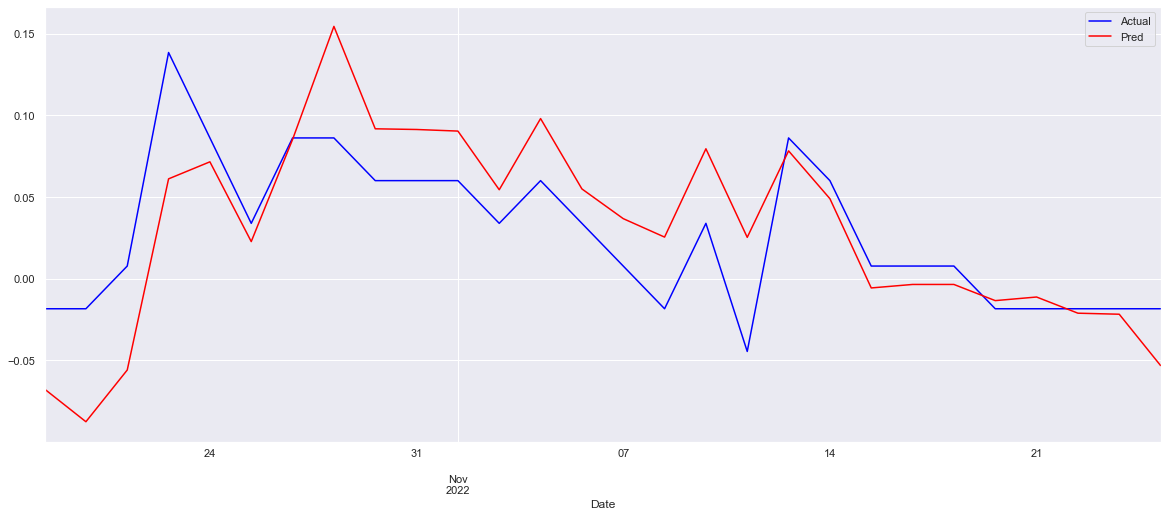

In [15]:
predictions['Actual'].plot(figsize=(20,8), legend=True, color='blue')
predictions['Pred'].plot(legend=True, color='red', figsize=(20,8))

### Evaluation

**Inverse transform scaled Close price**

In [16]:
from joblib import load

In [17]:
close_scaler = load('../feature_engineering/fren_close_scaler.bin')

In [18]:
inversed_pred = close_scaler.inverse_transform(np.array(predictions['Pred']).reshape(-1,1))
inversed_act = close_scaler.inverse_transform(np.array(predictions['Actual']).reshape(-1,1))

In [19]:
inversed = pd.DataFrame(inversed_pred)
inversed['Actual'] = inversed_act
inversed.rename({0:'Pred'}, axis=1, inplace=True)
inversed.index = test_labels.index
inversed.tail(5)

,Pred,Actual
Date,,
2022-11-18,75.190483,75.0
2022-11-21,75.274849,75.0
2022-11-22,74.896049,75.0
2022-11-23,74.871788,75.0
2022-11-24,73.670433,75.0


**Plot error distribution**

In [20]:
def plotErrorHist(inversed_df):
    """
    Function to plot error histogram
    """
    error = inversed_df['Pred'] - inversed_df['Actual']
    plt.figure(figsize=(10,6))
    plt.hist(error, bins=25)
    plt.xlabel('Prediction Error [Close]')
    _ = plt.ylabel('Count')

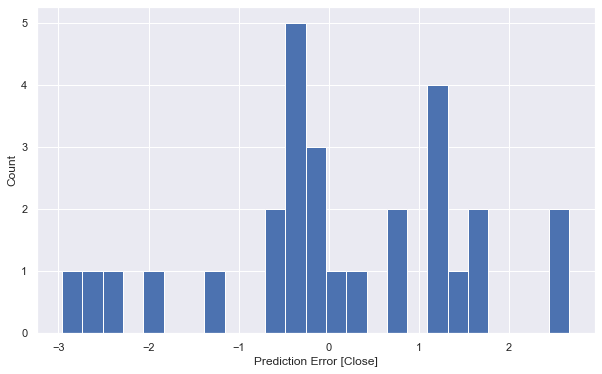

In [21]:
plotErrorHist(inversed)

**RMSE**

In [22]:
from statsmodels.tools.eval_measures import rmse

In [23]:
rmse(inversed['Pred'], inversed['Actual'])

1.4294121495958145

**MAPE**

In [24]:
# mape
def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

In [25]:
mape(inversed['Actual'], inversed['Pred'])

1.4652589645161136

**R-squared**

In [26]:
from sklearn.metrics import r2_score

In [27]:
r2_score(inversed['Actual'], inversed['Pred'])

0.29587526627028216

### Save Model

In [28]:
# Save model
model.save_model('./models/fren.json')